In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import yfinance as yf
import eikon as ek
from sklearn.linear_model import LinearRegression
import scipy.stats as st

# Set Eikon API key
ek.set_app_key('ad17644b1ca5474c9775daa1b5ffa2a21c74b8d7')  # ⚠️ Be cautious with exposing your API ke

2025-05-16 15:33:01,869 P[7668] [MainThread 14996] Error: no proxy address identified.
Check if Eikon Desktop or Eikon API Proxy is running.
2025-05-16 15:33:01,869 P[7668] [MainThread 14996] Error on handshake url http://127.0.0.1:None/api/handshake : InvalidURL("Invalid port: 'None'")
2025-05-16 15:33:01,869 P[7668] [MainThread 14996] Error on handshake url http://127.0.0.1:None/api/handshake : InvalidURL("Invalid port: 'None'")
2025-05-16 15:33:01,869 P[7668] [MainThread 14996] Port number was not identified, cannot send any request


# ma_data file

In [2]:
file_path = r"C:\Users\jensv\OneDrive\Documents\ACAR DATA ANALYSIS\MA_Dataset.xlsx"
ma_data = pd.read_excel(file_path, sheet_name = "All-World", usecols= "A:AT")
ma_data

,SDC Deal No,Date Announced,Rank Date,"Rank Value inc. Net Debt of Target\n(USD, Millions)",Target Full Name,Target Macro Industry,Target Mid Industry,Target Nation,Acquiror Full Name,Acquiror Macro Industry,...,"Total Assets Last 12 Months\n(USD, Millions)","Total Liabilities Last 12 Months\n(USD, Millions)","Target Market Value 4 Weeks Prior to Announcement\n(USD, Millions)",Target Leverage,Unnamed: 40,Cross Border Deal Flag,Unnamed: 42,Governance Indicator Acquirer Nation (Year of Announcement),Governance Indicator Target Nation (Year of Announcement),Governance Transfer
0,2426046040,2013-01-30,2013-02-01,1860.529127,Administradora de Fondos de Pensiones Provida SA,Financials,Asset Management,Chile,MetLife Inc,Financials,...,343079.724349,101241.108246,1828.296128,0.295095,NaN,True,NaN,7.459427,7.288333,0.171094
1,1733107040,2006-02-03,2006-02-03,6001.534208,Banca Nazionale del Lavoro,Financials,Banks,Italy,BNP Paribas SA,Financials,...,104345.289430,98390.498348,10554.957603,0.942932,NaN,True,NaN,7.559920,6.261493,1.298427
2,4099635020,2023-06-27,2023-06-27,3587.031000,American Equity Investment Life Holding Co,Financials,Insurance,United States,Brookfield Reinsurance Ltd,Financials,...,74495.726000,71866.917000,3138.790000,0.964712,NaN,True,NaN,7.869362,6.989663,0.879700
3,1801353020,2008-10-13,2008-10-13,1910.192000,Sovereign Bancorp Inc,Financials,Banks,United States,Banco Santander SA,Financials,...,77320.833000,69833.325000,17496.388000,0.903163,NaN,True,NaN,6.777384,7.643603,-0.866218
4,3830524040,2021-11-15,2021-11-15,1544.597018,Turkiye Garanti Bankasi AS,Financials,Banks,Turkey,Banco Bilbao Vizcaya Argentaria SA,Financials,...,64986.172802,58376.397342,3963.623885,0.898290,NaN,True,NaN,6.590877,3.980506,2.610371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,4236580040,2024-05-21,2024-05-21,1.839544,Sichuan Qianye Technology Co Ltd,Industrials,Other Industrials,China (Mainland),Sichuan Jinshi Technology Co Ltd,Materials,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
1454,4253173040,2024-06-24,2024-06-24,7.010370,Silver Gold Bull Inc,Retail,Internet and Catalog Retailing,Canada,A-Mark Precious Metals Inc,Retail,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
1455,4254573040,2024-05-24,2024-05-24,3.491934,IO+ Pte Ltd,High Technology,Software,Singapore,Flex Labs Inc,High Technology,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
1456,4255521040,2024-06-25,2024-06-25,110.998973,Heathrow Estate,Real Estate,Non Residential,United Kingdom,Kennedy Wilson Holdings Inc,Real Estate,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN


# CUSIP And RIC

In [4]:
import eikon as ek

# Set the Eikon App Key if needed (assuming you already did)
# ek.set_app_key("your_app_key_here")

# Example CUSIP (replace this with your acquiror's CUSIP)
cusip = "872590"  # Example: CUSIP for Apple Inc.

# Fetch data using CUSIP and get the corresponding RIC
data, err = ek.get_data(cusip, ["TR.RIC", "TR.CommonName"])

# Display the result
print(data)


   Instrument         RIC              Company Common Name
0      872590  8512.T^G13  Osaka Securities Finance Co Ltd


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


# Country index return

In [3]:
import pandas as pd

index_closing_prices = pd.read_csv("index_closing_prices_eikon.csv", index_col="Date", parse_dates=True)
index_closing_prices


,United States,France,Canada,Spain,Finland,United Kingdom,Ireland,Germany,Greece,Austria,...,Egypt,Colombia,New Zealand,Pakistan,Sri Lanka,Cyprus,Kenya,Hungary,Kazakhstan,Argentina
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1455.22,5917.37,8413.75,11610.0,3381.09,6930.20,5017.536324,6750.76,5794.85,1204.88,...,1211.81,NaN,NaN,1457.07,574.20,NaN,NaN,8819.45,NaN,551.83
2000-01-04,1399.42,5672.02,8202.60,11206.6,3161.50,6665.86,4940.213239,6586.95,5588.65,1194.41,...,1236.88,NaN,NaN,1479.70,571.20,NaN,NaN,8715.49,NaN,522.97
2000-01-05,1402.11,5479.70,8119.42,10863.1,2918.62,6535.90,4893.010098,6502.07,5369.38,1192.89,...,1195.91,NaN,NaN,1479.70,562.20,NaN,NaN,8464.34,NaN,532.68
2000-01-06,1403.45,5450.11,8114.24,10863.1,2918.62,6447.24,4893.799503,6474.92,5369.38,1192.89,...,1199.84,NaN,NaN,1499.80,556.50,NaN,NaN,8483.29,NaN,528.47
2000-01-07,1441.47,5539.61,8429.42,11102.4,3010.38,6504.75,4913.756340,6780.96,5410.82,1223.61,...,1199.84,NaN,NaN,1499.80,556.50,NaN,NaN,8694.04,NaN,522.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,6040.04,7282.69,24846.82,11473.9,4246.69,8136.99,9712.300000,19848.77,1448.86,3607.43,...,30005.00,1383.76,13074.74,112414.81,15168.40,212.52,121.77,79492.85,5495.79,2551020.43
2024-12-26,6037.59,7282.69,24846.82,11473.9,4246.69,8136.99,9712.300000,19848.77,1448.86,3607.43,...,29957.97,1386.59,13074.74,110423.32,15400.53,212.52,121.77,79492.85,5507.11,2597388.50
2024-12-27,5970.84,7355.37,24796.40,11531.6,4321.09,8149.78,9700.420000,19984.32,1457.38,3630.48,...,29957.97,1381.93,13205.10,111351.18,15535.60,213.94,122.39,79492.85,5547.76,2577545.67


### Index Returns Eikon

In [4]:
import pandas as pd
import eikon as ek

# ✅ Set your App Key
ek.set_app_key("YOUR_APP_KEY_HERE")

# ✅ Prepare RICs and country mapping
ma_data['RIC_CLEAN'] = ma_data['Index RIC'].apply(lambda x: x if str(x).startswith('.') else '.' + str(x))
country_map = dict(zip(ma_data['RIC_CLEAN'], ma_data['Unique Countries']))
rics = ma_data['RIC_CLEAN'].dropna().unique().tolist()

# ✅ Empty DataFrame to hold all closing prices
index_closing_prices_eikon_df = pd.DataFrame()
skipped = []

# ✅ Loop over RICs
for ric in rics:
    country = country_map.get(ric, ric)
    try:
        df_full, err = ek.get_data(
            instruments=[ric],
            fields=["TR.CLOSE"],
            parameters={
                "SDate": "20000101",
                "EDate": "20241231",
                "Frq": "D"
            }
        )

        if err is not None:
            print(f"⚠️ Refinitiv error for {country} ({ric}): {err}")
            skipped.append((country, ric))
            continue

        if df_full is not None and not df_full.empty:
            df = df_full.copy()
            df.rename(columns={"Price Close": "CLOSE"}, inplace=True)

            # Handle date index
            if "Date" in df.columns:
                df["Date"] = pd.to_datetime(df["Date"])
                df.set_index("Date", inplace=True)
            else:
                df.index = pd.date_range(start="2000-01-01", periods=len(df), freq="B")  # Fallback index
                df.index.name = "Date"

            # Add to master DataFrame
            index_closing_prices_eikon_df[country] = df["CLOSE"]
            print(f"✅ Retrieved closing prices for {country} ({ric})")

        else:
            print(f"⚠️ No data for {country} ({ric})")
            skipped.append((country, ric))

    except Exception as e:
        print(f"❌ Failed for {country} ({ric}): {e}")
        skipped.append((country, ric))

# ✅ Final check
print("\n📊 Available countries with data:")
print(index_closing_prices_eikon_df.head())

# Optional: Save to Excel
# index_closing_prices_eikon_df.to_excel("index_closing_prices_eikon.xlsx")


2025-04-16 13:08:17,052 P[17968] [MainThread 13220] Error on handshake url http://127.0.0.1:9005/api/handshake : EikonError(1, 'Status code 400: App key is incorrect')
2025-04-16 13:08:17,054 P[17968] [MainThread 13220] Error on handshake url http://127.0.0.1:9005/api/handshake : EikonError(1, 'Status code 400: App key is incorrect')
2025-04-16 13:08:17,055 P[17968] [MainThread 13220] Port number was not identified, cannot send any request
C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for United States (.SPX)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for France (.FCHI)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Canada (.GSPTSE)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Spain (.IBEX)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Finland (.OMXH25)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for United Kingdom (.FTSE)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Ireland (.ISEQ)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Germany (.GDAXI)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Greece (.ATG)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Austria (.ATX)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Portugal (.PSI20)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Iceland (.OMXIPI)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for South Korea (.KS11)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Luxembourg (.LUXX)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Japan (.N225)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Czech Republic (.PX)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


⚠️ Refinitiv error for nan (.nan): [{'code': 412, 'col': 1, 'message': 'Unable to resolve all requested identifiers.', 'row': 0}]
✅ Retrieved closing prices for Qatar (.QSI)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Italy (.FTMIB)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for China (Mainland) (.CSI300)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Switzerland (.SSMI)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Sweden (.OMXS30)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for South Africa (.JTOPI)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Belgium (.BFX)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Mexico (.MXX)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Israel (.TA125)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Kuwait (.BKM50)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Hong Kong (.HSI)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Norway (.OBX)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Australia (.AXJO)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Brazil (.BVSP)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Russia (.IMOEX)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Turkey (.XU100)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Chile (.SPIPSA)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Saudi Arabia (.TASI)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for India (.BSESN)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Thailand (.SETI)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Netherlands (.AEX)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Singapore (.STI)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Denmark (.OMXC25CAP)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Indonesia (.JKSE)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Malta (.MSE)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Poland (.WIG)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Slovenia (.SBITOP)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Taiwan (.TWII)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Philippines (.PSI)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Bahrain (.BAX)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Malaysia (.KLSE)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for United Arab Emirates (.FTFADGI)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Lithuania (.OMXVGI)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Egypt (.EGX30)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Colombia (.COLCAP)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for New Zealand (.NZ50)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Pakistan (.KSE)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Sri Lanka (.CSE)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Cyprus (.CYMNPRL)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Kenya (.NASI)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Hungary (.BUX)


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


✅ Retrieved closing prices for Kazakhstan (.KASE)
✅ Retrieved closing prices for Argentina (.MERV)

📊 Available countries with data:
['United States', 'France', 'Canada', 'Spain', 'Finland', 'United Kingdom', 'Ireland', 'Germany', 'Greece', 'Austria', 'Portugal', 'Iceland', 'South Korea', 'Luxembourg', 'Japan', 'Czech Republic', 'Qatar', 'Italy', 'China (Mainland)', 'Switzerland', 'Sweden', 'South Africa', 'Belgium', 'Mexico', 'Israel', 'Kuwait', 'Hong Kong', 'Norway', 'Australia', 'Brazil', 'Russia', 'Turkey', 'Chile', 'Saudi Arabia', 'India', 'Thailand', 'Netherlands', 'Singapore', 'Denmark', 'Indonesia', 'Malta', 'Poland', 'Slovenia', 'Taiwan', 'Philippines', 'Bahrain', 'Malaysia', 'United Arab Emirates', 'Lithuania', 'Egypt', 'Colombia', 'New Zealand', 'Pakistan', 'Sri Lanka', 'Cyprus', 'Kenya', 'Hungary', 'Kazakhstan', 'Argentina']


C:\Python310\lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


# Stock Returns

In [4]:
import pandas as pd

stock_return = pd.read_csv("stock_returns_long_format.csv", parse_dates=["Date", "Announce_Date"])
stock_return

,Date,CLOSE,Return,SDC Deal No,RIC,Announce_Date,Country
0,2011-12-27,27.803755,NaN,2426046040,MET.N,2013-01-30,United States
1,2011-12-28,27.474031,-0.011859,2426046040,MET.N,2013-01-30,United States
2,2011-12-29,27.999807,0.019137,2426046040,MET.N,2013-01-30,United States
3,2011-12-30,27.785932,-0.007638,2426046040,MET.N,2013-01-30,United States
4,2012-01-03,28.552318,0.027582,2426046040,MET.N,2013-01-30,United States
...,...,...,...,...,...,...,...
377142,2024-11-14,32.150000,0.006260,4310227040,PAFR.L,2024-11-05,United Kingdom
377143,2024-11-15,31.400000,-0.023328,4310227040,PAFR.L,2024-11-05,United Kingdom
377144,2024-11-18,33.550000,0.068471,4310227040,PAFR.L,2024-11-05,United Kingdom
377145,2024-11-19,35.300000,0.052161,4310227040,PAFR.L,2024-11-05,United Kingdom


### Stock return retrieval

In [8]:
import pandas as pd
from datetime import timedelta

# Ensure 'Date Announced' is in datetime format
ma_data['Date Announced'] = pd.to_datetime(ma_data['Date Announced'])

# Initialize dictionary to store event-level return Series
stock_returns_dict = {}

# Loop through all events in ma_data
for idx, row in ma_data.iterrows():
    RIC = row['Acquiror RIC']
    announce_date = row['Date Announced']

    # Skip if either is missing
    if pd.isna(RIC) or pd.isna(announce_date):
        continue

    # Define event window (e.g., -400 to +15 days around the announcement)
    start_date = (announce_date - timedelta(days=400)).strftime("%Y-%m-%d")
    end_date = (announce_date + timedelta(days=15)).strftime("%Y-%m-%d")

    try:
        print(f"📡 Fetching data for {RIC} around announcement on {announce_date.date()}...")

        # Fetch daily close data from Eikon
        stock_data = ek.get_timeseries(
            RIC,
            fields="CLOSE",
            start_date=start_date,
            end_date=end_date,
            interval="daily"
        )

        # Handle empty or missing data
        if stock_data is None or stock_data.empty:
            print(f"⚠️ No data for {RIC} ({start_date} to {end_date})")
            continue

        # Calculate daily returns
        stock_data['Return'] = stock_data['CLOSE'].pct_change()

        # Create a unique event key
        event_key = f"{RIC}_{announce_date.date()}"

        # Store return series for this specific event
        stock_returns_dict[event_key] = {
            'returns': stock_data['Return'],
            'RIC': RIC,
            'announce_date': announce_date,
            'raw_data': stock_data
        }

        # Optional preview
        available_start = stock_data.index.min().date()
        available_end = stock_data.index.max().date()
        print(f"✅ Data retrieved: ({available_start} to {available_end})")
        print(stock_data[['CLOSE', 'Return']].tail())
        print("\n" + "=" * 50 + "\n")

    except Exception as e:
        print(f"❌ Error fetching data for {RIC}: {e}")


📡 Fetching data for MET.N around announcement on 2013-01-30...
✅ Data retrieved: 2011-12-27 to 2013-02-14
MET.N           CLOSE    Return
Date                           
2013-02-08  32.883287 -0.001083
2013-02-11  32.883287       0.0
2013-02-12  33.088251  0.006233
2013-02-13  33.417975  0.009965
2013-02-14  32.696147   -0.0216


📡 Fetching data for BNPP.PA around announcement on 2006-02-03...
✅ Data retrieved: 2004-12-30 to 2006-02-17
BNPP.PA         CLOSE    Return
Date                           
2006-02-13  73.145814  0.023617
2006-02-14  73.386901  0.003296
2006-02-15  71.554639 -0.024967
2006-02-16    72.2779  0.010108
2006-02-17  73.097596  0.011341


📡 Fetching data for BNT.TO around announcement on 2023-06-27...
✅ Data retrieved: 2022-05-24 to 2023-07-12
BNT.TO      CLOSE    Return
Date                       
2023-07-06   43.0 -0.029126
2023-07-07  43.33  0.007674
2023-07-10  43.09 -0.005539
2023-07-11  43.01 -0.001857
2023-07-12  43.85   0.01953


📡 Fetching data for SAN.MC ar

2025-04-16 13:36:39,727 P[11932] [MainThread 13444] Error with BPYPP.OQ: No data available for the requested date range
2025-04-16 13:36:39,728 P[11932] [MainThread 13444] BPYPP.OQ: No data available for the requested date range | 


❌ Error fetching data for BPYPP.OQ: Error code -1 | BPYPP.OQ: No data available for the requested date range | 
📡 Fetching data for TUI1n.DE around announcement on 2014-06-27...
✅ Data retrieved: 2013-05-23 to 2014-07-11
TUI1n.DE        CLOSE    Return
Date                           
2014-07-07  36.348143 -0.033717
2014-07-08  35.466507 -0.024255
2014-07-09  34.894217 -0.016136
2014-07-10  34.724077 -0.004876
2014-07-11  35.095292   0.01069


📡 Fetching data for NBGr.AT around announcement on 2006-04-03...
✅ Data retrieved: 2005-02-28 to 2006-04-18
NBGr.AT            CLOSE    Return
Date                              
2006-04-10  21632.720653 -0.023923
2006-04-11  21261.571034 -0.017157
2006-04-12  21166.132561 -0.004489
2006-04-13  21134.319736 -0.001503
2006-04-18  20954.047064  -0.00853


📡 Fetching data for ERST.VI around announcement on 2002-08-06...
✅ Data retrieved: 2001-07-02 to 2002-08-21
ERST.VI         CLOSE    Return
Date                           
2002-08-14  16.071636  0.0

2025-04-16 13:36:41,704 P[11932] [MainThread 13444] Error with ISB.IC: No data available for the requested date range


✅ Data retrieved: 2003-06-25 to 2004-08-13
EDP.LS         CLOSE    Return
Date                          
2004-08-09  2.158574  0.026786
2004-08-10  2.149188 -0.004348
2004-08-11  2.130418 -0.008734
2004-08-12  2.139803  0.004405
2004-08-13  2.149188  0.004386


📡 Fetching data for ISB.IC around announcement on 2004-11-15...


2025-04-16 13:36:41,705 P[11932] [MainThread 13444] ISB.IC: No data available for the requested date range | 


❌ Error fetching data for ISB.IC: Error code -1 | ISB.IC: No data available for the requested date range | 
📡 Fetching data for LBTYA.OQ around announcement on 2013-10-16...
✅ Data retrieved: 2012-09-11 to 2013-10-31
LBTYA.OQ        CLOSE    Return
Date                           
2013-10-25  17.385685 -0.001121
2013-10-28  17.591728  0.011851
2013-10-29  17.288085 -0.017261
2013-10-30  16.915039 -0.021578
2013-10-31  16.997456  0.004872


📡 Fetching data for BASFn.DE around announcement on 2008-09-15...
✅ Data retrieved: 2007-08-13 to 2008-09-30
BASFn.DE    CLOSE    Return
Date                       
2008-09-24  34.57  0.004942
2008-09-25  35.29  0.020827
2008-09-26  34.97 -0.009068
2008-09-29  33.64 -0.038033
2008-09-30  33.75   0.00327


📡 Fetching data for 011810.KS around announcement on 2008-06-23...
✅ Data retrieved: 2007-05-21 to 2008-07-08
011810.KS             CLOSE    Return
Date                                 
2008-07-02  19657311.706805 -0.090239
2008-07-03  20055232.99641

2025-04-16 13:36:43,940 P[11932] [MainThread 13444] Error with MVC.MC: No data available for the requested date range
2025-04-16 13:36:43,941 P[11932] [MainThread 13444] MVC.MC: No data available for the requested date range | 


✅ Data retrieved: 2012-01-04 to 2013-02-21
8473.T      CLOSE    Return
Date                       
2013-02-15  727.0 -0.013569
2013-02-18  740.0  0.017882
2013-02-19  722.0 -0.024324
2013-02-20  726.0   0.00554
2013-02-21  722.0  -0.00551


📡 Fetching data for MVC.MC around announcement on 2005-03-14...
❌ Error fetching data for MVC.MC: Error code -1 | MVC.MC: No data available for the requested date range | 
📡 Fetching data for UNIQ.VI around announcement on 2003-12-22...
✅ Data retrieved: 2002-11-18 to 2004-01-05
UNIQ.VI        CLOSE    Return
Date                          
2003-12-23  7.538596       0.0
2003-12-29  7.595851  0.007595
2003-12-30  7.605393  0.001256
2004-01-02  7.490883 -0.015056
2004-01-05  7.624478  0.017834


📡 Fetching data for AAL.L around announcement on 2011-11-04...
✅ Data retrieved: 2010-09-30 to 2011-11-18
AAL.L             CLOSE    Return
Date                             
2011-11-14  2369.750783 -0.007702
2011-11-15  2375.074978  0.002247
2011-11-16  2386.2

2025-04-16 13:36:47,010 P[11932] [MainThread 13444] Error with PREJF.PK: No data available for the requested date range
2025-04-16 13:36:47,011 P[11932] [MainThread 13444] PREJF.PK: No data available for the requested date range | 


❌ Error fetching data for PREJF.PK: Error code -1 | PREJF.PK: No data available for the requested date range | 
📡 Fetching data for 5202.T around announcement on 2005-10-31...
✅ Data retrieved: 2004-09-27 to 2005-11-15
5202.T      CLOSE    Return
Date                       
2005-11-09   4910 -0.016032
2005-11-10   4920  0.002037
2005-11-11   4940  0.004065
2005-11-14   4910 -0.006073
2005-11-15   4870 -0.008147


📡 Fetching data for BIP.N around announcement on 2010-08-23...
✅ Data retrieved: 2009-07-20 to 2010-09-07
BIP.N          CLOSE    Return
Date                          
2010-08-31  6.786664  0.003517
2010-09-01  6.909553  0.018107
2010-09-02  6.913517  0.000574
2010-09-03  7.000729  0.012615
2010-09-07  7.048299  0.006795


📡 Fetching data for ORDS.QA around announcement on 2008-06-26...
✅ Data retrieved: 2007-05-23 to 2008-07-10
ORDS.QA         CLOSE    Return
Date                           
2008-07-06  10.493038 -0.015707
2008-07-07  10.487457 -0.000532
2008-07-08  10.269782 

2025-04-16 13:36:50,716 P[11932] [MainThread 13444] Error with PRLGL.PK^E10: No data available for the requested date range
2025-04-16 13:36:50,718 P[11932] [MainThread 13444] PRLGL.PK^E10: No data available for the requested date range | 


❌ Error fetching data for PRLGL.PK^E10: Error code -1 | PRLGL.PK^E10: No data available for the requested date range | 
📡 Fetching data for TRP.TO around announcement on 2020-10-05...
✅ Data retrieved: 2019-09-03 to 2020-10-20
TRP.TO          CLOSE    Return
Date                           
2020-10-14  51.930979 -0.005235
2020-10-15  52.677925  0.014383
2020-10-16  51.657706 -0.019367
2020-10-19  50.673923 -0.019044
2020-10-20  51.429979   0.01492


📡 Fetching data for BALDb.ST around announcement on 2015-12-15...
✅ Data retrieved: 2014-11-10 to 2015-12-30
BALDb.ST        CLOSE    Return
Date                           
2015-12-22  32.233398 -0.008205
2015-12-23  32.366731  0.004137
2015-12-28  32.650065  0.008754
2015-12-29  33.266733  0.018887
2015-12-30  34.783403  0.045591


📡 Fetching data for KW.N around announcement on 2017-04-24...
✅ Data retrieved: 2016-03-21 to 2017-05-09
KW.N        CLOSE    Return
Date                       
2017-05-03  20.25 -0.002463
2017-05-04   20.4  0.00

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2004-03-09 to 2005-04-26
TMXLF.PK^A25  CLOSE    Return
Date                         
2005-03-16      0.9 -0.076923
2005-04-11     <NA>       0.0
2005-04-14     0.85 -0.055556
2005-04-19     <NA>       0.0
2005-04-26    0.825 -0.029412


📡 Fetching data for PHRA.LS around announcement on 2002-08-29...
✅ Data retrieved: 2001-07-25 to 2002-09-13
PHRA.LS        CLOSE    Return
Date                          
2002-09-09  4.097791 -0.009662
2002-09-10  4.164422   0.01626
2002-09-11  4.197737     0.008
2002-09-12  4.111117 -0.020635
2002-09-13  3.997845 -0.027553


📡 Fetching data for ULVR.L around announcement on 2013-04-30...
✅ Data retrieved: 2012-03-26 to 2013-05-15
ULVR.L      CLOSE    Return
Date                       
2013-05-09   2758 -0.005768
2013-05-10   2774  0.005801
2013-05-13   2790  0.005768
2013-05-14   2822   0.01147
2013-05-15   2852  0.010631


📡 Fetching data for NOVN.S around announcement on 2005-09-01...
✅ Data retrieved: 2004-07-28 to 2005-09-16
NOVN.S

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2013-12-18 to 2015-02-05
GCT.TA      CLOSE    Return
Date                       
2015-02-01   5063  0.015647
2015-02-02   5130  0.013233
2015-02-03   5115 -0.002924
2015-02-04   5060 -0.010753
2015-02-05   5075  0.002964


📡 Fetching data for 081660.KS around announcement on 2014-07-23...
✅ Data retrieved: 2013-06-18 to 2014-08-07
081660.KS   CLOSE    Return
Date                       
2014-08-01  18060 -0.001106
2014-08-04  18180  0.006645
2014-08-05  18000 -0.009901
2014-08-06  17760 -0.013333
2014-08-07  17560 -0.011261


📡 Fetching data for DLEKG.TA around announcement on 2017-02-06...
✅ Data retrieved: 2016-01-03 to 2017-02-21
DLEKG.TA    CLOSE    Return
Date                       
2017-02-15  82010  0.008733
2017-02-16  81890 -0.001463
2017-02-19  82290  0.004885
2017-02-20  82490   0.00243
2017-02-21  82650   0.00194


📡 Fetching data for FNAC.PA around announcement on 2024-07-16...
✅ Data retrieved: 2023-06-12 to 2024-07-31
FNAC.PA     CLOSE    Return
Date    

2025-04-16 13:37:00,332 P[11932] [MainThread 13444] Error with ENBR3.SA^H23: No data available for the requested date range
2025-04-16 13:37:00,333 P[11932] [MainThread 13444] ENBR3.SA^H23: No data available for the requested date range | 


❌ Error fetching data for ENBR3.SA^H23: Error code -1 | ENBR3.SA^H23: No data available for the requested date range | 
📡 Fetching data for VIV.PA around announcement on 2004-11-18...
✅ Data retrieved: 2003-10-15 to 2004-12-03
VIV.PA         CLOSE    Return
Date                          
2004-11-29  1.960545 -0.000445
2004-11-30  1.936126 -0.012456
2004-12-01  1.946591  0.005405
2004-12-02  1.984093  0.019265
2004-12-03   1.99107  0.003516


📡 Fetching data for SIBN.MM around announcement on 2009-05-26...
✅ Data retrieved: 2008-04-21 to 2009-06-10
SIBN.MM      CLOSE    Return
Date                        
2009-06-04   107.0   0.02363
2009-06-05  110.51  0.032804
2009-06-08  108.53 -0.017917
2009-06-09  107.21 -0.012163
2009-06-10  109.15  0.018095


📡 Fetching data for ORBIA.MX around announcement on 2011-11-22...
✅ Data retrieved: 2010-10-18 to 2011-12-07
ORBIA.MX        CLOSE    Return
Date                           
2011-12-01  45.082522 -0.020512
2011-12-02  45.393973  0.006908
2011

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2004-09-20 to 2005-11-08
SYD.AX^C22     CLOSE    Return
Date                          
2005-11-02  2.732411 -0.013201
2005-11-03  2.768965  0.013378
2005-11-04  2.768965       0.0
2005-11-07   2.79638  0.009901
2005-11-08  2.851211  0.019608


📡 Fetching data for ENELGXCH.SN around announcement on 2009-10-09...
✅ Data retrieved: 2008-09-04 to 2009-10-23
ENELGXCH.SN       CLOSE    Return
Date                             
2009-10-19   266.774703 -0.003421
2009-10-20   262.139942 -0.017373
2009-10-21   259.817937 -0.008858
2009-10-22    257.90606 -0.007359
2009-10-23   257.471262 -0.001686


📡 Fetching data for AAL.L around announcement on 2003-11-03...
✅ Data retrieved: 2002-09-30 to 2003-11-18
AAL.L             CLOSE    Return
Date                             
2003-11-12  1247.198609  0.016247
2003-11-13  1264.146951  0.013589
2003-11-14  1275.113526  0.008675
2003-11-17  1241.216841 -0.026583
2003-11-18  1229.253305 -0.009639


📡 Fetching data for SDRL.K around announ

2025-04-16 13:37:03,429 P[11932] [MainThread 13444] Error with SDRL.K: No data available for the requested date range
2025-04-16 13:37:03,431 P[11932] [MainThread 13444] SDRL.K: No data available for the requested date range | 


❌ Error fetching data for SDRL.K: Error code -1 | SDRL.K: No data available for the requested date range | 
📡 Fetching data for DRYS.OQ^J19 around announcement on 2008-04-22...
✅ Data retrieved: 2007-03-19 to 2008-05-07
DRYS.OQ^J19            CLOSE    Return
Date                                  
2008-05-01    942126026.7888  0.008606
2008-05-02   1017419117.5008  0.079918
2008-05-05   1030213281.7872  0.012575
2008-05-06   1050480143.7984  0.019672
2008-05-07   1020362907.5136  -0.02867


📡 Fetching data for 0688.HK around announcement on 2009-09-29...
✅ Data retrieved: 2008-08-25 to 2009-10-14
0688.HK         CLOSE    Return
Date                           
2009-10-08  17.528238   0.00681
2009-10-09  17.508476 -0.001127
2009-10-12  17.271341 -0.013544
2009-10-13  17.053967 -0.012586
2009-10-14  17.053967       0.0


📡 Fetching data for BN.N around announcement on 2015-04-29...
✅ Data retrieved: 2014-03-25 to 2015-05-14
BN.N            CLOSE    Return
Date                           
20

2025-04-16 13:37:07,225 P[11932] [MainThread 13444] Error with TENR.MI: No data available for the requested date range
2025-04-16 13:37:07,226 P[11932] [MainThread 13444] TENR.MI: No data available for the requested date range | 


✅ Data retrieved: 2013-05-28 to 2014-07-17
INGC.PA^K20  CLOSE    Return
Date                        
2014-07-11   69.64  0.014273
2014-07-14    71.6  0.028145
2014-07-15   69.21  -0.03338
2014-07-16   71.08  0.027019
2014-07-17    71.0 -0.001125


📡 Fetching data for TENR.MI around announcement on 2002-09-13...
❌ Error fetching data for TENR.MI: Error code -1 | TENR.MI: No data available for the requested date range | 
📡 Fetching data for AMBV4.SA^K13 around announcement on 2002-05-01...
✅ Data retrieved: 2001-03-27 to 2002-05-16
AMBV4.SA^K13     CLOSE    Return
Date                            
2002-05-10    1.248483 -0.016394
2002-05-13    1.269292  0.016667
2002-05-14    1.287499  0.014344
2002-05-15    1.258887 -0.022223
2002-05-16    1.230276 -0.022727


📡 Fetching data for AMC.N around announcement on 2016-03-03...
✅ Data retrieved: 2015-01-28 to 2016-03-18
AMC.N            CLOSE    Return
Date                            
2016-03-14  147.741344 -0.005078
2016-03-15  145.177612 -0.

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2001-07-25 to 2002-09-13
KAUP.IC^A09       CLOSE    Return
Date                             
2002-09-09      120.362 -0.007937
2002-09-10   119.399104    -0.008
2002-09-11      120.362  0.008065
2002-09-12   118.436208    -0.016
2002-09-13   119.399104   0.00813


📡 Fetching data for KKR.N around announcement on 2018-10-08...
✅ Data retrieved: 2017-09-05 to 2018-10-23
KKR.N       CLOSE    Return
Date                       
2018-10-17  25.55 -0.003899
2018-10-18  24.67 -0.034442
2018-10-19  24.17 -0.020268
2018-10-22  23.91 -0.010757
2018-10-23  23.15 -0.031786


📡 Fetching data for BN.N around announcement on 2010-02-24...
✅ Data retrieved: 2009-01-20 to 2010-03-11
BN.N           CLOSE    Return
Date                          
2010-03-05  8.353398  0.013273
2010-03-08  8.360237  0.000819
2010-03-09  8.401269  0.004908
2010-03-10  8.353398 -0.005698
2010-03-11  8.435462  0.009824


📡 Fetching data for 9984.T around announcement on 2016-07-18...
✅ Data retrieved: 2015-06

2025-04-16 13:37:22,772 P[11932] [MainThread 13444] Error with RFHL.TTB: No data available for the requested date range
2025-04-16 13:37:22,773 P[11932] [MainThread 13444] RFHL.TTB: No data available for the requested date range | 


✅ Data retrieved: 2008-07-22 to 2009-09-10
ELD.TO      CLOSE    Return
Date                       
2009-09-03   61.5  0.036226
2009-09-04   61.1 -0.006504
2009-09-08  60.75 -0.005728
2009-09-09  59.85 -0.014815
2009-09-10  61.95  0.035088


📡 Fetching data for RFHL.TTB around announcement on 2014-04-17...
❌ Error fetching data for RFHL.TTB: Error code -1 | RFHL.TTB: No data available for the requested date range | 
📡 Fetching data for IEX.N around announcement on 2022-09-13...
✅ Data retrieved: 2021-08-09 to 2022-09-28
IEX.N        CLOSE    Return
Date                        
2022-09-22  201.76 -0.012529
2022-09-23  199.31 -0.012143
2022-09-26  199.62  0.001555
2022-09-27  198.53  -0.00546
2022-09-28  202.94  0.022213


📡 Fetching data for AGL.MI^G23 around announcement on 2007-06-01...
✅ Data retrieved: 2006-04-27 to 2007-06-15
AGL.MI^G23     CLOSE    Return
Date                          
2007-06-11  5.805242  0.006989
2007-06-12  5.801292  -0.00068
2007-06-13   5.86173  0.010418
2007

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2004-05-19 to 2005-07-08
LLC.AX          CLOSE    Return
Date                           
2005-07-04  12.800825  0.007605
2005-07-05   12.84913  0.003774
2005-07-06  12.791164 -0.004511
2005-07-07  12.704215 -0.006798
2005-07-08   12.65591 -0.003802


📡 Fetching data for ATBV.VI^J15 around announcement on 2006-03-14...
✅ Data retrieved: 2005-02-07 to 2006-03-28
ATBV.VI^J15  CLOSE    Return
Date                        
2006-03-08   15.15       0.0
2006-03-15    15.8  0.042904
2006-03-16    15.7 -0.006329
2006-03-22   15.15 -0.035032
2006-03-28   15.15       0.0


📡 Fetching data for DANO.PA around announcement on 2012-06-27...
✅ Data retrieved: 2011-05-24 to 2012-07-12
DANO.PA     CLOSE    Return
Date                       
2012-07-06  49.83 -0.004197
2012-07-09  49.36 -0.009432
2012-07-10  49.99  0.012763
2012-07-11  49.42 -0.011402
2012-07-12  49.52  0.002023


📡 Fetching data for RRD.N^B22 around announcement on 2005-04-18...
✅ Data retrieved: 2004-03-15 to 2005-05-0

2025-04-16 13:37:26,121 P[11932] [MainThread 13444] Error with MASSY.TTB: No data available for the requested date range
2025-04-16 13:37:26,122 P[11932] [MainThread 13444] MASSY.TTB: No data available for the requested date range | 


✅ Data retrieved: 2001-11-13 to 2003-01-02
MFEB.MI         CLOSE    Return
Date                           
2002-12-20  20.320737 -0.002834
2002-12-23  20.051224 -0.013263
2002-12-27  19.473696 -0.028803
2002-12-30   19.96597  0.025279
2003-01-02     20.582  0.030854


📡 Fetching data for 0 around announcement on 2007-09-15...
❌ Error fetching data for 0: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching data for MASSY.TTB around announcement on 2008-01-28...
❌ Error fetching data for MASSY.TTB: Error code -1 | MASSY.TTB: No data available for the requested date range | 
📡 Fetching data for 0 around announcement on 2006-01-04...
❌ Error fetching data for 0: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching data for NMM.N around announcement on 2020-11-16...
✅ Data retrieved: 2019-10-14 to 2020-12-01
NMM.N       CLOSE    Return
Date                       
2020-11-24   7.07 -0.002821
2020-11-25   7.23  0.02263

2025-04-16 13:37:29,357 P[11932] [MainThread 13444] Error with 2296.T: No data available for the requested date range
2025-04-16 13:37:29,358 P[11932] [MainThread 13444] 2296.T: No data available for the requested date range | 


❌ Error fetching data for 2296.T: Error code -1 | 2296.T: No data available for the requested date range | 
📡 Fetching data for ATL.MI^L22 around announcement on 2006-06-27...
✅ Data retrieved: 2005-05-23 to 2006-07-12
ATL.MI^L22      CLOSE    Return
Date                           
2006-07-06  19.246305 -0.000897
2006-07-07  19.185836 -0.003142
2006-07-10   19.32405  0.007204
2006-07-11  19.203113 -0.006258
2006-07-12  19.159921 -0.002249


📡 Fetching data for ESSITYb.ST around announcement on 2020-12-10...


2025-04-16 13:37:30,040 P[11932] [MainThread 13444] Error with 9961.HK: No data available for the requested date range
2025-04-16 13:37:30,040 P[11932] [MainThread 13444] 9961.HK: No data available for the requested date range | 


✅ Data retrieved: 2019-11-06 to 2020-12-23
ESSITYb.ST  CLOSE    Return
Date                       
2020-12-17  264.4 -0.020741
2020-12-18  262.4 -0.007564
2020-12-21  261.7 -0.002668
2020-12-22  262.1  0.001528
2020-12-23  261.8 -0.001145


📡 Fetching data for 9961.HK around announcement on 2019-04-26...
❌ Error fetching data for 9961.HK: Error code -1 | 9961.HK: No data available for the requested date range | 
📡 Fetching data for YAR.OL around announcement on 2006-08-31...
✅ Data retrieved: 2005-07-27 to 2006-09-15
YAR.OL          CLOSE    Return
Date                           
2006-09-11  85.292605  -0.02981
2006-09-12  85.530852  0.002793
2006-09-13  87.436832  0.022284
2006-09-14   87.67508  0.002725
2006-09-15  88.866317  0.013587


📡 Fetching data for BWO.OL around announcement on 2007-02-03...
✅ Data retrieved: 2006-05-31 to 2007-02-16
BWO.OL           CLOSE    Return
Date                            
2007-02-12  269.970944 -0.010791
2007-02-13  270.952656  0.003636
2007-02-14  

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2002-08-29 to 2003-10-17
NTGY.MC         CLOSE    Return
Date                           
2003-10-13  13.473142  0.001819
2003-10-14  13.391586 -0.006053
2003-10-15  13.473142   0.00609
2003-10-16  13.416053 -0.004237
2003-10-17  13.334496 -0.006079


📡 Fetching data for BUD.N^K08 around announcement on 2004-05-31...
✅ Data retrieved: 2003-04-28 to 2004-06-15
BUD.N^K08   CLOSE    Return
Date                       
2004-06-08  54.12  0.006884
2004-06-09  54.08 -0.000739
2004-06-10  53.66 -0.007766
2004-06-14  53.92  0.004845
2004-06-15  54.22  0.005564


📡 Fetching data for VID.MC around announcement on 2023-02-09...
✅ Data retrieved: 2022-01-05 to 2023-02-24
VID.MC          CLOSE    Return
Date                           
2023-02-20   82.57375 -0.020619
2023-02-21  82.834509  0.003158
2023-02-22  84.051385   0.01469
2023-02-23  85.181342  0.013444
2023-02-24  85.181342       0.0


📡 Fetching data for CAPIO.ST^K18 around announcement on 2007-08-07...


2025-04-16 13:37:31,604 P[11932] [MainThread 13444] Error with CAPIO.ST^K18: No data available for the requested date range
2025-04-16 13:37:31,605 P[11932] [MainThread 13444] CAPIO.ST^K18: No data available for the requested date range | 


❌ Error fetching data for CAPIO.ST^K18: Error code -1 | CAPIO.ST^K18: No data available for the requested date range | 
📡 Fetching data for VIVO4.SA^F11 around announcement on 2004-08-24...
✅ Data retrieved: 2003-07-21 to 2004-09-08
VIVO4.SA^F11      CLOSE    Return
Date                             
2004-09-01    62.977778 -0.019582
2004-09-02    61.887617  -0.01731
2004-09-03    60.713597  -0.01897
2004-09-06    61.384466   0.01105
2004-09-08    62.726203  0.021858


📡 Fetching data for 5201.T around announcement on 2007-11-01...
✅ Data retrieved: 2006-09-27 to 2007-11-16
5201.T      CLOSE    Return
Date                       
2007-11-12   7160 -0.013094
2007-11-13   7170  0.001397
2007-11-14   7285  0.016039
2007-11-15   7250 -0.004804
2007-11-16   7110  -0.01931


📡 Fetching data for IEP.BR around announcement on 2006-12-27...
✅ Data retrieved: 2005-11-22 to 2007-01-11
IEP.BR          CLOSE    Return
Date                           
2007-01-05   14.47621  0.011364
2007-01-08  14.6551

2025-04-16 13:37:34,159 P[11932] [MainThread 13444] Error with CRH.N: No data available for the requested date range
2025-04-16 13:37:34,161 P[11932] [MainThread 13444] CRH.N: No data available for the requested date range | 


✅ Data retrieved: 2010-10-13 to 2011-12-02
WRT1V.HE       CLOSE    Return
Date                          
2011-11-28  7.786659  0.087017
2011-11-29  7.753326 -0.004281
2011-11-30  8.116659  0.046862
2011-12-01  7.929992 -0.022998
2011-12-02  8.043325  0.014292


📡 Fetching data for CRH.N around announcement on 2010-11-09...
❌ Error fetching data for CRH.N: Error code -1 | CRH.N: No data available for the requested date range | 
📡 Fetching data for DCO.CO^F11 around announcement on 2005-01-27...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2003-12-29 to 2005-02-11
DCO.CO^F11  CLOSE    Return
Date                       
2005-02-07  368.5   0.02933
2005-02-08  374.0  0.014925
2005-02-09  369.5 -0.012032
2005-02-10  367.0 -0.006766
2005-02-11  365.5 -0.004087


📡 Fetching data for 6395.T around announcement on 2024-09-12...
✅ Data retrieved: 2023-08-09 to 2024-09-27
6395.T      CLOSE    Return
Date                       
2024-09-20  942.9  0.006404
2024-09-24  946.0  0.003288
2024-09-25  954.8  0.009302
2024-09-26  971.9   0.01791
2024-09-27  992.7  0.021401


📡 Fetching data for SHEL.L around announcement on 2012-07-11...
✅ Data retrieved: 2011-06-07 to 2012-07-26
SHEL.L       CLOSE    Return
Date                        
2012-07-20  2217.0  0.001808
2012-07-23  2185.5 -0.014208
2012-07-24  2169.5 -0.007321
2012-07-25  2187.0  0.008066
2012-07-26  2137.5 -0.022634


📡 Fetching data for 7203.T around announcement on 2002-11-07...
✅ Data retrieved: 2001-10-03 to 2002-11-22
7203.T      CLOSE    Return
Date   

2025-04-16 13:37:45,235 P[11932] [MainThread 13444] Error with CAPIO.ST^K18: No data available for the requested date range
2025-04-16 13:37:45,237 P[11932] [MainThread 13444] CAPIO.ST^K18: No data available for the requested date range | 


❌ Error fetching data for CAPIO.ST^K18: Error code -1 | CAPIO.ST^K18: No data available for the requested date range | 
📡 Fetching data for IPN.PA around announcement on 2008-06-04...
✅ Data retrieved: 2007-05-02 to 2008-06-19
IPN.PA      CLOSE    Return
Date                       
2008-06-13   37.4  0.008358
2008-06-16   38.0  0.016043
2008-06-17   38.7  0.018421
2008-06-18  38.43 -0.006977
2008-06-19  38.65  0.005725


📡 Fetching data for 601899.SS around announcement on 2012-04-03...
✅ Data retrieved: 2011-02-28 to 2012-04-18
601899.SS      CLOSE    Return
Date                          
2012-04-12   4.27554   0.01182
2012-04-13  4.315499  0.009346
2012-04-16  4.255561 -0.013889
2012-04-17  4.215603  -0.00939
2012-04-18  4.345467  0.030806


📡 Fetching data for ALZ.AX^K14 around announcement on 2005-07-27...
✅ Data retrieved: 2004-06-22 to 2005-08-11
ALZ.AX^K14     CLOSE    Return
Date                          
2005-08-05  6.188882  0.003003
2005-08-08   6.30006  0.017964
2005-08-09 

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2005-07-04 to 2006-08-21
RPC.TO^L08  CLOSE   Return
Date                      
2006-08-15   14.0 -0.02439
2006-08-16   14.0      0.0
2006-08-17   14.0      0.0
2006-08-18   14.0      0.0
2006-08-21   14.0      0.0


📡 Fetching data for 5440.T around announcement on 2018-04-16...
✅ Data retrieved: 2017-03-13 to 2018-05-01
5440.T      CLOSE    Return
Date                       
2018-04-24   2053 -0.014875
2018-04-25   2065  0.005845
2018-04-26   2079   0.00678
2018-04-27   2281  0.097162
2018-05-01   2343  0.027181


📡 Fetching data for ARTA.L^J18 around announcement on 2006-03-07...
✅ Data retrieved: 2005-01-31 to 2006-03-22
ARTA.L^J18   CLOSE  Return
Date                      
2006-03-16  183.75     0.0
2006-03-17  183.75     0.0
2006-03-20  183.75     0.0
2006-03-21  183.75     0.0
2006-03-22  183.75     0.0


📡 Fetching data for KONBS.HE^F05 around announcement on 2011-05-09...


2025-04-16 13:37:49,851 P[11932] [MainThread 13444] Error with KONBS.HE^F05: No data available for the requested date range
2025-04-16 13:37:49,852 P[11932] [MainThread 13444] KONBS.HE^F05: No data available for the requested date range | 


❌ Error fetching data for KONBS.HE^F05: Error code -1 | KONBS.HE^F05: No data available for the requested date range | 
📡 Fetching data for XOM.N around announcement on 2016-07-18...
✅ Data retrieved: 2015-06-15 to 2016-08-02
XOM.N       CLOSE    Return
Date                       
2016-07-27  90.91 -0.006774
2016-07-28   90.2  -0.00781
2016-07-29  88.95 -0.013858
2016-08-01  85.86 -0.034739
2016-08-02  87.04  0.013743


📡 Fetching data for SPRGn.H^B21 around announcement on 2010-09-09...
✅ Data retrieved: 2009-08-05 to 2010-09-24
SPRGn.H^B21      CLOSE    Return
Date                            
2010-09-20   31.833302  0.021609
2010-09-21   32.166635  0.010471
2010-09-22   31.939968 -0.007047
2010-09-23   32.203301  0.008245
2010-09-24   31.099969 -0.034261


📡 Fetching data for CPRI.MI around announcement on 2016-03-15...
✅ Data retrieved: 2015-02-09 to 2016-03-30
CPRI.MI     CLOSE    Return
Date                       
2016-03-22   4.35 -0.001148
2016-03-23  4.365  0.003448
2016-03-24 

2025-04-16 13:37:52,842 P[11932] [MainThread 13444] Error with IPO-VIR.AX: No data available for the requested date range
2025-04-16 13:37:52,843 P[11932] [MainThread 13444] IPO-VIR.AX: No data available for the requested date range | 


❌ Error fetching data for IPO-VIR.AX: Error code -1 | IPO-VIR.AX: No data available for the requested date range | 
📡 Fetching data for TMXLF.PK^A25 around announcement on 2004-04-26...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2003-03-27 to 2004-04-13
TMXLF.PK^A25  CLOSE    Return
Date                         
2004-02-20    0.825   0.03125
2004-02-24      0.8 -0.030303
2004-02-27     <NA>       0.0
2004-03-09     0.85    0.0625
2004-04-13      0.9  0.058824


📡 Fetching data for SPRGn.H^B21 around announcement on 2009-09-02...
✅ Data retrieved: 2008-07-29 to 2009-09-17
SPRGn.H^B21      CLOSE    Return
Date                            
2009-09-11   23.016644  0.026461
2009-09-14   22.439978 -0.025054
2009-09-15   22.499978  0.002674
2009-09-16   23.289977  0.035111
2009-09-17    23.48331  0.008301


📡 Fetching data for AVM.L^G20 around announcement on 2009-04-14...
✅ Data retrieved: 2008-03-10 to 2009-04-29
AVM.L^G20   CLOSE    Return
Date                       
2009-04-23  750.0  0.052632
2009-04-24  727.5     -0.03
2009-04-27  770.0  0.058419
2009-04-28  730.0 -0.051948
2009-04-29  765.0  0.047945


📡 Fetching data for ADEN.S around announcement on 2006-01-09...
✅ Data retrieved: 2004-12-06

2025-04-16 13:38:09,664 P[11932] [MainThread 13444] Error with SUMH.NS: No data available for the requested date range
2025-04-16 13:38:09,665 P[11932] [MainThread 13444] SUMH.NS: No data available for the requested date range | 


❌ Error fetching data for SUMH.NS: Error code -1 | SUMH.NS: No data available for the requested date range | 
📡 Fetching data for NIOX.L around announcement on 2015-05-15...
✅ Data retrieved: 2014-04-10 to 2015-05-29
NIOX.L           CLOSE    Return
Date                            
2015-05-22  274.793591 -0.009549
2015-05-26  277.442784  0.009641
2015-05-27  276.479441 -0.003472
2015-05-28  277.442784  0.003484
2015-05-29  275.034426 -0.008681


📡 Fetching data for IMPJ.J around announcement on 2003-06-30...
✅ Data retrieved: 2002-05-27 to 2003-07-15
IMPJ.J        CLOSE    Return
Date                         
2003-07-09   5850.0 -0.020921
2003-07-10  5781.25 -0.011752
2003-07-11   5900.0  0.020541
2003-07-14   6125.0  0.038136
2003-07-15   6050.0 -0.012245


📡 Fetching data for RDW around announcement on 2022-10-03...
✅ Data retrieved: 2021-08-30 to 2022-10-18
RDW         CLOSE    Return
Date                       
2022-10-12   2.48 -0.057034
2022-10-13   2.49  0.004032
2022-10-14    2

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2006-07-16 to 2007-09-02
SUCE.CA^B21  CLOSE    Return
Date                        
2007-08-27   56.15  0.003037
2007-08-28   56.18  0.000534
2007-08-29   56.34  0.002848
2007-08-30   55.74  -0.01065
2007-09-02   56.06  0.005741


📡 Fetching data for GEI.TO around announcement on 2011-10-17...
✅ Data retrieved: 2011-06-08 to 2011-11-01
GEI.TO      CLOSE    Return
Date                       
2011-10-26  18.44  0.010965
2011-10-27  18.54  0.005423
2011-10-28  18.96  0.022654
2011-10-31  18.94 -0.001055
2011-11-01  18.77 -0.008976


📡 Fetching data for ALR.N^J17 around announcement on 2007-12-11...
✅ Data retrieved: 2006-11-06 to 2007-12-26
ALR.N^J17   CLOSE    Return
Date                       
2007-12-19  54.91  0.019495
2007-12-20   54.0 -0.016573
2007-12-21  55.05  0.019444
2007-12-24  56.99  0.035241
2007-12-26  56.84 -0.002632


📡 Fetching data for GHL.N^L23 around announcement on 2010-03-17...
✅ Data retrieved: 2009-02-10 to 2010-04-01
GHL.N^L23   CLOSE    Return
D

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2016-02-03 to 2017-03-24
1717.TW         CLOSE    Return
Date                           
2017-03-20  30.868932 -0.011799
2017-03-21  30.730712 -0.004478
2017-03-22  30.822858  0.002999
2017-03-23  30.961078  0.004484
2017-03-24  30.638566 -0.010417


📡 Fetching data for FRAS.L around announcement on 2022-08-17...
✅ Data retrieved: 2021-07-13 to 2022-09-01
FRAS.L      CLOSE    Return
Date                       
2022-08-25  834.0 -0.002392
2022-08-26  810.0 -0.028777
2022-08-30  808.5 -0.001852
2022-08-31  805.0 -0.004329
2022-09-01  800.0 -0.006211


📡 Fetching data for WTN.TO^D11 around announcement on 2009-12-17...
✅ Data retrieved: 2008-11-12 to 2009-12-31
WTN.TO^D11  CLOSE    Return
Date                       
2009-12-23   3.25 -0.009146
2009-12-24   3.23 -0.006154
2009-12-29   3.22 -0.003096
2009-12-30   3.25  0.009317
2009-12-31   3.26  0.003077


📡 Fetching data for DHR.N around announcement on 2004-10-06...


2025-04-16 13:38:30,137 P[11932] [MainThread 13444] Error with ASA.L^A18: No data available for the requested date range


✅ Data retrieved: 2003-09-02 to 2004-10-21
DHR.N           CLOSE    Return
Date                           
2004-10-15  17.685376  0.009007
2004-10-18  17.634991 -0.002849
2004-10-19  17.893637  0.014667
2004-10-20  18.266491  0.020837
2004-10-21  18.343749  0.004229


📡 Fetching data for ASA.L^A18 around announcement on 2007-03-16...


2025-04-16 13:38:30,138 P[11932] [MainThread 13444] ASA.L^A18: No data available for the requested date range | 
2025-04-16 13:38:30,240 P[11932] [MainThread 13444] Error with FEC.TO: No data available for the requested date range
2025-04-16 13:38:30,241 P[11932] [MainThread 13444] FEC.TO: No data available for the requested date range | 


❌ Error fetching data for ASA.L^A18: Error code -1 | ASA.L^A18: No data available for the requested date range | 
📡 Fetching data for FEC.TO around announcement on 2013-02-27...
❌ Error fetching data for FEC.TO: Error code -1 | FEC.TO: No data available for the requested date range | 
📡 Fetching data for FLOR.L^E13 around announcement on 2010-12-24...


2025-04-16 13:38:30,405 P[11932] [MainThread 13444] Error with FLOR.L^E13: No data available for the requested date range
2025-04-16 13:38:30,406 P[11932] [MainThread 13444] FLOR.L^E13: No data available for the requested date range | 


❌ Error fetching data for FLOR.L^E13: Error code -1 | FLOR.L^E13: No data available for the requested date range | 
📡 Fetching data for 300049.SZ around announcement on 2018-03-06...
✅ Data retrieved: 2017-02-03 to 2017-12-01
300049.SZ   CLOSE    Return
Date                       
2017-11-27  13.53 -0.025918
2017-11-28  13.61  0.005913
2017-11-29  13.62  0.000735
2017-11-30  13.22 -0.029369
2017-12-01  13.35  0.009834


📡 Fetching data for 048640.KQ^D11 around announcement on 2007-08-06...
✅ Data retrieved: 2006-07-03 to 2007-08-21
048640.KQ^D11       CLOSE    Return
Date                               
2007-08-14     524853.282   0.14823
2007-08-16     467210.436 -0.109827
2007-08-17     438894.652 -0.060606
2007-08-20     456086.378  0.039171
2007-08-21     451029.988 -0.011086


📡 Fetching data for MORN.OQ around announcement on 2020-04-21...
✅ Data retrieved: 2019-03-18 to 2020-05-06
MORN.OQ      CLOSE    Return
Date                        
2020-04-30  155.96  0.069025
2020-05-01  1

2025-04-16 13:38:42,540 P[11932] [MainThread 13444] Error with 0US7.L: No data available for the requested date range
2025-04-16 13:38:42,541 P[11932] [MainThread 13444] 0US7.L: No data available for the requested date range | 


❌ Error fetching data for 0US7.L: Error code -1 | 0US7.L: No data available for the requested date range | 
📡 Fetching data for 054780.KQ around announcement on 2018-05-14...
✅ Data retrieved: 2017-04-10 to 2018-05-29
054780.KQ   CLOSE    Return
Date                       
2018-05-23  12625 -0.009804
2018-05-24  12875  0.019802
2018-05-25  13325  0.034951
2018-05-28  13575  0.018762
2018-05-29  15600  0.149171


📡 Fetching data for 603889.SS around announcement on 2020-06-20...
✅ Data retrieved: 2019-05-17 to 2020-07-03
603889.SS      CLOSE    Return
Date                          
2020-06-29  4.035716 -0.008772
2020-06-30   3.97143 -0.015929
2020-07-01  3.964287 -0.001799
2020-07-02   4.07143  0.027027
2020-07-03  4.414287  0.084211


📡 Fetching data for RIO.L around announcement on 2011-10-19...
✅ Data retrieved: 2010-09-14 to 2011-11-03
RIO.L             CLOSE    Return
Date                             
2011-10-28  3294.617409   0.01614
2011-10-31  3080.740312 -0.064917
2011-11-01  2

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2009-01-26 to 2010-03-17
CSU.TO          CLOSE    Return
Date                           
2010-03-11  40.509769 -0.006024
2010-03-12  40.264255 -0.006061
2010-03-15  40.362461  0.002439
2010-03-16  40.362461       0.0
2010-03-17  40.941873  0.014355


📡 Fetching data for 2502.T around announcement on 2015-05-11...
✅ Data retrieved: 2014-04-07 to 2015-05-26
2502.T            CLOSE    Return
Date                             
2015-05-20  1363.165303  0.010377
2015-05-21  1369.831964  0.004891
2015-05-22  1368.998631 -0.000608
2015-05-25  1341.831991 -0.019844
2015-05-26  1334.998665 -0.005093


📡 Fetching data for IVII.O^L06 around announcement on 2005-03-12...
✅ Data retrieved: 2004-02-06 to 2005-03-24
IVII.O^L06  CLOSE    Return
Date                       
2005-03-18   11.0 -0.048443
2005-03-21  11.13  0.011818
2005-03-22  10.78 -0.031447
2005-03-23  10.95   0.01577
2005-03-24  10.96  0.000913


📡 Fetching data for CGO.L around announcement on 2020-03-06...


2025-04-16 13:38:52,147 P[11932] [MainThread 13444] Error with CGO.L: No data available for the requested date range
2025-04-16 13:38:52,150 P[11932] [MainThread 13444] CGO.L: No data available for the requested date range | 


❌ Error fetching data for CGO.L: Error code -1 | CGO.L: No data available for the requested date range | 
📡 Fetching data for NTYO.SI around announcement on 2006-09-01...
✅ Data retrieved: 2005-07-28 to 2006-09-15
NTYO.SI        CLOSE    Return
Date                          
2006-09-11    0.2415  0.016949
2006-09-12    0.2415       0.0
2006-09-13  0.253575      0.05
2006-09-14  0.253575       0.0
2006-09-15  0.253575       0.0


📡 Fetching data for ANTO.L around announcement on 2006-08-15...
✅ Data retrieved: 2005-07-11 to 2006-08-30
ANTO.L      CLOSE    Return
Date                       
2006-08-23  436.0 -0.004566
2006-08-24  430.0 -0.013761
2006-08-25  433.0  0.006977
2006-08-29  442.0  0.020785
2006-08-30  447.5  0.012443


📡 Fetching data for SEK.AX around announcement on 2012-05-29...
✅ Data retrieved: 2011-04-27 to 2012-06-13
SEK.AX         CLOSE    Return
Date                          
2012-06-06  6.486464  -0.01952
2012-06-07  6.615598  0.019908
2012-06-08  6.426865 -0.028529


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2011-12-28 to 2013-02-12
AIE.L^H15   CLOSE    Return
Date                       
2013-02-06  153.2   0.01794
2013-02-07  157.9  0.030679
2013-02-08  159.4    0.0095
2013-02-11  158.0 -0.008783
2013-02-12  159.5  0.009494


📡 Fetching data for 0575.HK around announcement on 2015-11-04...
✅ Data retrieved: 2014-09-30 to 2015-11-19
0575.HK     CLOSE    Return
Date                       
2015-11-13   19.6 -0.010101
2015-11-16   19.0 -0.030612
2015-11-17   18.8 -0.010526
2015-11-18   19.0  0.010638
2015-11-19   19.0       0.0


📡 Fetching data for ARWA.L^J21 around announcement on 2015-04-01...
✅ Data retrieved: 2014-02-25 to 2015-04-16
ARWA.L^J21   CLOSE    Return
Date                        
2015-04-10  264.25  -0.00377
2015-04-13   265.5   0.00473
2015-04-14   267.0   0.00565
2015-04-15   265.5 -0.005618
2015-04-16  266.25  0.002825


📡 Fetching data for 1717.HK around announcement on 2011-07-05...
✅ Data retrieved: 2010-05-31 to 2011-07-20
1717.HK     CLOSE    Return
D

2025-04-16 13:38:57,439 P[11932] [MainThread 13444] Error with CXC.AX^L10: No data available for the requested date range
2025-04-16 13:38:57,440 P[11932] [MainThread 13444] CXC.AX^L10: No data available for the requested date range | 


❌ Error fetching data for CXC.AX^L10: Error code -1 | CXC.AX^L10: No data available for the requested date range | 
📡 Fetching data for ENK.SG^C13 around announcement on 2010-02-02...
✅ Data retrieved: 2008-12-29 to 2010-02-17
ENK.SG^C13  CLOSE    Return
Date                       
2010-02-11  0.244  0.016667
2010-02-12  0.244       0.0
2010-02-15  0.248  0.016393
2010-02-16  0.256  0.032258
2010-02-17  0.256       0.0


📡 Fetching data for BOLS.AS^I24 around announcement on 2020-12-03...
✅ Data retrieved: 2019-10-30 to 2020-12-18
BOLS.AS^I24  CLOSE    Return
Date                        
2020-12-14    9.08 -0.027837
2020-12-15    9.82  0.081498
2020-12-16    9.76  -0.00611
2020-12-17    9.84  0.008197
2020-12-18    9.64 -0.020325


📡 Fetching data for ALUA.PA^K16 around announcement on 2003-02-07...
✅ Data retrieved: 2002-01-03 to 2003-02-21
ALUA.PA^K16     CLOSE    Return
Date                           
2003-02-17   7.022052  0.063218
2003-02-18   7.154902  0.018919
2003-02-19   6.851

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2011-04-13 to 2012-06-01
IDA.AX         CLOSE    Return
Date                          
2012-05-24  0.009131 -0.041667
2012-05-25  0.009131       0.0
2012-05-28  0.009131       0.0
2012-05-30  0.009924  0.086957
2012-06-01  0.009329     -0.06


📡 Fetching data for ROG.S around announcement on 2020-09-21...
✅ Data retrieved: 2019-08-19 to 2020-10-06
ROG.S        CLOSE    Return
Date                        
2020-09-30  315.15 -0.015771
2020-10-01   315.2  0.000159
2020-10-02   317.9  0.008566
2020-10-05   318.8  0.002831
2020-10-06   316.6 -0.006901


📡 Fetching data for XTKG.OQ around announcement on 2023-03-21...
✅ Data retrieved: 2022-02-14 to 2023-04-05
XTKG.OQ          CLOSE    Return
Date                            
2023-03-30  440.150838 -0.056311
2023-03-31  423.396125 -0.038066
2023-04-03  401.660281 -0.051337
2023-04-04  407.547072  0.014656
2023-04-05  402.113111 -0.013333


📡 Fetching data for COA.L around announcement on 2009-09-08...
✅ Data retrieved: 2008-

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2008-10-23 to 2009-12-11
ABEO.CM         CLOSE    Return
Date                           
2009-12-07  29.904756 -0.028902
2009-12-08  30.082761  0.005952
2009-12-09  30.972783  0.029586
2009-12-10   33.99886  0.097701
2009-12-11  35.244891  0.036649


📡 Fetching data for KARNELb.ST around announcement on 2024-07-12...
✅ Data retrieved: 2024-03-22 to 2024-07-26
KARNELb.ST  CLOSE    Return
Date                       
2024-07-22   53.0   -0.0243
2024-07-23  51.66 -0.025283
2024-07-24   51.5 -0.003097
2024-07-25  50.94 -0.010874
2024-07-26   50.6 -0.006675


📡 Fetching data for NOVT.OQ around announcement on 2017-01-10...
✅ Data retrieved: 2015-12-07 to 2017-01-25
NOVT.OQ     CLOSE    Return
Date                       
2017-01-19   23.0  0.017699
2017-01-20   22.8 -0.008696
2017-01-23  23.45  0.028509
2017-01-24   23.5  0.002132
2017-01-25  23.25 -0.010638


📡 Fetching data for SCAb.ST around announcement on 2005-08-31...
✅ Data retrieved: 2004-07-27 to 2005-09-15
SCAb.ST 

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2021-06-21 to 2022-08-09
ETL.PA      CLOSE    Return
Date                       
2022-08-03   8.21  0.035962
2022-08-04  8.235  0.003045
2022-08-05  8.505  0.032787
2022-08-08   8.57  0.007643
2022-08-09  8.635  0.007585


📡 Fetching data for CKN.L around announcement on 2007-05-17...
✅ Data retrieved: 2006-04-12 to 2007-06-01
CKN.L       CLOSE    Return
Date                       
2007-05-25  935.0  0.026345
2007-05-29  930.5 -0.004813
2007-05-30  980.0  0.053197
2007-05-31  947.0 -0.033673
2007-06-01  947.5  0.000528


📡 Fetching data for PEKA.WA^A17 around announcement on 2013-12-16...
✅ Data retrieved: 2012-11-12 to 2013-12-30
PEKA.WA^A17  CLOSE    Return
Date                        
2013-12-19   10.21 -0.014479
2013-12-20    10.0 -0.020568
2013-12-23   10.24     0.024
2013-12-27   10.09 -0.014648
2013-12-30   10.03 -0.005946


📡 Fetching data for 3541.TWO around announcement on 2014-07-10...
✅ Data retrieved: 2013-06-05 to 2014-07-25
3541.TWO         CLOSE    Ret

2025-04-16 13:39:17,824 P[11932] [MainThread 13444] Error with EYPT.OQ: No data available for the requested date range


✅ Data retrieved: 2007-11-16 to 2009-01-02
GGBR4.SA       CLOSE    Return
Date                          
2008-12-23  6.594093 -0.033333
2008-12-26  6.662308  0.010345
2008-12-29  6.625927 -0.005461
2008-12-30  6.848762  0.033631
2009-01-02  7.330813  0.070385


📡 Fetching data for EYPT.OQ around announcement on 2004-06-02...


2025-04-16 13:39:17,825 P[11932] [MainThread 13444] EYPT.OQ: No data available for the requested date range | 


❌ Error fetching data for EYPT.OQ: Error code -1 | EYPT.OQ: No data available for the requested date range | 
📡 Fetching data for DML.TO around announcement on 2007-06-25...
✅ Data retrieved: 2006-05-23 to 2007-07-10
DML.TO          CLOSE    Return
Date                           
2007-07-04  10.323372   0.02605
2007-07-05  10.255733 -0.006552
2007-07-06  10.416375  0.015664
2007-07-09  10.763024  0.033279
2007-07-10   10.40792 -0.032993


📡 Fetching data for EEFT.OQ around announcement on 2005-03-23...
✅ Data retrieved: 2004-02-17 to 2005-04-07
EEFT.OQ     CLOSE    Return
Date                       
2005-04-01   28.3 -0.008757
2005-04-04   28.5  0.007067
2005-04-05  28.98  0.016842
2005-04-06  29.03  0.001725
2005-04-07  28.73 -0.010334


📡 Fetching data for ZER.AX^J24 around announcement on 2017-04-19...
✅ Data retrieved: 2016-03-16 to 2017-05-04
ZER.AX^J24  CLOSE    Return
Date                       
2017-03-03   0.34 -0.028571
2017-03-13   0.33 -0.029412
2017-04-05    0.4  0.212121


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()
2025-04-16 13:39:20,531 P[11932] [MainThread 13444] Error with PUCOBRE.SN: No data available for the requested date range
2025-04-16 13:39:20,533 P[11932] [MainThread 13444] PUCOBRE.SN: No data available for the requested date range | 


✅ Data retrieved: 2022-04-11 to 2023-05-09
OKAI.V      CLOSE    Return
Date                       
2023-05-03   12.0       0.2
2023-05-04   12.5  0.041667
2023-05-05   12.4    -0.008
2023-05-08   12.4       0.0
2023-05-09   12.5  0.008065


📡 Fetching data for PUCOBRE.SN around announcement on 2011-03-25...
❌ Error fetching data for PUCOBRE.SN: Error code -1 | PUCOBRE.SN: No data available for the requested date range | 
📡 Fetching data for 4117.TWO around announcement on 2020-07-07...
✅ Data retrieved: 2019-06-04 to 2020-07-22
4117.TWO    CLOSE    Return
Date                       
2020-07-16  183.0 -0.075758
2020-07-17  171.5 -0.062842
2020-07-20  167.0 -0.026239
2020-07-21  194.0  0.161677
2020-07-22  216.0  0.113402


📡 Fetching data for IFOS.V around announcement on 2017-05-19...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2016-11-07 to 2017-06-02
IFOS.V         CLOSE    Return
Date                          
2017-05-26  1.709862 -0.005682
2017-05-30  1.807568  0.057143
2017-05-31  1.807568       0.0
2017-06-01  1.621926 -0.102703
2017-06-02  1.661009  0.024096


📡 Fetching data for AVTA.OQ^K23 around announcement on 2004-12-01...
✅ Data retrieved: 2003-10-28 to 2004-12-16
AVTA.OQ^K23  CLOSE    Return
Date                        
2004-12-10   48.26  0.011952
2004-12-13   48.69   0.00891
2004-12-14   49.79  0.022592
2004-12-15    49.8  0.000201
2004-12-16   48.15 -0.033133


📡 Fetching data for ECORE.L around announcement on 2009-05-13...


2025-04-16 13:39:22,052 P[11932] [MainThread 13444] Error with ASA.L^A18: No data available for the requested date range
2025-04-16 13:39:22,052 P[11932] [MainThread 13444] ASA.L^A18: No data available for the requested date range | 


✅ Data retrieved: 2008-04-08 to 2009-05-28
ECORE.L          CLOSE    Return
Date                            
2009-05-21    130.2147 -0.007519
2009-05-22  131.201175  0.007576
2009-05-26  127.255275 -0.030075
2009-05-27  131.201175  0.031008
2009-05-28   128.24175 -0.022556


📡 Fetching data for ASA.L^A18 around announcement on 2006-11-17...
❌ Error fetching data for ASA.L^A18: Error code -1 | ASA.L^A18: No data available for the requested date range | 
📡 Fetching data for EM2.DE^J10 around announcement on 2008-06-16...
✅ Data retrieved: 2007-07-17 to 2008-06-25
EM2.DE^J10  CLOSE    Return
Date                       
2008-06-06   0.63 -0.030769
2008-06-09   0.69  0.095238
2008-06-10    0.6 -0.130435
2008-06-12   0.56 -0.066667
2008-06-25   0.57  0.017857


📡 Fetching data for NGOLY.PK^C17 around announcement on 2015-05-28...


2025-04-16 13:39:22,703 P[11932] [MainThread 13444] Error with NGOLY.PK^C17: No data available for the requested date range
2025-04-16 13:39:22,704 P[11932] [MainThread 13444] NGOLY.PK^C17: No data available for the requested date range | 


❌ Error fetching data for NGOLY.PK^C17: Error code -1 | NGOLY.PK^C17: No data available for the requested date range | 
📡 Fetching data for AKE.AX^A24 around announcement on 2020-02-18...
✅ Data retrieved: 2019-01-14 to 2020-03-04
AKE.AX^A24  CLOSE    Return
Date                       
2020-02-27   2.84 -0.056478
2020-02-28    2.7 -0.049296
2020-03-02   2.74  0.014815
2020-03-03   2.74       0.0
2020-03-04   2.62 -0.043796


📡 Fetching data for MINC.L^H17 around announcement on 2013-04-30...
✅ Data retrieved: 2012-03-26 to 2013-05-15
MINC.L^H17  CLOSE    Return
Date                       
2013-05-09   3.25       0.0
2013-05-10   3.25       0.0
2013-05-13   3.25       0.0
2013-05-14   3.25       0.0
2013-05-15  2.875 -0.115385


📡 Fetching data for AGD.AX around announcement on 2015-08-31...
✅ Data retrieved: 2014-07-28 to 2015-09-10
AGD.AX         CLOSE    Return
Date                          
2015-08-19   0.13049       0.0
2015-08-25  0.126281 -0.032258
2015-08-26    0.1347  0.066667


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2007-01-15 to 2008-03-05
SKE.TO      CLOSE    Return
Date                       
2008-02-28   68.0  0.079365
2008-02-29   70.0  0.029412
2008-03-03   67.0 -0.042857
2008-03-04   63.0 -0.059701
2008-03-05   57.0 -0.095238


📡 Fetching data for ASM.TO around announcement on 2006-07-25...
✅ Data retrieved: 2005-06-20 to 2006-08-09
ASM.TO      CLOSE    Return
Date                       
2006-08-02    2.5  0.072961
2006-08-03   2.45     -0.02
2006-08-04   2.47  0.008163
2006-08-08   2.45 -0.008097
2006-08-09   2.32 -0.053061


📡 Fetching data for RDKh.V^I18 around announcement on 2005-08-04...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2004-07-02 to 2005-08-19
RDKh.V^I18  CLOSE    Return
Date                       
2005-08-11   0.75 -0.107143
2005-08-12   0.75       0.0
2005-08-15    0.9       0.2
2005-08-18    0.9       0.0
2005-08-19   0.81      -0.1


📡 Fetching data for BLR.AX^I15 around announcement on 2010-05-24...
✅ Data retrieved: 2009-04-20 to 2010-06-08
BLR.AX^I15     CLOSE    Return
Date                          
2010-06-02  0.029815  0.029417
2010-06-03  0.027259 -0.085729
2010-06-04  0.027259       0.0
2010-06-07  0.027259       0.0
2010-06-08  0.027259       0.0


📡 Fetching data for MRC.AX around announcement on 2006-05-23...
✅ Data retrieved: 2005-04-19 to 2006-06-07
MRC.AX         CLOSE    Return
Date                          
2006-06-01  0.291754  0.157895
2006-06-02   0.26081 -0.106061
2006-06-05  0.265231  0.016949
2006-06-06  0.243128 -0.083333
2006-06-07  0.216605 -0.109091


📡 Fetching data for KRY.V around announcement on 2017-02-14...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2016-01-20 to 2017-03-01
KRY.V       CLOSE    Return
Date                       
2017-02-14    1.1     -0.12
2017-02-24  1.425  0.295455
2017-02-27   1.25 -0.122807
2017-02-28  1.225     -0.02
2017-03-01   1.15 -0.061224


📡 Fetching data for KAV.L around announcement on 2022-09-16...
✅ Data retrieved: 2021-08-12 to 2022-09-30
KAV.L       CLOSE    Return
Date                       
2022-09-26    1.6 -0.015385
2022-09-27    1.6       0.0
2022-09-28    1.6       0.0
2022-09-29    1.6       0.0
2022-09-30    1.6       0.0


📡 Fetching data for GMN.AX around announcement on 2015-07-30...
✅ Data retrieved: 2014-06-26 to 2015-08-14
GMN.AX         CLOSE    Return
Date                          
2015-08-06  0.064076  0.014925
2015-08-10  0.065961  0.029412
2015-08-12  0.065019 -0.014286
2015-08-13  0.064076 -0.014493
2015-08-14  0.065961  0.029412


📡 Fetching data for 0 around announcement on 2007-07-16...
❌ Error fetching data for 0: The parameter rics should be a string or 

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2006-08-22 to 2007-08-09
MCG.V^A23   CLOSE    Return
Date                       
2007-06-12    0.7  0.166667
2007-07-26   <NA>       0.0
2007-07-30    2.0  1.857143
2007-08-07    2.0       0.0
2007-08-09    1.3     -0.35


📡 Fetching data for 0 around announcement on 2007-06-21...
❌ Error fetching data for 0: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching data for POWP.L around announcement on 2022-05-18...
✅ Data retrieved: 2021-04-13 to 2022-06-01
POWP.L      CLOSE    Return
Date                       
2022-05-26   27.5  0.037736
2022-05-27   27.5       0.0
2022-05-30   26.5 -0.036364
2022-05-31   26.0 -0.018868
2022-06-01   25.5 -0.019231


📡 Fetching data for SRK.AX around announcement on 2006-11-10...
✅ Data retrieved: 2005-10-13 to 2006-11-24
SRK.AX        CLOSE    Return
Date                         
2006-11-20  1.38252 -0.024306
2006-11-21   1.3776 -0.003559
2006-11-22   1.4268  0.035714
2006-11-23  1.64328  0.151724


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2005-10-05 to 2006-04-04
DMAT.PK^K13  CLOSE    Return
Date                        
2006-03-29     1.1 -0.004525
2006-03-30    1.14  0.036364
2006-03-31    1.85  0.622807
2006-04-03    1.55 -0.162162
2006-04-04    1.45 -0.064516


📡 Fetching data for JLP.L around announcement on 2010-05-04...
✅ Data retrieved: 2009-03-30 to 2010-05-19
JLP.L       CLOSE    Return
Date                       
2010-05-13   37.5  0.056338
2010-05-14  36.75     -0.02
2010-05-17  36.25 -0.013605
2010-05-18   35.5  -0.02069
2010-05-19  33.25  -0.06338


📡 Fetching data for 009810.KS around announcement on 2013-02-25...
✅ Data retrieved: 2012-01-25 to 2013-03-12
009810.KS        CLOSE    Return
Date                            
2013-03-06  805.154014 -0.023923
2013-03-07  815.678903  0.013072
2013-03-08  809.100847 -0.008065
2013-03-11  780.157402 -0.035772
2013-03-12  784.104236  0.005059


📡 Fetching data for MSB.AX around announcement on 2010-05-12...
✅ Data retrieved: 2009-04-07 to 2010-05-2

2025-04-16 13:39:33,742 P[11932] [MainThread 13444] Error with CAG.AX: No data available for the requested date range
2025-04-16 13:39:33,743 P[11932] [MainThread 13444] CAG.AX: No data available for the requested date range | 
C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


❌ Error fetching data for CAG.AX: Error code -1 | CAG.AX: No data available for the requested date range | 
📡 Fetching data for VVC.V around announcement on 2015-09-11...
✅ Data retrieved: 2014-08-07 to 2015-09-21
VVC.V       CLOSE    Return
Date                       
2015-09-15   0.03 -0.142857
2015-09-16   0.03       0.0
2015-09-17   0.03       0.0
2015-09-18   0.03       0.0
2015-09-21  0.025 -0.166667


📡 Fetching data for TILT.NLB around announcement on 2018-12-04...
✅ Data retrieved: 2018-12-06 to 2018-12-19
TILT.NLB    CLOSE    Return
Date                       
2018-12-13    2.0 -0.047619
2018-12-14   1.93    -0.035
2018-12-17   2.15   0.11399
2018-12-18   2.27  0.055814
2018-12-19   2.35  0.035242


📡 Fetching data for KCC.V around announcement on 2011-04-14...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2010-03-10 to 2011-04-05
KCC.V       CLOSE    Return
Date                       
2011-03-25    3.9 -0.037037
2011-03-28   4.95  0.269231
2011-03-30   4.95       0.0
2011-03-31    5.4  0.090909
2011-04-05   3.75 -0.305556


📡 Fetching data for EGU.TO^C12 around announcement on 2004-11-01...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2003-10-01 to 2004-11-15
EGU.TO^C12  CLOSE    Return
Date                       
2004-11-09   <NA>       0.0
2004-11-10    3.0       0.0
2004-11-11    3.0       0.0
2004-11-12   3.31  0.103333
2004-11-15    3.3 -0.003021


📡 Fetching data for HYTN.CD around announcement on 2024-06-13...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2023-05-10 to 2024-06-28
HYTN.CD     CLOSE    Return
Date                       
2024-06-24   0.37  0.072464
2024-06-25  0.375  0.013514
2024-06-26   0.37 -0.013333
2024-06-27   0.37       0.0
2024-06-28   0.36 -0.027027


📡 Fetching data for GUM.AX around announcement on 2019-09-25...
✅ Data retrieved: 2018-08-22 to 2019-10-03
GUM.AX         CLOSE    Return
Date                          
2019-09-06  0.149846       0.0
2019-09-26  0.149846       0.0
2019-09-27  0.118996 -0.205882
2019-10-01  0.133864  0.124948
2019-10-03  0.133864       0.0


📡 Fetching data for DFX.L^A20 around announcement on 2016-08-02...
✅ Data retrieved: 2015-12-03 to 2016-08-17
DFX.L^A20        CLOSE    Return
Date                            
2016-08-11  111.901279       0.0
2016-08-12  111.901279       0.0
2016-08-15  111.901279       0.0
2016-08-16  110.940753 -0.008584
2016-08-17  110.940753       0.0


📡 Fetching data for SLX.AX around announcement on 2003-09-10...
✅ Data retrieved: 2002-08-

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()
C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2008-01-25 to 2009-03-13
WEXh.V^J14  CLOSE    Return
Date                       
2009-03-09  0.215  0.131579
2009-03-10   0.15 -0.302326
2009-03-11   0.18       0.2
2009-03-12   0.22  0.222222
2009-03-13   0.16 -0.272727


📡 Fetching data for 0 around announcement on 2012-10-11...
❌ Error fetching data for 0: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching data for PNM.AX around announcement on 2020-07-15...
✅ Data retrieved: 2019-06-13 to 2020-07-28
PNM.AX      CLOSE    Return
Date                       
2020-07-17  0.054      0.08
2020-07-20  0.057  0.055556
2020-07-22  0.055 -0.035088
2020-07-23  0.055       0.0
2020-07-28   0.06  0.090909


📡 Fetching data for BHV.V^E17 around announcement on 2009-07-17...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2008-06-12 to 2009-07-30
BHV.V^E17   CLOSE    Return
Date                       
2009-07-20    0.5       0.0
2009-07-21    0.6       0.2
2009-07-23    0.6       0.0
2009-07-24    0.6       0.0
2009-07-30    0.7  0.166667


📡 Fetching data for GNTh.V around announcement on 2010-01-04...


2025-04-16 13:39:38,016 P[11932] [MainThread 13444] Error with GNTh.V: No data available for the requested date range
2025-04-16 13:39:38,017 P[11932] [MainThread 13444] GNTh.V: No data available for the requested date range | 


❌ Error fetching data for GNTh.V: Error code -1 | GNTh.V: No data available for the requested date range | 
📡 Fetching data for SPEONE.ST around announcement on 2020-02-17...
✅ Data retrieved: 2019-01-14 to 2020-03-03
SPEONE.ST      CLOSE    Return
Date                          
2020-02-26  1.081353 -0.021097
2020-02-27  0.853896 -0.210345
2020-02-28  0.755082 -0.115721
2020-03-02   0.97881  0.296296
2020-03-03  1.123302  0.147619


📡 Fetching data for SLVX.SI^A25 around announcement on 2009-10-06...
✅ Data retrieved: 2008-09-01 to 2009-10-21
SLVX.SI^A25     CLOSE    Return
Date                           
2009-10-15   0.231377 -0.016393
2009-10-16   0.235233  0.016667
2009-10-19   0.242946  0.032787
2009-10-20   0.273796  0.126984
2009-10-21   0.266083 -0.028169


📡 Fetching data for LKOH.MM around announcement on 2011-01-31...
✅ Data retrieved: 2009-12-28 to 2011-02-15
LKOH.MM       CLOSE    Return
Date                         
2011-02-09   1932.0 -0.000554
2011-02-10  1893.98 -0.0196

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2005-08-30 to 2006-10-19
SPL.AX      CLOSE    Return
Date                       
2006-10-13   0.53  0.039216
2006-10-16   0.53       0.0
2006-10-17   0.54  0.018868
2006-10-18   0.52 -0.037037
2006-10-19   0.54  0.038462


📡 Fetching data for 066310.KQ around announcement on 2019-09-18...
✅ Data retrieved: 2018-08-14 to 2019-10-02
066310.KQ   CLOSE    Return
Date                       
2019-09-26  12700  0.144144
2019-09-27  13100  0.031496
2019-09-30  13700  0.045802
2019-10-01  13800  0.007299
2019-10-02  14950  0.083333


📡 Fetching data for DSE.AX around announcement on 2005-01-21...
✅ Data retrieved: 2003-12-18 to 2005-02-03
DSE.AX           CLOSE    Return
Date                            
2005-01-27  235.710157       0.0
2005-01-28  255.913885  0.085714
2005-02-01  255.913885       0.0
2005-02-02  242.444733 -0.052632
2005-02-03  242.444733       0.0


📡 Fetching data for 377030.KQ around announcement on 2022-05-11...
✅ Data retrieved: 2021-07-27 to 2022-05-26
3

2025-04-16 13:39:41,988 P[11932] [MainThread 13444] Error with FKWL.OQ: No data available for the requested date range
2025-04-16 13:39:41,988 P[11932] [MainThread 13444] FKWL.OQ: No data available for the requested date range | 


✅ Data retrieved: 2015-02-18 to 2016-04-08
4588.T      CLOSE    Return
Date                       
2016-04-04    646  0.025397
2016-04-05    606  -0.06192
2016-04-06    604   -0.0033
2016-04-07    621  0.028146
2016-04-08    604 -0.027375


📡 Fetching data for FKWL.OQ around announcement on 2009-10-01...
❌ Error fetching data for FKWL.OQ: Error code -1 | FKWL.OQ: No data available for the requested date range | 
📡 Fetching data for 8031.T around announcement on 2011-01-13...
✅ Data retrieved: 2009-12-09 to 2011-01-28
8031.T      CLOSE    Return
Date                       
2011-01-24  699.0  0.003589
2011-01-25  706.5   0.01073
2011-01-26  693.0 -0.019108
2011-01-27  699.0  0.008658
2011-01-28  697.0 -0.002861


📡 Fetching data for CVR.AX^D18 around announcement on 2007-09-06...
✅ Data retrieved: 2007-07-13 to 2007-09-21
CVR.AX^D18     CLOSE    Return
Date                          
2007-09-17  0.132821 -0.034478
2007-09-18  0.132821       0.0
2007-09-19  0.151795  0.142854
2007-09-20  0

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2013-05-30 to 2014-07-18
MPH.V       CLOSE    Return
Date                       
2014-07-14   2.15       0.0
2014-07-15    2.2  0.023256
2014-07-16   <NA>       0.0
2014-07-17   2.25  0.022727
2014-07-18   2.25       0.0


📡 Fetching data for TAMh.V^J15 around announcement on 2012-01-09...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2010-12-06 to 2012-01-24
TAMh.V^J15  CLOSE    Return
Date                       
2012-01-18   0.18  0.090909
2012-01-19  0.175 -0.027778
2012-01-20   0.17 -0.028571
2012-01-23  0.155 -0.088235
2012-01-24   0.16  0.032258


📡 Fetching data for BJGP.OQ^B11 around announcement on 2007-09-28...
✅ Data retrieved: 2006-08-24 to 2007-10-12
BJGP.OQ^B11  CLOSE    Return
Date                        
2007-10-08   12.75 -0.013158
2007-10-09   13.12   0.02902
2007-10-10    13.2  0.006098
2007-10-11   12.78 -0.031818
2007-10-12   12.55 -0.017997


📡 Fetching data for MDE.AX^H08 around announcement on 2004-02-05...
✅ Data retrieved: 2003-01-20 to 2004-02-20
MDE.AX^H08  CLOSE    Return
Date                       
2004-02-16   1.21  0.008333
2004-02-17    1.2 -0.008264
2004-02-18    1.2       0.0
2004-02-19    1.2       0.0
2004-02-20   1.15 -0.041667


📡 Fetching data for GWMGF.PK around announcement on 2010-11-22...
✅ Data retrieved: 2009-10-19 to 2010-12-07
GWMGF.PK     CLOSE    Re

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2020-08-13 to 2021-10-01
BAMM.CD     CLOSE    Return
Date                       
2021-09-27    0.6  0.016949
2021-09-28   0.58 -0.033333
2021-09-29   0.54 -0.068966
2021-09-30   0.57  0.055556
2021-10-01   0.53 -0.070175


📡 Fetching data for 0 around announcement on 2006-11-27...
❌ Error fetching data for 0: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching data for JLP.L around announcement on 2019-03-21...
✅ Data retrieved: 2018-02-14 to 2019-04-05
JLP.L       CLOSE    Return
Date                       
2019-04-01   2.35  0.010753
2019-04-02   2.66  0.131915
2019-04-03  2.825   0.06203
2019-04-04   2.75 -0.026549
2019-04-05  3.025       0.1


📡 Fetching data for CANN.CD^H24 around announcement on 2020-08-05...
✅ Data retrieved: 2019-07-02 to 2020-08-20
CANN.CD^H24  CLOSE    Return
Date                        
2020-08-14   0.115       0.0
2020-08-17   0.115       0.0
2020-08-18    0.11 -0.043478
2020-08-19    0.11       0.0
20

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2002-01-08 to 2003-02-25
NNO.TO^J07  CLOSE    Return
Date                       
2003-02-19   1.45       0.0
2003-02-20    1.6  0.103448
2003-02-21   1.65   0.03125
2003-02-24   1.65       0.0
2003-02-25   1.55 -0.060606


📡 Fetching data for 603958.SS around announcement on 2024-01-03...
✅ Data retrieved: 2022-11-29 to 2024-01-18
603958.SS   CLOSE    Return
Date                       
2023-12-28   8.64 -0.020408
2023-12-29   9.07  0.049769
2024-01-16   9.98  0.100331
2024-01-17  10.98    0.1002
2024-01-18  12.08  0.100182


📡 Fetching data for 6694.T around announcement on 2019-08-09...
✅ Data retrieved: 2018-07-05 to 2019-08-23
6694.T      CLOSE    Return
Date                       
2019-08-19  720.0  0.021277
2019-08-20  741.0  0.029167
2019-08-21  742.0   0.00135
2019-08-22  742.5  0.000674
2019-08-23  755.5  0.017508


📡 Fetching data for SPGZ.PK around announcement on 2003-09-09...
✅ Data retrieved: 2002-08-06 to 2003-09-24
SPGZ.PK       CLOSE    Return
Date    

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2014-02-10 to 2015-03-31
SIF.A       CLOSE    Return
Date                       
2015-03-25  20.62 -0.017627
2015-03-26  21.11  0.023763
2015-03-27   21.1 -0.000474
2015-03-30  21.14  0.001896
2015-03-31  21.79  0.030747


📡 Fetching data for HYNS.L^D20 around announcement on 2013-09-18...
✅ Data retrieved: 2012-08-14 to 2013-10-03
HYNS.L^D20  CLOSE    Return
Date                       
2013-09-27    190       0.0
2013-09-30    190       0.0
2013-10-01    190       0.0
2013-10-02    185 -0.026316
2013-10-03    185       0.0


📡 Fetching data for GHH.L around announcement on 2010-12-16...
✅ Data retrieved: 2009-11-11 to 2010-12-31
GHH.L       CLOSE    Return
Date                       
2010-12-23  472.5  0.005319
2010-12-24  472.5       0.0
2010-12-29  472.5       0.0
2010-12-30  472.5       0.0
2010-12-31  472.5       0.0


📡 Fetching data for OSPN.OQ around announcement on 2011-04-04...
✅ Data retrieved: 2010-03-01 to 2011-04-19
OSPN.OQ     CLOSE    Return
Date      

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2017-07-27 to 2018-09-07
CMCL.A       CLOSE    Return
Date                        
2018-08-31    6.16  0.018182
2018-09-04    6.09 -0.011364
2018-09-05    6.13  0.006568
2018-09-06  6.2127  0.013491
2018-09-07    6.11 -0.016531


📡 Fetching data for 0341.HK around announcement on 2005-09-16...
✅ Data retrieved: 2004-08-12 to 2005-09-30
0341.HK        CLOSE    Return
Date                          
2005-09-26  8.542596       0.0
2005-09-27  8.494604 -0.005618
2005-09-28  8.494604       0.0
2005-09-29  8.590589  0.011299
2005-09-30  8.638581  0.005587


📡 Fetching data for LOND.BE^E16 around announcement on 2010-03-30...
✅ Data retrieved: 2009-02-23 to 2010-04-14
LOND.BE^E16  CLOSE    Return
Date                        
2010-04-08    2.72  0.014925
2010-04-09    2.87  0.055147
2010-04-12    2.71 -0.055749
2010-04-13     2.9  0.070111
2010-04-14     2.9       0.0


📡 Fetching data for BMI.N around announcement on 2011-01-26...
✅ Data retrieved: 2009-12-22 to 2011-02-10
BM

2025-04-16 13:40:33,639 P[11932] [MainThread 13444] Error with TTRO.NS: No data available for the requested date range
2025-04-16 13:40:33,640 P[11932] [MainThread 13444] TTRO.NS: No data available for the requested date range | 


❌ Error fetching data for TTRO.NS: Error code -1 | TTRO.NS: No data available for the requested date range | 
📡 Fetching data for TTRO.NS around announcement on 2010-03-22...
✅ Data retrieved: 2010-01-08 to 2010-04-06
TTRO.NS      CLOSE    Return
Date                        
2010-03-30   885.8 -0.000282
2010-03-31  883.05 -0.003105
2010-04-01  929.65  0.052772
2010-04-05  937.45   0.00839
2010-04-06   973.2  0.038135


📡 Fetching data for MOR1.H^J24 around announcement on 2015-05-07...
✅ Data retrieved: 2014-04-02 to 2015-05-22
MOR1.H^J24  CLOSE    Return
Date                       
2015-05-18   66.5  0.016198
2015-05-19  67.19  0.010376
2015-05-20  67.15 -0.000595
2015-05-21  67.68  0.007893
2015-05-22   67.9  0.003251


📡 Fetching data for ZRAN.OQ^I11 around announcement on 2005-05-09...
✅ Data retrieved: 2004-04-05 to 2005-05-24
ZRAN.OQ^I11  CLOSE    Return
Date                        
2005-05-18    11.7  0.016507
2005-05-19    11.6 -0.008547
2005-05-20   11.74  0.012069
2005-05-23 

2025-04-16 13:40:35,770 P[11932] [MainThread 13444] Error with MDMG.MM: No data available for the requested date range
2025-04-16 13:40:35,777 P[11932] [MainThread 13444] MDMG.MM: No data available for the requested date range | 


❌ Error fetching data for MDMG.MM: Error code -1 | MDMG.MM: No data available for the requested date range | 
📡 Fetching data for UMC.L^G12 around announcement on 2003-01-03...
✅ Data retrieved: 2001-11-29 to 2003-01-17
UMC.L^G12        CLOSE    Return
Date                            
2003-01-13  244.546768       0.0
2003-01-14  242.438606 -0.008621
2003-01-15  242.438606       0.0
2003-01-16  234.005959 -0.034783
2003-01-17  236.957385  0.012613


📡 Fetching data for 6237.T around announcement on 2022-08-25...
✅ Data retrieved: 2021-07-21 to 2022-09-09
6237.T      CLOSE    Return
Date                       
2022-09-05   1253  0.010484
2022-09-06   1251 -0.001596
2022-09-07   1286  0.027978
2022-09-08   1315  0.022551
2022-09-09   1441  0.095817


📡 Fetching data for 6237.T around announcement on 2022-08-25...
✅ Data retrieved: 2021-07-21 to 2022-09-09
6237.T      CLOSE    Return
Date                       
2022-09-05   1253  0.010484
2022-09-06   1251 -0.001596
2022-09-07   1286  0.02

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2003-05-20 to 2004-07-08
EXPERT.OL^J07  CLOSE    Return
Date                          
2004-07-02      42.9 -0.013793
2004-07-05      44.4  0.034965
2004-07-06      44.2 -0.004505
2004-07-07      45.0    0.0181
2004-07-08      44.5 -0.011111


📡 Fetching data for IRIB.KL around announcement on 2012-07-13...
✅ Data retrieved: 2011-06-09 to 2012-07-27
IRIB.KL     CLOSE    Return
Date                       
2012-07-23   0.64 -0.030303
2012-07-24   0.66   0.03125
2012-07-25   0.66       0.0
2012-07-26   0.64 -0.030303
2012-07-27   0.64       0.0


📡 Fetching data for 001570.KS around announcement on 2023-08-04...
✅ Data retrieved: 2022-06-30 to 2023-08-18
001570.KS    CLOSE    Return
Date                        
2023-08-11  129900 -0.095404
2023-08-14  131100  0.009238
2023-08-16  119800 -0.086194
2023-08-17  132500   0.10601
2023-08-18  127800 -0.035472


📡 Fetching data for 0 around announcement on 2008-08-01...
❌ Error fetching data for 0: The parameter rics should be 

2025-04-16 13:40:55,496 P[11932] [MainThread 13444] Error with ORNBV.HE: No data available for the requested date range
2025-04-16 13:40:55,496 P[11932] [MainThread 13444] ORNBV.HE: No data available for the requested date range | 


✅ Data retrieved: 2012-02-27 to 2013-04-16
036710.KQ         CLOSE    Return
Date                             
2013-04-10  3549.123305  0.010883
2013-04-11  3600.067659  0.014354
2013-04-12  3527.896491 -0.020047
2013-04-15  3464.216049 -0.018051
2013-04-16  3701.956366  0.068627


📡 Fetching data for ORNBV.HE around announcement on 2002-04-11...
❌ Error fetching data for ORNBV.HE: Error code -1 | ORNBV.HE: No data available for the requested date range | 
📡 Fetching data for MTI1V.HE^F03 around announcement on 2002-03-15...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2001-02-09 to 2002-03-27
MTI1V.HE^F03  CLOSE    Return
Date                         
2002-03-18      9.8 -0.029703
2002-03-19     10.0  0.020408
2002-03-20      9.8     -0.02
2002-03-26     10.1  0.030612
2002-03-27     10.0 -0.009901


📡 Fetching data for ASLI.L around announcement on 2022-08-10...
✅ Data retrieved: 2021-07-06 to 2022-08-25
ASLI.L          CLOSE    Return
Date                           
2022-08-19  96.574876 -0.005769
2022-08-22  95.267286  -0.01354
2022-08-23  92.652106 -0.027451
2022-08-24  91.904911 -0.008065
2022-08-25  91.811512 -0.001016


📡 Fetching data for ASLI.L around announcement on 2022-08-01...
✅ Data retrieved: 2021-06-28 to 2022-08-16
ASLI.L          CLOSE    Return
Date                           
2022-08-10  97.322071   0.01165
2022-08-11  99.003258  0.017274
2022-08-12  97.882466 -0.011321
2022-08-15  98.069265  0.001908
2022-08-16  97.322071 -0.007619


📡 Fetching data for 2395.TW around announcement on 2015-11-16...


2025-04-16 13:40:56,446 P[11932] [MainThread 13444] Error with 3422.T: No data available for the requested date range
2025-04-16 13:40:56,448 P[11932] [MainThread 13444] 3422.T: No data available for the requested date range | 


✅ Data retrieved: 2014-10-13 to 2015-12-01
2395.TW          CLOSE    Return
Date                            
2015-11-25  164.582156       0.0
2015-11-26  165.333673  0.004566
2015-11-27   166.08519  0.004545
2015-11-30  161.200331 -0.029412
2015-12-01  166.836706  0.034965


📡 Fetching data for 3422.T around announcement on 2011-12-19...
❌ Error fetching data for 3422.T: Error code -1 | 3422.T: No data available for the requested date range | 
📡 Fetching data for RLRT.BR around announcement on 2006-06-02...
✅ Data retrieved: 2005-04-28 to 2006-06-16
RLRT.BR         CLOSE    Return
Date                           
2006-06-12  38.055843 -0.012585
2006-06-13  37.570818 -0.012745
2006-06-14  37.906604  0.008937
2006-06-15  38.876655  0.025591
2006-06-16  38.242391 -0.016315


📡 Fetching data for ACB.TO around announcement on 2024-02-08...
✅ Data retrieved: 2023-01-04 to 2024-02-23
ACB.TO      CLOSE    Return
Date                       
2024-02-16    5.2       0.0
2024-02-20   4.75 -0.086538

2025-04-16 13:40:57,686 P[11932] [MainThread 13444] Error with AGAgb.ISD^I15: No data available for the requested date range
2025-04-16 13:40:57,687 P[11932] [MainThread 13444] AGAgb.ISD^I15: No data available for the requested date range | 


❌ Error fetching data for AGAgb.ISD^I15: Error code -1 | AGAgb.ISD^I15: No data available for the requested date range | 
📡 Fetching data for HIK.L around announcement on 2010-03-30...
✅ Data retrieved: 2009-02-23 to 2010-04-14
HIK.L            CLOSE    Return
Date                            
2010-04-08  627.856037 -0.027692
2010-04-09  629.842923  0.003165
2010-04-12  626.365872 -0.005521
2010-04-13  638.287189  0.019033
2010-04-14  639.777354  0.002335


📡 Fetching data for 7236.T around announcement on 2017-10-11...
✅ Data retrieved: 2016-09-06 to 2017-10-26
7236.T      CLOSE    Return
Date                       
2017-10-20   4340  0.011655
2017-10-23   4370  0.006912
2017-10-24   4465  0.021739
2017-10-25   4340 -0.027996
2017-10-26   4340       0.0


📡 Fetching data for 0 around announcement on 2015-09-08...
❌ Error fetching data for 0: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching data for 600797.SS around announcement on 2007-01-27...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()
C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2007-06-25 to 2008-08-13
BKN.AX^E17  CLOSE    Return
Date                       
2008-08-07    9.7   0.02537
2008-08-08    9.6 -0.010309
2008-08-11    9.7  0.010417
2008-08-12   10.0  0.030928
2008-08-13    9.7     -0.03


📡 Fetching data for CQR.AX around announcement on 2006-01-17...
✅ Data retrieved: 2004-12-13 to 2006-02-01
CQR.AX      CLOSE    Return
Date                       
2006-01-25  9.725  0.005168
2006-01-27   9.75  0.002571
2006-01-30   9.65 -0.010256
2006-01-31    9.8  0.015544
2006-02-01    9.9  0.010204


📡 Fetching data for GFKG.DE^J17 around announcement on 2005-05-11...
✅ Data retrieved: 2004-04-06 to 2005-05-26
GFKG.DE^J17  CLOSE    Return
Date                        
2005-05-20   30.04 -0.005956
2005-05-23    30.0 -0.001332
2005-05-24   30.11  0.003667
2005-05-25   30.16  0.001661
2005-05-26   30.33  0.005637


📡 Fetching data for AIMC.OQ^C23 around announcement on 2016-10-21...
✅ Data retrieved: 2015-09-17 to 2016-11-04
AIMC.OQ^C23  CLOSE    Ret

2025-04-16 13:41:12,134 P[11932] [MainThread 13444] Error with AT.N^E21: No data available for the requested date range
2025-04-16 13:41:12,135 P[11932] [MainThread 13444] AT.N^E21: No data available for the requested date range | 


❌ Error fetching data for AT.N^E21: Error code -1 | AT.N^E21: No data available for the requested date range | 
📡 Fetching data for BHP.AX around announcement on 2011-02-22...
✅ Data retrieved: 2010-01-18 to 2011-03-09
BHP.AX          CLOSE    Return
Date                           
2011-03-03  36.005343  0.010858
2011-03-04  36.546776  0.015038
2011-03-07  35.827443 -0.019683
2011-03-08  36.036282  0.005829
2011-03-09   35.57993 -0.012664


📡 Fetching data for AOO.BR around announcement on 2017-05-30...
✅ Data retrieved: 2016-04-25 to 2017-06-14
AOO.BR          CLOSE    Return
Date                           
2017-06-08  68.973284 -0.013873
2017-06-09  69.544585  0.008283
2017-06-12  69.481107 -0.000913
2017-06-13  69.272537 -0.003002
2017-06-14  70.387934  0.016102


📡 Fetching data for VOLT.NS around announcement on 2011-03-31...
✅ Data retrieved: 2010-02-24 to 2011-04-15
VOLT.NS          CLOSE    Return
Date                            
2011-04-07  182.082334 -0.014595
2011-04-08  181

2025-04-16 13:41:27,626 P[11932] [MainThread 13444] Error with AMA.MC: No data available for the requested date range
2025-04-16 13:41:27,627 P[11932] [MainThread 13444] AMA.MC: No data available for the requested date range | 


✅ Data retrieved: 2008-08-14 to 2009-10-02
TLM.TO^E15  CLOSE    Return
Date                       
2009-09-28  18.66  0.025275
2009-09-29  18.77  0.005895
2009-09-30  18.63 -0.007459
2009-10-01  17.99 -0.034353
2009-10-02  17.86 -0.007226


📡 Fetching data for AMA.MC around announcement on 2004-11-29...
❌ Error fetching data for AMA.MC: Error code -1 | AMA.MC: No data available for the requested date range | 
📡 Fetching data for SCGPF.PK^K06 around announcement on 2003-01-07...


2025-04-16 13:41:27,841 P[11932] [MainThread 13444] Error with SCGPF.PK^K06: No data available for the requested date range
2025-04-16 13:41:27,843 P[11932] [MainThread 13444] SCGPF.PK^K06: No data available for the requested date range | 


❌ Error fetching data for SCGPF.PK^K06: Error code -1 | SCGPF.PK^K06: No data available for the requested date range | 
📡 Fetching data for PPCJ.J around announcement on 2014-11-05...
✅ Data retrieved: 2013-10-01 to 2014-11-20
PPCJ.J            CLOSE    Return
Date                             
2014-11-14  1651.157545 -0.029126
2014-11-17  1648.099846 -0.001852
2014-11-18  1578.384305 -0.042301
2014-11-19  1591.838181  0.008524
2014-11-20  1593.061261  0.000768


📡 Fetching data for ALM.MC around announcement on 2016-01-04...
✅ Data retrieved: 2014-12-01 to 2016-01-19
ALM.MC          CLOSE    Return
Date                           
2016-01-13  17.185271  0.002176
2016-01-14  16.821414 -0.021173
2016-01-15  16.681468 -0.008319
2016-01-18    16.3456 -0.020134
2016-01-19  17.017337  0.041096


📡 Fetching data for BG.L^B16 around announcement on 2004-09-06...
✅ Data retrieved: 2003-08-04 to 2004-09-21
BG.L^B16     CLOSE    Return
Date                        
2004-09-15  357.75  0.009168
2004

2025-04-16 13:41:30,552 P[11932] [MainThread 13444] Error with OMXtia.HQDI^A09: No data available for the requested date range
2025-04-16 13:41:30,553 P[11932] [MainThread 13444] OMXtia.HQDI^A09: No data available for the requested date range | 


❌ Error fetching data for OMXtia.HQDI^A09: Error code -1 | OMXtia.HQDI^A09: No data available for the requested date range | 
📡 Fetching data for 600309.SS around announcement on 2010-06-30...
✅ Data retrieved: 2009-05-26 to 2010-07-15
600309.SS      CLOSE    Return
Date                          
2010-07-09  9.237179  0.034458
2010-07-12  9.397435  0.017349
2010-07-13  9.108973 -0.030696
2010-07-14  9.128204  0.002111
2010-07-15  8.980768 -0.016152


📡 Fetching data for NUF.AX around announcement on 2007-05-03...


2025-04-16 13:41:31,426 P[11932] [MainThread 13444] Error with AMA.MC: No data available for the requested date range
2025-04-16 13:41:31,427 P[11932] [MainThread 13444] AMA.MC: No data available for the requested date range | 


✅ Data retrieved: 2006-03-29 to 2007-05-18
NUF.AX          CLOSE    Return
Date                           
2007-05-14  12.798951  0.003597
2007-05-15  13.120072   0.02509
2007-05-16   13.24852   0.00979
2007-05-17  13.386143  0.010388
2007-05-18  13.422843  0.002742


📡 Fetching data for AMA.MC around announcement on 2002-12-12...
❌ Error fetching data for AMA.MC: Error code -1 | AMA.MC: No data available for the requested date range | 
📡 Fetching data for ORI.AX around announcement on 2003-07-30...
✅ Data retrieved: 2002-06-25 to 2003-08-14
ORI.AX          CLOSE    Return
Date                           
2003-08-08  10.877837 -0.001664
2003-08-11  10.796253   -0.0075
2003-08-12  10.823448  0.002519
2003-08-13  10.787188  -0.00335
2003-08-14  10.687475 -0.009244


📡 Fetching data for LIVN.O around announcement on 2022-05-02...
✅ Data retrieved: 2021-03-29 to 2022-05-17
LIVN.O      CLOSE    Return
Date                       
2022-05-11  61.74  0.017301
2022-05-12  61.87  0.002106
2022-05

2025-04-16 13:41:37,136 P[11932] [MainThread 13444] Error with BOCA.L^B07: No data available for the requested date range
2025-04-16 13:41:37,136 P[11932] [MainThread 13444] BOCA.L^B07: No data available for the requested date range | 


❌ Error fetching data for BOCA.L^B07: Error code -1 | BOCA.L^B07: No data available for the requested date range | 
📡 Fetching data for UPLL.NS around announcement on 2011-07-26...
✅ Data retrieved: 2010-06-21 to 2011-08-10
UPLL.NS         CLOSE    Return
Date                           
2011-08-04  99.409599 -0.015828
2011-08-05  98.706154 -0.007076
2011-08-08   97.07544 -0.016521
2011-08-09  93.845987 -0.033267
2011-08-10  96.691743  0.030324


📡 Fetching data for ATS.TO around announcement on 2021-04-14...
✅ Data retrieved: 2020-03-10 to 2021-04-29
ATS.TO      CLOSE    Return
Date                       
2021-04-23  29.75       0.0
2021-04-26  29.59 -0.005378
2021-04-27  29.54  -0.00169
2021-04-28  29.78  0.008125
2021-04-29  30.04  0.008731


📡 Fetching data for CBRY.L^C10 around announcement on 2002-09-17...
✅ Data retrieved: 2001-08-13 to 2002-10-02
CBRY.L^C10       CLOSE    Return
Date                            
2002-09-26   495.43239  0.048321
2002-09-27  492.925986 -0.005059
20

2025-04-16 13:41:40,376 P[11932] [MainThread 13444] Error with NBKPp.J^L21: No data available for the requested date range
2025-04-16 13:41:40,377 P[11932] [MainThread 13444] NBKPp.J^L21: No data available for the requested date range | 
2025-04-16 13:41:40,454 P[11932] [MainThread 13444] Error with OMXtia.HQDI^A09: No data available for the requested date range
2025-04-16 13:41:40,455 P[11932] [MainThread 13444] OMXtia.HQDI^A09: No data available for the requested date range | 


❌ Error fetching data for NBKPp.J^L21: Error code -1 | NBKPp.J^L21: No data available for the requested date range | 
📡 Fetching data for OMXtia.HQDI^A09 around announcement on 2004-11-15...
❌ Error fetching data for OMXtia.HQDI^A09: Error code -1 | OMXtia.HQDI^A09: No data available for the requested date range | 
📡 Fetching data for TIW.V^L05 around announcement on 2004-11-09...
✅ Data retrieved: 2003-10-06 to 2004-11-24
TIW.V^L05   CLOSE    Return
Date                       
2004-11-18  14.06  0.050822
2004-11-19  13.88 -0.012802
2004-11-22  13.99  0.007925
2004-11-23  13.72 -0.019299
2004-11-24   14.0  0.020408


📡 Fetching data for WHR.N around announcement on 2002-02-25...


2025-04-16 13:41:41,042 P[11932] [MainThread 13444] Error with SIGNC.S: No data available for the requested date range
2025-04-16 13:41:41,043 P[11932] [MainThread 13444] SIGNC.S: No data available for the requested date range | 


✅ Data retrieved: 2001-01-22 to 2002-03-12
WHR.N       CLOSE    Return
Date                       
2002-03-06  77.55  0.013725
2002-03-07  75.92 -0.021019
2002-03-08  74.99  -0.01225
2002-03-11  76.83  0.024537
2002-03-12  79.66  0.036835


📡 Fetching data for SIGNC.S around announcement on 2002-02-21...
❌ Error fetching data for SIGNC.S: Error code -1 | SIGNC.S: No data available for the requested date range | 
📡 Fetching data for AFRE.L^H15 around announcement on 2013-03-25...
✅ Data retrieved: 2012-02-20 to 2013-04-09
AFRE.L^H15  CLOSE    Return
Date                       
2013-04-03  140.0 -0.006388
2013-04-04  132.2 -0.055714
2013-04-05  127.3 -0.037065
2013-04-08  135.0  0.060487
2013-04-09  134.6 -0.002963


📡 Fetching data for 3659.T around announcement on 2012-10-01...
✅ Data retrieved: 2011-12-14 to 2012-10-16
3659.T      CLOSE    Return
Date                       
2012-10-10  515.5 -0.036449
2012-10-11  509.0 -0.012609
2012-10-12  499.5 -0.018664
2012-10-15  484.0 -0.031031


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2003-11-26 to 2005-01-14
LUN.TO         CLOSE    Return
Date                          
2005-01-07  3.366663 -0.009804
2005-01-10  3.379997   0.00396
2005-01-11  3.366663 -0.003945
2005-01-12   3.33333 -0.009901
2005-01-14   3.33333       0.0


📡 Fetching data for SUIJ.J around announcement on 2014-07-02...
✅ Data retrieved: 2013-05-28 to 2014-07-17
SUIJ.J            CLOSE    Return
Date                             
2014-07-11  7615.371101 -0.001808
2014-07-14  7605.024129 -0.001359
2014-07-15  7518.799366 -0.011338
2014-07-16  7539.493309  0.002752
2014-07-17   7582.95059  0.005764


📡 Fetching data for JD.L around announcement on 2018-04-11...
✅ Data retrieved: 2017-03-07 to 2018-04-26
JD.L        CLOSE    Return
Date                       
2018-04-20   78.3  0.030806
2018-04-23  78.08  -0.00281
2018-04-24  76.46 -0.020748
2018-04-25  78.24   0.02328
2018-04-26  77.76 -0.006135


📡 Fetching data for 0 around announcement on 2005-01-27...
❌ Error fetching data for 0: 

2025-04-16 13:42:07,386 P[11932] [MainThread 13444] Error with AU.N: No data available for the requested date range
2025-04-16 13:42:07,387 P[11932] [MainThread 13444] AU.N: No data available for the requested date range | 


✅ Data retrieved: 2011-12-21 to 2013-02-08
GPI.N       CLOSE    Return
Date                       
2013-02-04  67.55 -0.006764
2013-02-05   69.3  0.025907
2013-02-06  68.91 -0.005628
2013-02-07  68.37 -0.007836
2013-02-08  68.38  0.000146


📡 Fetching data for AU.N around announcement on 2002-07-29...
❌ Error fetching data for AU.N: Error code -1 | AU.N: No data available for the requested date range | 
📡 Fetching data for BR.N around announcement on 2019-05-21...
✅ Data retrieved: 2018-04-16 to 2019-06-05
BR.N         CLOSE    Return
Date                        
2019-05-30  124.62  0.006705
2019-05-31  124.87  0.002006
2019-06-03  123.12 -0.014015
2019-06-04   126.3  0.025828
2019-06-05  127.81  0.011956


📡 Fetching data for 8012.T around announcement on 2011-02-24...
✅ Data retrieved: 2010-01-20 to 2011-03-11
8012.T      CLOSE    Return
Date                       
2011-03-07   1021 -0.020154
2011-03-08   1017 -0.003918
2011-03-09   1027  0.009833
2011-03-10   1009 -0.017527
2011-03-

2025-04-16 13:42:17,121 P[11932] [MainThread 13444] Error with VIVa.AT^A11: No data available for the requested date range
2025-04-16 13:42:17,122 P[11932] [MainThread 13444] VIVa.AT^A11: No data available for the requested date range | 


❌ Error fetching data for VIVa.AT^A11: Error code -1 | VIVa.AT^A11: No data available for the requested date range | 
📡 Fetching data for 6622.T around announcement on 2023-08-29...
✅ Data retrieved: 2022-07-25 to 2023-09-13
6622.T      CLOSE    Return
Date                       
2023-09-07   5310 -0.023897
2023-09-08   5230 -0.015066
2023-09-11   5270  0.007648
2023-09-12   5240 -0.005693
2023-09-13   5210 -0.005725


📡 Fetching data for SWDY.CA around announcement on 2008-01-01...
✅ Data retrieved: 2006-11-27 to 2008-01-16
SWDY.CA        CLOSE    Return
Date                          
2008-01-10  7.005384  0.016628
2008-01-13  7.091452  0.012286
2008-01-14  7.010763 -0.011378
2008-01-15  6.929537 -0.011586
2008-01-16  6.800435 -0.018631


📡 Fetching data for XTR.L around announcement on 2010-01-08...
✅ Data retrieved: 2008-12-04 to 2010-01-22
XTR.L       CLOSE    Return
Date                       
2010-01-18  560.0  0.027523
2010-01-19  550.0 -0.017857
2010-01-20  580.0  0.054545
2010

2025-04-16 13:42:20,755 P[11932] [MainThread 13444] Error with VIVa.AT^A11: No data available for the requested date range
2025-04-16 13:42:20,756 P[11932] [MainThread 13444] VIVa.AT^A11: No data available for the requested date range | 


✅ Data retrieved: 2008-08-14 to 2009-10-02
4503.T      CLOSE   Return
Date                      
2009-09-28    720 -0.00277
2009-09-29    720      0.0
2009-09-30    738    0.025
2009-10-01    732 -0.00813
2009-10-02    714 -0.02459


📡 Fetching data for VIVa.AT^A11 around announcement on 2007-04-11...
❌ Error fetching data for VIVa.AT^A11: Error code -1 | VIVa.AT^A11: No data available for the requested date range | 
📡 Fetching data for GKN.L^E18 around announcement on 2002-04-02...
✅ Data retrieved: 2001-02-26 to 2002-04-17
GKN.L^E18        CLOSE    Return
Date                            
2002-04-11  231.838799  0.019288
2002-04-12  231.501333 -0.001456
2002-04-15  232.176264  0.002915
2002-04-16  232.176264       0.0
2002-04-17  232.851195  0.002907


📡 Fetching data for SOA.N^G12 around announcement on 2006-03-01...


2025-04-16 13:42:21,266 P[11932] [MainThread 13444] Error with SOA.N^G12: No data available for the requested date range
2025-04-16 13:42:21,267 P[11932] [MainThread 13444] SOA.N^G12: No data available for the requested date range | 


❌ Error fetching data for SOA.N^G12: Error code -1 | SOA.N^G12: No data available for the requested date range | 
📡 Fetching data for CMPC.SN around announcement on 2009-09-16...
✅ Data retrieved: 2008-08-12 to 2009-10-01
CMPC.SN           CLOSE    Return
Date                             
2009-09-25   1094.66374 -0.031835
2009-09-28  1133.142094  0.035151
2009-09-29  1157.380428   0.02139
2009-09-30  1171.862832  0.012513
2009-10-01  1177.377053  0.004706


📡 Fetching data for AGRGR.OL^A15 around announcement on 2010-09-03...
✅ Data retrieved: 2009-08-03 to 2010-09-17
AGRGR.OL^A15     CLOSE    Return
Date                            
2010-09-10    0.155163       0.0
2010-09-13    0.164029   0.05714
2010-09-14    0.155163 -0.054051
2010-09-16    0.149621 -0.035717
2010-09-17    0.145188 -0.029628


📡 Fetching data for SMDS.L^B25 around announcement on 2015-06-25...
✅ Data retrieved: 2014-05-21 to 2015-07-10
SMDS.L^B25       CLOSE    Return
Date                            
2015-07-06  361

2025-04-16 13:42:26,801 P[11932] [MainThread 13444] Error with VIVa.AT^A11: No data available for the requested date range


✅ Data retrieved: 2005-08-04 to 2006-09-22
CHMF.MM      CLOSE    Return
Date                        
2006-09-18  314.01  0.012935
2006-09-19  316.39  0.007579
2006-09-20   316.0 -0.001233
2006-09-21   320.0  0.012658
2006-09-22   315.0 -0.015625


📡 Fetching data for VIVa.AT^A11 around announcement on 2006-12-14...


2025-04-16 13:42:26,802 P[11932] [MainThread 13444] VIVa.AT^A11: No data available for the requested date range | 


❌ Error fetching data for VIVa.AT^A11: Error code -1 | VIVa.AT^A11: No data available for the requested date range | 
📡 Fetching data for GKN.L^E18 around announcement on 2004-08-04...
✅ Data retrieved: 2003-07-01 to 2004-08-19
GKN.L^E18        CLOSE    Return
Date                            
2004-08-13  149.159751  0.004545
2004-08-16  149.159751       0.0
2004-08-17   151.52201  0.015837
2004-08-18  147.134958 -0.028953
2004-08-19  149.665949  0.017202


📡 Fetching data for ENTEL.SN around announcement on 2018-05-31...
✅ Data retrieved: 2017-04-26 to 2018-06-15
ENTEL.SN          CLOSE    Return
Date                             
2018-06-11  3047.395105 -0.000582
2018-06-12  3048.760222  0.000448
2018-06-13  3031.832777 -0.005552
2018-06-14  3059.681154  0.009185
2018-06-15  3028.328978 -0.010247


📡 Fetching data for WU.N around announcement on 2011-01-01...
✅ Data retrieved: 2009-11-27 to 2011-01-14
WU.N        CLOSE    Return
Date                       
2011-01-10  19.02 -0.008859
2

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2009-07-21 to 2010-09-08
PMG.CN            CLOSE    Return
Date                             
2010-08-30  3722.109617 -0.006254
2010-08-31  3853.285286  0.035242
2010-09-01    3864.9974   0.00304
2010-09-06    3864.9974       0.0
2010-09-08  4099.239666  0.060606


📡 Fetching data for GPC.N around announcement on 2013-03-11...
✅ Data retrieved: 2012-02-06 to 2013-03-26
GPC.N       CLOSE    Return
Date                       
2013-03-20  76.65   0.01255
2013-03-21  77.21  0.007306
2013-03-22   77.4  0.002461
2013-03-25  76.34 -0.013695
2013-03-26   77.3  0.012575


📡 Fetching data for SBE.L^H09 around announcement on 2005-06-30...
✅ Data retrieved: 2004-05-26 to 2005-07-15
SBE.L^H09   CLOSE    Return
Date                       
2005-07-11  221.0 -0.011186
2005-07-12  217.5 -0.015837
2005-07-13  217.5       0.0
2005-07-14  225.5  0.036782
2005-07-15  238.5   0.05765


📡 Fetching data for 9064.T around announcement on 2009-08-25...
✅ Data retrieved: 2008-07-22 to 2009-09-0

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2010-02-21 to 2011-04-07
AUBB.BH^F23     CLOSE    Return
Date                           
2011-04-03   0.349492  0.006993
2011-04-04   0.349492       0.0
2011-04-05   0.354346  0.013889
2011-04-06   0.349492 -0.013698
2011-04-07   0.349492       0.0


📡 Fetching data for ESLX.PA around announcement on 2013-07-29...
✅ Data retrieved: 2012-06-25 to 2013-08-13
ESLX.PA     CLOSE    Return
Date                       
2013-08-07  88.06 -0.006655
2013-08-08  88.14  0.000908
2013-08-09  88.45  0.003517
2013-08-12  87.96  -0.00554
2013-08-13  87.85 -0.001251


📡 Fetching data for APH.N around announcement on 2015-06-29...
✅ Data retrieved: 2014-05-27 to 2015-07-14
APH.N         CLOSE    Return
Date                         
2015-07-08    13.55 -0.030238
2015-07-09  13.5725  0.001661
2015-07-10  13.6275  0.004052
2015-07-13   13.845   0.01596
2015-07-14  13.7875 -0.004153


📡 Fetching data for OTEr.AT around announcement on 2002-11-01...
✅ Data retrieved: 2001-09-27 to 2002-11-15

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2006-01-12 to 2006-08-31
KDSKF.PK^J24  CLOSE    Return
Date                         
2006-06-26     <NA>       0.0
2006-06-27     <NA>       0.0
2006-06-29     <NA>       0.0
2006-07-25     <NA>       0.0
2006-08-31    39.35  0.016796


📡 Fetching data for RRD.N^B22 around announcement on 2005-12-15...
✅ Data retrieved: 2004-11-10 to 2005-12-30
RRD.N^B22       CLOSE    Return
Date                           
2005-12-23  56.080599  0.004648
2005-12-27  55.756246 -0.005784
2005-12-28  55.837335  0.001454
2005-12-29  56.129252  0.005228
2005-12-30  55.480546 -0.011557


📡 Fetching data for 0 around announcement on 2014-09-30...
❌ Error fetching data for 0: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching data for TEL.OL around announcement on 2003-12-23...
✅ Data retrieved: 2002-11-18 to 2004-01-07
TEL.OL          CLOSE    Return
Date                           
2003-12-30  42.334331  0.004619
2004-01-02   42.23701 -0.002299
2004-01

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2005-08-12 to 2006-09-13
WPO.TO^G10  CLOSE    Return
Date                       
2006-08-31   16.6 -0.018332
2006-09-05   16.6       0.0
2006-09-07   14.0 -0.156627
2006-09-11  15.95  0.139286
2006-09-13  16.91  0.060188


📡 Fetching data for ATRAV.HE around announcement on 2002-05-28...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2001-04-23 to 2002-06-11
ATRAV.HE       CLOSE    Return
Date                          
2002-06-05  6.627792  0.025974
2002-06-06  6.627792       0.0
2002-06-07  6.627792       0.0
2002-06-10  6.543896 -0.012658
2002-06-11  6.543896       0.0


📡 Fetching data for GINS.KW around announcement on 2009-12-31...
✅ Data retrieved: 2008-11-26 to 2010-01-13
GINS.KW          CLOSE    Return
Date                            
2009-12-27  337.017193      0.05
2009-12-28  341.029303  0.011905
2009-12-30  337.017193 -0.011765
2009-12-31   357.07774  0.059524
2010-01-13  337.017193  -0.05618


📡 Fetching data for GFINBURO.MX around announcement on 2014-03-15...
✅ Data retrieved: 2013-02-08 to 2014-03-28
GFINBURO.MX  CLOSE    Return
Date                        
2014-03-24    32.0  0.005657
2014-03-25   31.99 -0.000313
2014-03-26   32.27  0.008753
2014-03-27   33.24  0.030059
2014-03-28   33.18 -0.001805


📡 Fetching data for 2382.TW around announcement on 2006-12-26...
✅ Data retrieve

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2020-06-23 to 2021-08-11
KDSKF.PK^J24     CLOSE    Return
Date                            
2021-08-05        <NA>       0.0
2021-08-06    204.4205   -0.0165
2021-08-09       203.0 -0.006949
2021-08-10       208.3  0.026108
2021-08-11       208.4   0.00048


📡 Fetching data for GRLS.MC around announcement on 2021-03-09...
✅ Data retrieved: 2020-02-03 to 2021-03-24
GRLS.MC     CLOSE    Return
Date                       
2021-03-18  21.68 -0.004591
2021-03-19  21.92   0.01107
2021-03-22   21.7 -0.010036
2021-03-23  22.25  0.025346
2021-03-24  22.23 -0.000899


📡 Fetching data for 000972.SZ around announcement on 2004-03-11...
✅ Data retrieved: 2003-02-10 to 2004-03-26
000972.SZ      CLOSE    Return
Date                          
2004-03-22  5.196587  0.028765
2004-03-23  5.132484 -0.012336
2004-03-24  5.081202 -0.009992
2004-03-25  5.055561 -0.005046
2004-03-26  5.106843  0.010144


📡 Fetching data for JCI.N^I16 around announcement on 2003-06-05...
✅ Data retrieved: 2002

2025-04-16 13:42:53,161 P[11932] [MainThread 13444] Error with OC.N: No data available for the requested date range
2025-04-16 13:42:53,161 P[11932] [MainThread 13444] OC.N: No data available for the requested date range | 


✅ Data retrieved: 2013-12-23 to 2015-02-10
OMU.L           CLOSE    Return
Date                           
2015-02-04  97.413258 -0.003743
2015-02-05   97.91645  0.005166
2015-02-06  98.053684  0.001402
2015-02-09  97.664854 -0.003965
2015-02-10   98.60262  0.009602


📡 Fetching data for OC.N around announcement on 2004-01-26...
❌ Error fetching data for OC.N: Error code -1 | OC.N: No data available for the requested date range | 
📡 Fetching data for RKET.H around announcement on 2015-02-11...
✅ Data retrieved: 2014-10-02 to 2015-02-26
RKET.H       CLOSE    Return
Date                        
2015-02-20  49.155 -0.002941
2015-02-23   50.97  0.036924
2015-02-24   51.23  0.005101
2015-02-25   51.17 -0.001171
2015-02-26    51.0 -0.003322


📡 Fetching data for HOLN.S around announcement on 2004-12-22...
✅ Data retrieved: 2003-11-18 to 2005-01-06
HOLN.S          CLOSE    Return
Date                           
2004-12-30   58.71661 -0.002911
2005-01-03  59.573786  0.014599
2005-01-04  60.645

2025-04-16 13:42:56,050 P[11932] [MainThread 13444] Error with CRH.N: No data available for the requested date range
2025-04-16 13:42:56,052 P[11932] [MainThread 13444] CRH.N: No data available for the requested date range | 


✅ Data retrieved: 2004-07-20 to 2005-09-08
WPP.L       CLOSE    Return
Date                       
2005-09-02  567.0 -0.001761
2005-09-05  572.0  0.008818
2005-09-06  569.0 -0.005245
2005-09-07  571.5  0.004394
2005-09-08  573.5    0.0035


📡 Fetching data for CRH.N around announcement on 2007-08-30...
❌ Error fetching data for CRH.N: Error code -1 | CRH.N: No data available for the requested date range | 
📡 Fetching data for 419050.KQ around announcement on 2023-04-26...
✅ Data retrieved: 2023-02-03 to 2023-05-11
419050.KQ    CLOSE    Return
Date                        
2023-05-04  4715.0  0.000531
2023-05-08  4700.0 -0.003181
2023-05-09  4497.5 -0.043085
2023-05-10  4485.0 -0.002779
2023-05-11  4477.5 -0.001672


📡 Fetching data for BHP.AX around announcement on 2005-11-29...
✅ Data retrieved: 2004-10-25 to 2005-12-14
BHP.AX          CLOSE    Return
Date                           
2005-12-08  16.676159 -0.013272
2005-12-09  16.861793  0.011132
2005-12-12   16.95461  0.005505
2005-12-

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()
C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2016-08-26 to 2017-09-22
FDV.AX         CLOSE    Return
Date                          
2017-09-18  0.729707  0.020408
2017-09-19  0.729707       0.0
2017-09-20  0.719978 -0.013333
2017-09-21  0.715113 -0.006757
2017-09-22  0.744301  0.040816


📡 Fetching data for TAO.V around announcement on 2009-06-17...
✅ Data retrieved: 2008-05-13 to 2009-06-30
TAO.V          CLOSE    Return
Date                          
2009-06-23  0.090888 -0.069767
2009-06-24  0.086344     -0.05
2009-06-25  0.088616  0.026316
2009-06-29  0.099977  0.128205
2009-06-30  0.090888 -0.090909


📡 Fetching data for SDRL.K around announcement on 2005-06-20...


2025-04-16 13:43:07,227 P[11932] [MainThread 13444] Error with SDRL.K: No data available for the requested date range
2025-04-16 13:43:07,228 P[11932] [MainThread 13444] SDRL.K: No data available for the requested date range | 


❌ Error fetching data for SDRL.K: Error code -1 | SDRL.K: No data available for the requested date range | 
📡 Fetching data for ISU.AX^L22 around announcement on 2017-10-03...
✅ Data retrieved: 2016-08-29 to 2017-10-18
ISU.AX^L22     CLOSE    Return
Date                          
2017-10-12  1.656286 -0.008721
2017-10-13  1.656286       0.0
2017-10-16  1.612572 -0.026393
2017-10-17  1.617429  0.003012
2017-10-18  1.632001  0.009009


📡 Fetching data for INTC.OQ around announcement on 2012-04-16...
✅ Data retrieved: 2011-03-14 to 2012-05-01
INTC.OQ     CLOSE    Return
Date                       
2012-04-25  27.86  0.020139
2012-04-26  28.22  0.012922
2012-04-27  28.38   0.00567
2012-04-30   28.4  0.000705
2012-05-01  28.95  0.019366


📡 Fetching data for LING.DE^D19 around announcement on 2013-03-11...
✅ Data retrieved: 2012-02-06 to 2013-03-26
LING.DE^D19       CLOSE    Return
Date                             
2013-03-20   144.338064  0.008582
2013-03-21    142.71684 -0.011232
2013-03-

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2020-10-05 to 2021-11-23
VENG.PK     CLOSE    Return
Date                       
2021-11-17   22.5 -0.052632
2021-11-18   22.5       0.0
2021-11-19   22.5       0.0
2021-11-22   23.7  0.053333
2021-11-23  23.75   0.00211


📡 Fetching data for INTC.OQ around announcement on 2015-02-02...
✅ Data retrieved: 2013-12-30 to 2015-02-17
INTC.OQ      CLOSE    Return
Date                        
2015-02-10    33.7  0.023383
2015-02-11   33.55 -0.004451
2015-02-12  34.125  0.017139
2015-02-13   34.36  0.006886
2015-02-17  34.735  0.010914


📡 Fetching data for VIV.PA around announcement on 2009-11-13...
✅ Data retrieved: 2008-10-09 to 2009-11-27
VIV.PA         CLOSE    Return
Date                          
2009-11-23  1.677976  0.011833
2009-11-24  1.648323 -0.017672
2009-11-25  1.718966  0.042857
2009-11-26  1.689749 -0.016996
2009-11-27  1.690621  0.000516


📡 Fetching data for IND.AX^K19 around announcement on 2005-11-01...
✅ Data retrieved: 2004-09-27 to 2005-11-16
IND.AX^K1

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2005-03-02 to 2006-04-21
AQEh.V^G16  CLOSE    Return
Date                       
2006-04-17   0.47       0.0
2006-04-18   0.45 -0.042553
2006-04-19   0.45       0.0
2006-04-20   0.45       0.0
2006-04-21   0.44 -0.022222


📡 Fetching data for STRINVS.CO around announcement on 2007-01-25...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2005-12-21 to 2007-02-09
STRINVS.CO     CLOSE    Return
Date                          
2007-02-05  23.36487  0.017857
2007-02-06  23.36487       0.0
2007-02-07  23.36487       0.0
2007-02-08  22.95496 -0.017544
2007-02-09  22.95496       0.0


📡 Fetching data for 9433.T around announcement on 2023-06-21...
✅ Data retrieved: 2022-05-17 to 2023-07-06
9433.T       CLOSE    Return
Date                        
2023-06-30  2225.0 -0.009791
2023-07-03  2220.5 -0.002022
2023-07-04  2209.0 -0.005179
2023-07-05  2197.0 -0.005432
2023-07-06  2182.0 -0.006827


📡 Fetching data for 1259.HK around announcement on 2019-03-01...
✅ Data retrieved: 2018-01-25 to 2019-03-15
1259.HK     CLOSE    Return
Date                       
2019-03-11  0.105  0.060606
2019-03-12  0.103 -0.019048
2019-03-13  0.106  0.029126
2019-03-14  0.107  0.009434
2019-03-15  0.108  0.009346


📡 Fetching data for KKO.AX around announcement on 2021-05-07...
✅ Data retrieved: 2020-05-18 to 2021-05-20
KKO.AX       

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2011-10-10 to 2012-11-27
WGO.AX^C23     CLOSE    Return
Date                          
2012-11-19  1.096704  0.014085
2012-11-22  1.035776 -0.055556
2012-11-23  1.081472  0.044118
2012-11-26  1.096704  0.014085
2012-11-27  1.005312 -0.083333


📡 Fetching data for WBE.AX around announcement on 2017-04-11...
✅ Data retrieved: 2016-03-07 to 2017-04-26
WBE.AX         CLOSE    Return
Date                          
2017-04-18  0.364556       0.0
2017-04-20  0.364556       0.0
2017-04-21    0.3281      -0.1
2017-04-24    0.3281       0.0
2017-04-26  0.364556  0.111111


📡 Fetching data for ROG.S around announcement on 2018-02-15...
✅ Data retrieved: 2017-01-11 to 2018-03-02
ROG.S        CLOSE    Return
Date                        
2018-02-26   223.3  0.005629
2018-02-27  223.25 -0.000224
2018-02-28   219.3 -0.017693
2018-03-01   218.6 -0.003192
2018-03-02  217.75 -0.003888


📡 Fetching data for VN8.AX around announcement on 2011-10-16...


2025-04-16 13:43:17,305 P[11932] [MainThread 13444] Error with VN8.AX: No data available for the requested date range
2025-04-16 13:43:17,306 P[11932] [MainThread 13444] VN8.AX: No data available for the requested date range | 


❌ Error fetching data for VN8.AX: Error code -1 | VN8.AX: No data available for the requested date range | 
📡 Fetching data for HRB.N around announcement on 2019-06-11...
✅ Data retrieved: 2018-05-07 to 2019-06-26
HRB.N       CLOSE    Return
Date                       
2019-06-20  28.04 -0.020266
2019-06-21   27.9 -0.004993
2019-06-24  27.61 -0.010394
2019-06-25  27.87  0.009417
2019-06-26  28.25  0.013635


📡 Fetching data for ROG.S around announcement on 2013-07-02...
✅ Data retrieved: 2012-05-29 to 2013-07-17
ROG.S       CLOSE    Return
Date                       
2013-07-11  242.5 -0.008991
2013-07-12  243.8  0.005361
2013-07-15  242.2 -0.006563
2013-07-16  237.5 -0.019405
2013-07-17  236.8 -0.002947


📡 Fetching data for RASI.KW around announcement on 2019-07-01...
✅ Data retrieved: 2018-05-27 to 2019-07-16
RASI.KW     CLOSE    Return
Date                       
2019-07-10   58.0 -0.003436
2019-07-11   57.9 -0.001724
2019-07-14   57.9       0.0
2019-07-15   57.7 -0.003454
2019-07-

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2010-03-15 to 2011-05-02
AXP.AX         CLOSE    Return
Date                          
2011-04-21  3.087499       0.0
2011-04-27  2.924999 -0.052632
2011-04-28  3.006249  0.027778
2011-04-29  3.087499  0.027027
2011-05-02  3.087499       0.0


📡 Fetching data for CKZh.V^J18 around announcement on 2014-08-01...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2013-11-29 to 2014-07-30
CKZh.V^J18  CLOSE    Return
Date                       
2014-07-22  0.055 -0.083333
2014-07-23   0.06  0.090909
2014-07-25   0.05 -0.166667
2014-07-29   0.05       0.0
2014-07-30   0.05       0.0


📡 Fetching data for ROG.S around announcement on 2011-12-02...
✅ Data retrieved: 2010-10-28 to 2011-12-16
ROG.S       CLOSE    Return
Date                       
2011-12-12  153.9 -0.003883
2011-12-13  155.6  0.011046
2011-12-14  157.1   0.00964
2011-12-15  159.7   0.01655
2011-12-16  159.0 -0.004383


📡 Fetching data for 0373.HK around announcement on 2019-10-16...
✅ Data retrieved: 2018-09-11 to 2019-10-31
0373.HK     CLOSE    Return
Date                       
2019-10-25    2.1   0.02439
2019-10-28    2.1       0.0
2019-10-29    2.1       0.0
2019-10-30  2.005 -0.045238
2019-10-31  2.005       0.0


📡 Fetching data for BA.N around announcement on 2008-07-18...
✅ Data retrieved: 2007-06-14 to 2008-08-01
BA.N        CLOSE    Return
Date            

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()
2025-04-16 13:43:23,880 P[11932] [MainThread 13444] Error with STAST.L^G23: No data available for the requested date range
2025-04-16 13:43:23,880 P[11932] [MainThread 13444] STAST.L^G23: No data available for the requested date range | 


✅ Data retrieved: 2009-12-17 to 2011-01-28
EEN.V^A17       CLOSE    Return
Date                           
2011-01-24  107800000  0.054795
2011-01-25  107800000       0.0
2011-01-26  112000000  0.038961
2011-01-27  112000000       0.0
2011-01-28  112000000       0.0


📡 Fetching data for STAST.L^G23 around announcement on 2011-04-21...
❌ Error fetching data for STAST.L^G23: Error code -1 | STAST.L^G23: No data available for the requested date range | 
📡 Fetching data for METAm.BK around announcement on 2020-10-01...
✅ Data retrieved: 2019-08-28 to 2020-10-16
METAm.BK    CLOSE    Return
Date                       
2020-10-09   0.36       0.0
2020-10-12   0.36       0.0
2020-10-14   0.36       0.0
2020-10-15   0.35 -0.027778
2020-10-16   0.35       0.0


📡 Fetching data for CERT.V around announcement on 2020-10-28...
✅ Data retrieved: 2020-02-03 to 2020-03-18
CERT.V       CLOSE  Return
Date                      
2020-02-03   0.831    <NA>
2020-02-06  0.4155    -0.5
2020-03-18  0.4155    

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2010-07-08 to 2011-08-26
OEL.AX         CLOSE    Return
Date                          
2011-08-19   0.03538 -0.058824
2011-08-23  0.036707    0.0375
2011-08-24   0.03538 -0.036145
2011-08-25   0.03538       0.0
2011-08-26   0.03538       0.0


📡 Fetching data for NIC.AX around announcement on 2020-10-16...
✅ Data retrieved: 2019-09-12 to 2020-10-30
NIC.AX         CLOSE    Return
Date                          
2020-10-26    0.9845  0.025641
2020-10-27  0.915585     -0.07
2020-10-28  0.950043  0.037634
2020-10-29  0.930353 -0.020725
2020-10-30  0.881128  -0.05291


📡 Fetching data for NVEI.TO^K24 around announcement on 2021-05-06...
✅ Data retrieved: 2020-09-17 to 2021-05-21
NVEI.TO^K24  CLOSE    Return
Date                        
2021-05-17   82.53 -0.022388
2021-05-18   85.24  0.032837
2021-05-19   85.09  -0.00176
2021-05-20   86.47  0.016218
2021-05-21    86.9  0.004973


📡 Fetching data for MBGn.DE around announcement on 2004-01-15...
✅ Data retrieved: 2002-12-11 t

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2020-08-04 to 2021-08-27
DGTLh.V     CLOSE    Return
Date                       
2021-08-23   4.95  0.064516
2021-08-24    4.8 -0.030303
2021-08-25  4.875  0.015625
2021-08-26    5.1  0.046154
2021-08-27    5.1       0.0


📡 Fetching data for 7751.T around announcement on 2021-09-08...
✅ Data retrieved: 2020-08-04 to 2021-09-22
7751.T       CLOSE    Return
Date                        
2021-09-15  2710.0 -0.006598
2021-09-16  2711.0  0.000369
2021-09-17  2734.5  0.008668
2021-09-21  2688.0 -0.017005
2021-09-22  2637.0 -0.018973


📡 Fetching data for DTE.AX^J14 around announcement on 2011-12-22...
✅ Data retrieved: 2010-11-17 to 2012-01-06
DTE.AX^J14     CLOSE    Return
Date                          
2011-12-30  0.348912       0.0
2012-01-03  0.397372  0.138889
2012-01-04  0.407064   0.02439
2012-01-05  0.397372  -0.02381
2012-01-06  0.397372       0.0


📡 Fetching data for 6752.T around announcement on 2013-10-31...
✅ Data retrieved: 2012-09-26 to 2013-11-15
6752.T    

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2006-06-22 to 2007-03-19
LOAN.CD     CLOSE  Return
Date                     
2007-02-28   90.0     0.0
2007-03-06  112.5    0.25
2007-03-14   <NA>     0.0
2007-03-15   81.0   -0.28
2007-03-19   81.0     0.0


📡 Fetching data for PYR.V^K10 around announcement on 2007-05-18...
✅ Data retrieved: 2006-04-17 to 2007-06-01
PYR.V^K10   CLOSE    Return
Date                       
2007-05-18   0.37       0.0
2007-05-22   0.38  0.027027
2007-05-23  0.385  0.013158
2007-05-24   0.36 -0.064935
2007-06-01  0.355 -0.013889


📡 Fetching data for SLB.N around announcement on 2009-04-27...
✅ Data retrieved: 2008-03-24 to 2009-05-12
SLB.N       CLOSE    Return
Date                       
2009-05-06  56.04  0.033948
2009-05-07   54.1 -0.034618
2009-05-08  56.53  0.044917
2009-05-11  54.77 -0.031134
2009-05-12  55.75  0.017893


📡 Fetching data for SEVI.PA^B22 around announcement on 2009-10-22...
✅ Data retrieved: 2008-09-17 to 2009-11-06
SEVI.PA^B22   CLOSE    Return
Date               

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2004-02-24 to 2004-05-27
SOSIL.NGM        CLOSE    Return
Date                            
2004-05-21        <NA>       0.0
2004-05-24  168.659337     -0.04
2004-05-25  161.631864 -0.041667
2004-05-26  175.686809  0.086957
2004-05-27  189.741754      0.08


📡 Fetching data for EQN.TO^G11 around announcement on 2005-06-14...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2004-06-30 to 2005-06-29
EQN.TO^G11  CLOSE    Return
Date                       
2005-06-23   0.49  0.020833
2005-06-24   0.49       0.0
2005-06-27    0.5  0.020408
2005-06-28    0.5       0.0
2005-06-29   0.49     -0.02


📡 Fetching data for HIK.L around announcement on 2006-04-19...
✅ Data retrieved: 2005-11-01 to 2006-05-04
HIK.L            CLOSE    Return
Date                            
2006-04-27  437.114962 -0.011236
2006-04-28  435.128076 -0.004545
2006-05-02  426.187088 -0.020548
2006-05-03   426.68381  0.001166
2006-05-04  419.729708 -0.016298


📡 Fetching data for 0 around announcement on 2005-05-03...
❌ Error fetching data for 0: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching data for MCK.N around announcement on 2007-05-04...
✅ Data retrieved: 2006-03-30 to 2007-05-18
MCK.N       CLOSE    Return
Date                       
2007-05-14  60.67  0.016588
2007-05-15  60.51 -0.002637
2007-05-16  61.01  0.008263
2007-05

2025-04-16 13:43:40,850 P[11932] [MainThread 13444] Error with XCT.ST^E13: No data available for the requested date range
2025-04-16 13:43:40,851 P[11932] [MainThread 13444] XCT.ST^E13: No data available for the requested date range | 


❌ Error fetching data for XCT.ST^E13: Error code -1 | XCT.ST^E13: No data available for the requested date range | 
📡 Fetching data for 0 around announcement on 2008-08-01...
❌ Error fetching data for 0: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching data for 2811.T around announcement on 2015-04-15...
✅ Data retrieved: 2014-03-11 to 2015-04-30
2811.T      CLOSE    Return
Date                       
2015-04-23   1879  0.002668
2015-04-24   1883  0.002129
2015-04-27   1882 -0.000531
2015-04-28   1884  0.001063
2015-04-30   1873 -0.005839


📡 Fetching data for MNSA.SCT around announcement on 2009-09-23...
✅ Data retrieved: 2009-07-13 to 2009-10-08
MNSA.SCT    CLOSE  Return
Date                     
2009-10-02  23.05     0.0
2009-10-05  23.05     0.0
2009-10-06  23.05     0.0
2009-10-07  23.05     0.0
2009-10-08  23.05     0.0


📡 Fetching data for AIEV.OQ around announcement on 2023-10-27...


C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2022-09-23 to 2023-11-10
AIEV.OQ     CLOSE    Return
Date                       
2023-11-06  10.74  0.000932
2023-11-07  10.73 -0.000931
2023-11-08  10.73       0.0
2023-11-09  10.73       0.0
2023-11-10  10.74  0.000932


📡 Fetching data for NVEI.TO^K24 around announcement on 2023-11-14...
✅ Data retrieved: 2022-10-11 to 2023-11-29
NVEI.TO^K24  CLOSE    Return
Date                        
2023-11-23   26.63 -0.003741
2023-11-24   27.17  0.020278
2023-11-27   28.22  0.038646
2023-11-28   27.88 -0.012048
2023-11-29    28.1  0.007891


📡 Fetching data for BBDb.TO around announcement on 2011-02-25...
✅ Data retrieved: 2010-01-21 to 2011-03-11
BBDb.TO      CLOSE    Return
Date                        
2011-03-07  156.75 -0.030912
2011-03-08  155.75  -0.00638
2011-03-09   155.0 -0.004815
2011-03-10   155.5  0.003226
2011-03-11   152.5 -0.019293


📡 Fetching data for X.TO around announcement on 2023-12-13...
✅ Data retrieved: 2022-11-08 to 2023-12-28
X.TO        CLOSE    Ret

C:\Users\jensv\AppData\Local\Temp\ipykernel_11932\1959920539.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Return'] = stock_data['CLOSE'].pct_change()


✅ Data retrieved: 2018-12-05 to 2019-06-04
SPK.MC^L21  CLOSE    Return
Date                       
2019-05-29  11.42  0.016014
2019-05-30  11.42       0.0
2019-05-31   11.5  0.007005
2019-06-03  11.48 -0.001739
2019-06-04  11.58  0.008711


📡 Fetching data for 0 around announcement on 2015-08-25...
❌ Error fetching data for 0: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching data for LNTO.SI^F16 around announcement on 2020-05-22...


2025-04-16 13:43:47,803 P[11932] [MainThread 13444] Error with LNTO.SI^F16: No data available for the requested date range
2025-04-16 13:43:47,804 P[11932] [MainThread 13444] LNTO.SI^F16: No data available for the requested date range | 


❌ Error fetching data for LNTO.SI^F16: Error code -1 | LNTO.SI^F16: No data available for the requested date range | 
📡 Fetching data for TRMB.OQ around announcement on 2017-07-25...
✅ Data retrieved: 2016-06-20 to 2017-08-09
TRMB.OQ     CLOSE    Return
Date                       
2017-08-03  37.84  0.006919
2017-08-04  37.75 -0.002378
2017-08-07  37.83  0.002119
2017-08-08  37.45 -0.010045
2017-08-09  37.02 -0.011482


📡 Fetching data for ARCMA.L around announcement on 2017-11-06...
✅ Data retrieved: 2016-10-03 to 2017-11-21
ARCMA.L     CLOSE    Return
Date                       
2017-11-15    2.5       0.0
2017-11-16  2.375     -0.05
2017-11-17  2.625  0.105263
2017-11-20  2.625       0.0
2017-11-21    2.5 -0.047619


📡 Fetching data for BGO.L around announcement on 2018-01-24...
✅ Data retrieved: 2016-12-20 to 2018-02-08
BGO.L       CLOSE    Return
Date                       
2018-02-02  201.0 -0.024272
2018-02-05  180.0 -0.104478
2018-02-06  181.5  0.008333
2018-02-07  185.0  0.019

In [5]:
import pandas as pd
from datetime import timedelta
import eikon as ek

# Set your Eikon App Key (if not set elsewhere)
# ek.set_app_key("YOUR_APP_KEY")

# Make sure 'Date Announced' is datetime
ma_data['Date Announced'] = pd.to_datetime(ma_data['Date Announced'])

# List to collect all rows of stock return data
stock_return_rows = []

# Loop through M&A events in ma_data
for idx, row in ma_data.iterrows():
    sdc_id = row['SDC Deal No']
    ric = row['Acquiror RIC']
    announce_date = row['Date Announced']
    country = row.get('Acquiror Nation', None)  # Optional: country context

    if pd.isna(sdc_id) or pd.isna(ric) or pd.isna(announce_date):
        continue

    # Set time window
    start_date = (announce_date - timedelta(days=400)).strftime('%Y-%m-%d')
    end_date = (announce_date + timedelta(days=15)).strftime('%Y-%m-%d')

    try:
        print(f"📡 Fetching {ric} for SDC {int(sdc_id)} (Announce: {announce_date.date()})")

        # Fetch time series data
        df = ek.get_timeseries(
            ric,
            fields="CLOSE",
            start_date=start_date,
            end_date=end_date,
            interval="daily"
        )

        if df is None or df.empty:
            print(f"⚠️ No data for {ric}")
            continue

        # Compute daily returns
        df['Return'] = df['CLOSE'].pct_change()
        df = df.reset_index()  # Reset index to turn 'Date' into a column

        # Add identifiers
        df['SDC Deal No'] = sdc_id
        df['RIC'] = ric
        df['Announce_Date'] = announce_date
        df['Country'] = country

        # Append all rows
        stock_return_rows.append(df)

        print(f"✅ Data stored for SDC {int(sdc_id)} — Range: {df['Date'].min().date()} to {df['Date'].max().date()}\n")

    except Exception as e:
        print(f"❌ Error retrieving {ric} for SDC {int(sdc_id)}: {e}")

# Combine all into one long-format DataFrame
stock_return_df = pd.concat(stock_return_rows, ignore_index=True)


📡 Fetching MET.N for SDC 2426046040 (Announce: 2013-01-30)
✅ Data stored for SDC 2426046040 — Range: 2011-12-27 to 2013-02-14

📡 Fetching BNPP.PA for SDC 1733107040 (Announce: 2006-02-03)
✅ Data stored for SDC 1733107040 — Range: 2004-12-30 to 2006-02-17

📡 Fetching BNT.TO for SDC 4099635020 (Announce: 2023-06-27)
✅ Data stored for SDC 4099635020 — Range: 2022-05-24 to 2023-07-12

📡 Fetching SAN.MC for SDC 1801353020 (Announce: 2008-10-13)
✅ Data stored for SDC 1801353020 — Range: 2007-09-10 to 2008-10-28

📡 Fetching TMUS.O for SDC 3239609020 (Announce: 2018-04-29)
✅ Data stored for SDC 3239609020 — Range: 2017-03-27 to 2018-05-14

📡 Fetching BBVA.MC for SDC 3830524040 (Announce: 2021-11-15)
✅ Data stored for SDC 3830524040 — Range: 2020-10-12 to 2021-11-30

📡 Fetching CABK.MC for SDC 2948220040 (Announce: 2016-04-18)
✅ Data stored for SDC 2948220040 — Range: 2015-03-16 to 2016-05-03

📡 Fetching BBVA.MC for SDC 1308404040 (Announce: 2002-06-21)
✅ Data stored for SDC 1308404040 — Range:

2025-04-18 13:31:01,441 P[3120] [MainThread 4504] Error with BPYPP.OQ: No data available for the requested date range
2025-04-18 13:31:01,442 P[3120] [MainThread 4504] BPYPP.OQ: No data available for the requested date range | 


❌ Error retrieving BPYPP.OQ for SDC 3175100020: Error code -1 | BPYPP.OQ: No data available for the requested date range | 
📡 Fetching TUI1n.DE for SDC 2650959040 (Announce: 2014-06-27)
✅ Data stored for SDC 2650959040 — Range: 2013-05-23 to 2014-07-11

📡 Fetching NBGr.AT for SDC 1748444040 (Announce: 2006-04-03)
✅ Data stored for SDC 1748444040 — Range: 2005-02-28 to 2006-04-18

📡 Fetching ERST.VI for SDC 1328428040 (Announce: 2002-08-06)
✅ Data stored for SDC 1328428040 — Range: 2001-07-02 to 2002-08-21

📡 Fetching 8TRA.DE for SDC 3508665020 (Announce: 2020-01-30)
✅ Data stored for SDC 3508665020 — Range: 2019-06-28 to 2020-02-14

📡 Fetching WN.TO for SDC 3286074040 (Announce: 2018-09-04)
✅ Data stored for SDC 3286074040 — Range: 2017-07-31 to 2018-09-19

📡 Fetching ENB.TO for SDC 3245551020 (Announce: 2018-05-17)
✅ Data stored for SDC 3245551020 — Range: 2017-04-12 to 2018-06-01

📡 Fetching SOGN.PA for SDC 1797861040 (Announce: 2006-09-28)
✅ Data stored for SDC 1797861040 — Range: 2

2025-04-18 13:31:03,994 P[3120] [MainThread 4504] Error with ISB.IC: No data available for the requested date range
2025-04-18 13:31:03,996 P[3120] [MainThread 4504] ISB.IC: No data available for the requested date range | 


❌ Error retrieving ISB.IC for SDC 1617824040: Error code -1 | ISB.IC: No data available for the requested date range | 
📡 Fetching LBTYA.OQ for SDC 2592853040 (Announce: 2013-10-16)
✅ Data stored for SDC 2592853040 — Range: 2012-09-11 to 2013-10-31

📡 Fetching BASFn.DE for SDC 2012097040 (Announce: 2008-09-15)
✅ Data stored for SDC 2012097040 — Range: 2007-08-13 to 2008-09-30

📡 Fetching 011810.KS for SDC 1989340040 (Announce: 2008-06-23)
✅ Data stored for SDC 1989340040 — Range: 2007-05-21 to 2008-07-08

📡 Fetching ATCA.AS^A21 for SDC 2626245040 (Announce: 2014-04-07)
✅ Data stored for SDC 2626245040 — Range: 2014-01-31 to 2014-04-22

📡 Fetching BN.N for SDC 3065264020 (Announce: 2017-03-07)
✅ Data stored for SDC 3065264020 — Range: 2016-02-01 to 2017-03-22

📡 Fetching 8473.T for SDC 2495104040 (Announce: 2013-02-06)


2025-04-18 13:31:05,317 P[3120] [MainThread 4504] Error with MVC.MC: No data available for the requested date range
2025-04-18 13:31:05,318 P[3120] [MainThread 4504] MVC.MC: No data available for the requested date range | 


✅ Data stored for SDC 2495104040 — Range: 2012-01-04 to 2013-02-21

📡 Fetching MVC.MC for SDC 1650309040 (Announce: 2005-03-14)
❌ Error retrieving MVC.MC for SDC 1650309040: Error code -1 | MVC.MC: No data available for the requested date range | 
📡 Fetching UNIQ.VI for SDC 1461934040 (Announce: 2003-12-22)
✅ Data stored for SDC 1461934040 — Range: 2002-11-18 to 2004-01-05

📡 Fetching AAL.L for SDC 2251158040 (Announce: 2011-11-04)
✅ Data stored for SDC 2251158040 — Range: 2010-09-30 to 2011-11-18

📡 Fetching O5G.DE for SDC 3841618040 (Announce: 2021-12-03)
✅ Data stored for SDC 3841618040 — Range: 2020-10-29 to 2021-12-17

📡 Fetching SOGN.PA for SDC 1507765040 (Announce: 2004-01-19)
✅ Data stored for SDC 1507765040 — Range: 2002-12-16 to 2004-02-03

📡 Fetching ADJ.DE for SDC 3490245040 (Announce: 2019-12-15)
✅ Data stored for SDC 3490245040 — Range: 2018-11-12 to 2019-12-30

📡 Fetching CVO.PA for SDC 1841251040 (Announce: 2007-02-19)
✅ Data stored for SDC 1841251040 — Range: 2006-01-1

2025-04-18 13:31:07,906 P[3120] [MainThread 4504] Error with PREJF.PK: No data available for the requested date range
2025-04-18 13:31:07,907 P[3120] [MainThread 4504] PREJF.PK: No data available for the requested date range | 


❌ Error retrieving PREJF.PK for SDC 2088520040: Error code -1 | PREJF.PK: No data available for the requested date range | 
📡 Fetching 5202.T for SDC 1708857040 (Announce: 2005-10-31)
✅ Data stored for SDC 1708857040 — Range: 2004-09-27 to 2005-11-15

📡 Fetching BIP.N for SDC 2213507040 (Announce: 2010-08-23)
✅ Data stored for SDC 2213507040 — Range: 2009-07-20 to 2010-09-07

📡 Fetching ORDS.QA for SDC 1990628040 (Announce: 2008-06-26)
✅ Data stored for SDC 1990628040 — Range: 2007-05-23 to 2008-07-10

📡 Fetching BN.N for SDC 1863492040 (Announce: 2007-06-11)
✅ Data stored for SDC 1863492040 — Range: 2006-05-08 to 2007-06-26

📡 Fetching OMVV.VI for SDC 2242835040 (Announce: 2010-10-20)
✅ Data stored for SDC 2242835040 — Range: 2009-09-15 to 2010-11-04

📡 Fetching 004940.KS^D13 for SDC 1454027040 (Announce: 2003-11-19)
✅ Data stored for SDC 1454027040 — Range: 2002-10-15 to 2003-12-04

📡 Fetching BZU.MI for SDC 1383552040 (Announce: 2003-03-31)
✅ Data stored for SDC 1383552040 — Range: 

2025-04-18 13:31:11,497 P[3120] [MainThread 4504] Error with PRLGL.PK^E10: No data available for the requested date range
2025-04-18 13:31:11,498 P[3120] [MainThread 4504] PRLGL.PK^E10: No data available for the requested date range | 


❌ Error retrieving PRLGL.PK^E10 for SDC 2300361040: Error code -1 | PRLGL.PK^E10: No data available for the requested date range | 
📡 Fetching TRP.TO for SDC 3644618020 (Announce: 2020-10-05)
✅ Data stored for SDC 3644618020 — Range: 2019-09-03 to 2020-10-20

📡 Fetching BALDb.ST for SDC 2849733040 (Announce: 2015-12-15)
✅ Data stored for SDC 2849733040 — Range: 2014-11-10 to 2015-12-30

📡 Fetching KW.N for SDC 3095858040 (Announce: 2017-04-24)
✅ Data stored for SDC 3095858040 — Range: 2016-03-21 to 2017-05-09

📡 Fetching 8015.T for SDC 2437272040 (Announce: 2012-07-26)
✅ Data stored for SDC 2437272040 — Range: 2011-06-22 to 2012-08-10

📡 Fetching O5G.DE for SDC 3915752040 (Announce: 2022-04-14)
✅ Data stored for SDC 3915752040 — Range: 2021-03-10 to 2022-04-29

📡 Fetching LAFP.PA^J15 for SDC 1733273020 (Announce: 2006-02-06)
✅ Data stored for SDC 1733273020 — Range: 2005-01-03 to 2006-02-21

📡 Fetching CPIE.VI for SDC 4003768040 (Announce: 2022-11-21)
✅ Data stored for SDC 4003768040 —

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1661520040 — Range: 2004-03-09 to 2005-04-26

📡 Fetching PHRA.LS for SDC 1324267040 (Announce: 2002-08-29)
✅ Data stored for SDC 1324267040 — Range: 2001-07-25 to 2002-09-13

📡 Fetching ULVR.L for SDC 2517427040 (Announce: 2013-04-30)
✅ Data stored for SDC 2517427040 — Range: 2012-03-26 to 2013-05-15

📡 Fetching NOVN.S for SDC 1690229020 (Announce: 2005-09-01)
✅ Data stored for SDC 1690229020 — Range: 2004-07-28 to 2005-09-16

📡 Fetching GCT.TA for SDC 2719841040 (Announce: 2015-01-22)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2719841040 — Range: 2013-12-18 to 2015-02-05

📡 Fetching 081660.KS for SDC 2658347020 (Announce: 2014-07-23)
✅ Data stored for SDC 2658347020 — Range: 2013-06-18 to 2014-08-07

📡 Fetching DLEKG.TA for SDC 3067643040 (Announce: 2017-02-06)
✅ Data stored for SDC 3067643040 — Range: 2016-01-03 to 2017-02-21

📡 Fetching FNAC.PA for SDC 4262015040 (Announce: 2024-07-16)
✅ Data stored for SDC 4262015040 — Range: 2023-06-12 to 2024-07-31

📡 Fetching BOUK.KW for SDC 3490163040 (Announce: 2019-12-02)
✅ Data stored for SDC 3490163040 — Range: 2018-10-28 to 2019-12-17

📡 Fetching 0 for SDC 2469812040 (Announce: 2012-11-20)
❌ Error retrieving 0 for SDC 2469812040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching 2319.HK for SDC 3057350040 (Announce: 2017-01-05)
✅ Data stored for SDC 3057350040 — Range: 2015-12-02 to 2017-01-20

📡 Fetching TEF.MC for SDC 2011590040 (Announce: 2008-09-11)
✅ Data stored for SDC 2011590040 — Range: 2007-08

2025-04-18 13:31:21,642 P[3120] [MainThread 4504] Error with ENBR3.SA^H23: No data available for the requested date range
2025-04-18 13:31:21,643 P[3120] [MainThread 4504] ENBR3.SA^H23: No data available for the requested date range | 


✅ Data stored for SDC 2484396040 — Range: 2015-06-08 to 2016-07-27

📡 Fetching ENBR3.SA^H23 for SDC 1657722040 (Announce: 2005-04-08)
❌ Error retrieving ENBR3.SA^H23 for SDC 1657722040: Error code -1 | ENBR3.SA^H23: No data available for the requested date range | 
📡 Fetching VIV.PA for SDC 1429042040 (Announce: 2004-11-18)
✅ Data stored for SDC 1429042040 — Range: 2003-10-15 to 2004-12-03

📡 Fetching SIBN.MM for SDC 2076206040 (Announce: 2009-05-26)
✅ Data stored for SDC 2076206040 — Range: 2008-04-21 to 2009-06-10

📡 Fetching ORBIA.MX for SDC 2364381040 (Announce: 2011-11-22)
✅ Data stored for SDC 2364381040 — Range: 2010-10-18 to 2011-12-07

📡 Fetching AKBNK.IS for SDC 1738019040 (Announce: 2005-04-14)
✅ Data stored for SDC 1738019040 — Range: 2004-03-10 to 2005-04-29

📡 Fetching UGI for SDC 1468180040 (Announce: 2004-01-19)
✅ Data stored for SDC 1468180040 — Range: 2002-12-16 to 2004-02-03

📡 Fetching ARMS.L^H15 for SDC 2239632040 (Announce: 2010-11-16)
✅ Data stored for SDC 223963

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1704236040 — Range: 2004-09-20 to 2005-11-08

📡 Fetching ENELGXCH.SN for SDC 2117687040 (Announce: 2009-10-09)
✅ Data stored for SDC 2117687040 — Range: 2008-09-04 to 2009-10-23

📡 Fetching AAL.L for SDC 1447612040 (Announce: 2003-11-03)


2025-04-18 13:31:24,057 P[3120] [MainThread 4504] Error with SDRL.K: No data available for the requested date range
2025-04-18 13:31:24,058 P[3120] [MainThread 4504] SDRL.K: No data available for the requested date range | 


✅ Data stored for SDC 1447612040 — Range: 2002-09-30 to 2003-11-18

📡 Fetching SDRL.K for SDC 2173155040 (Announce: 2010-04-12)
❌ Error retrieving SDRL.K for SDC 2173155040: Error code -1 | SDRL.K: No data available for the requested date range | 
📡 Fetching DRYS.OQ^J19 for SDC 1971342040 (Announce: 2008-04-22)
✅ Data stored for SDC 1971342040 — Range: 2007-03-19 to 2008-05-07

📡 Fetching 0688.HK for SDC 2112870040 (Announce: 2009-09-29)
✅ Data stored for SDC 2112870040 — Range: 2008-08-25 to 2009-10-14

📡 Fetching BN.N for SDC 2748372020 (Announce: 2015-04-29)
✅ Data stored for SDC 2748372020 — Range: 2014-03-25 to 2015-05-14

📡 Fetching BR.N for SDC 3719135040 (Announce: 2021-03-29)
✅ Data stored for SDC 3719135040 — Range: 2020-02-24 to 2021-04-13

📡 Fetching WTW.OQ for SDC 2460952040 (Announce: 2012-10-19)
✅ Data stored for SDC 2460952040 — Range: 2011-09-15 to 2012-11-02

📡 Fetching LHAG.DE for SDC 2102620040 (Announce: 2008-04-25)
✅ Data stored for SDC 2102620040 — Range: 2007-03

2025-04-18 13:31:26,913 P[3120] [MainThread 4504] Error with TENR.MI: No data available for the requested date range
2025-04-18 13:31:26,914 P[3120] [MainThread 4504] TENR.MI: No data available for the requested date range | 


❌ Error retrieving TENR.MI for SDC 1327390040: Error code -1 | TENR.MI: No data available for the requested date range | 
📡 Fetching AMBV4.SA^K13 for SDC 1318360040 (Announce: 2002-05-01)
✅ Data stored for SDC 1318360040 — Range: 2001-03-27 to 2002-05-16

📡 Fetching AMC.N for SDC 2733163020 (Announce: 2016-03-03)
✅ Data stored for SDC 2733163020 — Range: 2015-01-28 to 2016-03-18

📡 Fetching MEC.L^B15 for SDC 1866064040 (Announce: 2007-05-08)
✅ Data stored for SDC 1866064040 — Range: 2006-04-03 to 2007-05-23

📡 Fetching CASP.PA for SDC 1830958040 (Announce: 2007-01-16)
✅ Data stored for SDC 1830958040 — Range: 2005-12-12 to 2007-01-31

📡 Fetching RTX.N for SDC 2232142040 (Announce: 2010-09-20)
✅ Data stored for SDC 2232142040 — Range: 2009-08-17 to 2010-10-05

📡 Fetching 6367.T for SDC 1761144040 (Announce: 2006-05-18)
✅ Data stored for SDC 1761144040 — Range: 2005-04-13 to 2006-06-02

📡 Fetching 7010.SE for SDC 2821647040 (Announce: 2015-11-19)
✅ Data stored for SDC 2821647040 — Range:

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 3296357040 — Range: 2017-09-05 to 2018-10-23

📡 Fetching BN.N for SDC 2158863020 (Announce: 2010-02-24)
✅ Data stored for SDC 2158863020 — Range: 2009-01-20 to 2010-03-11

📡 Fetching 9984.T for SDC 2984446040 (Announce: 2016-07-18)
✅ Data stored for SDC 2984446040 — Range: 2015-06-15 to 2016-08-02

📡 Fetching 0 for SDC 1717822040 (Announce: 2005-12-06)
❌ Error retrieving 0 for SDC 1717822040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching CASP.PA for SDC 1946940040 (Announce: 2008-01-28)
✅ Data stored for SDC 1946940040 — Range: 2006-12-27 to 2008-02-12

📡 Fetching ONEX.TO for SDC 2211635020 (Announce: 2010-08-16)
✅ Data stored for SDC 2211635020 — Range: 2009-07-13 to 2010-08-31

📡 Fetching 0 for SDC 3632678040 (Announce: 2020-09-08)
❌ Error retrieving 0 for SDC 3632678040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching AEGN.AS for SDC 1807783020 (Announce: 2006-11-01)
✅ Data st

2025-04-18 13:31:41,169 P[3120] [MainThread 4504] Error with RFHL.TTB: No data available for the requested date range
2025-04-18 13:31:41,169 P[3120] [MainThread 4504] RFHL.TTB: No data available for the requested date range | 


❌ Error retrieving RFHL.TTB for SDC 2636537040: Error code -1 | RFHL.TTB: No data available for the requested date range | 
📡 Fetching IEX.N for SDC 3980870040 (Announce: 2022-09-13)
✅ Data stored for SDC 3980870040 — Range: 2021-08-09 to 2022-09-28

📡 Fetching AGL.MI^G23 for SDC 1873964040 (Announce: 2007-06-01)
✅ Data stored for SDC 1873964040 — Range: 2006-04-27 to 2007-06-15

📡 Fetching TISC.NS for SDC 1720945040 (Announce: 2005-12-15)
✅ Data stored for SDC 1720945040 — Range: 2004-11-10 to 2005-12-30

📡 Fetching LLC.AX for SDC 1672382040 (Announce: 2005-06-23)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1672382040 — Range: 2004-05-19 to 2005-07-08

📡 Fetching ATBV.VI^J15 for SDC 1743267040 (Announce: 2006-03-14)
✅ Data stored for SDC 1743267040 — Range: 2005-02-07 to 2006-03-28

📡 Fetching DANO.PA for SDC 2428906040 (Announce: 2012-06-27)
✅ Data stored for SDC 2428906040 — Range: 2011-05-24 to 2012-07-12

📡 Fetching RRD.N^B22 for SDC 1658066040 (Announce: 2005-04-18)
✅ Data stored for SDC 1658066040 — Range: 2004-03-15 to 2005-05-03

📡 Fetching INVP.L for SDC 2169596040 (Announce: 2010-03-30)
✅ Data stored for SDC 2169596040 — Range: 2009-02-23 to 2010-04-14

📡 Fetching AVAR.SI for SDC 3034026040 (Announce: 2016-10-05)
✅ Data stored for SDC 3034026040 — Range: 2015-09-01 to 2016-10-20

📡 Fetching MFEB.MI for SDC 1357753040 (Announce: 2002-12-18)
✅ Data stored for SDC 1357753040 — Range: 2001-11-13 to 2003-01-02

📡 Fetching 0 for SDC 1906850040 (Announce: 2007-09-15)
❌ Error retrieving 0 for SDC 1906850040: The parameter rics should be a string or a list of string

2025-04-18 13:31:43,520 P[3120] [MainThread 4504] Error with MASSY.TTB: No data available for the requested date range
2025-04-18 13:31:43,521 P[3120] [MainThread 4504] MASSY.TTB: No data available for the requested date range | 


❌ Error retrieving MASSY.TTB for SDC 1947502040: Error code -1 | MASSY.TTB: No data available for the requested date range | 
📡 Fetching 0 for SDC 1725933040 (Announce: 2006-01-04)
❌ Error retrieving 0 for SDC 1725933040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching NMM.N for SDC 3684705040 (Announce: 2020-11-16)
✅ Data stored for SDC 3684705040 — Range: 2019-10-14 to 2020-12-01

📡 Fetching WLTGQ.PK^E19 for SDC 2240557040 (Announce: 2010-11-18)
✅ Data stored for SDC 2240557040 — Range: 2009-10-14 to 2010-12-03

📡 Fetching 4613.T for SDC 2228406040 (Announce: 2010-12-13)
✅ Data stored for SDC 2228406040 — Range: 2009-11-09 to 2010-12-28

📡 Fetching 0 for SDC 1268298040 (Announce: 2002-03-25)
❌ Error retrieving 0 for SDC 1268298040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching IVGG.F^H14 for SDC 1438135040 (Announce: 2003-10-01)
✅ Data stored for SDC 1438135040 — Range: 2002-08-27 to 2003-10-16

📡 F

2025-04-18 13:31:44,795 P[3120] [MainThread 4504] Error with 2296.T: No data available for the requested date range
2025-04-18 13:31:44,796 P[3120] [MainThread 4504] 2296.T: No data available for the requested date range | 


❌ Error retrieving 2296.T for SDC 2731432040: Error code -1 | 2296.T: No data available for the requested date range | 
📡 Fetching ATL.MI^L22 for SDC 1772351040 (Announce: 2006-06-27)
✅ Data stored for SDC 1772351040 — Range: 2005-05-23 to 2006-07-12

📡 Fetching ESSITYb.ST for SDC 3671068040 (Announce: 2020-12-10)


2025-04-18 13:31:45,277 P[3120] [MainThread 4504] Error with 9961.HK: No data available for the requested date range
2025-04-18 13:31:45,278 P[3120] [MainThread 4504] 9961.HK: No data available for the requested date range | 


✅ Data stored for SDC 3671068040 — Range: 2019-11-06 to 2020-12-23

📡 Fetching 9961.HK for SDC 3389502040 (Announce: 2019-04-26)
❌ Error retrieving 9961.HK for SDC 3389502040: Error code -1 | 9961.HK: No data available for the requested date range | 
📡 Fetching YAR.OL for SDC 1840876040 (Announce: 2006-08-31)
✅ Data stored for SDC 1840876040 — Range: 2005-07-27 to 2006-09-15

📡 Fetching BWO.OL for SDC 1837076040 (Announce: 2007-02-03)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1837076040 — Range: 2006-05-31 to 2007-02-16

📡 Fetching NTGY.MC for SDC 1439341040 (Announce: 2003-10-03)
✅ Data stored for SDC 1439341040 — Range: 2002-08-29 to 2003-10-17

📡 Fetching BUD.N^K08 for SDC 1528298040 (Announce: 2004-05-31)
✅ Data stored for SDC 1528298040 — Range: 2003-04-28 to 2004-06-15

📡 Fetching VID.MC for SDC 4039921040 (Announce: 2023-02-09)
✅ Data stored for SDC 4039921040 — Range: 2022-01-05 to 2023-02-24

📡 Fetching CAPIO.ST^K18 for SDC 1896050040 (Announce: 2007-08-07)


2025-04-18 13:31:46,447 P[3120] [MainThread 4504] Error with CAPIO.ST^K18: No data available for the requested date range
2025-04-18 13:31:46,448 P[3120] [MainThread 4504] CAPIO.ST^K18: No data available for the requested date range | 


❌ Error retrieving CAPIO.ST^K18 for SDC 1896050040: Error code -1 | CAPIO.ST^K18: No data available for the requested date range | 
📡 Fetching VIVO4.SA^F11 for SDC 1596686040 (Announce: 2004-08-24)
✅ Data stored for SDC 1596686040 — Range: 2003-07-21 to 2004-09-08

📡 Fetching 5201.T for SDC 1921610040 (Announce: 2007-11-01)
✅ Data stored for SDC 1921610040 — Range: 2006-09-27 to 2007-11-16

📡 Fetching IEP.BR for SDC 1825366040 (Announce: 2006-12-27)
✅ Data stored for SDC 1825366040 — Range: 2005-11-22 to 2007-01-11

📡 Fetching SAB.L^J16 for SDC 1681086040 (Announce: 2005-07-19)
✅ Data stored for SDC 1681086040 — Range: 2004-06-14 to 2005-08-03

📡 Fetching 5707.T for SDC 2179342040 (Announce: 2010-04-27)
✅ Data stored for SDC 2179342040 — Range: 2009-03-23 to 2010-05-12

📡 Fetching NWLF.MI for SDC 3541109040 (Announce: 2020-03-31)
✅ Data stored for SDC 3541109040 — Range: 2019-10-29 to 2020-04-15

📡 Fetching 0142.HK for SDC 2728566040 (Announce: 2015-02-23)
✅ Data stored for SDC 2728566

2025-04-18 13:31:48,473 P[3120] [MainThread 4504] Error with CRH.N: No data available for the requested date range
2025-04-18 13:31:48,474 P[3120] [MainThread 4504] CRH.N: No data available for the requested date range | 


✅ Data stored for SDC 2363336040 — Range: 2010-10-13 to 2011-12-02

📡 Fetching CRH.N for SDC 2237581040 (Announce: 2010-11-09)
❌ Error retrieving CRH.N for SDC 2237581040: Error code -1 | CRH.N: No data available for the requested date range | 
📡 Fetching DCO.CO^F11 for SDC 1634898020 (Announce: 2005-01-27)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1634898020 — Range: 2003-12-29 to 2005-02-11

📡 Fetching 6395.T for SDC 4284886020 (Announce: 2024-09-12)
✅ Data stored for SDC 4284886020 — Range: 2023-08-09 to 2024-09-27

📡 Fetching SHEL.L for SDC 2432866040 (Announce: 2012-07-11)
✅ Data stored for SDC 2432866040 — Range: 2011-06-07 to 2012-07-26

📡 Fetching 7203.T for SDC 1358539040 (Announce: 2002-11-07)
✅ Data stored for SDC 1358539040 — Range: 2001-10-03 to 2002-11-22

📡 Fetching ICBP.JK for SDC 2563258040 (Announce: 2013-09-02)
✅ Data stored for SDC 2563258040 — Range: 2012-07-30 to 2013-09-17

📡 Fetching MNTX.OQ^A25 for SDC 2657529040 (Announce: 2014-07-20)
✅ Data stored for SDC 2657529040 — Range: 2013-06-17 to 2014-08-04

📡 Fetching LOOMIS.ST for SDC 2996842040 (Announce: 2016-08-19)
✅ Data stored for SDC 2996842040 — Range: 2015-07-16 to 2016-09-02

📡 Fetching 6201.T for SDC 2360292040 (Announce: 2011-11-07)
✅ Data stored for SDC 2360292040 — Range: 2010-10-04 to 2011-11-22

📡 Fetching 6201.T for SDC 2

2025-04-18 13:31:57,409 P[3120] [MainThread 4504] Error with CAPIO.ST^K18: No data available for the requested date range
2025-04-18 13:31:57,409 P[3120] [MainThread 4504] CAPIO.ST^K18: No data available for the requested date range | 


✅ Data stored for SDC 1876105040 — Range: 2005-11-28 to 2007-01-17

📡 Fetching CAPIO.ST^K18 for SDC 1405197040 (Announce: 2003-06-17)
❌ Error retrieving CAPIO.ST^K18 for SDC 1405197040: Error code -1 | CAPIO.ST^K18: No data available for the requested date range | 
📡 Fetching IPN.PA for SDC 1984192020 (Announce: 2008-06-04)
✅ Data stored for SDC 1984192020 — Range: 2007-05-02 to 2008-06-19

📡 Fetching 601899.SS for SDC 2403246040 (Announce: 2012-04-03)
✅ Data stored for SDC 2403246040 — Range: 2011-02-28 to 2012-04-18

📡 Fetching ALZ.AX^K14 for SDC 1692521040 (Announce: 2005-07-27)
✅ Data stored for SDC 1692521040 — Range: 2004-06-22 to 2005-08-11

📡 Fetching SAABb.ST for SDC 1640627040 (Announce: 2005-02-21)
✅ Data stored for SDC 1640627040 — Range: 2004-01-19 to 2005-03-08

📡 Fetching 3407.T for SDC 2395778020 (Announce: 2012-03-12)
✅ Data stored for SDC 2395778020 — Range: 2011-02-07 to 2012-03-27

📡 Fetching TDC.CO^F18 for SDC 1654337020 (Announce: 2005-03-30)
✅ Data stored for SDC

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1783232020 — Range: 2005-07-04 to 2006-08-21

📡 Fetching 5440.T for SDC 3234952040 (Announce: 2018-04-16)
✅ Data stored for SDC 3234952040 — Range: 2017-03-13 to 2018-05-01

📡 Fetching ARTA.L^J18 for SDC 1742128040 (Announce: 2006-03-07)


2025-04-18 13:32:03,725 P[3120] [MainThread 4504] Error with KONBS.HE^F05: No data available for the requested date range
2025-04-18 13:32:03,726 P[3120] [MainThread 4504] KONBS.HE^F05: No data available for the requested date range | 


✅ Data stored for SDC 1742128040 — Range: 2005-01-31 to 2006-03-22

📡 Fetching KONBS.HE^F05 for SDC 2307556040 (Announce: 2011-05-09)
❌ Error retrieving KONBS.HE^F05 for SDC 2307556040: Error code -1 | KONBS.HE^F05: No data available for the requested date range | 
📡 Fetching XOM.N for SDC 2983655040 (Announce: 2016-07-18)
✅ Data stored for SDC 2983655040 — Range: 2015-06-15 to 2016-08-02

📡 Fetching SPRGn.H^B21 for SDC 2218851040 (Announce: 2010-09-09)
✅ Data stored for SDC 2218851040 — Range: 2009-08-05 to 2010-09-24

📡 Fetching CPRI.MI for SDC 2934008040 (Announce: 2016-03-15)
✅ Data stored for SDC 2934008040 — Range: 2015-02-09 to 2016-03-30

📡 Fetching VSH.N for SDC 3971643040 (Announce: 2023-11-08)
✅ Data stored for SDC 3971643040 — Range: 2022-10-04 to 2023-11-22

📡 Fetching RBREW.CO for SDC 3865083040 (Announce: 2022-01-07)
✅ Data stored for SDC 3865083040 — Range: 2020-12-03 to 2022-01-21

📡 Fetching BKIC.BH for SDC 3074529040 (Announce: 2017-02-21)
⚠️ No data for BKIC.BH
📡 Fe

2025-04-18 13:32:06,247 P[3120] [MainThread 4504] Error with IPO-VIR.AX: No data available for the requested date range
2025-04-18 13:32:06,248 P[3120] [MainThread 4504] IPO-VIR.AX: No data available for the requested date range | 


❌ Error retrieving IPO-VIR.AX for SDC 2463676040: Error code -1 | IPO-VIR.AX: No data available for the requested date range | 
📡 Fetching TMXLF.PK^A25 for SDC 1523297040 (Announce: 2004-04-26)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1523297040 — Range: 2003-03-27 to 2004-04-13

📡 Fetching SPRGn.H^B21 for SDC 2105081040 (Announce: 2009-09-02)
✅ Data stored for SDC 2105081040 — Range: 2008-07-29 to 2009-09-17

📡 Fetching AVM.L^G20 for SDC 2057617040 (Announce: 2009-04-14)
✅ Data stored for SDC 2057617040 — Range: 2008-03-10 to 2009-04-29

📡 Fetching ADEN.S for SDC 1726468040 (Announce: 2006-01-09)
✅ Data stored for SDC 1726468040 — Range: 2004-12-06 to 2006-01-24

📡 Fetching UBGB.KL^A11 for SDC 1948765040 (Announce: 2008-02-01)
✅ Data stored for SDC 1948765040 — Range: 2006-12-28 to 2008-02-15

📡 Fetching AABAR.AD^I10 for SDC 1731198040 (Announce: 2006-01-28)
✅ Data stored for SDC 1731198040 — Range: 2005-11-19 to 2006-02-12

📡 Fetching RDI.L^E21 for SDC 3156262040 (Announce: 2017-07-19)
✅ Data stored for SDC 3156262040 — Range: 2016-06-14 to 2017-08-03

📡 Fetching AGRV.VI for SDC 1442617040 (Announce: 2003-10-17)
✅ Data stored for SDC 1442617040 — Range: 2002-09-12 to 2003-10-31

📡 Fetching ST

2025-04-18 13:32:22,423 P[3120] [MainThread 4504] Error with SUMH.NS: No data available for the requested date range
2025-04-18 13:32:22,424 P[3120] [MainThread 4504] SUMH.NS: No data available for the requested date range | 


❌ Error retrieving SUMH.NS for SDC 2969741040: Error code -1 | SUMH.NS: No data available for the requested date range | 
📡 Fetching NIOX.L for SDC 2747298040 (Announce: 2015-05-15)
✅ Data stored for SDC 2747298040 — Range: 2014-04-10 to 2015-05-29

📡 Fetching IMPJ.J for SDC 1418450040 (Announce: 2003-06-30)
✅ Data stored for SDC 1418450040 — Range: 2002-05-27 to 2003-07-15

📡 Fetching RDW for SDC 3984557040 (Announce: 2022-10-03)
✅ Data stored for SDC 3984557040 — Range: 2021-08-30 to 2022-10-18

📡 Fetching ATL.AX^L22 for SDC 3101453040 (Announce: 2017-05-08)
✅ Data stored for SDC 3101453040 — Range: 2016-11-04 to 2017-05-23

📡 Fetching ATL.AX^L22 for SDC 3100500040 (Announce: 2017-05-08)
✅ Data stored for SDC 3100500040 — Range: 2016-11-04 to 2017-05-23

📡 Fetching FND.AX for SDC 3843119040 (Announce: 2021-12-08)
✅ Data stored for SDC 3843119040 — Range: 2020-11-03 to 2021-12-23

📡 Fetching SOBIV.ST for SDC 3460636020 (Announce: 2019-09-30)
✅ Data stored for SDC 3460636020 — Range: 2

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1899792040 — Range: 2006-07-16 to 2007-09-02

📡 Fetching GEI.TO for SDC 2354258040 (Announce: 2011-10-17)
✅ Data stored for SDC 2354258040 — Range: 2011-06-08 to 2011-11-01

📡 Fetching ALR.N^J17 for SDC 1933064040 (Announce: 2007-12-11)
✅ Data stored for SDC 1933064040 — Range: 2006-11-06 to 2007-12-26

📡 Fetching GHL.N^L23 for SDC 2165739040 (Announce: 2010-03-17)
✅ Data stored for SDC 2165739040 — Range: 2009-02-10 to 2010-04-01

📡 Fetching VOD.L for SDC 1709539040 (Announce: 2005-11-04)
✅ Data stored for SDC 1709539040 — Range: 2004-09-30 to 2005-11-18

📡 Fetching BAYE.NS for SDC 3313212040 (Announce: 2018-11-14)
✅ Data stored for SDC 3313212040 — Range: 2017-10-10 to 2018-11-29

📡 Fetching 002460.SZ for SDC 3737530040 (Announce: 2021-05-06)
✅ Data stored for SDC 3737530040 — Range: 2020-04-01 to 2021-05-21

📡 Fetching 4100.T for SDC 4162802040 (Announce: 2023-11-17)
✅ Data stored for SDC 4162802040 — Range: 2022-10-13 to 2023-12-01

📡 Fetching VNUVY.PK^D07 for

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 3080969040 — Range: 2016-02-03 to 2017-03-24

📡 Fetching FRAS.L for SDC 3963182040 (Announce: 2022-08-17)
✅ Data stored for SDC 3963182040 — Range: 2021-07-13 to 2022-09-01

📡 Fetching WTN.TO^D11 for SDC 2139029040 (Announce: 2009-12-17)
✅ Data stored for SDC 2139029040 — Range: 2008-11-12 to 2009-12-31

📡 Fetching DHR.N for SDC 1608516040 (Announce: 2004-10-06)
✅ Data stored for SDC 1608516040 — Range: 2003-09-02 to 2004-10-21

📡 Fetching ASA.L^A18 for SDC 1849342040 (Announce: 2007-03-16)


2025-04-18 13:32:38,246 P[3120] [MainThread 4504] Error with ASA.L^A18: No data available for the requested date range
2025-04-18 13:32:38,247 P[3120] [MainThread 4504] ASA.L^A18: No data available for the requested date range | 
2025-04-18 13:32:38,337 P[3120] [MainThread 4504] Error with FEC.TO: No data available for the requested date range
2025-04-18 13:32:38,338 P[3120] [MainThread 4504] FEC.TO: No data available for the requested date range | 
2025-04-18 13:32:38,428 P[3120] [MainThread 4504] Error with FLOR.L^E13: No data available for the requested date range


❌ Error retrieving ASA.L^A18 for SDC 1849342040: Error code -1 | ASA.L^A18: No data available for the requested date range | 
📡 Fetching FEC.TO for SDC 2500445040 (Announce: 2013-02-27)
❌ Error retrieving FEC.TO for SDC 2500445040: Error code -1 | FEC.TO: No data available for the requested date range | 
📡 Fetching FLOR.L^E13 for SDC 2253525040 (Announce: 2010-12-24)


2025-04-18 13:32:38,430 P[3120] [MainThread 4504] FLOR.L^E13: No data available for the requested date range | 


❌ Error retrieving FLOR.L^E13 for SDC 2253525040: Error code -1 | FLOR.L^E13: No data available for the requested date range | 
📡 Fetching 300049.SZ for SDC 3220587040 (Announce: 2018-03-06)
✅ Data stored for SDC 3220587040 — Range: 2017-02-03 to 2017-12-01

📡 Fetching 048640.KQ^D11 for SDC 1895559040 (Announce: 2007-08-06)
✅ Data stored for SDC 1895559040 — Range: 2006-07-03 to 2007-08-21

📡 Fetching MORN.OQ for SDC 3563085040 (Announce: 2020-04-21)
✅ Data stored for SDC 3563085040 — Range: 2019-03-18 to 2020-05-06

📡 Fetching 0 for SDC 4042310040 (Announce: 2023-02-20)
❌ Error retrieving 0 for SDC 4042310040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching 4507.T for SDC 2333747040 (Announce: 2011-08-01)
✅ Data stored for SDC 2333747040 — Range: 2010-06-28 to 2011-08-16

📡 Fetching AOO.BR for SDC 3701350040 (Announce: 2021-02-21)
✅ Data stored for SDC 3701350040 — Range: 2020-01-20 to 2021-03-08

📡 Fetching PXP.PS for SDC 3087804040 (Announce

2025-04-18 13:32:47,087 P[3120] [MainThread 4504] Error with 0US7.L: No data available for the requested date range
2025-04-18 13:32:47,088 P[3120] [MainThread 4504] 0US7.L: No data available for the requested date range | 


❌ Error retrieving 0US7.L for SDC 3252938040: Error code -1 | 0US7.L: No data available for the requested date range | 
📡 Fetching 054780.KQ for SDC 3244693040 (Announce: 2018-05-14)
✅ Data stored for SDC 3244693040 — Range: 2017-04-10 to 2018-05-29

📡 Fetching 603889.SS for SDC 3591459040 (Announce: 2020-06-20)
✅ Data stored for SDC 3591459040 — Range: 2019-05-17 to 2020-07-03

📡 Fetching RIO.L for SDC 2354786040 (Announce: 2011-10-19)
✅ Data stored for SDC 2354786040 — Range: 2010-09-14 to 2011-11-03

📡 Fetching COPN.S for SDC 3809639040 (Announce: 2021-10-04)
✅ Data stored for SDC 3809639040 — Range: 2020-08-31 to 2021-10-19

📡 Fetching 9433.T for SDC 2353030040 (Announce: 2011-10-12)
✅ Data stored for SDC 2353030040 — Range: 2010-09-07 to 2011-10-27

📡 Fetching ROG.S for SDC 2330232040 (Announce: 2011-07-19)
✅ Data stored for SDC 2330232040 — Range: 2010-06-14 to 2011-08-03

📡 Fetching XIOR.BR for SDC 3768983040 (Announce: 2021-07-05)
✅ Data stored for SDC 3768983040 — Range: 2020-

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2764698040 — Range: 2014-04-07 to 2015-05-26

📡 Fetching IVII.O^L06 for SDC 1650092040 (Announce: 2005-03-12)
✅ Data stored for SDC 1650092040 — Range: 2004-02-06 to 2005-03-24

📡 Fetching CGO.L for SDC 3676071040 (Announce: 2020-03-06)


2025-04-18 13:32:53,503 P[3120] [MainThread 4504] Error with CGO.L: No data available for the requested date range
2025-04-18 13:32:53,504 P[3120] [MainThread 4504] CGO.L: No data available for the requested date range | 


❌ Error retrieving CGO.L for SDC 3676071040: Error code -1 | CGO.L: No data available for the requested date range | 
📡 Fetching NTYO.SI for SDC 1789243040 (Announce: 2006-09-01)
✅ Data stored for SDC 1789243040 — Range: 2005-07-28 to 2006-09-15

📡 Fetching ANTO.L for SDC 1784700040 (Announce: 2006-08-15)
✅ Data stored for SDC 1784700040 — Range: 2005-07-11 to 2006-08-30

📡 Fetching SEK.AX for SDC 2420202040 (Announce: 2012-05-29)
✅ Data stored for SDC 2420202040 — Range: 2011-04-27 to 2012-06-13

📡 Fetching 6098.T for SDC 2748564040 (Announce: 2015-05-01)
✅ Data stored for SDC 2748564040 — Range: 2014-10-16 to 2015-05-15

📡 Fetching EA.OQ for SDC 1618186040 (Announce: 2004-11-15)
✅ Data stored for SDC 1618186040 — Range: 2003-10-13 to 2004-11-30

📡 Fetching CLGX.N^F21 for SDC 3301678040 (Announce: 2018-10-22)
✅ Data stored for SDC 3301678040 — Range: 2017-09-18 to 2018-11-06

📡 Fetching 2395.T for SDC 4066622020 (Announce: 2023-04-16)
✅ Data stored for SDC 4066622020 — Range: 2022-03-

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2490843040 — Range: 2011-12-28 to 2013-02-12

📡 Fetching 0575.HK for SDC 2819189040 (Announce: 2015-11-04)
✅ Data stored for SDC 2819189040 — Range: 2014-09-30 to 2015-11-19

📡 Fetching ARWA.L^J21 for SDC 2764219040 (Announce: 2015-04-01)
✅ Data stored for SDC 2764219040 — Range: 2014-02-25 to 2015-04-16

📡 Fetching 1717.HK for SDC 2326056040 (Announce: 2011-07-05)
✅ Data stored for SDC 2326056040 — Range: 2010-05-31 to 2011-07-20

📡 Fetching HARJ.J for SDC 1372820040 (Announce: 2003-02-26)
✅ Data stored for SDC 1372820040 — Range: 2002-01-22 to 2003-03-13

📡 Fetching MCK.N for SDC 1292387040 (Announce: 2002-05-02)
✅ Data stored for SDC 1292387040 — Range: 2001-03-28 to 2002-05-17

📡 Fetching CXC.AX^L10 for SDC 3273425040 (Announce: 2018-08-02)


2025-04-18 13:32:59,355 P[3120] [MainThread 4504] Error with CXC.AX^L10: No data available for the requested date range
2025-04-18 13:32:59,356 P[3120] [MainThread 4504] CXC.AX^L10: No data available for the requested date range | 


❌ Error retrieving CXC.AX^L10 for SDC 3273425040: Error code -1 | CXC.AX^L10: No data available for the requested date range | 
📡 Fetching ENK.SG^C13 for SDC 2152461040 (Announce: 2010-02-02)
✅ Data stored for SDC 2152461040 — Range: 2008-12-29 to 2010-02-17

📡 Fetching BOLS.AS^I24 for SDC 3672116040 (Announce: 2020-12-03)
✅ Data stored for SDC 3672116040 — Range: 2019-10-30 to 2020-12-18

📡 Fetching ALUA.PA^K16 for SDC 1369394040 (Announce: 2003-02-07)
✅ Data stored for SDC 1369394040 — Range: 2002-01-03 to 2003-02-21

📡 Fetching TXN.OQ for SDC 1275924040 (Announce: 2002-03-01)
✅ Data stored for SDC 1275924040 — Range: 2001-01-25 to 2002-03-15

📡 Fetching SCHG.DE^I08 for SDC 1280960020 (Announce: 2002-03-20)
✅ Data stored for SDC 1280960020 — Range: 2001-02-13 to 2002-04-04

📡 Fetching BMI.N for SDC 4023847040 (Announce: 2023-01-05)
✅ Data stored for SDC 4023847040 — Range: 2021-12-01 to 2023-01-20

📡 Fetching EXPE.OQ for SDC 2309631040 (Announce: 2011-05-17)
✅ Data stored for SDC 230

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2415727040 — Range: 2011-04-13 to 2012-06-01

📡 Fetching ROG.S for SDC 3638744040 (Announce: 2020-09-21)
✅ Data stored for SDC 3638744040 — Range: 2019-08-19 to 2020-10-06

📡 Fetching XTKG.OQ for SDC 4061333040 (Announce: 2023-03-21)
✅ Data stored for SDC 4061333040 — Range: 2022-02-14 to 2023-04-05

📡 Fetching COA.L for SDC 2106026040 (Announce: 2009-09-08)
✅ Data stored for SDC 2106026040 — Range: 2008-08-04 to 2009-09-23

📡 Fetching MORN.OQ for SDC 2518791040 (Announce: 2013-05-02)
✅ Data stored for SDC 2518791040 — Range: 2012-03-28 to 2013-05-17

📡 Fetching DSCV.L for SDC 2818303040 (Announce: 2015-11-06)
✅ Data stored for SDC 2818303040 — Range: 2014-10-02 to 2015-11-20

📡 Fetching CLF.N for SDC 2130318040 (Announce: 2009-11-23)
✅ Data stored for SDC 2130318040 — Range: 2008-10-20 to 2009-12-08

📡 Fetching CLF.N for SDC 2186458040 (Announce: 2010-05-25)
✅ Data stored for SDC 2186458040 — Range: 2009-04-20 to 2010-06-09

📡 Fetching IAC.O for SDC 1589995040 (A

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2132186040 — Range: 2008-10-23 to 2009-12-11

📡 Fetching KARNELb.ST for SDC 4264723040 (Announce: 2024-07-12)
✅ Data stored for SDC 4264723040 — Range: 2024-03-22 to 2024-07-26

📡 Fetching NOVT.OQ for SDC 3059069040 (Announce: 2017-01-10)
✅ Data stored for SDC 3059069040 — Range: 2015-12-07 to 2017-01-25

📡 Fetching SCAb.ST for SDC 1798076040 (Announce: 2005-08-31)
✅ Data stored for SDC 1798076040 — Range: 2004-07-27 to 2005-09-15

📡 Fetching 3036.TW for SDC 3597615040 (Announce: 2020-07-02)
✅ Data stored for SDC 3597615040 — Range: 2019-05-29 to 2020-07-17

📡 Fetching MULQ.ST^F22 for SDC 2752050040 (Announce: 2015-04-13)
✅ Data stored for SDC 2752050040 — Range: 2014-03-10 to 2015-04-28

📡 Fetching SEAC.PK for SDC 1696511040 (Announce: 2005-09-26)
✅ Data stored for SDC 1696511040 — Range: 2004-08-23 to 2005-10-11

📡 Fetching TLX.AX for SDC 3322294040 (Announce: 2018-11-26)
✅ Data stored for SDC 3322294040 — Range: 2017-11-15 to 2018-12-11

📡 Fetching KPIE.NS for 

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 3953845040 — Range: 2021-06-21 to 2022-08-09

📡 Fetching CKN.L for SDC 1868871040 (Announce: 2007-05-17)
✅ Data stored for SDC 1868871040 — Range: 2006-04-12 to 2007-06-01

📡 Fetching PEKA.WA^A17 for SDC 2570183040 (Announce: 2013-12-16)
✅ Data stored for SDC 2570183040 — Range: 2012-11-12 to 2013-12-30

📡 Fetching 3541.TWO for SDC 2687125040 (Announce: 2014-07-10)
✅ Data stored for SDC 2687125040 — Range: 2013-06-05 to 2014-07-25

📡 Fetching ELD.TO for SDC 2183099020 (Announce: 2010-05-12)
✅ Data stored for SDC 2183099020 — Range: 2009-04-07 to 2010-05-27

📡 Fetching OLX.NH^G23 for SDC 3714534040 (Announce: 2021-03-05)
✅ Data stored for SDC 3714534040 — Range: 2020-08-24 to 2021-03-18

📡 Fetching AXIT.NS for SDC 4001857040 (Announce: 2022-11-09)
✅ Data stored for SDC 4001857040 — Range: 2021-10-05 to 2022-11-24

📡 Fetching MOB.L^G07 for SDC 1651914040 (Announce: 2005-03-21)
✅ Data stored for SDC 1651914040 — Range: 2004-02-16 to 2005-04-05

📡 Fetching SHEY.SI for

2025-04-18 13:33:18,239 P[3120] [MainThread 4504] Error with EYPT.OQ: No data available for the requested date range
2025-04-18 13:33:18,240 P[3120] [MainThread 4504] EYPT.OQ: No data available for the requested date range | 


❌ Error retrieving EYPT.OQ for SDC 1531328040: Error code -1 | EYPT.OQ: No data available for the requested date range | 
📡 Fetching DML.TO for SDC 1881157040 (Announce: 2007-06-25)
✅ Data stored for SDC 1881157040 — Range: 2006-05-23 to 2007-07-10

📡 Fetching EEFT.OQ for SDC 1653162040 (Announce: 2005-03-23)
✅ Data stored for SDC 1653162040 — Range: 2004-02-17 to 2005-04-07

📡 Fetching ZER.AX^J24 for SDC 3093998040 (Announce: 2017-04-19)
✅ Data stored for SDC 3093998040 — Range: 2016-03-16 to 2017-05-04

📡 Fetching 2626.HK^C15 for SDC 1977015040 (Announce: 2008-05-13)
✅ Data stored for SDC 1977015040 — Range: 2007-04-10 to 2008-05-28

📡 Fetching DTE.AX^J14 for SDC 2224428040 (Announce: 2010-09-28)
✅ Data stored for SDC 2224428040 — Range: 2010-07-22 to 2010-10-13

📡 Fetching MLAB.OQ for SDC 4151875040 (Announce: 2023-10-16)
✅ Data stored for SDC 4151875040 — Range: 2022-09-12 to 2023-10-31

📡 Fetching ABSO.ST for SDC 3428566040 (Announce: 2019-07-08)
✅ Data stored for SDC 3428566040 —

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()
2025-04-18 13:33:20,377 P[3120] [MainThread 4504] Error with PUCOBRE.SN: No data available for the requested date range
2025-04-18 13:33:20,377 P[3120] [MainThread 4504] PUCOBRE.SN: No data available for the requested date range | 


✅ Data stored for SDC 4101632040 — Range: 2022-04-11 to 2023-05-09

📡 Fetching PUCOBRE.SN for SDC 2293986040 (Announce: 2011-03-25)
❌ Error retrieving PUCOBRE.SN for SDC 2293986040: Error code -1 | PUCOBRE.SN: No data available for the requested date range | 
📡 Fetching 4117.TWO for SDC 3599164040 (Announce: 2020-07-07)
✅ Data stored for SDC 3599164040 — Range: 2019-06-04 to 2020-07-22

📡 Fetching IFOS.V for SDC 3105006040 (Announce: 2017-05-19)
✅ Data stored for SDC 3105006040 — Range: 2016-11-07 to 2017-06-02

📡 Fetching AVTA.OQ^K23 for SDC 1621855040 (Announce: 2004-12-01)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1621855040 — Range: 2003-10-28 to 2004-12-16

📡 Fetching ECORE.L for SDC 2072793040 (Announce: 2009-05-13)


2025-04-18 13:33:21,393 P[3120] [MainThread 4504] Error with ASA.L^A18: No data available for the requested date range
2025-04-18 13:33:21,394 P[3120] [MainThread 4504] ASA.L^A18: No data available for the requested date range | 


✅ Data stored for SDC 2072793040 — Range: 2008-04-08 to 2009-05-28

📡 Fetching ASA.L^A18 for SDC 1813527040 (Announce: 2006-11-17)
❌ Error retrieving ASA.L^A18 for SDC 1813527040: Error code -1 | ASA.L^A18: No data available for the requested date range | 
📡 Fetching EM2.DE^J10 for SDC 1987175040 (Announce: 2008-06-16)
✅ Data stored for SDC 1987175040 — Range: 2007-07-17 to 2008-06-25

📡 Fetching NGOLY.PK^C17 for SDC 2757176040 (Announce: 2015-05-28)


2025-04-18 13:33:21,863 P[3120] [MainThread 4504] Error with NGOLY.PK^C17: No data available for the requested date range
2025-04-18 13:33:21,864 P[3120] [MainThread 4504] NGOLY.PK^C17: No data available for the requested date range | 


❌ Error retrieving NGOLY.PK^C17 for SDC 2757176040: Error code -1 | NGOLY.PK^C17: No data available for the requested date range | 
📡 Fetching AKE.AX^A24 for SDC 3520590040 (Announce: 2020-02-18)
✅ Data stored for SDC 3520590040 — Range: 2019-01-14 to 2020-03-04

📡 Fetching MINC.L^H17 for SDC 2517580040 (Announce: 2013-04-30)
✅ Data stored for SDC 2517580040 — Range: 2012-03-26 to 2013-05-15

📡 Fetching AGD.AX for SDC 2797125040 (Announce: 2015-08-31)
✅ Data stored for SDC 2797125040 — Range: 2014-07-28 to 2015-09-10

📡 Fetching SWK.AX^B22 for SDC 2581833040 (Announce: 2013-11-06)
✅ Data stored for SDC 2581833040 — Range: 2012-10-02 to 2013-11-21

📡 Fetching IEX.N for SDC 2410595040 (Announce: 2012-04-30)
✅ Data stored for SDC 2410595040 — Range: 2011-03-28 to 2012-05-15

📡 Fetching 005490.KS for SDC 2146292040 (Announce: 2010-01-12)
✅ Data stored for SDC 2146292040 — Range: 2008-12-08 to 2010-01-27

📡 Fetching SAGAS.OL for SDC 2754669040 (Announce: 2015-05-20)
✅ Data stored for SDC 27

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1953978040 — Range: 2007-01-15 to 2008-03-05

📡 Fetching ASM.TO for SDC 1793099040 (Announce: 2006-07-25)
✅ Data stored for SDC 1793099040 — Range: 2005-06-20 to 2006-08-09

📡 Fetching RDKh.V^I18 for SDC 1698291020 (Announce: 2005-08-04)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1698291020 — Range: 2004-07-02 to 2005-08-19

📡 Fetching BLR.AX^I15 for SDC 2281398020 (Announce: 2010-05-24)
✅ Data stored for SDC 2281398020 — Range: 2009-04-20 to 2010-06-08

📡 Fetching MRC.AX for SDC 1762215040 (Announce: 2006-05-23)
✅ Data stored for SDC 1762215040 — Range: 2005-04-19 to 2006-06-07

📡 Fetching KRY.V for SDC 3070208040 (Announce: 2017-02-14)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 3070208040 — Range: 2016-01-20 to 2017-03-01

📡 Fetching KAV.L for SDC 3982907040 (Announce: 2022-09-16)
✅ Data stored for SDC 3982907040 — Range: 2021-08-12 to 2022-09-30

📡 Fetching GMN.AX for SDC 2996279040 (Announce: 2015-07-30)
✅ Data stored for SDC 2996279040 — Range: 2014-06-26 to 2015-08-14

📡 Fetching 0 for SDC 1888449040 (Announce: 2007-07-16)
❌ Error retrieving 0 for SDC 1888449040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching SAY.AX^H19 for SDC 2160099040 (Announce: 2010-03-01)
✅ Data stored for SDC 2160099040 — Range: 2009-02-13 to 2010-03-16

📡 Fetching MCG.V^A23 for SDC 1902788040 (Announce: 2007-09-04)
✅ Data stored for SDC 1902788040 — Range: 2006-08-22 to 2007-08-09

📡 Fetching 0 for SDC 1881304020 (Announce: 2007-06-21)
❌ Error retrieving 0 for SDC 1881304020: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching POWP.L for SDC 3921928040 (Announce: 2022-05-18)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 3921928040 — Range: 2021-04-13 to 2022-06-01

📡 Fetching SRK.AX for SDC 1985249040 (Announce: 2006-11-10)
✅ Data stored for SDC 1985249040 — Range: 2005-10-13 to 2006-11-24

📡 Fetching GW1.AX for SDC 2798213040 (Announce: 2015-09-02)
✅ Data stored for SDC 2798213040 — Range: 2014-07-29 to 2015-09-17

📡 Fetching IDM.V^D19 for SDC 2345186040 (Announce: 2011-09-15)
✅ Data stored for SDC 2345186040 — Range: 2010-08-11 to 2011-09-30

📡 Fetching COEh.V^C17 for SDC 2199529020 (Announce: 2010-07-06)
✅ Data stored for SDC 2199529020 — Range: 2009-06-05 to 2010-07-21

📡 Fetching OZN.TO^B09 for SDC 1937419040 (Announce: 2007-10-11)
✅ Data stored for SDC 1937419040 — Range: 2006-09-06 to 2007-10-26

📡 Fetching DMAT.PK^K13 for SDC 1745131040 (Announce: 2006-03-20)
✅ Data stored for SDC 1745131040 — Range: 2005-10-05 to 2006-04-04

📡 Fetching JLP.L for SDC 2180867040 (Announce: 2010-05-04)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2180867040 — Range: 2009-03-30 to 2010-05-19

📡 Fetching 009810.KS for SDC 2499395040 (Announce: 2013-02-25)
✅ Data stored for SDC 2499395040 — Range: 2012-01-25 to 2013-03-12

📡 Fetching MSB.AX for SDC 2183474020 (Announce: 2010-05-12)


2025-04-18 13:33:30,165 P[3120] [MainThread 4504] Error with CAG.AX: No data available for the requested date range
2025-04-18 13:33:30,166 P[3120] [MainThread 4504] CAG.AX: No data available for the requested date range | 


✅ Data stored for SDC 2183474020 — Range: 2009-04-07 to 2010-05-27

📡 Fetching CAG.AX for SDC 1987464040 (Announce: 2008-06-16)
❌ Error retrieving CAG.AX for SDC 1987464040: Error code -1 | CAG.AX: No data available for the requested date range | 
📡 Fetching VVC.V for SDC 2800100040 (Announce: 2015-09-11)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2800100040 — Range: 2014-08-07 to 2015-09-21

📡 Fetching TILT.NLB for SDC 3345832020 (Announce: 2018-12-04)
✅ Data stored for SDC 3345832020 — Range: 2018-12-06 to 2018-12-19

📡 Fetching KCC.V for SDC 2300662040 (Announce: 2011-04-14)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()
C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2300662040 — Range: 2010-03-10 to 2011-04-05

📡 Fetching EGU.TO^C12 for SDC 1614637040 (Announce: 2004-11-01)
✅ Data stored for SDC 1614637040 — Range: 2003-10-01 to 2004-11-15

📡 Fetching HYTN.CD for SDC 4248445040 (Announce: 2024-06-13)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 4248445040 — Range: 2023-05-10 to 2024-06-28

📡 Fetching GUM.AX for SDC 3460052040 (Announce: 2019-09-25)
✅ Data stored for SDC 3460052040 — Range: 2018-08-22 to 2019-10-03

📡 Fetching DFX.L^A20 for SDC 3006611040 (Announce: 2016-08-02)
✅ Data stored for SDC 3006611040 — Range: 2015-12-03 to 2016-08-17

📡 Fetching SLX.AX for SDC 1431429020 (Announce: 2003-09-10)
✅ Data stored for SDC 1431429020 — Range: 2002-08-06 to 2003-09-25

📡 Fetching 161570.KQ^F24 for SDC 4248320040 (Announce: 2024-06-04)
✅ Data stored for SDC 4248320040 — Range: 2023-05-02 to 2024-06-14

📡 Fetching CLE.AX for SDC 2008480040 (Announce: 2008-09-01)
✅ Data stored for SDC 2008480040 — Range: 2007-07-30 to 2008-09-16

📡 Fetching WEXh.V^J14 for SDC 2053935020 (Announce: 2009-02-28)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2053935020 — Range: 2008-01-25 to 2009-03-13

📡 Fetching 0 for SDC 2459279020 (Announce: 2012-10-11)
❌ Error retrieving 0 for SDC 2459279020: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching PNM.AX for SDC 3612099040 (Announce: 2020-07-15)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()
C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 3612099040 — Range: 2019-06-13 to 2020-07-28

📡 Fetching BHV.V^E17 for SDC 2092174040 (Announce: 2009-07-17)
✅ Data stored for SDC 2092174040 — Range: 2008-06-12 to 2009-07-30

📡 Fetching GNTh.V for SDC 2143856040 (Announce: 2010-01-04)


2025-04-18 13:33:33,330 P[3120] [MainThread 4504] Error with GNTh.V: No data available for the requested date range
2025-04-18 13:33:33,331 P[3120] [MainThread 4504] GNTh.V: No data available for the requested date range | 


❌ Error retrieving GNTh.V for SDC 2143856040: Error code -1 | GNTh.V: No data available for the requested date range | 
📡 Fetching SPEONE.ST for SDC 3516556040 (Announce: 2020-02-17)
✅ Data stored for SDC 3516556040 — Range: 2019-01-14 to 2020-03-03

📡 Fetching SLVX.SI^A25 for SDC 2117152040 (Announce: 2009-10-06)
✅ Data stored for SDC 2117152040 — Range: 2008-09-01 to 2009-10-21

📡 Fetching LKOH.MM for SDC 2276439040 (Announce: 2011-01-31)
✅ Data stored for SDC 2276439040 — Range: 2009-12-28 to 2011-02-15

📡 Fetching IDT.AX for SDC 2691453020 (Announce: 2014-11-03)
✅ Data stored for SDC 2691453020 — Range: 2013-09-30 to 2014-11-18

📡 Fetching LGP.AX for SDC 3763404040 (Announce: 2021-06-21)
✅ Data stored for SDC 3763404040 — Range: 2020-05-18 to 2021-07-06

📡 Fetching SPL.AX for SDC 1799074020 (Announce: 2006-10-04)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1799074020 — Range: 2005-08-30 to 2006-10-19

📡 Fetching 066310.KQ for SDC 3486527040 (Announce: 2019-09-18)
✅ Data stored for SDC 3486527040 — Range: 2018-08-14 to 2019-10-02

📡 Fetching DSE.AX for SDC 1633700040 (Announce: 2005-01-21)
✅ Data stored for SDC 1633700040 — Range: 2003-12-18 to 2005-02-03

📡 Fetching 377030.KQ for SDC 3918232020 (Announce: 2022-05-11)
✅ Data stored for SDC 3918232020 — Range: 2021-07-27 to 2022-05-26

📡 Fetching ALLOG.PA for SDC 4152497040 (Announce: 2023-09-14)
✅ Data stored for SDC 4152497040 — Range: 2022-08-10 to 2023-09-29

📡 Fetching SRK.AX for SDC 2325192040 (Announce: 2011-07-01)
✅ Data stored for SDC 2325192040 — Range: 2010-05-27 to 2011-07-15

📡 Fetching 0 for SDC 1875785040 (Announce: 2007-03-12)
❌ Error retrieving 0 for SDC 1875785040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching APSOQ.PK^F12 for SDC 1791739040 (Announce: 2006-04-10)
✅ Data stored for SDC 1791739040 — Range: 2

2025-04-18 13:33:36,870 P[3120] [MainThread 4504] Error with FKWL.OQ: No data available for the requested date range
2025-04-18 13:33:36,871 P[3120] [MainThread 4504] FKWL.OQ: No data available for the requested date range | 


✅ Data stored for SDC 2977958020 — Range: 2015-02-18 to 2016-04-08

📡 Fetching FKWL.OQ for SDC 2120968040 (Announce: 2009-10-01)
❌ Error retrieving FKWL.OQ for SDC 2120968040: Error code -1 | FKWL.OQ: No data available for the requested date range | 
📡 Fetching 8031.T for SDC 2270713040 (Announce: 2011-01-13)
✅ Data stored for SDC 2270713040 — Range: 2009-12-09 to 2011-01-28

📡 Fetching CVR.AX^D18 for SDC 1903461040 (Announce: 2007-09-06)
✅ Data stored for SDC 1903461040 — Range: 2007-07-13 to 2007-09-21

📡 Fetching 0 for SDC 1358990040 (Announce: 2002-03-20)
❌ Error retrieving 0 for SDC 1358990040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching ETHB.KL^J12 for SDC 1349500040 (Announce: 2002-12-03)
✅ Data stored for SDC 1349500040 — Range: 2001-10-29 to 2002-12-16

📡 Fetching MOCC.OQ^G07 for SDC 1399177040 (Announce: 2003-05-28)
✅ Data stored for SDC 1399177040 — Range: 2002-04-24 to 2003-06-10

📡 Fetching 0 for SDC 2183124040 (Announce: 2010-

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2652993020 — Range: 2013-05-30 to 2014-07-18

📡 Fetching TAMh.V^J15 for SDC 2379962040 (Announce: 2012-01-09)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2379962040 — Range: 2010-12-06 to 2012-01-24

📡 Fetching BJGP.OQ^B11 for SDC 1910355040 (Announce: 2007-09-28)
✅ Data stored for SDC 1910355040 — Range: 2006-08-24 to 2007-10-12

📡 Fetching MDE.AX^H08 for SDC 1483111020 (Announce: 2004-02-05)
✅ Data stored for SDC 1483111020 — Range: 2003-01-20 to 2004-02-20

📡 Fetching GWMGF.PK for SDC 2250306040 (Announce: 2010-11-22)
✅ Data stored for SDC 2250306040 — Range: 2009-10-19 to 2010-12-07

📡 Fetching ASLI.L for SDC 3348713040 (Announce: 2019-02-18)
✅ Data stored for SDC 3348713040 — Range: 2018-01-15 to 2019-03-05

📡 Fetching ASLI.L for SDC 3417399040 (Announce: 2019-06-17)
✅ Data stored for SDC 3417399040 — Range: 2018-05-14 to 2019-07-02

📡 Fetching ASLI.L for SDC 3495122040 (Announce: 2019-12-16)
✅ Data stored for SDC 3495122040 — Range: 2018-11-12 to 2019-12-31

📡 Fetching ASLI.L for SDC 3497136040 (Announce: 2019-12-30)
✅ Data stored for SDC 3497136040 — Range: 2018-11-26 to 2020-01-14

📡 Fetching KRR.TO^H24 for

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 3368687040 — Range: 2018-02-14 to 2019-04-05

📡 Fetching CANN.CD^H24 for SDC 3617890020 (Announce: 2020-08-05)
✅ Data stored for SDC 3617890020 — Range: 2019-07-02 to 2020-08-20

📡 Fetching 223250.KQ for SDC 3888544040 (Announce: 2022-03-15)
✅ Data stored for SDC 3888544040 — Range: 2021-02-08 to 2022-03-30

📡 Fetching CHWO.SI^H21 for SDC 1712585040 (Announce: 2005-11-17)
✅ Data stored for SDC 1712585040 — Range: 2004-10-13 to 2005-12-02

📡 Fetching SIMTRO.OL^E11 for SDC 1939447040 (Announce: 2007-12-20)
✅ Data stored for SDC 1939447040 — Range: 2007-01-05 to 2008-01-04

📡 Fetching FLWRh.V^C23 for SDC 3420568040 (Announce: 2019-06-24)
✅ Data stored for SDC 3420568040 — Range: 2018-09-26 to 2019-07-09

📡 Fetching GB0097626.L^C07 for SDC 1573544040 (Announce: 2004-06-14)
✅ Data stored for SDC 1573544040 — Range: 2003-05-12 to 2004-06-29

📡 Fetching OSPN.OQ for SDC 1806238040 (Announce: 2006-10-26)
✅ Data stored for SDC 1806238040 — Range: 2005-09-21 to 2006-11-10

📡

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1369888040 — Range: 2002-01-08 to 2003-02-25

📡 Fetching 603958.SS for SDC 4179130040 (Announce: 2024-01-03)
✅ Data stored for SDC 4179130040 — Range: 2022-11-29 to 2024-01-18

📡 Fetching 6694.T for SDC 3440707020 (Announce: 2019-08-09)
✅ Data stored for SDC 3440707020 — Range: 2018-07-05 to 2019-08-23

📡 Fetching SPGZ.PK for SDC 1430959040 (Announce: 2003-09-09)
✅ Data stored for SDC 1430959040 — Range: 2002-08-06 to 2003-09-24

📡 Fetching ZTF.L for SDC 2208850020 (Announce: 2008-07-08)
✅ Data stored for SDC 2208850020 — Range: 2007-06-04 to 2008-07-23

📡 Fetching KPM.PS^J12 for SDC 2207841040 (Announce: 2010-08-02)
✅ Data stored for SDC 2207841040 — Range: 2009-06-29 to 2010-08-10

📡 Fetching SRK.AX for SDC 2003235040 (Announce: 2008-08-11)
✅ Data stored for SDC 2003235040 — Range: 2007-07-09 to 2008-08-26

📡 Fetching TLT1V.HE for SDC 1585229040 (Announce: 2004-07-01)
✅ Data stored for SDC 1585229040 — Range: 2003-05-28 to 2004-07-16

📡 Fetching 3180.T for SDC 3

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2734263040 — Range: 2014-02-10 to 2015-03-31

📡 Fetching HYNS.L^D20 for SDC 2567755020 (Announce: 2013-09-18)
✅ Data stored for SDC 2567755020 — Range: 2012-08-14 to 2013-10-03

📡 Fetching GHH.L for SDC 2251760020 (Announce: 2010-12-16)
✅ Data stored for SDC 2251760020 — Range: 2009-11-11 to 2010-12-31

📡 Fetching OSPN.OQ for SDC 2297294040 (Announce: 2011-04-04)
✅ Data stored for SDC 2297294040 — Range: 2010-03-01 to 2011-04-19

📡 Fetching 0 for SDC 1882278040 (Announce: 2007-06-27)
❌ Error retrieving 0 for SDC 1882278040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching GHH.L for SDC 2984130020 (Announce: 2016-07-06)
✅ Data stored for SDC 2984130020 — Range: 2015-06-02 to 2016-07-21

📡 Fetching HMIH.SI^L19 for SDC 3039725040 (Announce: 2016-11-11)
✅ Data stored for SDC 3039725040 — Range: 2015-10-08 to 2016-11-25

📡 Fetching 6562.T for SDC 4044831020 (Announce: 2023-02-27)
✅ Data stored for SDC 4044831020 — Range: 2022-01

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1695490040 — Range: 2004-08-12 to 2005-09-30

📡 Fetching LOND.BE^E16 for SDC 2169698040 (Announce: 2010-03-30)
✅ Data stored for SDC 2169698040 — Range: 2009-02-23 to 2010-04-14

📡 Fetching BMI.N for SDC 2278485040 (Announce: 2011-01-26)
✅ Data stored for SDC 2278485040 — Range: 2009-12-22 to 2011-02-10

📡 Fetching 9880.T for SDC 2643169040 (Announce: 2014-05-19)
✅ Data stored for SDC 2643169040 — Range: 2013-04-15 to 2014-06-03

📡 Fetching MNGS.L^L12 for SDC 1671839020 (Announce: 2005-06-13)
✅ Data stored for SDC 1671839020 — Range: 2004-05-10 to 2005-06-28

📡 Fetching CTG.OQ^L23 for SDC 3213830040 (Announce: 2018-02-15)
✅ Data stored for SDC 3213830040 — Range: 2017-01-11 to 2018-03-02

📡 Fetching MCS.BK for SDC 2320736040 (Announce: 2011-06-20)
✅ Data stored for SDC 2320736040 — Range: 2010-05-17 to 2011-07-05

📡 Fetching IKTr.AT for SDC 3218093040 (Announce: 2018-04-03)
✅ Data stored for SDC 3218093040 — Range: 2017-02-28 to 2018-04-18

📡 Fetching SPGZ.PK for 

2025-04-18 13:34:08,910 P[3120] [MainThread 4504] Error with TTRO.NS: No data available for the requested date range
2025-04-18 13:34:08,912 P[3120] [MainThread 4504] TTRO.NS: No data available for the requested date range | 


❌ Error retrieving TTRO.NS for SDC 2089072040: Error code -1 | TTRO.NS: No data available for the requested date range | 
📡 Fetching TTRO.NS for SDC 2166538040 (Announce: 2010-03-22)
✅ Data stored for SDC 2166538040 — Range: 2010-01-08 to 2010-04-06

📡 Fetching MOR1.H^J24 for SDC 2750119040 (Announce: 2015-05-07)
✅ Data stored for SDC 2750119040 — Range: 2014-04-02 to 2015-05-22

📡 Fetching ZRAN.OQ^I11 for SDC 1663265040 (Announce: 2005-05-09)
✅ Data stored for SDC 1663265040 — Range: 2004-04-05 to 2005-05-24

📡 Fetching ECG.AX^I24 for SDC 3204995040 (Announce: 2018-01-22)
✅ Data stored for SDC 3204995040 — Range: 2016-12-19 to 2018-02-06

📡 Fetching 0 for SDC 2308815040 (Announce: 2011-05-12)
❌ Error retrieving 0 for SDC 2308815040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching STAS.SI for SDC 1842833040 (Announce: 2007-02-23)


2025-04-18 13:34:10,425 P[3120] [MainThread 4504] Error with MDMG.MM: No data available for the requested date range


✅ Data stored for SDC 1842833040 — Range: 2006-01-19 to 2007-03-09

📡 Fetching MDMG.MM for SDC 2835801040 (Announce: 2015-12-07)


2025-04-18 13:34:10,426 P[3120] [MainThread 4504] MDMG.MM: No data available for the requested date range | 


❌ Error retrieving MDMG.MM for SDC 2835801040: Error code -1 | MDMG.MM: No data available for the requested date range | 
📡 Fetching UMC.L^G12 for SDC 1361414040 (Announce: 2003-01-03)
✅ Data stored for SDC 1361414040 — Range: 2001-11-29 to 2003-01-17

📡 Fetching 6237.T for SDC 3967050040 (Announce: 2022-08-25)
✅ Data stored for SDC 3967050040 — Range: 2021-07-21 to 2022-09-09

📡 Fetching 6237.T for SDC 3967063040 (Announce: 2022-08-25)
✅ Data stored for SDC 3967063040 — Range: 2021-07-21 to 2022-09-09

📡 Fetching RDI.L^E21 for SDC 1833563040 (Announce: 2007-01-24)
✅ Data stored for SDC 1833563040 — Range: 2005-12-20 to 2007-02-08

📡 Fetching 0716.HK for SDC 1341446040 (Announce: 2002-11-04)
✅ Data stored for SDC 1341446040 — Range: 2001-10-03 to 2002-11-19

📡 Fetching AFRY.ST for SDC 1508351040 (Announce: 2004-03-22)
✅ Data stored for SDC 1508351040 — Range: 2003-02-18 to 2004-04-06

📡 Fetching 0 for SDC 2420139040 (Announce: 2012-05-25)
❌ Error retrieving 0 for SDC 2420139040: The pa

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1582288040 — Range: 2003-05-20 to 2004-07-08

📡 Fetching IRIB.KL for SDC 2433703040 (Announce: 2012-07-13)
✅ Data stored for SDC 2433703040 — Range: 2011-06-09 to 2012-07-27

📡 Fetching 001570.KS for SDC 4116376040 (Announce: 2023-08-04)
✅ Data stored for SDC 4116376040 — Range: 2022-06-30 to 2023-08-18

📡 Fetching 0 for SDC 2002486040 (Announce: 2008-08-01)
❌ Error retrieving 0 for SDC 2002486040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching DOPR.L^F15 for SDC 2351612040 (Announce: 2011-10-06)
✅ Data stored for SDC 2351612040 — Range: 2010-09-01 to 2011-10-21

📡 Fetching TEXC.KL for SDC 1955470040 (Announce: 2008-02-22)
✅ Data stored for SDC 1955470040 — Range: 2007-01-18 to 2008-03-07

📡 Fetching DOPR.L^F15 for SDC 2423488040 (Announce: 2012-06-06)
✅ Data stored for SDC 2423488040 — Range: 2011-05-03 to 2012-06-21

📡 Fetching STELLA.BK for SDC 3109145040 (Announce: 2017-05-29)
✅ Data stored for SDC 3109145040 — Range:

2025-04-18 13:34:24,810 P[3120] [MainThread 4504] Error with ORNBV.HE: No data available for the requested date range
2025-04-18 13:34:24,813 P[3120] [MainThread 4504] ORNBV.HE: No data available for the requested date range | 


✅ Data stored for SDC 2510619040 — Range: 2012-02-27 to 2013-04-16

📡 Fetching ORNBV.HE for SDC 1286836040 (Announce: 2002-04-11)
❌ Error retrieving ORNBV.HE for SDC 1286836040: Error code -1 | ORNBV.HE: No data available for the requested date range | 
📡 Fetching MTI1V.HE^F03 for SDC 1279795040 (Announce: 2002-03-15)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1279795040 — Range: 2001-02-09 to 2002-03-27

📡 Fetching ASLI.L for SDC 3961055040 (Announce: 2022-08-10)
✅ Data stored for SDC 3961055040 — Range: 2021-07-06 to 2022-08-25

📡 Fetching ASLI.L for SDC 3963575040 (Announce: 2022-08-01)
✅ Data stored for SDC 3963575040 — Range: 2021-06-28 to 2022-08-16

📡 Fetching 2395.TW for SDC 2835822020 (Announce: 2015-11-16)


2025-04-18 13:34:25,743 P[3120] [MainThread 4504] Error with 3422.T: No data available for the requested date range


✅ Data stored for SDC 2835822020 — Range: 2014-10-13 to 2015-12-01

📡 Fetching 3422.T for SDC 2373237020 (Announce: 2011-12-19)


2025-04-18 13:34:25,745 P[3120] [MainThread 4504] 3422.T: No data available for the requested date range | 


❌ Error retrieving 3422.T for SDC 2373237020: Error code -1 | 3422.T: No data available for the requested date range | 
📡 Fetching RLRT.BR for SDC 1765506040 (Announce: 2006-06-02)
✅ Data stored for SDC 1765506040 — Range: 2005-04-28 to 2006-06-16

📡 Fetching ACB.TO for SDC 4195129040 (Announce: 2024-02-08)
✅ Data stored for SDC 4195129040 — Range: 2023-01-04 to 2024-02-23

📡 Fetching COMS.OQ^D10 for SDC 1709734040 (Announce: 2005-10-28)
✅ Data stored for SDC 1709734040 — Range: 2004-09-23 to 2005-11-11

📡 Fetching 5288.T for SDC 2595902040 (Announce: 2013-12-20)
✅ Data stored for SDC 2595902040 — Range: 2012-11-15 to 2013-12-30

📡 Fetching 3036.TW for SDC 2214029040 (Announce: 2010-08-24)
✅ Data stored for SDC 2214029040 — Range: 2009-07-20 to 2010-09-08

📡 Fetching 0 for SDC 1418797040 (Announce: 2003-07-25)
❌ Error retrieving 0 for SDC 1418797040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching AGAgb.ISD^I15 for SDC 1677686040 (Announce: 200

2025-04-18 13:34:27,280 P[3120] [MainThread 4504] Error with AGAgb.ISD^I15: No data available for the requested date range
2025-04-18 13:34:27,282 P[3120] [MainThread 4504] AGAgb.ISD^I15: No data available for the requested date range | 


❌ Error retrieving AGAgb.ISD^I15 for SDC 1677686040: Error code -1 | AGAgb.ISD^I15: No data available for the requested date range | 
📡 Fetching HIK.L for SDC 2170385040 (Announce: 2010-03-30)
✅ Data stored for SDC 2170385040 — Range: 2009-02-23 to 2010-04-14

📡 Fetching 7236.T for SDC 3162160040 (Announce: 2017-10-11)
✅ Data stored for SDC 3162160040 — Range: 2016-09-06 to 2017-10-26

📡 Fetching 0 for SDC 2798544040 (Announce: 2015-09-08)
❌ Error retrieving 0 for SDC 2798544040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching 600797.SS for SDC 1836543040 (Announce: 2007-01-27)
✅ Data stored for SDC 1836543040 — Range: 2005-12-23 to 2007-02-09

📡 Fetching DTZ.L^L11 for SDC 1885022040 (Announce: 2007-07-04)
✅ Data stored for SDC 1885022040 — Range: 2006-05-30 to 2007-07-19

📡 Fetching AIMC.OQ^C23 for SDC 2285060040 (Announce: 2011-02-28)
✅ Data stored for SDC 2285060040 — Range: 2010-01-25 to 2011-03-15

📡 Fetching 000500.KS for SDC 4321714020 (

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1999827020 — Range: 2007-06-25 to 2008-08-13

📡 Fetching CQR.AX for SDC 1728371020 (Announce: 2006-01-17)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1728371020 — Range: 2004-12-13 to 2006-02-01

📡 Fetching GFKG.DE^J17 for SDC 1664928040 (Announce: 2005-05-11)
✅ Data stored for SDC 1664928040 — Range: 2004-04-06 to 2005-05-26

📡 Fetching AIMC.OQ^C23 for SDC 3024929040 (Announce: 2016-10-21)
✅ Data stored for SDC 3024929040 — Range: 2015-09-17 to 2016-11-04

📡 Fetching IBS.LS for SDC 4294428040 (Announce: 2024-07-23)
✅ Data stored for SDC 4294428040 — Range: 2023-06-19 to 2024-08-07

📡 Fetching AALB.AS for SDC 1313020040 (Announce: 2002-07-22)
✅ Data stored for SDC 1313020040 — Range: 2001-06-18 to 2002-08-06

📡 Fetching 600079.SS for SDC 2328923020 (Announce: 2011-07-15)
✅ Data stored for SDC 2328923020 — Range: 2010-06-10 to 2011-07-29

📡 Fetching TOIGn.DE^G06 for SDC 1640485040 (Announce: 2005-06-30)
✅ Data stored for SDC 1640485040 — Range: 2004-05-26 to 2005-07-15

📡 Fetching 0 for SDC 1432967040 (Announce: 2003-08-20)
❌ Error retrieving 0 for SDC 1432967040: The parameter rics should be a string or a list 

2025-04-18 13:34:39,019 P[3120] [MainThread 4504] Error with AT.N^E21: No data available for the requested date range
2025-04-18 13:34:39,020 P[3120] [MainThread 4504] AT.N^E21: No data available for the requested date range | 


❌ Error retrieving AT.N^E21 for SDC 1923547020: Error code -1 | AT.N^E21: No data available for the requested date range | 
📡 Fetching BHP.AX for SDC 2279798020 (Announce: 2011-02-22)
✅ Data stored for SDC 2279798020 — Range: 2010-01-18 to 2011-03-09

📡 Fetching AOO.BR for SDC 3109727040 (Announce: 2017-05-30)
✅ Data stored for SDC 3109727040 — Range: 2016-04-25 to 2017-06-14

📡 Fetching VOLT.NS for SDC 2297176040 (Announce: 2011-03-31)
✅ Data stored for SDC 2297176040 — Range: 2010-02-24 to 2011-04-15

📡 Fetching EITE.L^G15 for SDC 2058099020 (Announce: 2009-03-17)
✅ Data stored for SDC 2058099020 — Range: 2008-02-11 to 2009-04-01

📡 Fetching FSV.TO for SDC 3396636020 (Announce: 2019-05-23)
✅ Data stored for SDC 3396636020 — Range: 2018-04-18 to 2019-06-07

📡 Fetching 6457.T for SDC 2388145040 (Announce: 2012-02-14)
✅ Data stored for SDC 2388145040 — Range: 2011-01-11 to 2012-02-29

📡 Fetching LIVN.O for SDC 3098805020 (Announce: 2017-05-02)
✅ Data stored for SDC 3098805020 — Range: 2

2025-04-18 13:34:48,172 P[3120] [MainThread 4504] Error with AMA.MC: No data available for the requested date range
2025-04-18 13:34:48,172 P[3120] [MainThread 4504] AMA.MC: No data available for the requested date range | 


✅ Data stored for SDC 2110286040 — Range: 2008-08-14 to 2009-10-02

📡 Fetching AMA.MC for SDC 1620849040 (Announce: 2004-11-29)
❌ Error retrieving AMA.MC for SDC 1620849040: Error code -1 | AMA.MC: No data available for the requested date range | 
📡 Fetching SCGPF.PK^K06 for SDC 1361397040 (Announce: 2003-01-07)


2025-04-18 13:34:48,391 P[3120] [MainThread 4504] Error with SCGPF.PK^K06: No data available for the requested date range
2025-04-18 13:34:48,393 P[3120] [MainThread 4504] SCGPF.PK^K06: No data available for the requested date range | 


❌ Error retrieving SCGPF.PK^K06 for SDC 1361397040: Error code -1 | SCGPF.PK^K06: No data available for the requested date range | 
📡 Fetching PPCJ.J for SDC 2692425040 (Announce: 2014-11-05)
✅ Data stored for SDC 2692425040 — Range: 2013-10-01 to 2014-11-20

📡 Fetching ALM.MC for SDC 2876707020 (Announce: 2016-01-04)
✅ Data stored for SDC 2876707020 — Range: 2014-12-01 to 2016-01-19

📡 Fetching BG.L^B16 for SDC 1598791040 (Announce: 2004-09-06)
✅ Data stored for SDC 1598791040 — Range: 2003-08-04 to 2004-09-21

📡 Fetching VIAV.OQ for SDC 2502958040 (Announce: 2013-03-08)
✅ Data stored for SDC 2502958040 — Range: 2012-02-02 to 2013-03-22

📡 Fetching 4203.T for SDC 2631083020 (Announce: 2014-04-22)
✅ Data stored for SDC 2631083020 — Range: 2013-03-18 to 2014-05-07

📡 Fetching SSNC.OQ for SDC 2701163040 (Announce: 2014-11-30)
✅ Data stored for SDC 2701163040 — Range: 2013-10-28 to 2014-12-15

📡 Fetching BOPr.AT for SDC 1375225040 (Announce: 2003-03-03)
✅ Data stored for SDC 1375225040 — 

2025-04-18 13:34:52,126 P[3120] [MainThread 4504] Error with OMXtia.HQDI^A09: No data available for the requested date range
2025-04-18 13:34:52,127 P[3120] [MainThread 4504] OMXtia.HQDI^A09: No data available for the requested date range | 


✅ Data stored for SDC 3576837020 — Range: 2019-04-16 to 2020-06-04

📡 Fetching OMXtia.HQDI^A09 for SDC 1396596040 (Announce: 2003-05-20)
❌ Error retrieving OMXtia.HQDI^A09 for SDC 1396596040: Error code -1 | OMXtia.HQDI^A09: No data available for the requested date range | 
📡 Fetching 600309.SS for SDC 2197998040 (Announce: 2010-06-30)
✅ Data stored for SDC 2197998040 — Range: 2009-05-26 to 2010-07-15

📡 Fetching NUF.AX for SDC 1864693040 (Announce: 2007-05-03)


2025-04-18 13:34:52,687 P[3120] [MainThread 4504] Error with AMA.MC: No data available for the requested date range
2025-04-18 13:34:52,688 P[3120] [MainThread 4504] AMA.MC: No data available for the requested date range | 


✅ Data stored for SDC 1864693040 — Range: 2006-03-29 to 2007-05-18

📡 Fetching AMA.MC for SDC 1339078040 (Announce: 2002-12-12)
❌ Error retrieving AMA.MC for SDC 1339078040: Error code -1 | AMA.MC: No data available for the requested date range | 
📡 Fetching ORI.AX for SDC 1419657040 (Announce: 2003-07-30)
✅ Data stored for SDC 1419657040 — Range: 2002-06-25 to 2003-08-14

📡 Fetching LIVN.O for SDC 3928799020 (Announce: 2022-05-02)
✅ Data stored for SDC 3928799020 — Range: 2021-03-29 to 2022-05-17

📡 Fetching BICP.PA for SDC 2044515040 (Announce: 2009-01-22)
✅ Data stored for SDC 2044515040 — Range: 2007-12-19 to 2009-02-06

📡 Fetching C for SDC 1422853040 (Announce: 2003-08-08)
✅ Data stored for SDC 1422853040 — Range: 2002-07-05 to 2003-08-22

📡 Fetching 0754.HK for SDC 1582445040 (Announce: 2004-06-23)
✅ Data stored for SDC 1582445040 — Range: 2003-05-20 to 2004-07-08

📡 Fetching VERB.VI for SDC 2252621040 (Announce: 2010-12-22)
✅ Data stored for SDC 2252621040 — Range: 2009-11-17 t

2025-04-18 13:34:57,835 P[3120] [MainThread 4504] Error with BOCA.L^B07: No data available for the requested date range
2025-04-18 13:34:57,836 P[3120] [MainThread 4504] BOCA.L^B07: No data available for the requested date range | 


❌ Error retrieving BOCA.L^B07 for SDC 1530454040: Error code -1 | BOCA.L^B07: No data available for the requested date range | 
📡 Fetching UPLL.NS for SDC 2332304040 (Announce: 2011-07-26)
✅ Data stored for SDC 2332304040 — Range: 2010-06-21 to 2011-08-10

📡 Fetching ATS.TO for SDC 3729510020 (Announce: 2021-04-14)
✅ Data stored for SDC 3729510020 — Range: 2020-03-10 to 2021-04-29

📡 Fetching CBRY.L^C10 for SDC 1327968040 (Announce: 2002-09-17)
✅ Data stored for SDC 1327968040 — Range: 2001-08-13 to 2002-10-02

📡 Fetching ATS.TO for SDC 3793852020 (Announce: 2021-09-01)
✅ Data stored for SDC 3793852020 — Range: 2020-07-28 to 2021-09-16

📡 Fetching 8473.T for SDC 1580102040 (Announce: 2004-06-15)
✅ Data stored for SDC 1580102040 — Range: 2003-05-12 to 2004-06-30

📡 Fetching ATS.TO for SDC 3841826020 (Announce: 2021-11-07)
✅ Data stored for SDC 3841826020 — Range: 2020-10-05 to 2021-11-22

📡 Fetching 3626.T for SDC 3505350020 (Announce: 2020-01-21)
✅ Data stored for SDC 3505350020 — Rang

2025-04-18 13:35:01,103 P[3120] [MainThread 4504] Error with NBKPp.J^L21: No data available for the requested date range
2025-04-18 13:35:01,104 P[3120] [MainThread 4504] NBKPp.J^L21: No data available for the requested date range | 
2025-04-18 13:35:01,241 P[3120] [MainThread 4504] Error with OMXtia.HQDI^A09: No data available for the requested date range
2025-04-18 13:35:01,242 P[3120] [MainThread 4504] OMXtia.HQDI^A09: No data available for the requested date range | 


❌ Error retrieving NBKPp.J^L21 for SDC 1614625040: Error code -1 | NBKPp.J^L21: No data available for the requested date range | 
📡 Fetching OMXtia.HQDI^A09 for SDC 1617522040 (Announce: 2004-11-15)
❌ Error retrieving OMXtia.HQDI^A09 for SDC 1617522040: Error code -1 | OMXtia.HQDI^A09: No data available for the requested date range | 
📡 Fetching TIW.V^L05 for SDC 1618350040 (Announce: 2004-11-09)
✅ Data stored for SDC 1618350040 — Range: 2003-10-06 to 2004-11-24

📡 Fetching WHR.N for SDC 1272850040 (Announce: 2002-02-25)
✅ Data stored for SDC 1272850040 — Range: 2001-01-22 to 2002-03-12

📡 Fetching SIGNC.S for SDC 1271957040 (Announce: 2002-02-21)


2025-04-18 13:35:02,356 P[3120] [MainThread 4504] Error with SIGNC.S: No data available for the requested date range
2025-04-18 13:35:02,358 P[3120] [MainThread 4504] SIGNC.S: No data available for the requested date range | 


❌ Error retrieving SIGNC.S for SDC 1271957040: Error code -1 | SIGNC.S: No data available for the requested date range | 
📡 Fetching AFRE.L^H15 for SDC 2507720040 (Announce: 2013-03-25)
✅ Data stored for SDC 2507720040 — Range: 2012-02-20 to 2013-04-09

📡 Fetching 3659.T for SDC 2455637040 (Announce: 2012-10-01)
✅ Data stored for SDC 2455637040 — Range: 2011-12-14 to 2012-10-16

📡 Fetching ELCBt.BR^G07 for SDC 1295438040 (Announce: 2002-05-16)
✅ Data stored for SDC 1295438040 — Range: 2001-04-11 to 2002-05-31

📡 Fetching BEIJb.ST for SDC 3977998040 (Announce: 2022-09-19)
✅ Data stored for SDC 3977998040 — Range: 2021-08-16 to 2022-10-04

📡 Fetching LUN.TO for SDC 1628863040 (Announce: 2004-12-30)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1628863040 — Range: 2003-11-26 to 2005-01-14

📡 Fetching SUIJ.J for SDC 2653503040 (Announce: 2014-07-02)
✅ Data stored for SDC 2653503040 — Range: 2013-05-28 to 2014-07-17

📡 Fetching JD.L for SDC 3254644040 (Announce: 2018-04-11)
✅ Data stored for SDC 3254644040 — Range: 2017-03-07 to 2018-04-26

📡 Fetching 0 for SDC 1635143040 (Announce: 2005-01-27)
❌ Error retrieving 0 for SDC 1635143040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching SCTN.L^D08 for SDC 1387296040 (Announce: 2003-05-13)
✅ Data stored for SDC 1387296040 — Range: 2002-04-08 to 2003-05-28

📡 Fetching HCC.N^J15 for SDC 1636774040 (Announce: 2005-02-02)
✅ Data stored for SDC 1636774040 — Range: 2003-12-30 to 2005-02-17

📡 Fetching SEBa.ST for SDC 1660178040 (Announce: 2005-04-25)
✅ Data stored for SDC 1660178040 — Range: 2004-03-22 to 2005-05-10

📡 Fetching SWEDa.ST for SDC 1664674040 (Announce: 2005-05-13)
✅ Data stored for SDC 1664674040 — Range: 2004-04

2025-04-18 13:35:31,027 P[3120] [MainThread 4504] Error with AU.N: No data available for the requested date range
2025-04-18 13:35:31,028 P[3120] [MainThread 4504] AU.N: No data available for the requested date range | 


❌ Error retrieving AU.N for SDC 1315474040: Error code -1 | AU.N: No data available for the requested date range | 
📡 Fetching BR.N for SDC 3396629040 (Announce: 2019-05-21)
✅ Data stored for SDC 3396629040 — Range: 2018-04-16 to 2019-06-05

📡 Fetching 8012.T for SDC 2284167020 (Announce: 2011-02-24)
✅ Data stored for SDC 2284167020 — Range: 2010-01-20 to 2011-03-11

📡 Fetching FFH.TO for SDC 1999860040 (Announce: 2008-07-29)
✅ Data stored for SDC 1999860040 — Range: 2007-06-25 to 2008-08-13

📡 Fetching 6632.T for SDC 2447737020 (Announce: 2012-08-10)
✅ Data stored for SDC 2447737020 — Range: 2011-07-07 to 2012-08-24

📡 Fetching LXK.N^K16 for SDC 2559317040 (Announce: 2013-08-20)
✅ Data stored for SDC 2559317040 — Range: 2012-07-16 to 2013-09-04

📡 Fetching 2264.T for SDC 2151930040 (Announce: 2009-12-28)
✅ Data stored for SDC 2151930040 — Range: 2008-11-25 to 2010-01-12

📡 Fetching ATS.TO for SDC 4136125020 (Announce: 2023-09-22)
✅ Data stored for SDC 4136125020 — Range: 2022-08-18 to

2025-04-18 13:35:41,199 P[3120] [MainThread 4504] Error with VIVa.AT^A11: No data available for the requested date range
2025-04-18 13:35:41,200 P[3120] [MainThread 4504] VIVa.AT^A11: No data available for the requested date range | 


❌ Error retrieving VIVa.AT^A11 for SDC 1958659020: Error code -1 | VIVa.AT^A11: No data available for the requested date range | 
📡 Fetching 6622.T for SDC 4125631040 (Announce: 2023-08-29)
✅ Data stored for SDC 4125631040 — Range: 2022-07-25 to 2023-09-13

📡 Fetching SWDY.CA for SDC 2590150040 (Announce: 2008-01-01)
✅ Data stored for SDC 2590150040 — Range: 2006-11-27 to 2008-01-16

📡 Fetching XTR.L for SDC 2167589040 (Announce: 2010-01-08)
✅ Data stored for SDC 2167589040 — Range: 2008-12-04 to 2010-01-22

📡 Fetching AGLT.KW for SDC 2588801040 (Announce: 2008-06-24)
✅ Data stored for SDC 2588801040 — Range: 2007-05-21 to 2008-07-09

📡 Fetching WCHG.DE for SDC 1948528020 (Announce: 2008-01-31)
✅ Data stored for SDC 1948528020 — Range: 2006-12-27 to 2008-02-15

📡 Fetching PSON.L for SDC 3868475020 (Announce: 2022-01-31)
✅ Data stored for SDC 3868475020 — Range: 2020-12-29 to 2022-02-15

📡 Fetching 2802.T for SDC 1346796040 (Announce: 2002-11-21)
✅ Data stored for SDC 1346796040 — Range

2025-04-18 13:35:45,716 P[3120] [MainThread 4504] Error with VIVa.AT^A11: No data available for the requested date range
2025-04-18 13:35:45,718 P[3120] [MainThread 4504] VIVa.AT^A11: No data available for the requested date range | 


✅ Data stored for SDC 2148019020 — Range: 2008-08-14 to 2009-10-02

📡 Fetching VIVa.AT^A11 for SDC 1857863040 (Announce: 2007-04-11)
❌ Error retrieving VIVa.AT^A11 for SDC 1857863040: Error code -1 | VIVa.AT^A11: No data available for the requested date range | 
📡 Fetching GKN.L^E18 for SDC 1284343040 (Announce: 2002-04-02)
✅ Data stored for SDC 1284343040 — Range: 2001-02-26 to 2002-04-17

📡 Fetching SOA.N^G12 for SDC 1739717040 (Announce: 2006-03-01)


2025-04-18 13:35:46,265 P[3120] [MainThread 4504] Error with SOA.N^G12: No data available for the requested date range
2025-04-18 13:35:46,266 P[3120] [MainThread 4504] SOA.N^G12: No data available for the requested date range | 


❌ Error retrieving SOA.N^G12 for SDC 1739717040: Error code -1 | SOA.N^G12: No data available for the requested date range | 
📡 Fetching CMPC.SN for SDC 2109207040 (Announce: 2009-09-16)
✅ Data stored for SDC 2109207040 — Range: 2008-08-12 to 2009-10-01

📡 Fetching AGRGR.OL^A15 for SDC 2217417040 (Announce: 2010-09-03)
✅ Data stored for SDC 2217417040 — Range: 2009-08-03 to 2010-09-17

📡 Fetching SMDS.L^B25 for SDC 2768237040 (Announce: 2015-06-25)
✅ Data stored for SDC 2768237040 — Range: 2014-05-21 to 2015-07-10

📡 Fetching AVT.OQ for SDC 2161510040 (Announce: 2010-03-04)
✅ Data stored for SDC 2161510040 — Range: 2009-01-28 to 2010-03-19

📡 Fetching BGC.N^F18 for SDC 1992290040 (Announce: 2008-06-30)
✅ Data stored for SDC 1992290040 — Range: 2007-05-29 to 2008-07-15

📡 Fetching SHL.AX for SDC 4071892040 (Announce: 2023-04-26)
✅ Data stored for SDC 4071892040 — Range: 2022-03-22 to 2023-05-11

📡 Fetching 3941.T for SDC 2277946040 (Announce: 2011-02-02)
✅ Data stored for SDC 2277946040

2025-04-18 13:35:49,243 P[3120] [MainThread 4504] Error with VIVa.AT^A11: No data available for the requested date range
2025-04-18 13:35:49,244 P[3120] [MainThread 4504] VIVa.AT^A11: No data available for the requested date range | 


❌ Error retrieving VIVa.AT^A11 for SDC 1822077040: Error code -1 | VIVa.AT^A11: No data available for the requested date range | 
📡 Fetching GKN.L^E18 for SDC 1592275040 (Announce: 2004-08-04)
✅ Data stored for SDC 1592275040 — Range: 2003-07-01 to 2004-08-19

📡 Fetching ENTEL.SN for SDC 3255199040 (Announce: 2018-05-31)
✅ Data stored for SDC 3255199040 — Range: 2017-04-26 to 2018-06-15

📡 Fetching WU.N for SDC 2256011040 (Announce: 2011-01-01)
✅ Data stored for SDC 2256011040 — Range: 2009-11-27 to 2011-01-14

📡 Fetching 5110.T for SDC 3057574040 (Announce: 2017-01-05)
✅ Data stored for SDC 3057574040 — Range: 2015-12-02 to 2017-01-20

📡 Fetching 0 for SDC 1276886040 (Announce: 2002-02-28)
❌ Error retrieving 0 for SDC 1276886040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching 2613.T for SDC 3464167040 (Announce: 2019-10-09)
✅ Data stored for SDC 3464167040 — Range: 2018-09-04 to 2019-10-24

📡 Fetching 2220.T for SDC 3813580040 (Announce: 2021

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2503464040 — Range: 2012-02-06 to 2013-03-26

📡 Fetching SBE.L^H09 for SDC 1678542040 (Announce: 2005-06-30)
✅ Data stored for SDC 1678542040 — Range: 2004-05-26 to 2005-07-15

📡 Fetching 9064.T for SDC 2104522040 (Announce: 2009-08-25)
✅ Data stored for SDC 2104522040 — Range: 2008-07-22 to 2009-09-09

📡 Fetching KECL.NS for SDC 2218551020 (Announce: 2010-09-06)
✅ Data stored for SDC 2218551020 — Range: 2009-08-03 to 2010-09-21

📡 Fetching FOUG.PA for SDC 1287852040 (Announce: 2002-04-17)
✅ Data stored for SDC 1287852040 — Range: 2001-03-13 to 2002-05-02

📡 Fetching 2918.T for SDC 3160636020 (Announce: 2017-09-30)
✅ Data stored for SDC 3160636020 — Range: 2016-08-26 to 2017-10-13

📡 Fetching AUBB.BH^F23 for SDC 2294035040 (Announce: 2011-03-23)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2294035040 — Range: 2010-02-21 to 2011-04-07

📡 Fetching ESLX.PA for SDC 2550308020 (Announce: 2013-07-29)
✅ Data stored for SDC 2550308020 — Range: 2012-06-25 to 2013-08-13

📡 Fetching APH.N for SDC 2769732040 (Announce: 2015-06-29)
✅ Data stored for SDC 2769732040 — Range: 2014-05-27 to 2015-07-14

📡 Fetching OTEr.AT for SDC 1341195040 (Announce: 2002-11-01)
✅ Data stored for SDC 1341195040 — Range: 2001-09-27 to 2002-11-15

📡 Fetching BPMP.N^D22 for SDC 3301675020 (Announce: 2018-10-02)
✅ Data stored for SDC 3301675020 — Range: 2017-10-26 to 2018-10-17

📡 Fetching BIO.N for SDC 3876744040 (Announce: 2021-08-29)
✅ Data stored for SDC 3876744040 — Range: 2020-07-27 to 2021-09-13

📡 Fetching S32.AX for SDC 3847400040 (Announce: 2021-09-30)
✅ Data stored for SDC 3847400040 — Range: 2020-08-26 to 2021-10-15

📡 Fetching H2A.DE for SDC 2316611040 (Announce: 2011-06-07)
✅ Data stored for SDC 2316611040 — Range: 2010-05-03 to 2011-06-21

📡 Fetching 6472.T for SDC 218321

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1797978040 — Range: 2006-01-12 to 2006-08-31

📡 Fetching RRD.N^B22 for SDC 1745367040 (Announce: 2005-12-15)
✅ Data stored for SDC 1745367040 — Range: 2004-11-10 to 2005-12-30

📡 Fetching 0 for SDC 2680817020 (Announce: 2014-09-30)
❌ Error retrieving 0 for SDC 2680817020: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching TEL.OL for SDC 1462960040 (Announce: 2003-12-23)
✅ Data stored for SDC 1462960040 — Range: 2002-11-18 to 2004-01-07

📡 Fetching 2280.SE for SDC 2392465040 (Announce: 2012-02-28)
✅ Data stored for SDC 2392465040 — Range: 2011-01-24 to 2012-03-14

📡 Fetching 0 for SDC 1625660040 (Announce: 2004-12-20)
❌ Error retrieving 0 for SDC 1625660040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching NPNJn.J for SDC 2813728040 (Announce: 2015-10-23)
✅ Data stored for SDC 2813728040 — Range: 2014-09-18 to 2015-11-06

📡 Fetching TEL.OL for SDC 1286261040 (Announce: 2002-04-05)
✅ Dat

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()
C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1788777020 — Range: 2005-08-12 to 2006-09-13

📡 Fetching ATRAV.HE for SDC 1298467040 (Announce: 2002-05-28)
✅ Data stored for SDC 1298467040 — Range: 2001-04-23 to 2002-06-11

📡 Fetching GINS.KW for SDC 2574275040 (Announce: 2009-12-31)
✅ Data stored for SDC 2574275040 — Range: 2008-11-26 to 2010-01-13

📡 Fetching GFINBURO.MX for SDC 2578667040 (Announce: 2014-03-15)
✅ Data stored for SDC 2578667040 — Range: 2013-02-08 to 2014-03-28

📡 Fetching 2382.TW for SDC 1825284040 (Announce: 2006-12-26)
✅ Data stored for SDC 1825284040 — Range: 2005-11-21 to 2007-01-10

📡 Fetching HEIG.DE for SDC 459214040 (Announce: 2002-09-09)
✅ Data stored for SDC 459214040 — Range: 2001-08-06 to 2002-09-24

📡 Fetching G.TO^D19 for SDC 3086616040 (Announce: 2017-03-28)
✅ Data stored for SDC 3086616040 — Range: 2016-02-22 to 2017-04-12

📡 Fetching SBBb.ST for SDC 3830127040 (Announce: 2021-11-09)
✅ Data stored for SDC 3830127040 — Range: 2020-10-05 to 2021-11-24

📡 Fetching KDSKF.PK^J24 f

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 3778942020 — Range: 2020-06-23 to 2021-08-11

📡 Fetching GRLS.MC for SDC 3719328020 (Announce: 2021-03-09)
✅ Data stored for SDC 3719328020 — Range: 2020-02-03 to 2021-03-24

📡 Fetching 000972.SZ for SDC 1505896040 (Announce: 2004-03-11)
✅ Data stored for SDC 1505896040 — Range: 2003-02-10 to 2004-03-26

📡 Fetching JCI.N^I16 for SDC 1402045040 (Announce: 2003-06-05)
✅ Data stored for SDC 1402045040 — Range: 2002-05-01 to 2003-06-20

📡 Fetching BKESF.PK^F23 for SDC 2610481040 (Announce: 2014-02-13)
✅ Data stored for SDC 2610481040 — Range: 2013-01-30 to 2014-02-18

📡 Fetching EAND.AD for SDC 2140297040 (Announce: 2009-12-21)
✅ Data stored for SDC 2140297040 — Range: 2008-11-16 to 2010-01-05

📡 Fetching BAER.S for SDC 2621582040 (Announce: 2014-03-25)
✅ Data stored for SDC 2621582040 — Range: 2013-02-18 to 2014-04-09

📡 Fetching CITI.SI^A20 for SDC 2226702040 (Announce: 2010-10-04)
✅ Data stored for SDC 2226702040 — Range: 2009-08-31 to 2010-10-19

📡 Fetching BBGIB.

2025-04-18 13:36:14,572 P[3120] [MainThread 4504] Error with OC.N: No data available for the requested date range
2025-04-18 13:36:14,574 P[3120] [MainThread 4504] OC.N: No data available for the requested date range | 


✅ Data stored for SDC 2718296040 — Range: 2013-12-23 to 2015-02-10

📡 Fetching OC.N for SDC 1470442040 (Announce: 2004-01-26)
❌ Error retrieving OC.N for SDC 1470442040: Error code -1 | OC.N: No data available for the requested date range | 
📡 Fetching RKET.H for SDC 2724294040 (Announce: 2015-02-11)
✅ Data stored for SDC 2724294040 — Range: 2014-10-02 to 2015-02-26

📡 Fetching HOLN.S for SDC 1626793040 (Announce: 2004-12-22)
✅ Data stored for SDC 1626793040 — Range: 2003-11-18 to 2005-01-06

📡 Fetching CL.N for SDC 3427979040 (Announce: 2019-07-11)
✅ Data stored for SDC 3427979040 — Range: 2018-06-06 to 2019-07-26

📡 Fetching TSBN.KZ for SDC 2745007040 (Announce: 2015-04-20)
✅ Data stored for SDC 2745007040 — Range: 2014-05-06 to 2015-04-15

📡 Fetching 0656.HK for SDC 2748753040 (Announce: 2015-05-03)
✅ Data stored for SDC 2748753040 — Range: 2014-03-31 to 2015-05-18

📡 Fetching SPN.V for SDC 2757779020 (Announce: 2015-06-01)
✅ Data stored for SDC 2757779020 — Range: 2014-04-30 to 201

2025-04-18 13:36:17,363 P[3120] [MainThread 4504] Error with CRH.N: No data available for the requested date range
2025-04-18 13:36:17,364 P[3120] [MainThread 4504] CRH.N: No data available for the requested date range | 


❌ Error retrieving CRH.N for SDC 1901518040: Error code -1 | CRH.N: No data available for the requested date range | 
📡 Fetching 419050.KQ for SDC 4071693020 (Announce: 2023-04-26)
✅ Data stored for SDC 4071693020 — Range: 2023-02-03 to 2023-05-11

📡 Fetching BHP.AX for SDC 1723231040 (Announce: 2005-11-29)
✅ Data stored for SDC 1723231040 — Range: 2004-10-25 to 2005-12-14

📡 Fetching GT.OQ for SDC 2759920040 (Announce: 2015-06-04)
✅ Data stored for SDC 2759920040 — Range: 2014-04-30 to 2015-06-19

📡 Fetching 9202.T for SDC 2551134020 (Announce: 2013-07-30)
✅ Data stored for SDC 2551134020 — Range: 2012-06-25 to 2013-08-14

📡 Fetching EMR.N for SDC 2296854040 (Announce: 2011-03-31)
✅ Data stored for SDC 2296854040 — Range: 2010-02-24 to 2011-04-15

📡 Fetching JCI.N^I16 for SDC 1738526040 (Announce: 2006-02-24)
✅ Data stored for SDC 1738526040 — Range: 2005-01-20 to 2006-03-10

📡 Fetching 1175.HK^B23 for SDC 2974723040 (Announce: 2015-08-23)
✅ Data stored for SDC 2974723040 — Range: 201

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()
C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 3148413040 — Range: 2016-08-26 to 2017-09-22

📡 Fetching TAO.V for SDC 2083352040 (Announce: 2009-06-17)
✅ Data stored for SDC 2083352040 — Range: 2008-05-13 to 2009-06-30

📡 Fetching SDRL.K for SDC 1674602040 (Announce: 2005-06-20)


2025-04-18 13:36:26,849 P[3120] [MainThread 4504] Error with SDRL.K: No data available for the requested date range
2025-04-18 13:36:26,851 P[3120] [MainThread 4504] SDRL.K: No data available for the requested date range | 


❌ Error retrieving SDRL.K for SDC 1674602040: Error code -1 | SDRL.K: No data available for the requested date range | 
📡 Fetching ISU.AX^L22 for SDC 3168300040 (Announce: 2017-10-03)
✅ Data stored for SDC 3168300040 — Range: 2016-08-29 to 2017-10-18

📡 Fetching INTC.OQ for SDC 2415125040 (Announce: 2012-04-16)
✅ Data stored for SDC 2415125040 — Range: 2011-03-14 to 2012-05-01

📡 Fetching LING.DE^D19 for SDC 2503708040 (Announce: 2013-03-11)
✅ Data stored for SDC 2503708040 — Range: 2012-02-06 to 2013-03-26

📡 Fetching BMNB.L for SDC 3190130040 (Announce: 2017-11-30)
✅ Data stored for SDC 3190130040 — Range: 2016-10-26 to 2017-12-15

📡 Fetching 7011.T for SDC 2570640040 (Announce: 2013-09-27)
✅ Data stored for SDC 2570640040 — Range: 2012-08-23 to 2013-10-11

📡 Fetching 3IN.L for SDC 3195952040 (Announce: 2017-12-27)
✅ Data stored for SDC 3195952040 — Range: 2016-11-22 to 2018-01-11

📡 Fetching 222800.KQ for SDC 3202554040 (Announce: 2017-12-22)
✅ Data stored for SDC 3202554040 — Range

2025-04-18 13:36:31,109 P[3120] [MainThread 4504] Error with VENG.PK: No data available for the requested date range
2025-04-18 13:36:31,111 P[3120] [MainThread 4504] VENG.PK: No data available for the requested date range | 


❌ Error retrieving VENG.PK for SDC 3838532040: Error code -1 | VENG.PK: No data available for the requested date range | 
📡 Fetching INTC.OQ for SDC 2721495040 (Announce: 2015-02-02)
✅ Data stored for SDC 2721495040 — Range: 2013-12-30 to 2015-02-17

📡 Fetching VIV.PA for SDC 2128503040 (Announce: 2009-11-13)
✅ Data stored for SDC 2128503040 — Range: 2008-10-09 to 2009-11-27

📡 Fetching IND.AX^K19 for SDC 1708337020 (Announce: 2005-11-01)
✅ Data stored for SDC 1708337020 — Range: 2004-09-27 to 2005-11-16

📡 Fetching NIC.AX for SDC 3284013040 (Announce: 2018-09-04)
✅ Data stored for SDC 3284013040 — Range: 2018-08-20 to 2018-09-19

📡 Fetching 8591.T for SDC 3297181040 (Announce: 2019-05-19)
✅ Data stored for SDC 3297181040 — Range: 2018-04-16 to 2019-06-03

📡 Fetching MAFL.L for SDC 3297350040 (Announce: 2018-10-08)
✅ Data stored for SDC 3297350040 — Range: 2017-09-04 to 2018-10-23

📡 Fetching ROG.S for SDC 2626289020 (Announce: 2014-04-07)
✅ Data stored for SDC 2626289020 — Range: 2013

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()
C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1749784020 — Range: 2005-03-02 to 2006-04-21

📡 Fetching STRINVS.CO for SDC 2009430040 (Announce: 2007-01-25)
✅ Data stored for SDC 2009430040 — Range: 2005-12-21 to 2007-02-09

📡 Fetching 9433.T for SDC 4096876040 (Announce: 2023-06-21)
✅ Data stored for SDC 4096876040 — Range: 2022-05-17 to 2023-07-06

📡 Fetching 1259.HK for SDC 3356846040 (Announce: 2019-03-01)
✅ Data stored for SDC 3356846040 — Range: 2018-01-25 to 2019-03-15

📡 Fetching KKO.AX for SDC 3743768040 (Announce: 2021-05-07)
✅ Data stored for SDC 3743768040 — Range: 2020-05-18 to 2021-05-20

📡 Fetching WGO.AX^C23 for SDC 2468014020 (Announce: 2012-11-13)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2468014020 — Range: 2011-10-10 to 2012-11-27

📡 Fetching WBE.AX for SDC 3093828040 (Announce: 2017-04-11)
✅ Data stored for SDC 3093828040 — Range: 2016-03-07 to 2017-04-26

📡 Fetching ROG.S for SDC 3213985020 (Announce: 2018-02-15)
✅ Data stored for SDC 3213985020 — Range: 2017-01-11 to 2018-03-02

📡 Fetching VN8.AX for SDC 2354331040 (Announce: 2011-10-16)


2025-04-18 13:36:37,927 P[3120] [MainThread 4504] Error with VN8.AX: No data available for the requested date range
2025-04-18 13:36:37,928 P[3120] [MainThread 4504] VN8.AX: No data available for the requested date range | 


❌ Error retrieving VN8.AX for SDC 2354331040: Error code -1 | VN8.AX: No data available for the requested date range | 
📡 Fetching HRB.N for SDC 3414996040 (Announce: 2019-06-11)
✅ Data stored for SDC 3414996040 — Range: 2018-05-07 to 2019-06-26

📡 Fetching ROG.S for SDC 2535144020 (Announce: 2013-07-02)
✅ Data stored for SDC 2535144020 — Range: 2012-05-29 to 2013-07-17

📡 Fetching RASI.KW for SDC 3439939040 (Announce: 2019-07-01)
✅ Data stored for SDC 3439939040 — Range: 2018-05-27 to 2019-07-16

📡 Fetching PVDRF.PK for SDC 1855272040 (Announce: 2007-04-02)
✅ Data stored for SDC 1855272040 — Range: 2006-03-15 to 2007-02-20

📡 Fetching AXP.AX for SDC 2302840020 (Announce: 2011-04-19)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2302840020 — Range: 2010-03-15 to 2011-05-02

📡 Fetching CKZh.V^J18 for SDC 2662182040 (Announce: 2014-08-01)
✅ Data stored for SDC 2662182040 — Range: 2013-11-29 to 2014-07-30

📡 Fetching ROG.S for SDC 2368447040 (Announce: 2011-12-02)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2368447040 — Range: 2010-10-28 to 2011-12-16

📡 Fetching 0373.HK for SDC 3466827040 (Announce: 2019-10-16)
✅ Data stored for SDC 3466827040 — Range: 2018-09-11 to 2019-10-31

📡 Fetching BA.N for SDC 1997466040 (Announce: 2008-07-18)
✅ Data stored for SDC 1997466040 — Range: 2007-06-14 to 2008-08-01

📡 Fetching FDV.AX for SDC 3493090040 (Announce: 2019-12-18)
✅ Data stored for SDC 3493090040 — Range: 2018-11-13 to 2020-01-02

📡 Fetching 7201.T for SDC 912606040 (Announce: 2004-04-05)
✅ Data stored for SDC 912606040 — Range: 2003-03-03 to 2004-04-20

📡 Fetching ROG.S for SDC 2716404040 (Announce: 2015-01-16)
✅ Data stored for SDC 2716404040 — Range: 2013-12-12 to 2015-01-30

📡 Fetching ROG.S for SDC 2792429020 (Announce: 2015-08-19)
✅ Data stored for SDC 2792429020 — Range: 2014-07-15 to 2015-09-03

📡 Fetching 8053.T for SDC 2173385040 (Announce: 2010-04-13)
✅ Data stored for SDC 2173385040 — Range: 2009-03-09 to 2010-04-28

📡 Fetching CERT.V for SDC 3536621040 (Ann

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()
2025-04-18 13:36:43,001 P[3120] [MainThread 4504] Error with STAST.L^G23: No data available for the requested date range
2025-04-18 13:36:43,002 P[3120] [MainThread 4504] STAST.L^G23: No data available for the requested date range | 


❌ Error retrieving STAST.L^G23 for SDC 2302714040: Error code -1 | STAST.L^G23: No data available for the requested date range | 
📡 Fetching METAm.BK for SDC 3644200040 (Announce: 2020-10-01)
✅ Data stored for SDC 3644200040 — Range: 2019-08-28 to 2020-10-16

📡 Fetching CERT.V for SDC 3655356040 (Announce: 2020-10-28)
✅ Data stored for SDC 3655356040 — Range: 2020-02-03 to 2020-03-18

📡 Fetching DTEGn.DE for SDC 1595997040 (Announce: 2006-06-12)
✅ Data stored for SDC 1595997040 — Range: 2005-05-09 to 2006-06-27

📡 Fetching HEXI.ST for SDC 4198967040 (Announce: 2024-02-22)
✅ Data stored for SDC 4198967040 — Range: 2023-01-18 to 2024-03-08

📡 Fetching 002380.KS for SDC 3683762020 (Announce: 2021-01-06)
✅ Data stored for SDC 3683762020 — Range: 2019-12-03 to 2021-01-21

📡 Fetching USF.L for SDC 3684340020 (Announce: 2020-12-31)
✅ Data stored for SDC 3684340020 — Range: 2019-11-27 to 2021-01-15

📡 Fetching MBH.AX for SDC 3354356040 (Announce: 2019-02-28)
✅ Data stored for SDC 3354356040 — 

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 2336464040 — Range: 2010-07-08 to 2011-08-26

📡 Fetching NIC.AX for SDC 3733629040 (Announce: 2020-10-16)
✅ Data stored for SDC 3733629040 — Range: 2019-09-12 to 2020-10-30

📡 Fetching NVEI.TO^K24 for SDC 3738179040 (Announce: 2021-05-06)
✅ Data stored for SDC 3738179040 — Range: 2020-09-17 to 2021-05-21

📡 Fetching MBGn.DE for SDC 1458520040 (Announce: 2004-01-15)
✅ Data stored for SDC 1458520040 — Range: 2002-12-11 to 2004-01-30

📡 Fetching ZIP.AX for SDC 3746926040 (Announce: 2021-05-24)
✅ Data stored for SDC 3746926040 — Range: 2020-04-20 to 2021-06-08

📡 Fetching 6361.T for SDC 3001678040 (Announce: 2016-12-14)
✅ Data stored for SDC 3001678040 — Range: 2015-11-10 to 2016-12-29

📡 Fetching PAN.L^G14 for SDC 1938693040 (Announce: 2007-12-18)
✅ Data stored for SDC 1938693040 — Range: 2006-11-13 to 2008-01-02

📡 Fetching AJG.N for SDC 3767342040 (Announce: 2021-07-02)
✅ Data stored for SDC 3767342040 — Range: 2020-05-28 to 2021-07-16

📡 Fetching 0 for SDC 3770759

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 3796563040 — Range: 2020-08-04 to 2021-09-22

📡 Fetching DTE.AX^J14 for SDC 2374166040 (Announce: 2011-12-22)
✅ Data stored for SDC 2374166040 — Range: 2010-11-17 to 2012-01-06

📡 Fetching 6752.T for SDC 2580045040 (Announce: 2013-10-31)
✅ Data stored for SDC 2580045040 — Range: 2012-09-26 to 2013-11-15

📡 Fetching YIELD.ST for SDC 3811057040 (Announce: 2021-09-20)
✅ Data stored for SDC 3811057040 — Range: 2021-06-09 to 2021-10-05

📡 Fetching GENL.L for SDC 2373741040 (Announce: 2011-12-21)
✅ Data stored for SDC 2373741040 — Range: 2011-06-17 to 2012-01-05

📡 Fetching GENL.L for SDC 2483285040 (Announce: 2012-08-21)
✅ Data stored for SDC 2483285040 — Range: 2011-07-18 to 2012-09-05

📡 Fetching PLUG.OQ for SDC 2786190040 (Announce: 2015-07-27)
✅ Data stored for SDC 2786190040 — Range: 2014-06-23 to 2015-08-11

📡 Fetching BTS.BK for SDC 3849187040 (Announce: 2021-12-07)
✅ Data stored for SDC 3849187040 — Range: 2020-11-02 to 2021-12-22

📡 Fetching BEN.N for SDC 3867

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1869459040 — Range: 2006-04-17 to 2007-06-01

📡 Fetching SLB.N for SDC 2068562040 (Announce: 2009-04-27)
✅ Data stored for SDC 2068562040 — Range: 2008-03-24 to 2009-05-12

📡 Fetching SEVI.PA^B22 for SDC 2084316040 (Announce: 2009-10-22)
✅ Data stored for SDC 2084316040 — Range: 2008-09-17 to 2009-11-06

📡 Fetching HBR.L for SDC 2092388040 (Announce: 2009-07-20)
✅ Data stored for SDC 2092388040 — Range: 2008-06-16 to 2009-08-04

📡 Fetching IDM.V^D19 for SDC 2218425020 (Announce: 2010-09-07)
✅ Data stored for SDC 2218425020 — Range: 2010-04-27 to 2010-09-22

📡 Fetching SOSIL.NGM for SDC 1526654040 (Announce: 2004-05-13)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()
C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 1526654040 — Range: 2004-02-24 to 2004-05-27

📡 Fetching EQN.TO^G11 for SDC 1718956040 (Announce: 2005-06-14)
✅ Data stored for SDC 1718956040 — Range: 2004-06-30 to 2005-06-29

📡 Fetching HIK.L for SDC 1753745040 (Announce: 2006-04-19)
✅ Data stored for SDC 1753745040 — Range: 2005-11-01 to 2006-05-04

📡 Fetching 0 for SDC 1766343040 (Announce: 2005-05-03)
❌ Error retrieving 0 for SDC 1766343040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching MCK.N for SDC 1864869040 (Announce: 2007-05-04)
✅ Data stored for SDC 1864869040 — Range: 2006-03-30 to 2007-05-18

📡 Fetching MOLIm.BA for SDC 2392299040 (Announce: 2012-02-28)
✅ Data stored for SDC 2392299040 — Range: 2011-01-24 to 2012-03-14

📡 Fetching V.N for SDC 4092791040 (Announce: 2023-06-28)
✅ Data stored for SDC 4092791040 — Range: 2022-05-24 to 2023-07-13

📡 Fetching PER.BA^E18 for SDC 2421084040 (Announce: 2012-05-31)
✅ Data stored for SDC 2421084040 — Range: 2011-04-27

2025-04-18 13:36:56,618 P[3120] [MainThread 4504] Error with XCT.ST^E13: No data available for the requested date range
2025-04-18 13:36:56,619 P[3120] [MainThread 4504] XCT.ST^E13: No data available for the requested date range | 


❌ Error retrieving XCT.ST^E13 for SDC 2060338040: Error code -1 | XCT.ST^E13: No data available for the requested date range | 
📡 Fetching 0 for SDC 2090022040 (Announce: 2008-08-01)
❌ Error retrieving 0 for SDC 2090022040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching 2811.T for SDC 2743769020 (Announce: 2015-04-15)
✅ Data stored for SDC 2743769020 — Range: 2014-03-11 to 2015-04-30

📡 Fetching MNSA.SCT for SDC 2111048040 (Announce: 2009-09-23)
✅ Data stored for SDC 2111048040 — Range: 2009-07-13 to 2009-10-08

📡 Fetching AIEV.OQ for SDC 4153928040 (Announce: 2023-10-27)


C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()


✅ Data stored for SDC 4153928040 — Range: 2022-09-23 to 2023-11-10

📡 Fetching NVEI.TO^K24 for SDC 4160823040 (Announce: 2023-11-14)
✅ Data stored for SDC 4160823040 — Range: 2022-10-11 to 2023-11-29

📡 Fetching BBDb.TO for SDC 2283975040 (Announce: 2011-02-25)
✅ Data stored for SDC 2283975040 — Range: 2010-01-21 to 2011-03-11

📡 Fetching X.TO for SDC 4168776020 (Announce: 2023-12-13)
✅ Data stored for SDC 4168776020 — Range: 2022-11-08 to 2023-12-28

📡 Fetching 0 for SDC 2345646040 (Announce: 2011-09-16)
❌ Error retrieving 0 for SDC 2345646040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching KWH_u.TO^G19 for SDC 2975596020 (Announce: 2016-06-23)
✅ Data stored for SDC 2975596020 — Range: 2015-05-20 to 2016-07-08

📡 Fetching GASI.MI for SDC 4182215040 (Announce: 2024-01-10)
✅ Data stored for SDC 4182215040 — Range: 2022-12-06 to 2024-01-25

📡 Fetching ASO.AX for SDC 2355741040 (Announce: 2011-10-21)
✅ Data stored for SDC 2355741040 — Range: 2011

C:\Users\jensv\AppData\Local\Temp\ipykernel_3120\2544975273.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['CLOSE'].pct_change()
2025-04-18 13:37:00,742 P[3120] [MainThread 4504] Error with LNTO.SI^F16: No data available for the requested date range
2025-04-18 13:37:00,743 P[3120] [MainThread 4504] LNTO.SI^F16: No data available for the requested date range | 


✅ Data stored for SDC 3395316040 — Range: 2018-12-05 to 2019-06-04

📡 Fetching 0 for SDC 3110312040 (Announce: 2015-08-25)
❌ Error retrieving 0 for SDC 3110312040: The parameter rics should be a string or a list of string, found <class 'int'>
📡 Fetching LNTO.SI^F16 for SDC 3578407040 (Announce: 2020-05-22)
❌ Error retrieving LNTO.SI^F16 for SDC 3578407040: Error code -1 | LNTO.SI^F16: No data available for the requested date range | 
📡 Fetching TRMB.OQ for SDC 3140929040 (Announce: 2017-07-25)
✅ Data stored for SDC 3140929040 — Range: 2016-06-20 to 2017-08-09

📡 Fetching ARCMA.L for SDC 3173016040 (Announce: 2017-11-06)
✅ Data stored for SDC 3173016040 — Range: 2016-10-03 to 2017-11-21

📡 Fetching BGO.L for SDC 3208667040 (Announce: 2018-01-24)
✅ Data stored for SDC 3208667040 — Range: 2016-12-20 to 2018-02-08

📡 Fetching ALLE.N for SDC 3244134040 (Announce: 2018-05-13)
✅ Data stored for SDC 3244134040 — Range: 2017-04-10 to 2018-05-25

📡 Fetching TLX.AX for SDC 3258735040 (Announce: 2

In [6]:
display(stock_return_df)

,Date,CLOSE,Return,SDC Deal No,RIC,Announce_Date,Country
0,2011-12-27,27.803755,<NA>,2426046040,MET.N,2013-01-30,United States
1,2011-12-28,27.474031,-0.011859,2426046040,MET.N,2013-01-30,United States
2,2011-12-29,27.999807,0.019137,2426046040,MET.N,2013-01-30,United States
3,2011-12-30,27.785932,-0.007638,2426046040,MET.N,2013-01-30,United States
4,2012-01-03,28.552318,0.027582,2426046040,MET.N,2013-01-30,United States
...,...,...,...,...,...,...,...
377142,2024-11-14,32.15,0.00626,4310227040,PAFR.L,2024-11-05,United Kingdom
377143,2024-11-15,31.4,-0.023328,4310227040,PAFR.L,2024-11-05,United Kingdom
377144,2024-11-18,33.55,0.068471,4310227040,PAFR.L,2024-11-05,United Kingdom
377145,2024-11-19,35.3,0.052161,4310227040,PAFR.L,2024-11-05,United Kingdom


# Coefficients Market Model

In [10]:
import pandas as pd

# Replace with your actual timestamped filename
regression_results = pd.read_csv("regression_results_20250418_1357.csv")

# If you want to make sure 'Announce_Date' is datetime
regression_results['Announce_Date'] = pd.to_datetime(regression_results['Announce_Date'])

regression_results

,SDC Deal No,Country,Announce_Date,Alpha,Beta,R²,N Obs
0,2426046040,United States,2013-01-30,-0.000439,1.723709,0.638824,200
1,1733107040,France,2006-02-03,0.000316,1.151575,0.571677,200
2,4099635020,Canada,2023-06-27,-0.001777,1.540968,0.322215,200
3,1801353020,Spain,2008-10-13,0.000455,1.182171,0.861476,200
4,3239609020,United States,2018-04-29,-0.000231,0.842370,0.206903,200
...,...,...,...,...,...,...,...
1247,4295160040,Poland,2024-06-19,-0.000607,0.955886,0.255640,200
1248,4236580040,China (Mainland),2024-05-21,-0.001950,0.401037,0.023034,200
1249,4253173040,United States,2024-06-24,-0.000206,0.991111,0.056709,200
1250,4255521040,United States,2024-06-25,-0.002933,1.032208,0.100117,200


### Coefficient retrieval code

In [15]:
from sklearn.linear_model import LinearRegression
import pandas as pd

results = []

for idx, row in ma_data.iterrows():
    sdc_code = row['SDC Deal No']
    announce_date = row['Date Announced']
    country = row['Acquiror Nation']

    if pd.isna(sdc_code) or pd.isna(announce_date) or pd.isna(country):
        continue

    # ✅ Filter stock_return for the specific SDC Deal No
    stock_series = stock_return[stock_return['SDC Deal No'] == sdc_code].copy()
    if stock_series.empty:
        print(f"❌ No return data for SDC {sdc_code}")
        continue

    stock_series.set_index('Date', inplace=True)
    stock_series.sort_index(inplace=True)

    # Filter 200 days before announcement
    stock_ret_before_event = stock_series[stock_series.index < announce_date]['Return']
    if len(stock_ret_before_event) < 211:
        print(f"⚠️ Not enough return history for SDC {sdc_code} — {len(stock_ret_before_event)} days")
        continue

    stock_window = stock_ret_before_event.iloc[-211:-10]

    # Get index price series
    index_price_series = index_closing_prices.get(country)
    if index_price_series is None:
        print(f"❌ No index data for {country}")
        continue

    # Clean duplicates and align
    index_price_series = index_price_series[~index_price_series.index.duplicated()]
    stock_window = stock_window[~stock_window.index.duplicated()]
    common_index = stock_window.index.intersection(index_price_series.index)

    stock_window = stock_window.loc[common_index]
    market_window = index_price_series.loc[common_index].pct_change().dropna()
    stock_window = stock_window.loc[market_window.index]

    # Merge
    merged = pd.DataFrame({
        'StockReturn': stock_window,
        'MarketReturn': market_window
    }).dropna()

    if len(merged) < 50:
        print(f"⚠️ Too few valid data points for SDC {sdc_code} — only {len(merged)} rows")
        continue

    # Run regression
    X = merged[['MarketReturn']]
    y = merged['StockReturn']
    model = LinearRegression().fit(X, y)

    print(f"✅ Regressed SDC {sdc_code}")

    results.append({
        'SDC Deal No': sdc_code,
        'Country': country,
        'Announce_Date': announce_date,
        'Alpha': model.intercept_,
        'Beta': model.coef_[0],
        'R²': model.score(X, y),
        'N Obs': len(merged)
    })

# Final result
regression_results = pd.DataFrame(results)
display(regression_results)


✅ Regressed SDC 2426046040
✅ Regressed SDC 1733107040
✅ Regressed SDC 4099635020
✅ Regressed SDC 1801353020
✅ Regressed SDC 3830524040
✅ Regressed SDC 2948220040
✅ Regressed SDC 1308404040
✅ Regressed SDC 1500150040
✅ Regressed SDC 3463258040
✅ Regressed SDC 3020752020
✅ Regressed SDC 1649543040
❌ No return data for SDC 2905320020
❌ No return data for SDC 2426049040
✅ Regressed SDC 2650959040
✅ Regressed SDC 1748444040
✅ Regressed SDC 1328428040
⚠️ Not enough return history for SDC 3508665020 — 148 days
✅ Regressed SDC 3245551020
✅ Regressed SDC 1797861040
✅ Regressed SDC 1481923040
❌ No return data for SDC 1617824040
✅ Regressed SDC 2592853040
✅ Regressed SDC 2012097040
✅ Regressed SDC 1989340040
⚠️ Not enough return history for SDC 2626245040 — 46 days
✅ Regressed SDC 3065264020
✅ Regressed SDC 2495104040
❌ No return data for SDC 1650309040
✅ Regressed SDC 1461934040
✅ Regressed SDC 2251158040
✅ Regressed SDC 3841618040
✅ Regressed SDC 1507765040
✅ Regressed SDC 3490245040
✅ Regresse

C:\Users\jensv\AppData\Local\Temp\ipykernel_3856\3416751970.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()


✅ Regressed SDC 3719135040
✅ Regressed SDC 2460952040
✅ Regressed SDC 2102620040
✅ Regressed SDC 1679117040
❌ No return data for SDC 3974776040
✅ Regressed SDC 2726670020
✅ Regressed SDC 3359334040
✅ Regressed SDC 3313219040
✅ Regressed SDC 1311556040
✅ Regressed SDC 2652765040
❌ No return data for SDC 1327390040
✅ Regressed SDC 1318360040
✅ Regressed SDC 1866064040
✅ Regressed SDC 1830958040
✅ Regressed SDC 2232142040
✅ Regressed SDC 1761144040
✅ Regressed SDC 2821647040
✅ Regressed SDC 1984545040
✅ Regressed SDC 2198752040
✅ Regressed SDC 3848920020
✅ Regressed SDC 3824240040
✅ Regressed SDC 2822548040
✅ Regressed SDC 1740858040
✅ Regressed SDC 1762994040
✅ Regressed SDC 3229907040
✅ Regressed SDC 3707371020
✅ Regressed SDC 2434587040
✅ Regressed SDC 3779748020
✅ Regressed SDC 2381686040
✅ Regressed SDC 2578111040
✅ Regressed SDC 4023991020
✅ Regressed SDC 3856750040
✅ Regressed SDC 3355074040
✅ Regressed SDC 3171598040
✅ Regressed SDC 1323331040
✅ Regressed SDC 3296357040
✅ Regresse

C:\Users\jensv\AppData\Local\Temp\ipykernel_3856\3416751970.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()
C:\Users\jensv\AppData\Local\Temp\ipykernel_3856\3416751970.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()


✅ Regressed SDC 2240557040
✅ Regressed SDC 2228406040
❌ No return data for SDC 1268298040
✅ Regressed SDC 1438135040
✅ Regressed SDC 3791911040
❌ No return data for SDC 2731432040
✅ Regressed SDC 1772351040
✅ Regressed SDC 3671068040
❌ No return data for SDC 3389502040
✅ Regressed SDC 1840876040
✅ Regressed SDC 1439341040
✅ Regressed SDC 1528298040
✅ Regressed SDC 4039921040
❌ No return data for SDC 1896050040
✅ Regressed SDC 1921610040
✅ Regressed SDC 1825366040
✅ Regressed SDC 1681086040
✅ Regressed SDC 2179342040
✅ Regressed SDC 2728566040
✅ Regressed SDC 1616181040
✅ Regressed SDC 2363336040
❌ No return data for SDC 2237581040
⚠️ Too few valid data points for SDC 1634898020 — only 0 rows
✅ Regressed SDC 4284886020
✅ Regressed SDC 2432866040
✅ Regressed SDC 1358539040
✅ Regressed SDC 2563258040
✅ Regressed SDC 2657529040
✅ Regressed SDC 2996842040
✅ Regressed SDC 2360292040
✅ Regressed SDC 2360301040
✅ Regressed SDC 3459254040
✅ Regressed SDC 3779749040
✅ Regressed SDC 3301844040
✅ 

C:\Users\jensv\AppData\Local\Temp\ipykernel_3856\3416751970.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()


✅ Regressed SDC 2941742040
❌ No return data for SDC 2463676040
⚠️ Not enough return history for SDC 1523297040 — 98 days
✅ Regressed SDC 2105081040
✅ Regressed SDC 2057617040
✅ Regressed SDC 1726468040
⚠️ Not enough return history for SDC 1731198040 — 52 days
✅ Regressed SDC 3156262040
✅ Regressed SDC 2637254040
✅ Regressed SDC 2563342040
✅ Regressed SDC 3775433040
✅ Regressed SDC 3214743040
✅ Regressed SDC 4307962040
✅ Regressed SDC 3283172040
✅ Regressed SDC 1912871040
✅ Regressed SDC 3199391040
✅ Regressed SDC 2609606040
✅ Regressed SDC 2678155040
✅ Regressed SDC 3010691040
✅ Regressed SDC 3831226040
✅ Regressed SDC 3325429040
✅ Regressed SDC 3669557040
✅ Regressed SDC 3194082020
✅ Regressed SDC 3446797020
✅ Regressed SDC 1842495040
✅ Regressed SDC 2053787020
✅ Regressed SDC 1673299040
✅ Regressed SDC 3755549040
✅ Regressed SDC 1634205040
✅ Regressed SDC 2609609040
✅ Regressed SDC 1525606040
✅ Regressed SDC 2546299040
✅ Regressed SDC 3378458040
✅ Regressed SDC 3144231040
✅ Regressed

C:\Users\jensv\AppData\Local\Temp\ipykernel_3856\3416751970.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()
C:\Users\jensv\AppData\Local\Temp\ipykernel_3856\3416751970.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()


✅ Regressed SDC 1868871040
✅ Regressed SDC 2687125040
✅ Regressed SDC 2183099020
⚠️ Not enough return history for SDC 3714534040 — 16 days
✅ Regressed SDC 4001857040
✅ Regressed SDC 1651914040
✅ Regressed SDC 2550513040
✅ Regressed SDC 2037281040
❌ No return data for SDC 1531328040
✅ Regressed SDC 1881157040
✅ Regressed SDC 1653162040
✅ Regressed SDC 1977015040
⚠️ Not enough return history for SDC 2224428040 — 47 days
✅ Regressed SDC 4151875040
✅ Regressed SDC 3428566040
✅ Regressed SDC 1774920040
⚠️ Not enough return history for SDC 4101632040 — 19 days
❌ No return data for SDC 2293986040
✅ Regressed SDC 3599164040
✅ Regressed SDC 1621855040
✅ Regressed SDC 2072793040
❌ No return data for SDC 1813527040
⚠️ Not enough return history for SDC 1987175040 — 71 days
❌ No return data for SDC 2757176040
✅ Regressed SDC 3520590040
✅ Regressed SDC 2517580040
⚠️ Not enough return history for SDC 2797125040 — 103 days
✅ Regressed SDC 2581833040
✅ Regressed SDC 2410595040
✅ Regressed SDC 214629204

C:\Users\jensv\AppData\Local\Temp\ipykernel_3856\3416751970.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()


✅ Regressed SDC 2948534020
❌ No index data for Jersey
✅ Regressed SDC 2247084040
✅ Regressed SDC 3751526040
❌ No return data for SDC 2089072040
⚠️ Not enough return history for SDC 2166538040 — 49 days
✅ Regressed SDC 2750119040
✅ Regressed SDC 1663265040
⚠️ Not enough return history for SDC 3204995040 — 124 days
❌ No return data for SDC 2308815040
✅ Regressed SDC 1842833040
❌ No return data for SDC 2835801040
✅ Regressed SDC 1361414040
✅ Regressed SDC 3967050040
✅ Regressed SDC 3967063040
❌ No index data for Jersey
✅ Regressed SDC 1341446040
✅ Regressed SDC 1508351040
❌ No return data for SDC 2420139040
✅ Regressed SDC 1362002040
⚠️ Not enough return history for SDC 3641953040 — 205 days
✅ Regressed SDC 4252153040
✅ Regressed SDC 1745524040
✅ Regressed SDC 2747976020
✅ Regressed SDC 4077219040
⚠️ Not enough return history for SDC 1738966040 — 69 days
✅ Regressed SDC 1582288040
✅ Regressed SDC 2433703040
✅ Regressed SDC 4116376040
✅ Regressed SDC 2351612040
✅ Regressed SDC 1955470040
✅

C:\Users\jensv\AppData\Local\Temp\ipykernel_3856\3416751970.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()


✅ Regressed SDC 3325488040
✅ Regressed SDC 1467882040
✅ Regressed SDC 4199822040
✅ Regressed SDC 2224912040
✅ Regressed SDC 1468443040
✅ Regressed SDC 1484727040
✅ Regressed SDC 1500927040
✅ Regressed SDC 1781651040
✅ Regressed SDC 1593390040
❌ No return data for SDC 1508608040
❌ No return data for SDC 1530454040
✅ Regressed SDC 2332304040
✅ Regressed SDC 3729510020
✅ Regressed SDC 1327968040
✅ Regressed SDC 3793852020
✅ Regressed SDC 1580102040
✅ Regressed SDC 3841826020
✅ Regressed SDC 3505350020
✅ Regressed SDC 1625507040
✅ Regressed SDC 1313822040
✅ Regressed SDC 1425698040
✅ Regressed SDC 1399543040
✅ Regressed SDC 3629062040
✅ Regressed SDC 1613131040
❌ No return data for SDC 1614625040
❌ No return data for SDC 1617522040
✅ Regressed SDC 1618350040
✅ Regressed SDC 1272850040
❌ No return data for SDC 1271957040
✅ Regressed SDC 2507720040
✅ Regressed SDC 1295438040
✅ Regressed SDC 3977998040
✅ Regressed SDC 1628863040
✅ Regressed SDC 2653503040
✅ Regressed SDC 3254644040
❌ No retur

C:\Users\jensv\AppData\Local\Temp\ipykernel_3856\3416751970.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()
C:\Users\jensv\AppData\Local\Temp\ipykernel_3856\3416751970.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()


✅ Regressed SDC 2109207040
✅ Regressed SDC 2768237040
✅ Regressed SDC 2161510040
✅ Regressed SDC 1992290040
✅ Regressed SDC 4071892040
✅ Regressed SDC 2277946040
✅ Regressed SDC 2235355040
✅ Regressed SDC 2277961040
✅ Regressed SDC 2718519040
✅ Regressed SDC 1790787040
❌ No return data for SDC 1822077040
✅ Regressed SDC 1592275040
✅ Regressed SDC 3255199040
✅ Regressed SDC 2256011040
✅ Regressed SDC 3057574040
❌ No return data for SDC 1276886040
✅ Regressed SDC 3464167040
✅ Regressed SDC 3813580040
✅ Regressed SDC 2503464040
✅ Regressed SDC 1678542040
✅ Regressed SDC 2104522040
✅ Regressed SDC 2218551020
✅ Regressed SDC 1287852040
✅ Regressed SDC 3160636020
✅ Regressed SDC 2294035040
✅ Regressed SDC 2550308020
✅ Regressed SDC 2769732040
✅ Regressed SDC 1341195040
✅ Regressed SDC 3876744040
✅ Regressed SDC 3847400040
⚠️ Not enough return history for SDC 2316611040 — 170 days
✅ Regressed SDC 2183214040
✅ Regressed SDC 1742555040
✅ Regressed SDC 1669480040
✅ Regressed SDC 1299601040
✅ Reg

C:\Users\jensv\AppData\Local\Temp\ipykernel_3856\3416751970.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()
C:\Users\jensv\AppData\Local\Temp\ipykernel_3856\3416751970.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()


✅ Regressed SDC 2663724040
✅ Regressed SDC 2299433040
✅ Regressed SDC 1652359040
⚠️ Too few valid data points for SDC 2024934040 — only 0 rows
✅ Regressed SDC 2706598040
✅ Regressed SDC 4068636040
✅ Regressed SDC 2718296040
❌ No return data for SDC 1470442040
⚠️ Not enough return history for SDC 2724294040 — 89 days
✅ Regressed SDC 1626793040
✅ Regressed SDC 3427979040
⚠️ Not enough return history for SDC 2745007040 — 14 days
✅ Regressed SDC 2748753040
✅ Regressed SDC 2757779020
✅ Regressed SDC 3508388040
✅ Regressed SDC 3059946020
✅ Regressed SDC 1673459040
✅ Regressed SDC 1692313040
✅ Regressed SDC 4079509040
✅ Regressed SDC 3701227040
✅ Regressed SDC 1688951040
❌ No return data for SDC 1901518040
⚠️ Not enough return history for SDC 4071693020 — 57 days
✅ Regressed SDC 1723231040
✅ Regressed SDC 2759920040
✅ Regressed SDC 2551134020
✅ Regressed SDC 2296854040
✅ Regressed SDC 1738526040
✅ Regressed SDC 2974723040
✅ Regressed SDC 2558534040
✅ Regressed SDC 3041947020
❌ No return data 

C:\Users\jensv\AppData\Local\Temp\ipykernel_3856\3416751970.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()
C:\Users\jensv\AppData\Local\Temp\ipykernel_3856\3416751970.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()
C:\Users\jensv\AppData\Local\Temp\ipykernel_3856\3416751970.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA valu

❌ No index data for Cayman Islands
✅ Regressed SDC 2626289020
✅ Regressed SDC 1590464040
✅ Regressed SDC 1287121040
✅ Regressed SDC 3324997040
✅ Regressed SDC 3032083040
✅ Regressed SDC 3789859040
⚠️ Not enough return history for SDC 1749784020 — 197 days
⚠️ Too few valid data points for SDC 2009430040 — only 0 rows
✅ Regressed SDC 4096876040
✅ Regressed SDC 3356846040
✅ Regressed SDC 3743768040
⚠️ Not enough return history for SDC 2468014020 — 197 days
✅ Regressed SDC 3093828040
✅ Regressed SDC 3213985020
❌ No return data for SDC 2354331040
✅ Regressed SDC 3414996040
✅ Regressed SDC 2535144020
⚠️ Too few valid data points for SDC 3439939040 — only 0 rows
⚠️ Not enough return history for SDC 1855272040 — 13 days
✅ Regressed SDC 2302840020
⚠️ Not enough return history for SDC 2662182040 — 81 days
✅ Regressed SDC 2368447040
✅ Regressed SDC 3466827040
✅ Regressed SDC 1997466040
✅ Regressed SDC 3493090040
✅ Regressed SDC 912606040
✅ Regressed SDC 2716404040
✅ Regressed SDC 2792429020
✅ Reg

,SDC Deal No,Country,Announce_Date,Alpha,Beta,R²,N Obs
0,2426046040,United States,2013-01-30,-0.000439,1.723709,0.638824,200
1,1733107040,France,2006-02-03,0.000316,1.151575,0.571677,200
2,4099635020,Canada,2023-06-27,-0.001777,1.540968,0.322215,200
3,1801353020,Spain,2008-10-13,0.000455,1.182171,0.861476,200
4,3830524040,Spain,2021-11-15,0.001470,1.542273,0.494276,200
...,...,...,...,...,...,...,...
1191,4295160040,Poland,2024-06-19,-0.000607,0.955886,0.255640,200
1192,4236580040,China (Mainland),2024-05-21,-0.001950,0.401037,0.023034,200
1193,4253173040,United States,2024-06-24,-0.000206,0.991111,0.056709,200
1194,4255521040,United States,2024-06-25,-0.002933,1.032208,0.100117,200


# ACAR Calculation

## ACAR Normal

In [3]:
import pandas as pd

# Replace with your actual timestamped filename
acar_results = pd.read_csv("acar_results_20250417.csv")

acar_results

,SDC Deal No,Country,Announcement Date,"ACAR (-5,+5)"
0,2426046040,United States,2013-01-30,-0.002791
1,1733107040,France,2006-02-03,0.042565
2,4099635020,Canada,2023-06-27,-0.011241
3,1801353020,Spain,2008-10-13,-0.123276
4,3239609020,United States,2018-04-29,-0.088866
...,...,...,...,...
1246,4295160040,Poland,2024-06-19,0.024962
1247,4236580040,China (Mainland),2024-05-21,0.138452
1248,4253173040,United States,2024-06-24,0.000815
1249,4255521040,United States,2024-06-25,0.052908


### ACAR Cleaned

In [22]:
import pandas as pd

# Define the ACAR column
acar_col = 'ACAR (-5,+5)'

# Calculate percentiles
p06 = acar_normal_results[acar_col].quantile(0.06)
p94 = acar_normal_results[acar_col].quantile(0.94)

print(f"📊 ACAR 5st percentile: {p06:.4f}")
print(f"📊 ACAR 95th percentile: {p94:.4f}")

# Flag outliers
acar_normal_results['ACAR Outlier'] = acar_normal_results[acar_col].apply(
    lambda x: 'Outlier' if x < p06 or x > p94 else 'OK'
)

# Summary
print(acar_normal_results['ACAR Outlier'].value_counts())

# Cleaned dataset (no outliers)
acar_results = acar_normal_results[acar_normal_results['ACAR Outlier'] == 'OK'].copy()


📊 ACAR 5st percentile: -0.1118
📊 ACAR 95th percentile: 0.1277
ACAR Outlier
OK         1101
Outlier     150
Name: count, dtype: int64


### Code ACAR

In [11]:
from sklearn.linear_model import LinearRegression
import pandas as pd

event_ars = []     # Daily abnormal returns per SDC
acar_results = []  # One ACAR per SDC

for idx, row in ma_data.iterrows():
    sdc_code = row['SDC Deal No']
    announce_date = row['Date Announced']
    country = row['Acquiror Nation']

    if pd.isna(sdc_code) or pd.isna(announce_date) or pd.isna(country):
        continue

    # Match regression estimates
    reg_row = regression_results[regression_results['SDC Deal No'] == sdc_code]
    if reg_row.empty:
        continue

    alpha = reg_row['Alpha'].values[0]
    beta = reg_row['Beta'].values[0]

    # Get stock returns for this SDC
    stock_event = stock_return[stock_return['SDC Deal No'] == sdc_code].copy()
    if stock_event.empty:
        continue

    stock_event.set_index("Date", inplace=True)
    stock_event.sort_index(inplace=True)

    # Define ±5 day event window around announcement
    event_window = stock_event.loc[
        (stock_event.index >= announce_date - pd.tseries.offsets.BDay(5)) &
        (stock_event.index <= announce_date + pd.tseries.offsets.BDay(5))
    ]

    if len(event_window) < 6:
        continue

    # Get matching index price series
    index_series = index_closing_prices.get(country)
    if index_series is None:
        continue

    index_window = index_series.reindex(event_window.index).ffill()
    market_returns = index_window.pct_change().fillna(0)

    # Calculate daily abnormal returns (AR)
    for date in event_window.index:
        Ri = event_window.loc[date, "Return"]
        Rm = market_returns.loc[date] if date in market_returns.index else None

        if pd.isna(Ri) or pd.isna(Rm):
            continue

        expected = alpha + beta * Rm
        ar = Ri - expected

        event_ars.append({
            'SDC Deal No': sdc_code,
            'Date': date,
            'AR': ar
        })

    # Calculate ACAR for the window
    ars = [entry['AR'] for entry in event_ars if entry['SDC Deal No'] == sdc_code]
    if ars:
        acar = sum(ars)
        acar_results.append({
            'SDC Deal No': sdc_code,
            'Country': country,
            'Announcement Date': announce_date,
            'ACAR (-5,+5)': acar
        })

# Convert to DataFrames
abnormal_returns_df = pd.DataFrame(event_ars)
acar_df = pd.DataFrame(acar_results)

# Show results
display(acar_df)


,SDC Deal No,Country,Announcement Date,"ACAR (-5,+5)"
0,2426046040,United States,2013-01-30,-0.002791
1,1733107040,France,2006-02-03,0.042565
2,4099635020,Canada,2023-06-27,-0.011241
3,1801353020,Spain,2008-10-13,-0.123276
4,3830524040,Spain,2021-11-15,-0.076088
...,...,...,...,...
1190,4295160040,Poland,2024-06-19,0.024962
1191,4236580040,China (Mainland),2024-05-21,0.138452
1192,4253173040,United States,2024-06-24,0.000815
1193,4255521040,United States,2024-06-25,0.052908


### MVP ACAR Code

In [9]:
event_ars = []  # To collect abnormal returns for each day
car_results = []  # To collect CAR per firm

for idx, row in acar.iterrows():
    ticker = row['Ticker']
    announce_date = row['Date Announced']
    country = row['Acquiror Nation']

    # Match regression estimates
    reg_row = regression_results[regression_results['Ticker'] == ticker]
    if reg_row.empty:
        continue

    alpha = reg_row['Alpha'].values[0]
    beta = reg_row['Beta'].values[0]

    stock_returns = stock_returns_dict.get(ticker)
    index_prices = closing_prices_index.get(country)

    if stock_returns is None or index_prices is None:
        continue

    # Get trading days (±5) around the announcement
    try:
        # Ensure index aligned with stock trading calendar
        event_window_dates = stock_returns.loc[
            (stock_returns.index >= announce_date - pd.tseries.offsets.BDay(5)) &
            (stock_returns.index <= announce_date + pd.tseries.offsets.BDay(5))
        ].index

        if len(event_window_dates) < 6:
            continue  # Skip if too few valid trading days

        # Align index prices to stock's event window dates
        index_prices_window = index_prices.reindex(event_window_dates).ffill()
        market_returns = index_prices_window.pct_change().fillna(0)

        # Align stock returns to those dates
        stock_event_returns = stock_returns.reindex(event_window_dates)

        # Calculate ARs per day
        for date in event_window_dates:
            Ri = stock_event_returns.get(date)
            Rm = market_returns.get(date)

            if pd.isna(Ri) or pd.isna(Rm):
                continue

            expected_return = alpha + beta * Rm
            abnormal_return = Ri - expected_return

            event_ars.append({
                'Ticker': ticker,
                'Date': date,
                'AR': abnormal_return
            })

        # Calculate CAR for the window
        ar_series = pd.Series([entry['AR'] for entry in event_ars if entry['Ticker'] == ticker])
        car = ar_series.sum()

        car_results.append({
            'Ticker': ticker,
            'Country': country,
            'Announcement Date': announce_date,
            'CAR (-5,+5)': car
        })

    except Exception as e:
        print(f"❌ Error processing {ticker}: {e}")
        continue

# Create DataFrames
abnormal_returns_df = pd.DataFrame(event_ars)
car_df = pd.DataFrame(car_results)

# Display CAR results
display(car_df)


,Ticker,Country,Announcement Date,"CAR (-5,+5)"
0,SF.ST,Sweden,2018-12-11,-0.064026
1,23WA.BE,Sweden,2020-01-20,0.053885
2,HTRO.ST,Sweden,2021-06-02,-0.056820
3,SE9.SG,Sweden,2021-10-26,0.059957
4,ADVBOX.ST,Sweden,2022-09-12,0.177348
5,DHER.DE,Germany,2021-12-31,-0.143265


# Data Analysis

### Dataset (ma_merged)

#### Imputed Dataset

In [16]:
# Ensure the SDC Deal No columns are of the same type
ma_data['SDC Deal No'] = ma_data['SDC Deal No'].astype(str)
acar_results['SDC Deal No'] = acar_results['SDC Deal No'].astype(str)

# Merge ACAR into ma_data
ma_merged = ma_data.merge(
    acar_results[['SDC Deal No', 'ACAR (-5,+5)']], 
    on='SDC Deal No',
    how='left'
)

# Check how many matches we made
matched = ma_merged['ACAR (-5,+5)'].notna().sum()
total = len(ma_data)
print(f"✅ ACAR values merged: {matched} out of {total} rows ({matched/total:.2%})")

✅ ACAR values merged: 1195 out of 1458 rows (81.96%)


In [108]:
missing = ma_merged[[
    'ACAR (-5,+5)',
    'Governance Transfer',
    'Acquiror Operating ROA (LTM)',
    'Target Leverage',
    "Acquiror Tobin's Q",
    'Acquiror Log(Market Cap)',
    'Acquiror Leverage',
    'Log(Deal Value)',
    # add any others
]].isna().sum()

print("🔍 Missing values per column:\n", missing)


🔍 Missing values per column:
 ACAR (-5,+5)                    263
Governance Transfer              80
Acquiror Operating ROA (LTM)    162
Target Leverage                 884
Acquiror Tobin's Q              501
Acquiror Log(Market Cap)        420
Acquiror Leverage                97
Log(Deal Value)                   0
dtype: int64


In [112]:
# Ensure the SDC Deal No columns are of the same type
ma_data['SDC Deal No'] = ma_data['SDC Deal No'].astype(str)
acar_results['SDC Deal No'] = acar_results['SDC Deal No'].astype(str)

# Merge ACAR into ma_data
ma_merged = ma_data.merge(
    acar_results[['SDC Deal No', 'ACAR (-5,+5)']], 
    on='SDC Deal No',
    how='left'
)

# Check how many matches we made
matched = ma_merged['ACAR (-5,+5)'].notna().sum()
total = len(ma_data)
print(f"✅ ACAR values merged: {matched} out of {total} rows ({matched/total:.2%})")

# 🩺 Impute median values for key control variables with missing data
impute_cols = ['Target Leverage', "Acquiror Tobin's Q"]
for col in impute_cols:
    if col in ma_merged.columns:
        median_val = ma_merged[col].median()
        missing_count = ma_merged[col].isna().sum()
        ma_merged[col] = ma_merged[col].fillna(median_val)
        print(f"🩹 Imputed {missing_count} missing values in '{col}' with median = {median_val:.3f}")
    else:
        print(f"❌ Column '{col}' not found in ma_merged.")


✅ ACAR values merged: 1195 out of 1458 rows (81.96%)
🩹 Imputed 884 missing values in 'Target Leverage' with median = 0.533
🩹 Imputed 501 missing values in 'Acquiror Tobin's Q' with median = 1.357


#### Full Model Dataset (Trimming & Winsorization)

In [4]:
# Ensure the SDC Deal No columns are of the same type
ma_data['SDC Deal No'] = ma_data['SDC Deal No'].astype(str)
acar_results['SDC Deal No'] = acar_results['SDC Deal No'].astype(str)

# Merge ACAR into ma_data
ma_merged = ma_data.merge(
    acar_results[['SDC Deal No', 'ACAR (-5,+5)']], 
    on='SDC Deal No',
    how='left'
)

# Check how many matches we made
matched = ma_merged['ACAR (-5,+5)'].notna().sum()
total = len(ma_data)
print(f"✅ ACAR values merged: {matched} out of {total} rows ({matched/total:.2%})")

# Define helper function for winsorization
def winsorize_column(df, col, lower=None, upper=None):
    if col in df.columns:
        if lower is not None:
            lower_val = df[col].quantile(lower)
        else:
            lower_val = None
        if upper is not None:
            upper_val = df[col].quantile(upper)
        else:
            upper_val = None
        df[col] = df[col].clip(lower=lower_val, upper=upper_val)
        print(f"✅ {col} winsorized ", end="")
        if lower_val is not None: print(f"lower={lower_val:.3f} ", end="")
        if upper_val is not None: print(f"upper={upper_val:.3f}", end="")
        print()
    else:
        print(f"❌ Column '{col}' not found.")

# Define helper function for trimming
def trim_upper(df, col, quantile=0.99):
    if col in df.columns:
        threshold = df[col].quantile(quantile)
        original_rows = len(df)
        df = df[df[col] <= threshold]
        trimmed_rows = original_rows - len(df)
        print(f"✂️ Trimmed {trimmed_rows} rows where {col} > {threshold:.3f}")
        return df
    else:
        print(f"❌ Column '{col}' not found.")
        return df

# Apply winsorization
winsorize_column(ma_merged, 'Governance Transfer', 0.00, 1.00)
winsorize_column(ma_merged, 'Acquiror Log(Market Cap)', 0.005, 0.995)
winsorize_column(ma_merged, 'ACAR (-5,+5)', 0.005, 0.98)
winsorize_column(ma_merged, 'Acquiror Operating ROA (LTM)', 0.005, 0.995)
winsorize_column(ma_merged, 'Log(Deal Value)', 0, 1.00)

# Apply trimming for three variables
ma_merged = trim_upper(ma_merged, 'Target Leverage', 0.99)
ma_merged = trim_upper(ma_merged, "Acquiror Tobin's Q", 0.98)
ma_merged = trim_upper(ma_merged, 'Acquiror Leverage', 0.99)

# ✅ FINAL STEP: Filter to base regression sample (IV & DV must be present)
base_vars = ['ACAR (-5,+5)', 'Governance Transfer']
ma_merged = ma_merged.dropna(subset=base_vars)

print(f"📉 Final regression sample size: {len(ma_merged)} rows")

# Optional: Preview cleaned and filtered dataset
ma_merged.head()


✅ ACAR values merged: 1195 out of 1458 rows (81.96%)
✅ Governance Transfer winsorized lower=-4.533 upper=5.891
✅ Acquiror Log(Market Cap) winsorized lower=0.193 upper=12.839
✅ ACAR (-5,+5) winsorized lower=-0.245 upper=0.221
✅ Acquiror Operating ROA (LTM) winsorized lower=-0.592 upper=0.401
✅ Log(Deal Value) winsorized lower=0.000 upper=10.801
✂️ Trimmed 890 rows where Target Leverage > 1.528
✂️ Trimmed 181 rows where Acquiror Tobin's Q > 6.277
✂️ Trimmed 4 rows where Acquiror Leverage > 0.964
📉 Final regression sample size: 334 rows


,SDC Deal No,Date Announced,Rank Date,"Rank Value inc. Net Debt of Target\n(USD, Millions)",Target Full Name,Target Macro Industry,Target Mid Industry,Target Nation,Acquiror Full Name,Acquiror Macro Industry,...,"Total Liabilities Last 12 Months\n(USD, Millions)","Target Market Value 4 Weeks Prior to Announcement\n(USD, Millions)",Target Leverage,Unnamed: 40,Cross Border Deal Flag,Unnamed: 42,Governance Indicator Acquirer Nation (Year of Announcement),Governance Indicator Target Nation (Year of Announcement),Governance Transfer,"ACAR (-5,+5)"
0,2426046040,2013-01-30,2013-02-01,1860.529127,Administradora de Fondos de Pensiones Provida SA,Financials,Asset Management,Chile,MetLife Inc,Financials,...,101241.108246,1828.296128,0.295095,NaN,True,NaN,7.459427,7.288333,0.171094,-0.002791
1,1733107040,2006-02-03,2006-02-03,6001.534208,Banca Nazionale del Lavoro,Financials,Banks,Italy,BNP Paribas SA,Financials,...,98390.498348,10554.957603,0.942932,NaN,True,NaN,7.559920,6.261493,1.298427,0.042565
3,1801353020,2008-10-13,2008-10-13,1910.192000,Sovereign Bancorp Inc,Financials,Banks,United States,Banco Santander SA,Financials,...,69833.325000,17496.388000,0.903163,NaN,True,NaN,6.777384,7.643603,-0.866218,-0.123276
4,3830524040,2021-11-15,2021-11-15,1544.597018,Turkiye Garanti Bankasi AS,Financials,Banks,Turkey,Banco Bilbao Vizcaya Argentaria SA,Financials,...,58376.397342,3963.623885,0.898290,NaN,True,NaN,6.590877,3.980506,2.610371,-0.076088
5,2948220040,2016-04-18,2016-04-18,718.772165,Banco BPI SA,Financials,Banks,Portugal,CaixaBank SA,Financials,...,40170.150348,2169.601915,0.931025,NaN,True,NaN,6.690114,6.999670,-0.309555,0.031623


In [20]:
# List your DV and IV
base_vars = ['ACAR (-5,+5)', 'Governance Transfer']

# Check how many non-missing observations you have for each variable
print(ma_merged[base_vars].notnull().sum())


ACAR (-5,+5)           348
Governance Transfer    369
dtype: int64


#### Basic Regression Dataset

In [56]:
# Ensure the SDC Deal No columns are of the same type
ma_data['SDC Deal No'] = ma_data['SDC Deal No'].astype(str)
acar_results['SDC Deal No'] = acar_results['SDC Deal No'].astype(str)

# Merge ACAR into ma_data
ma_merged = ma_data.merge(
    acar_results[['SDC Deal No', 'ACAR (-5,+5)']], 
    on='SDC Deal No',
    how='left'
)

# Check how many matches we made
matched = ma_merged['ACAR (-5,+5)'].notna().sum()
total = len(ma_data)
print(f"✅ ACAR values merged: {matched} out of {total} rows ({matched/total:.2%})")

# Define helper function for winsorization
def winsorize_column(df, col, lower=None, upper=None):
    if col in df.columns:
        if lower is not None:
            lower_val = df[col].quantile(lower)
        else:
            lower_val = None
        if upper is not None:
            upper_val = df[col].quantile(upper)
        else:
            upper_val = None
        df[col] = df[col].clip(lower=lower_val, upper=upper_val)
        print(f"✅ {col} winsorized ", end="")
        if lower_val is not None: print(f"lower={lower_val:.3f} ", end="")
        if upper_val is not None: print(f"upper={upper_val:.3f}", end="")
        print()
    else:
        print(f"❌ Column '{col}' not found.")

# Define helper function for trimming
def trim_upper(df, col, quantile=0.99):
    if col in df.columns:
        threshold = df[col].quantile(quantile)
        original_rows = len(df)
        df = df[df[col] <= threshold]
        trimmed_rows = original_rows - len(df)
        print(f"✂️ Trimmed {trimmed_rows} rows where {col} > {threshold:.3f}")
        return df
    else:
        print(f"❌ Column '{col}' not found.")
        return df

# Apply winsorization
winsorize_column(ma_merged, 'Governance Transfer', 0.00, 1.00)
winsorize_column(ma_merged, 'ACAR (-5,+5)', 0.005, 0.98)

# ✅ FINAL STEP: Filter to base regression sample (IV & DV must be present)
base_vars = ['ACAR (-5,+5)', 'Governance Transfer']
ma_merged = ma_merged.dropna(subset=base_vars)

print(f"📉 Final regression sample size: {len(ma_merged)} rows")

# Optional: Preview cleaned and filtered dataset
ma_merged.head()


✅ ACAR values merged: 1195 out of 1458 rows (81.96%)
✅ Governance Transfer winsorized lower=-4.533 upper=5.891
✅ ACAR (-5,+5) winsorized lower=-0.245 upper=0.221
📉 Final regression sample size: 1134 rows


,SDC Deal No,Date Announced,Rank Date,"Rank Value inc. Net Debt of Target\n(USD, Millions)",Target Full Name,Target Macro Industry,Target Mid Industry,Target Nation,Acquiror Full Name,Acquiror Macro Industry,...,"Total Liabilities Last 12 Months\n(USD, Millions)","Target Market Value 4 Weeks Prior to Announcement\n(USD, Millions)",Target Leverage,Unnamed: 40,Cross Border Deal Flag,Unnamed: 42,Governance Indicator Acquirer Nation (Year of Announcement),Governance Indicator Target Nation (Year of Announcement),Governance Transfer,"ACAR (-5,+5)"
0,2426046040,2013-01-30,2013-02-01,1860.529127,Administradora de Fondos de Pensiones Provida SA,Financials,Asset Management,Chile,MetLife Inc,Financials,...,101241.108246,1828.296128,0.295095,NaN,True,NaN,7.459427,7.288333,0.171094,-0.002791
1,1733107040,2006-02-03,2006-02-03,6001.534208,Banca Nazionale del Lavoro,Financials,Banks,Italy,BNP Paribas SA,Financials,...,98390.498348,10554.957603,0.942932,NaN,True,NaN,7.559920,6.261493,1.298427,0.042565
2,4099635020,2023-06-27,2023-06-27,3587.031000,American Equity Investment Life Holding Co,Financials,Insurance,United States,Brookfield Reinsurance Ltd,Financials,...,71866.917000,3138.790000,0.964712,NaN,True,NaN,7.869362,6.989663,0.879700,-0.011241
3,1801353020,2008-10-13,2008-10-13,1910.192000,Sovereign Bancorp Inc,Financials,Banks,United States,Banco Santander SA,Financials,...,69833.325000,17496.388000,0.903163,NaN,True,NaN,6.777384,7.643603,-0.866218,-0.123276
4,3830524040,2021-11-15,2021-11-15,1544.597018,Turkiye Garanti Bankasi AS,Financials,Banks,Turkey,Banco Bilbao Vizcaya Argentaria SA,Financials,...,58376.397342,3963.623885,0.898290,NaN,True,NaN,6.590877,3.980506,2.610371,-0.076088


### Everything

#### Standard first regresssion (Governance Transfer)

In [22]:
import statsmodels.api as sm

# Drop missing values from relevant columns
df = ma_merged.dropna(subset=["Governance Transfer", "ACAR (-5,+5)"])

# Set up independent and dependent variables
X = sm.add_constant(df["Governance Transfer"
])  # Adds intercept term
y = df["ACAR (-5,+5)"]

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           ACAR (-5,+5)   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.932
Date:                Fri, 25 Apr 2025   Prob (F-statistic):              0.165
Time:                        14:09:53   Log-Likelihood:                 1288.7
No. Observations:                1134   AIC:                            -2573.
Df Residuals:                    1132   BIC:                            -2563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0061    

In [114]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Step 1: Exclude Financials and Energy & Power from either acquiror or target
excluded_industries = ["Financials", "Energy and Power"]
ma_filtered = ma_merged[
    ~ma_merged["Acquiror Macro Industry"].isin(excluded_industries) &
    ~ma_merged["Target Macro Industry"].isin(excluded_industries)
]

# Step 3: Define independent variables
X = ma_filtered[[
    "Governance Transfer",
    "Acquiror Tobin's Q",
    "Cash and Stock Combination",
    "Stock Only",
    "Unknown"
]]

# Step 4: Define dependent variable
y = ma_filtered["ACAR (-5,+5)"]

# Step 5: Drop rows with missing values
df = pd.concat([X, y], axis=1).dropna()

# Step 6: Run the regression
X_clean = sm.add_constant(df.drop(columns=["ACAR (-5,+5)"]))
y_clean = df["ACAR (-5,+5)"]

model = sm.OLS(y_clean, X_clean).fit()

# Step 7: Output the results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           ACAR (-5,+5)   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.408
Date:                Thu, 24 Apr 2025   Prob (F-statistic):             0.0351
Time:                        12:51:43   Log-Likelihood:                 837.79
No. Observations:                 894   AIC:                            -1664.
Df Residuals:                     888   BIC:                            -1635.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [103]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Step 3: Define independent variables
X = ma_merged[[
    "Governance Transfer",
    "Acquiror Tobin's Q",
    "Cash and Stock Combination",
    "Stock Only",
    "Unknown"
]]

# Step 4: Define dependent variable
y = ma_merged["ACAR (-5,+5)"]

# Step 5: Drop rows with missing values
df = pd.concat([X, y], axis=1).dropna()

# Step 6: Run the regression
X_clean = sm.add_constant(df.drop(columns=["ACAR (-5,+5)"]))
y_clean = df["ACAR (-5,+5)"]

model = sm.OLS(y_clean, X_clean).fit()

# Step 7: Output the results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           ACAR (-5,+5)   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.797
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.113
Time:                        12:32:19   Log-Likelihood:                 408.89
No. Observations:                 336   AIC:                            -805.8
Df Residuals:                     330   BIC:                            -782.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Copmlete Regression

In [116]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Step 3: Define independent variables
X = ma_merged[[
    "Governance Transfer",
    "Acquiror Tobin's Q",
    "Acquiror Log(Market Cap)",
    "Target Leverage",
    "Cash and Stock Combination",
    "Stock Only",
    "Unknown"
]]

# Step 4: Define dependent variable
y = ma_merged["ACAR (-5,+5)"]

# Step 5: Drop rows with missing values
df = pd.concat([X, y], axis=1).dropna()

# Step 6: Run the regression
X_clean = sm.add_constant(df.drop(columns=["ACAR (-5,+5)"]))
y_clean = df["ACAR (-5,+5)"]

model = sm.OLS(y_clean, X_clean).fit()

# Step 7: Output the results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           ACAR (-5,+5)   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.429
Date:                Thu, 24 Apr 2025   Prob (F-statistic):             0.0182
Time:                        12:52:10   Log-Likelihood:                 767.19
No. Observations:                 843   AIC:                            -1518.
Df Residuals:                     835   BIC:                            -1480.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Plots

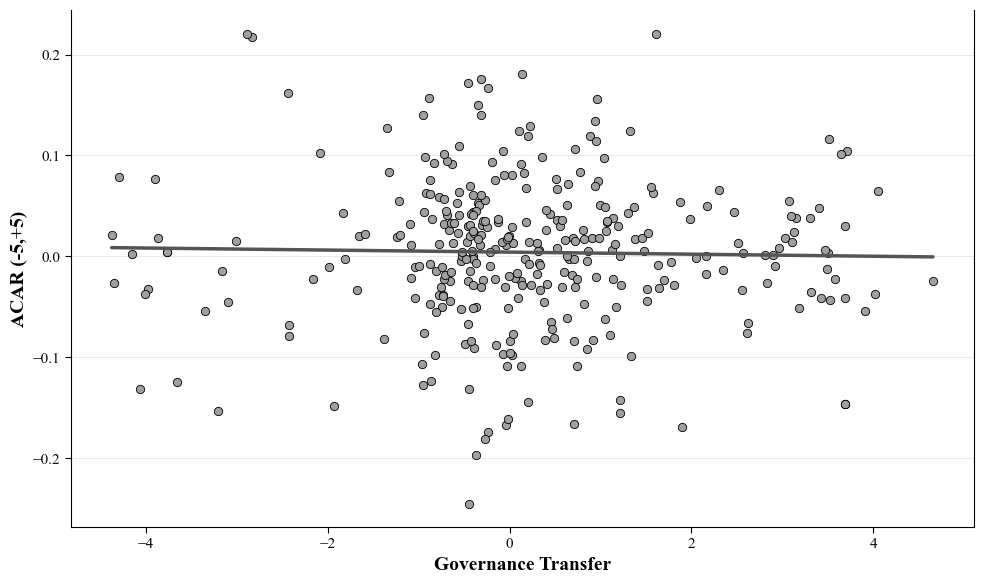

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter valid data
plot_data = ma_merged[["Governance Transfer", "ACAR (-5,+5)"]].dropna()

# === Style Setup ===
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 12,
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.edgecolor': 'black'
})

# === Plot ===
fig, ax = plt.subplots(figsize=(10, 6))

# Grid behind
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, zorder=0)
ax.xaxis.grid(False)

# Scatterplot + linear regression line (no confidence interval)
sns.regplot(
    x="Governance Transfer",
    y="ACAR (-5,+5)",
    data=plot_data,
    ci=None,
    scatter_kws={
        'alpha': 1.0,
        'color': '#A0A0A0',
        'edgecolor': 'black',
        'linewidths': 0.6
    },
    line_kws={
        'color': '#555555',
        'linewidth': 2.5
    },
    ax=ax
)

# Axis labels
ax.set_xlabel("Governance Transfer", fontsize=14, fontweight='bold', family='Times New Roman')
ax.set_ylabel("ACAR (-5,+5)", fontsize=14, fontweight='bold', family='Times New Roman')

# Tick styling: outward, no top/right ticks
ax.tick_params(
    axis='x',
    which='both',
    direction='out',
    length=4,
    width=0.8,
    colors='black',
    tick1On=True,   # Bottom ticks on
    tick2On=False,  # Top ticks off
    labelsize=11
)

ax.tick_params(
    axis='y',
    which='both',
    direction='out',
    length=4,
    width=0.8,
    colors='black',
    tick1On=True,   # Left ticks on
    tick2On=False,  # Right ticks off
    labelsize=11
)

# Spine styling: open top, styled bottom/left/right
ax.spines['top'].set_visible(False)
for side in ['bottom', 'left', 'right']:
    ax.spines[side].set_visible(True)
    ax.spines[side].set_color('black')
    ax.spines[side].set_linewidth(0.8)

# Final layout and save
plt.tight_layout()
#plt.savefig("governance_transfer_scatter_final.png", dpi=1000, bbox_inches='tight')
plt.show()


#### Winsorization Check (Plot)

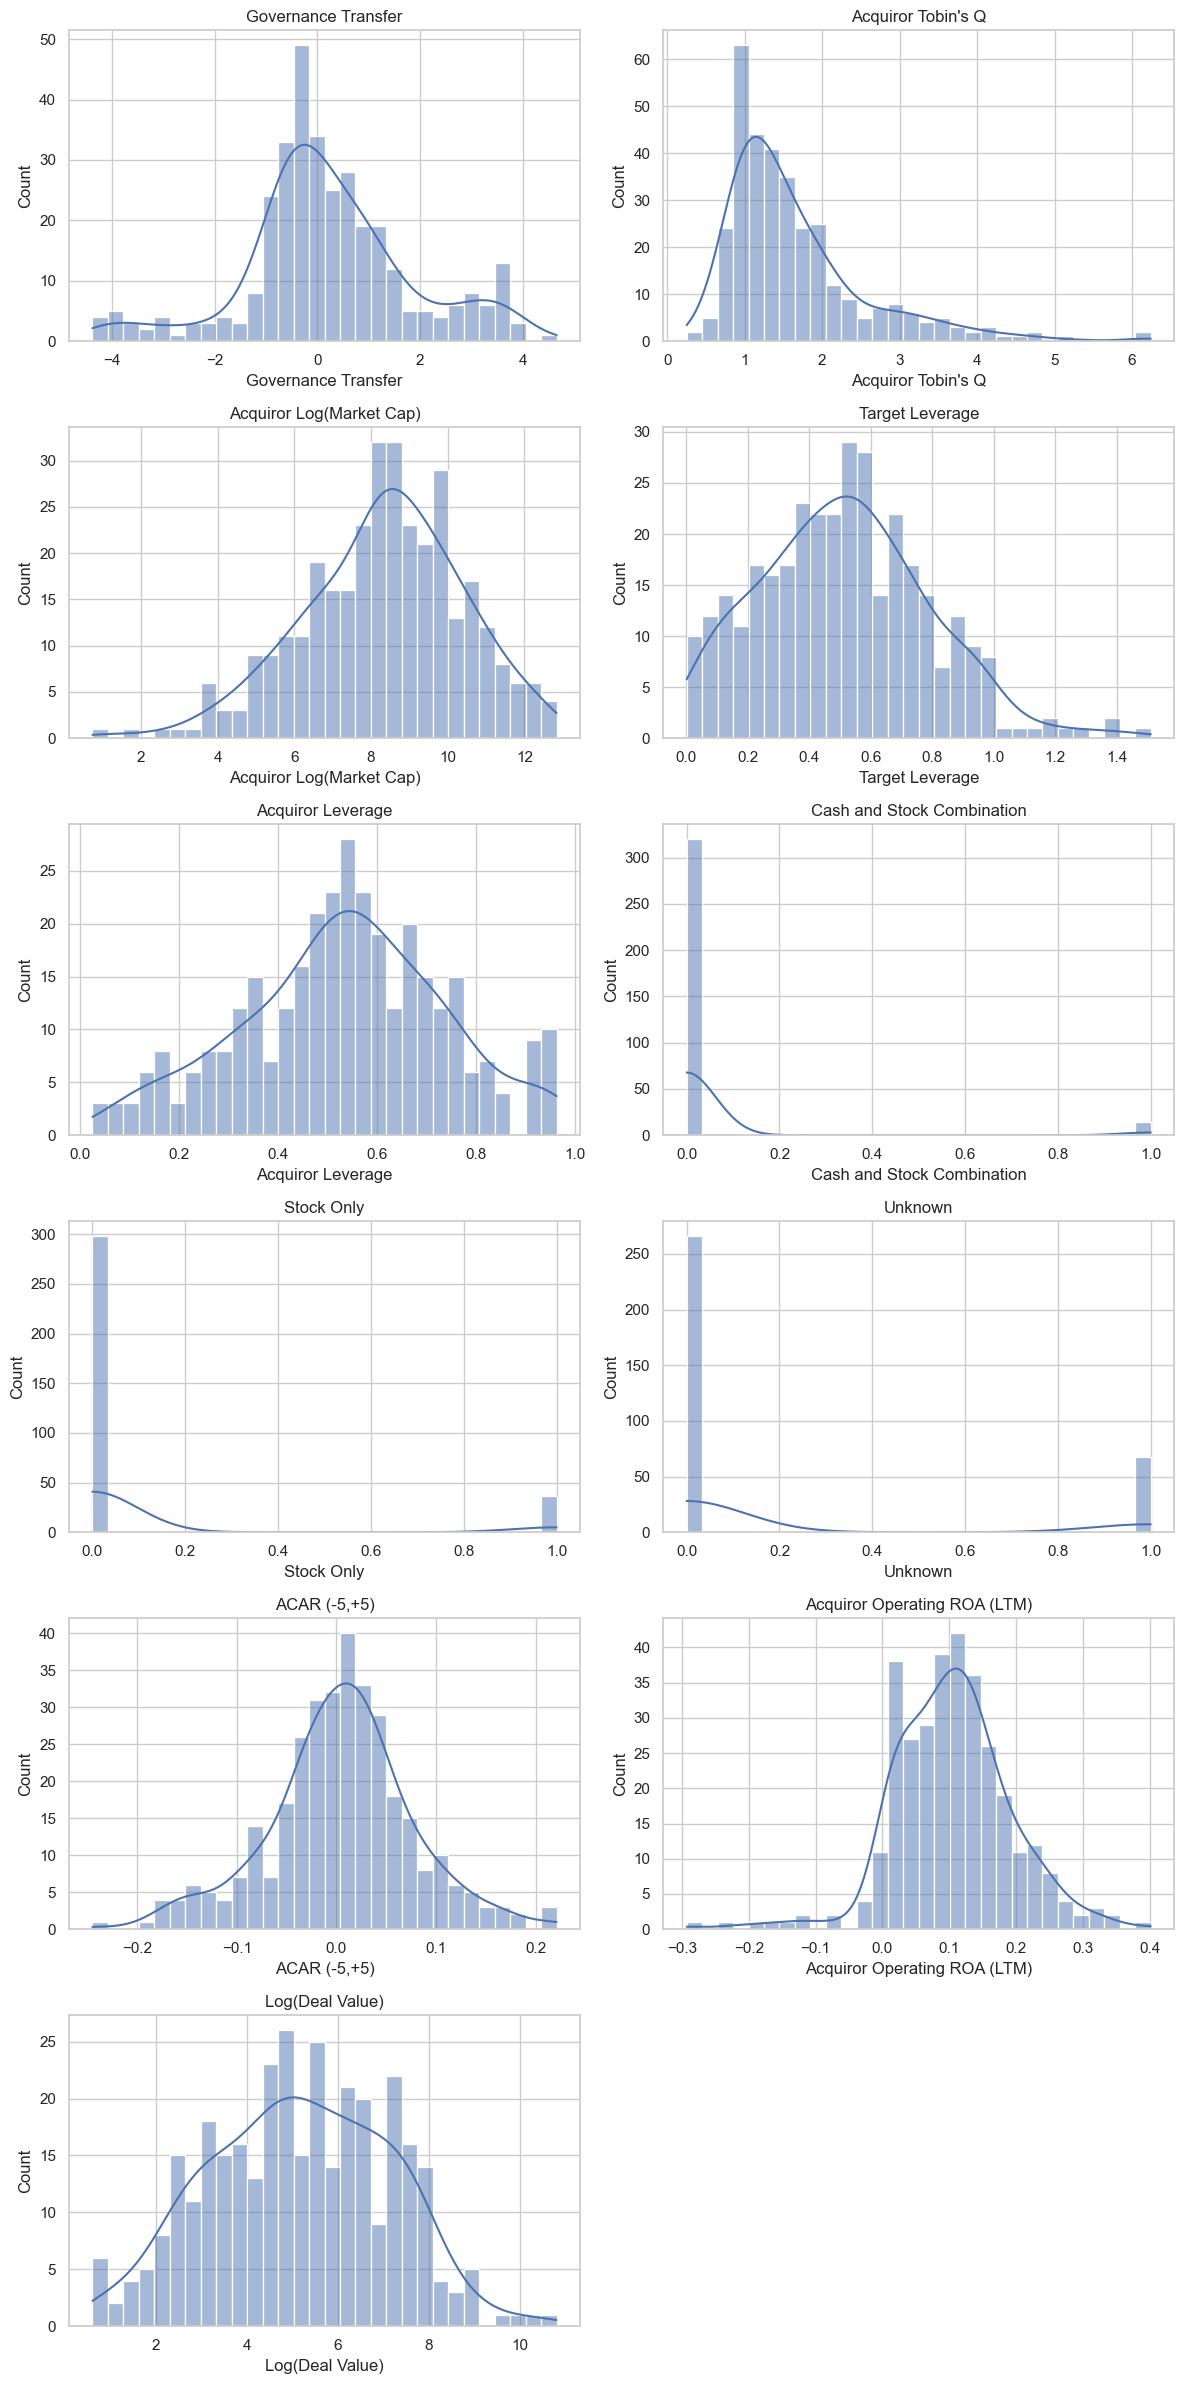

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

key_vars = [
    "Governance Transfer",
    "Acquiror Tobin's Q",
    "Acquiror Log(Market Cap)",
    "Target Leverage",
    "Acquiror Leverage",
    "Cash and Stock Combination",
    "Stock Only",
    "Unknown",
    "ACAR (-5,+5)",
    "Acquiror Operating ROA (LTM)",
    "Log(Deal Value)"
]

# Set up the plot grid
n_cols = 2
n_rows = (len(key_vars) + 1) // n_cols
plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(key_vars, 1):
    if col in ma_merged.columns:
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(ma_merged[col].dropna(), kde=True, bins=30)
        plt.title(col)
    else:
        print(f"⚠️ Column not found: {col}")

plt.tight_layout()

# plt.savefig('filename.png')  # (optional)
 
plt.show()


## Results, Paragraph 1

### Table 1 

#### Regression Table 1 (Basic Regression)

In [6]:
# Ensure the SDC Deal No columns are of the same type
ma_data['SDC Deal No'] = ma_data['SDC Deal No'].astype(str)
acar_results['SDC Deal No'] = acar_results['SDC Deal No'].astype(str)

# Merge ACAR into ma_data
ma_merged = ma_data.merge(
    acar_results[['SDC Deal No', 'ACAR (-5,+5)']], 
    on='SDC Deal No',
    how='left'
)

# Check how many matches we made
matched = ma_merged['ACAR (-5,+5)'].notna().sum()
total = len(ma_data)
print(f"✅ ACAR values merged: {matched} out of {total} rows ({matched/total:.2%})")

# Define helper function for winsorization
def winsorize_column(df, col, lower=None, upper=None):
    if col in df.columns:
        if lower is not None:
            lower_val = df[col].quantile(lower)
        else:
            lower_val = None
        if upper is not None:
            upper_val = df[col].quantile(upper)
        else:
            upper_val = None
        df[col] = df[col].clip(lower=lower_val, upper=upper_val)
        print(f"✅ {col} winsorized ", end="")
        if lower_val is not None: print(f"lower={lower_val:.3f} ", end="")
        if upper_val is not None: print(f"upper={upper_val:.3f}", end="")
        print()
    else:
        print(f"❌ Column '{col}' not found.")

# Define helper function for trimming
def trim_upper(df, col, quantile=0.99):
    if col in df.columns:
        threshold = df[col].quantile(quantile)
        original_rows = len(df)
        df = df[df[col] <= threshold]
        trimmed_rows = original_rows - len(df)
        print(f"✂️ Trimmed {trimmed_rows} rows where {col} > {threshold:.3f}")
        return df
    else:
        print(f"❌ Column '{col}' not found.")
        return df

# Apply winsorization
winsorize_column(ma_merged, 'Governance Transfer', 0.00, 1.00)
winsorize_column(ma_merged, 'ACAR (-5,+5)', 0.005, 0.98)

# ✅ FINAL STEP: Filter to base regression sample (IV & DV must be present)
base_vars = ['ACAR (-5,+5)', 'Governance Transfer']
ma_merged = ma_merged.dropna(subset=base_vars)

print(f"📉 Final regression sample size: {len(ma_merged)} rows")

# Optional: Preview cleaned and filtered dataset
ma_merged.head()


✅ ACAR values merged: 1195 out of 1458 rows (81.96%)
✅ Governance Transfer winsorized lower=-4.533 upper=5.891
✅ ACAR (-5,+5) winsorized lower=-0.245 upper=0.221
📉 Final regression sample size: 1134 rows


,SDC Deal No,Date Announced,Rank Date,"Rank Value inc. Net Debt of Target\n(USD, Millions)",Target Full Name,Target Macro Industry,Target Mid Industry,Target Nation,Acquiror Full Name,Acquiror Macro Industry,...,"Total Liabilities Last 12 Months\n(USD, Millions)","Target Market Value 4 Weeks Prior to Announcement\n(USD, Millions)",Target Leverage,Unnamed: 40,Cross Border Deal Flag,Unnamed: 42,Governance Indicator Acquirer Nation (Year of Announcement),Governance Indicator Target Nation (Year of Announcement),Governance Transfer,"ACAR (-5,+5)"
0,2426046040,2013-01-30,2013-02-01,1860.529127,Administradora de Fondos de Pensiones Provida SA,Financials,Asset Management,Chile,MetLife Inc,Financials,...,101241.108246,1828.296128,0.295095,NaN,True,NaN,7.459427,7.288333,0.171094,-0.002791
1,1733107040,2006-02-03,2006-02-03,6001.534208,Banca Nazionale del Lavoro,Financials,Banks,Italy,BNP Paribas SA,Financials,...,98390.498348,10554.957603,0.942932,NaN,True,NaN,7.559920,6.261493,1.298427,0.042565
2,4099635020,2023-06-27,2023-06-27,3587.031000,American Equity Investment Life Holding Co,Financials,Insurance,United States,Brookfield Reinsurance Ltd,Financials,...,71866.917000,3138.790000,0.964712,NaN,True,NaN,7.869362,6.989663,0.879700,-0.011241
3,1801353020,2008-10-13,2008-10-13,1910.192000,Sovereign Bancorp Inc,Financials,Banks,United States,Banco Santander SA,Financials,...,69833.325000,17496.388000,0.903163,NaN,True,NaN,6.777384,7.643603,-0.866218,-0.123276
4,3830524040,2021-11-15,2021-11-15,1544.597018,Turkiye Garanti Bankasi AS,Financials,Banks,Turkey,Banco Bilbao Vizcaya Argentaria SA,Financials,...,58376.397342,3963.623885,0.898290,NaN,True,NaN,6.590877,3.980506,2.610371,-0.076088


In [8]:
unique_countries = ma_merged["Target Nation"].nunique()
print(f"Number of unique countries in 'Target Nation': {unique_countries}")


Number of unique countries in 'Target Nation': 95


In [7]:
import pandas as pd

# Step 1: Filter to regression sample with non-missing DV and IV
regression_sample = ma_merged.dropna(subset=['ACAR (-5,+5)', 'Governance Transfer'])

# Step 2: Calculate number of deals per acquiror country
country_counts = regression_sample['Acquiror Nation'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number_of_Deals']

# Step 3: Calculate percentages
total_deals = regression_sample.shape[0]
country_counts['Percentage'] = round(100 * country_counts['Number_of_Deals'] / total_deals, 2)

# Step 4: Get top 10 countries
top_10 = country_counts.head(10)
top_10_total = top_10['Number_of_Deals'].sum()

# Step 5: Create "Other" row
other_row = pd.DataFrame({
    'Country': ['Other'],
    'Number_of_Deals': [total_deals - top_10_total],
    'Percentage': [round(100 * (total_deals - top_10_total) / total_deals, 2)]
})

# Step 6: Append "Other" to top 10
top_10_with_other = pd.concat([top_10, other_row], ignore_index=True)

# Step 7: Display result
top_10_with_other


,Country,Number_of_Deals,Percentage
0,United States,226,19.93
1,Japan,142,12.52
2,United Kingdom,128,11.29
3,Canada,78,6.88
4,Australia,63,5.56
5,Germany,41,3.62
6,France,39,3.44
7,Sweden,36,3.17
8,Switzerland,29,2.56
9,Hong Kong,27,2.38


### Table 2 (Summary Statistics)

##### Table 2 (Basic Regression Statistics)

In [9]:
# Ensure the SDC Deal No columns are of the same type
ma_data['SDC Deal No'] = ma_data['SDC Deal No'].astype(str)
acar_results['SDC Deal No'] = acar_results['SDC Deal No'].astype(str)

# Merge ACAR into ma_data
ma_merged = ma_data.merge(
    acar_results[['SDC Deal No', 'ACAR (-5,+5)']], 
    on='SDC Deal No',
    how='left'
)

# Check how many matches we made
matched = ma_merged['ACAR (-5,+5)'].notna().sum()
total = len(ma_data)
print(f"✅ ACAR values merged: {matched} out of {total} rows ({matched/total:.2%})")

# Define helper function for winsorization
def winsorize_column(df, col, lower=None, upper=None):
    if col in df.columns:
        if lower is not None:
            lower_val = df[col].quantile(lower)
        else:
            lower_val = None
        if upper is not None:
            upper_val = df[col].quantile(upper)
        else:
            upper_val = None
        df[col] = df[col].clip(lower=lower_val, upper=upper_val)
        print(f"✅ {col} winsorized ", end="")
        if lower_val is not None: print(f"lower={lower_val:.3f} ", end="")
        if upper_val is not None: print(f"upper={upper_val:.3f}", end="")
        print()
    else:
        print(f"❌ Column '{col}' not found.")

# Define helper function for trimming
def trim_upper(df, col, quantile=0.99):
    if col in df.columns:
        threshold = df[col].quantile(quantile)
        original_rows = len(df)
        df = df[df[col] <= threshold]
        trimmed_rows = original_rows - len(df)
        print(f"✂️ Trimmed {trimmed_rows} rows where {col} > {threshold:.3f}")
        return df
    else:
        print(f"❌ Column '{col}' not found.")
        return df

# Apply winsorization
winsorize_column(ma_merged, 'Governance Transfer', 0.00, 1.00)
winsorize_column(ma_merged, 'ACAR (-5,+5)', 0.005, 0.98)

# ✅ FINAL STEP: Filter to base regression sample (IV & DV must be present)
base_vars = ['ACAR (-5,+5)', 'Governance Transfer']
ma_merged = ma_merged.dropna(subset=base_vars)

print(f"📉 Final regression sample size: {len(ma_merged)} rows")

# Optional: Preview cleaned and filtered dataset
ma_merged.head()


✅ ACAR values merged: 1195 out of 1458 rows (81.96%)
✅ Governance Transfer winsorized lower=-4.533 upper=5.891
✅ ACAR (-5,+5) winsorized lower=-0.245 upper=0.221
📉 Final regression sample size: 1134 rows


,SDC Deal No,Date Announced,Rank Date,"Rank Value inc. Net Debt of Target\n(USD, Millions)",Target Full Name,Target Macro Industry,Target Mid Industry,Target Nation,Acquiror Full Name,Acquiror Macro Industry,...,"Total Liabilities Last 12 Months\n(USD, Millions)","Target Market Value 4 Weeks Prior to Announcement\n(USD, Millions)",Target Leverage,Unnamed: 40,Cross Border Deal Flag,Unnamed: 42,Governance Indicator Acquirer Nation (Year of Announcement),Governance Indicator Target Nation (Year of Announcement),Governance Transfer,"ACAR (-5,+5)"
0,2426046040,2013-01-30,2013-02-01,1860.529127,Administradora de Fondos de Pensiones Provida SA,Financials,Asset Management,Chile,MetLife Inc,Financials,...,101241.108246,1828.296128,0.295095,NaN,True,NaN,7.459427,7.288333,0.171094,-0.002791
1,1733107040,2006-02-03,2006-02-03,6001.534208,Banca Nazionale del Lavoro,Financials,Banks,Italy,BNP Paribas SA,Financials,...,98390.498348,10554.957603,0.942932,NaN,True,NaN,7.559920,6.261493,1.298427,0.042565
2,4099635020,2023-06-27,2023-06-27,3587.031000,American Equity Investment Life Holding Co,Financials,Insurance,United States,Brookfield Reinsurance Ltd,Financials,...,71866.917000,3138.790000,0.964712,NaN,True,NaN,7.869362,6.989663,0.879700,-0.011241
3,1801353020,2008-10-13,2008-10-13,1910.192000,Sovereign Bancorp Inc,Financials,Banks,United States,Banco Santander SA,Financials,...,69833.325000,17496.388000,0.903163,NaN,True,NaN,6.777384,7.643603,-0.866218,-0.123276
4,3830524040,2021-11-15,2021-11-15,1544.597018,Turkiye Garanti Bankasi AS,Financials,Banks,Turkey,Banco Bilbao Vizcaya Argentaria SA,Financials,...,58376.397342,3963.623885,0.898290,NaN,True,NaN,6.590877,3.980506,2.610371,-0.076088


In [10]:
import pandas as pd

# Create a mapping from dataset column names to display names
display_names = {
    'ACAR (-5,+5)': 'Acquirer CAR [-5,+5] (%)',
    'Governance Indicator Acquirer Nation (Year of Announcement)': 'Acquirer Country Governance',
    'Governance Indicator Target Nation (Year of Announcement)': 'Target Country Governance',
    'Governance Difference (Acquirer - Target)': 'Governance Difference (Acquirer − Target)',
}

# Column names grouped by panel (use original dataset column names)
panel_a = ['ACAR (-5,+5)']
panel_b = [
    'Governance Indicator Acquirer Nation (Year of Announcement)',
    'Governance Indicator Target Nation (Year of Announcement)',
    'Governance Difference (Acquirer - Target)'
]

# Add calculated governance difference if not already present
ma_merged['Governance Difference (Acquirer - Target)'] = (
    ma_merged['Governance Indicator Acquirer Nation (Year of Announcement)'] -
    ma_merged['Governance Indicator Target Nation (Year of Announcement)']
)

# Combine all variables
all_vars = panel_a + panel_b

# Generate summary statistics
summary_data = []

for var in all_vars:
    series = ma_merged[var].dropna()
    summary_data.append({
        'Variable (Raw)': var,
        'Mean': series.mean(),
        'Std. Dev.': series.std(),
        'Q1': series.quantile(0.25),
        'Median': series.median(),
        'Q3': series.quantile(0.75),
        'N': series.count()
    })

# Convert to DataFrame
summary_df = pd.DataFrame(summary_data)

# Add clean variable names for display
summary_df['Variable'] = summary_df['Variable (Raw)'].map(display_names)

# Assign panels
def get_panel(var):
    if var in panel_a:
        return "Panel A: Dependent Variable"
    elif var in panel_b:
        return "Panel B: Governance Variables"
 
summary_df['Panel'] = summary_df['Variable (Raw)'].apply(get_panel)

# Final ordering and cleaning
summary_df = summary_df[['Panel', 'Variable', 'Mean', 'Std. Dev.', 'Q1', 'Median', 'Q3', 'N']]
summary_df = summary_df.sort_values(by='Panel')

summary_df


,Panel,Variable,Mean,Std. Dev.,Q1,Median,Q3,N
0,Panel A: Dependent Variable,"Acquirer CAR [-5,+5] (%)",0.005041,0.077767,-0.031823,0.003835,0.043407,1134
1,Panel B: Governance Variables,Acquirer Country Governance,7.401965,1.009212,7.342985,7.595416,7.981165,1134
2,Panel B: Governance Variables,Target Country Governance,6.839057,1.510546,5.965641,7.455977,7.950391,1134
3,Panel B: Governance Variables,Governance Difference (Acquirer − Target),0.562908,1.756493,-0.457787,0.302839,1.395634,1134


##### Table 2 Dataset Full Regression

In [11]:
# Ensure the SDC Deal No columns are of the same type
ma_data['SDC Deal No'] = ma_data['SDC Deal No'].astype(str)
acar_results['SDC Deal No'] = acar_results['SDC Deal No'].astype(str)

# Merge ACAR into ma_data
ma_merged = ma_data.merge(
    acar_results[['SDC Deal No', 'ACAR (-5,+5)']], 
    on='SDC Deal No',
    how='left'
)

# Check how many matches we made
matched = ma_merged['ACAR (-5,+5)'].notna().sum()
total = len(ma_data)
print(f"✅ ACAR values merged: {matched} out of {total} rows ({matched/total:.2%})")

# Define helper function for winsorization
def winsorize_column(df, col, lower=None, upper=None):
    if col in df.columns:
        if lower is not None:
            lower_val = df[col].quantile(lower)
        else:
            lower_val = None
        if upper is not None:
            upper_val = df[col].quantile(upper)
        else:
            upper_val = None
        df[col] = df[col].clip(lower=lower_val, upper=upper_val)
        print(f"✅ {col} winsorized ", end="")
        if lower_val is not None: print(f"lower={lower_val:.3f} ", end="")
        if upper_val is not None: print(f"upper={upper_val:.3f}", end="")
        print()
    else:
        print(f"❌ Column '{col}' not found.")

# Define helper function for trimming
def trim_upper(df, col, quantile=0.99):
    if col in df.columns:
        threshold = df[col].quantile(quantile)
        original_rows = len(df)
        df = df[df[col] <= threshold]
        trimmed_rows = original_rows - len(df)
        print(f"✂️ Trimmed {trimmed_rows} rows where {col} > {threshold:.3f}")
        return df
    else:
        print(f"❌ Column '{col}' not found.")
        return df

# Apply winsorization
winsorize_column(ma_merged, 'Governance Transfer', 0.00, 1.00)
winsorize_column(ma_merged, 'Acquiror Log(Market Cap)', 0.005, 0.995)
winsorize_column(ma_merged, 'ACAR (-5,+5)', 0.005, 0.98)
winsorize_column(ma_merged, 'Acquiror Operating ROA (LTM)', 0.005, 0.995)
winsorize_column(ma_merged, 'Log(Deal Value)', 0, 1.00)

# Apply trimming for three variables
ma_merged = trim_upper(ma_merged, 'Target Leverage', 0.99)
ma_merged = trim_upper(ma_merged, "Acquiror Tobin's Q", 0.98)
ma_merged = trim_upper(ma_merged, 'Acquiror Leverage', 0.99)

# ✅ FINAL STEP: Filter to base regression sample (IV & DV must be present)
base_vars = ['ACAR (-5,+5)', 'Governance Transfer']
ma_merged = ma_merged.dropna(subset=base_vars)

print(f"📉 Final regression sample size: {len(ma_merged)} rows")

# Optional: Preview cleaned and filtered dataset
ma_merged.head()


✅ ACAR values merged: 1195 out of 1458 rows (81.96%)
✅ Governance Transfer winsorized lower=-4.533 upper=5.891
✅ Acquiror Log(Market Cap) winsorized lower=0.193 upper=12.839
✅ ACAR (-5,+5) winsorized lower=-0.245 upper=0.221
✅ Acquiror Operating ROA (LTM) winsorized lower=-0.592 upper=0.401
✅ Log(Deal Value) winsorized lower=0.000 upper=10.801
✂️ Trimmed 890 rows where Target Leverage > 1.528
✂️ Trimmed 181 rows where Acquiror Tobin's Q > 6.277
✂️ Trimmed 4 rows where Acquiror Leverage > 0.964
📉 Final regression sample size: 334 rows


,SDC Deal No,Date Announced,Rank Date,"Rank Value inc. Net Debt of Target\n(USD, Millions)",Target Full Name,Target Macro Industry,Target Mid Industry,Target Nation,Acquiror Full Name,Acquiror Macro Industry,...,"Total Liabilities Last 12 Months\n(USD, Millions)","Target Market Value 4 Weeks Prior to Announcement\n(USD, Millions)",Target Leverage,Unnamed: 40,Cross Border Deal Flag,Unnamed: 42,Governance Indicator Acquirer Nation (Year of Announcement),Governance Indicator Target Nation (Year of Announcement),Governance Transfer,"ACAR (-5,+5)"
0,2426046040,2013-01-30,2013-02-01,1860.529127,Administradora de Fondos de Pensiones Provida SA,Financials,Asset Management,Chile,MetLife Inc,Financials,...,101241.108246,1828.296128,0.295095,NaN,True,NaN,7.459427,7.288333,0.171094,-0.002791
1,1733107040,2006-02-03,2006-02-03,6001.534208,Banca Nazionale del Lavoro,Financials,Banks,Italy,BNP Paribas SA,Financials,...,98390.498348,10554.957603,0.942932,NaN,True,NaN,7.559920,6.261493,1.298427,0.042565
3,1801353020,2008-10-13,2008-10-13,1910.192000,Sovereign Bancorp Inc,Financials,Banks,United States,Banco Santander SA,Financials,...,69833.325000,17496.388000,0.903163,NaN,True,NaN,6.777384,7.643603,-0.866218,-0.123276
4,3830524040,2021-11-15,2021-11-15,1544.597018,Turkiye Garanti Bankasi AS,Financials,Banks,Turkey,Banco Bilbao Vizcaya Argentaria SA,Financials,...,58376.397342,3963.623885,0.898290,NaN,True,NaN,6.590877,3.980506,2.610371,-0.076088
5,2948220040,2016-04-18,2016-04-18,718.772165,Banco BPI SA,Financials,Banks,Portugal,CaixaBank SA,Financials,...,40170.150348,2169.601915,0.931025,NaN,True,NaN,6.690114,6.999670,-0.309555,0.031623


In [16]:
import pandas as pd

# Create a mapping from dataset column names to display names
display_names = {
    'ACAR (-5,+5)': 'Acquirer CAR [-5,+5] (%)',
    'Governance Indicator Acquirer Nation (Year of Announcement)': 'Acquirer Country Governance',
    'Governance Indicator Target Nation (Year of Announcement)': 'Target Country Governance',
    'Governance Difference (Acquirer - Target)': 'Governance Difference (Acquirer − Target)',
    'Acquiror Log(Market Cap)': "Log(Bidder's Market Cap)",
    "Acquiror Tobin's Q": "Bidder's Q",
    'Acquiror Leverage': "Bidder's Leverage",
    'Acquiror Operating ROA (LTM)': "Bidder's ROA",
    'Target Leverage': "Target's Leverage",
    'Log(Deal Value)': "Log(Deal Value)",
    'Cash Only': 'All-Cash Deal (Dummy)',
    'Stock Only': 'Stock-Only Deal (Dummy)',
    'Cash and Stock Combination': 'Cash-and-Stock Deal (Dummy)',
    'Unknown': 'Unknown (Dummy)'
}

# Column names grouped by panel (use original dataset column names)
panel_a = ['ACAR (-5,+5)']
panel_b = [
    'Governance Indicator Acquirer Nation (Year of Announcement)',
    'Governance Indicator Target Nation (Year of Announcement)',
    'Governance Difference (Acquirer - Target)'
]
panel_c = [
    'Acquiror Log(Market Cap)',
    "Acquiror Tobin's Q",
    'Acquiror Leverage',
    'Acquiror Operating ROA (LTM)'
]
panel_d = ['Target Leverage']
panel_e = ['Log(Deal Value)', 'Cash Only', 'Stock Only', 'Cash and Stock Combination', 'Unknown']

# Add calculated governance difference if not already present
ma_merged['Governance Difference (Acquirer - Target)'] = (
    ma_merged['Governance Indicator Acquirer Nation (Year of Announcement)'] -
    ma_merged['Governance Indicator Target Nation (Year of Announcement)']
)

# Combine all variables
all_vars = panel_a + panel_b + panel_c + panel_d + panel_e

# Generate summary statistics
summary_data = []

for var in all_vars:
    series = ma_merged[var].dropna()
    summary_data.append({
        'Variable (Raw)': var,
        'Mean': series.mean(),
        'Std. Dev.': series.std(),
        'Q1': series.quantile(0.25),
        'Median': series.median(),
        'Q3': series.quantile(0.75),
        'N': series.count()
    })

# Convert to DataFrame
summary_df = pd.DataFrame(summary_data)

# Add clean variable names for display
summary_df['Variable'] = summary_df['Variable (Raw)'].map(display_names)

# Assign panels
def get_panel(var):
    if var in panel_a:
        return "Panel A: Dependent Variable"
    elif var in panel_b:
        return "Panel B: Governance Variables"
    elif var in panel_c:
        return "Panel C: Bidder Characteristics"
    elif var in panel_d:
        return "Panel D: Target Characteristics"
    elif var in panel_e:
        return "Panel E: Deal Characteristics"
    else:
        return ""

summary_df['Panel'] = summary_df['Variable (Raw)'].apply(get_panel)

# Final ordering and cleaning
summary_df = summary_df[['Panel', 'Variable', 'Mean', 'Std. Dev.', 'Q1', 'Median', 'Q3', 'N']]
summary_df = summary_df.sort_values(by='Panel')

summary_df


,Panel,Variable,Mean,Std. Dev.,Q1,Median,Q3,N
0,Panel A: Dependent Variable,"Acquirer CAR [-5,+5] (%)",0.004069,0.072924,-0.032031,0.005922,0.042932,334
1,Panel B: Governance Variables,Acquirer Country Governance,7.399142,1.086583,7.399900,7.551941,8.077837,334
2,Panel B: Governance Variables,Target Country Governance,7.193078,1.315992,6.743335,7.673274,8.177525,334
3,Panel B: Governance Variables,Governance Difference (Acquirer − Target),0.206064,1.656739,-0.622670,-0.001713,0.990457,334
4,Panel C: Bidder Characteristics,Log(Bidder's Market Cap),8.319222,2.096737,6.979932,8.423885,9.736932,334
5,Panel C: Bidder Characteristics,Bidder's Q,1.653325,0.919025,1.025591,1.355128,1.958977,334
6,Panel C: Bidder Characteristics,Bidder's Leverage,0.532899,0.206423,0.404645,0.541526,0.668408,334
7,Panel C: Bidder Characteristics,Bidder's ROA,0.104069,0.087859,0.046109,0.102125,0.151263,323
8,Panel D: Target Characteristics,Target's Leverage,0.513826,0.276439,0.321039,0.517923,0.693899,334
9,Panel E: Deal Characteristics,Log(Deal Value),5.144425,1.980053,3.661898,5.117636,6.597158,334


### Table 3, Pargraph 1

#### Full Regression Dataset (called cleaning & trimming for my full model)

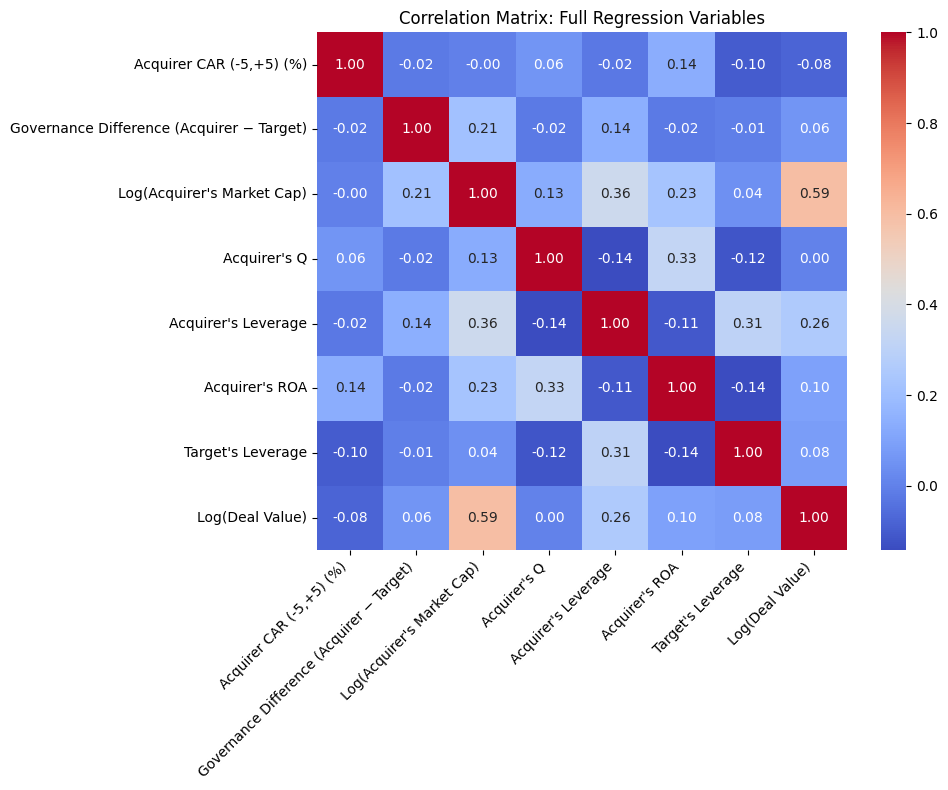

📌 VIF Table (Multicollinearity Diagnostic):
                                    Variable   VIF
1                 Log(Acquirer's Market Cap)  1.91
6                            Log(Deal Value)  1.58
3                        Acquirer's Leverage  1.34
4                             Acquirer's ROA  1.21
2                               Acquirer's Q  1.16
5                          Target's Leverage  1.13
0  Governance Difference (Acquirer − Target)  1.07


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ✅ Variables used in your full regression (excluding fixed effects)
model_vars = [
    'ACAR (-5,+5)',                              # DV
    'Governance Transfer',                       # IV
    'Acquiror Log(Market Cap)',                  # Control
    "Acquiror Tobin's Q",                        # Control
    'Acquiror Leverage',                         # Control
    'Acquiror Operating ROA (LTM)',              # Moderator
    'Target Leverage',                           # Control
    'Log(Deal Value)'                            # Moderator
]

# ✅ Mapping from dataset names to clean thesis-ready labels
name_map = {
    'ACAR (-5,+5)': 'Acquirer CAR (-5,+5) (%)',
    'Governance Transfer': 'Governance Difference (Acquirer − Target)',
    'Acquiror Log(Market Cap)': "Log(Acquirer's Market Cap)",
    "Acquiror Tobin's Q": "Acquirer's Q",
    'Acquiror Leverage': "Acquirer's Leverage",
    'Acquiror Operating ROA (LTM)': "Acquirer's ROA",
    'Target Leverage': "Target's Leverage",
    'Log(Deal Value)': "Log(Deal Value)"
}

# 🧼 Drop rows with missing values for selected vars
model_data = ma_merged[model_vars].dropna()

# 🏷️ Rename columns for prettier output
renamed_data = model_data.rename(columns=name_map)

# 📊 Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(renamed_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix: Full Regression Variables")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 🧮 VIF Calculation
X = renamed_data.drop(columns=['Acquirer CAR (-5,+5) (%)'])  # Drop DV
X = X.copy()
X['Intercept'] = 1  # Needed for VIF calculation

vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 📌 Drop Intercept from output
vif_df = vif_df[vif_df["Variable"] != "Intercept"]

# 🧾 Display nicely
print("📌 VIF Table (Multicollinearity Diagnostic):")
print(vif_df.sort_values(by="VIF", ascending=False).round(2))


## Regressions

### Main Regression Models

#### First Basic Regression Dataset

In [31]:
# Ensure the SDC Deal No columns are of the same type
ma_data['SDC Deal No'] = ma_data['SDC Deal No'].astype(str)
acar_results['SDC Deal No'] = acar_results['SDC Deal No'].astype(str)

# Merge ACAR into ma_data
ma_merged = ma_data.merge(
    acar_results[['SDC Deal No', 'ACAR (-5,+5)']], 
    on='SDC Deal No',
    how='left'
)

# Check how many matches we made
matched = ma_merged['ACAR (-5,+5)'].notna().sum()
total = len(ma_data)
print(f"✅ ACAR values merged: {matched} out of {total} rows ({matched/total:.2%})")

# Define helper function for winsorization
def winsorize_column(df, col, lower=None, upper=None):
    if col in df.columns:
        if lower is not None:
            lower_val = df[col].quantile(lower)
        else:
            lower_val = None
        if upper is not None:
            upper_val = df[col].quantile(upper)
        else:
            upper_val = None
        df[col] = df[col].clip(lower=lower_val, upper=upper_val)
        print(f"✅ {col} winsorized ", end="")
        if lower_val is not None: print(f"lower={lower_val:.3f} ", end="")
        if upper_val is not None: print(f"upper={upper_val:.3f}", end="")
        print()
    else:
        print(f"❌ Column '{col}' not found.")

# Define helper function for trimming
def trim_upper(df, col, quantile=0.99):
    if col in df.columns:
        threshold = df[col].quantile(quantile)
        original_rows = len(df)
        df = df[df[col] <= threshold]
        trimmed_rows = original_rows - len(df)
        print(f"✂️ Trimmed {trimmed_rows} rows where {col} > {threshold:.3f}")
        return df
    else:
        print(f"❌ Column '{col}' not found.")
        return df

# Apply winsorization
winsorize_column(ma_merged, 'Governance Transfer', 0.00, 1.00)
winsorize_column(ma_merged, 'Acquiror Log(Market Cap)', 0.005, 0.995)
winsorize_column(ma_merged, 'ACAR (-5,+5)', 0.005, 0.98)
#winsorize_column(ma_merged, 'Acquiror Operating ROA (LTM)', 0.005, 0.995)
#winsorize_column(ma_merged, 'Log(Deal Value)', 0, 1.00)

# Apply trimming for three variables
ma_merged = trim_upper(ma_merged, 'Target Leverage', 0.99)
ma_merged = trim_upper(ma_merged, "Acquiror Tobin's Q", 0.98)
ma_merged = trim_upper(ma_merged, 'Acquiror Leverage', 0.99)

# ✅ FINAL STEP: Filter to base regression sample (IV & DV must be present)
base_vars = ['ACAR (-5,+5)', 'Governance Transfer']
ma_merged = ma_merged.dropna(subset=base_vars)

print(f"📉 Final regression sample size: {len(ma_merged)} rows")

# Optional: Preview cleaned and filtered dataset
ma_merged.head()


✅ ACAR values merged: 1195 out of 1458 rows (81.96%)
✅ Governance Transfer winsorized lower=-4.533 upper=5.891
✅ Acquiror Log(Market Cap) winsorized lower=0.193 upper=12.839
✅ ACAR (-5,+5) winsorized lower=-0.245 upper=0.221
✂️ Trimmed 890 rows where Target Leverage > 1.528
✂️ Trimmed 181 rows where Acquiror Tobin's Q > 6.277
✂️ Trimmed 4 rows where Acquiror Leverage > 0.964
📉 Final regression sample size: 334 rows


,SDC Deal No,Date Announced,Rank Date,"Rank Value inc. Net Debt of Target\n(USD, Millions)",Target Full Name,Target Macro Industry,Target Mid Industry,Target Nation,Acquiror Full Name,Acquiror Macro Industry,...,"Total Liabilities Last 12 Months\n(USD, Millions)","Target Market Value 4 Weeks Prior to Announcement\n(USD, Millions)",Target Leverage,Unnamed: 40,Cross Border Deal Flag,Unnamed: 42,Governance Indicator Acquirer Nation (Year of Announcement),Governance Indicator Target Nation (Year of Announcement),Governance Transfer,"ACAR (-5,+5)"
0,2426046040,2013-01-30,2013-02-01,1860.529127,Administradora de Fondos de Pensiones Provida SA,Financials,Asset Management,Chile,MetLife Inc,Financials,...,101241.108246,1828.296128,0.295095,NaN,True,NaN,7.459427,7.288333,0.171094,-0.002791
1,1733107040,2006-02-03,2006-02-03,6001.534208,Banca Nazionale del Lavoro,Financials,Banks,Italy,BNP Paribas SA,Financials,...,98390.498348,10554.957603,0.942932,NaN,True,NaN,7.559920,6.261493,1.298427,0.042565
3,1801353020,2008-10-13,2008-10-13,1910.192000,Sovereign Bancorp Inc,Financials,Banks,United States,Banco Santander SA,Financials,...,69833.325000,17496.388000,0.903163,NaN,True,NaN,6.777384,7.643603,-0.866218,-0.123276
4,3830524040,2021-11-15,2021-11-15,1544.597018,Turkiye Garanti Bankasi AS,Financials,Banks,Turkey,Banco Bilbao Vizcaya Argentaria SA,Financials,...,58376.397342,3963.623885,0.898290,NaN,True,NaN,6.590877,3.980506,2.610371,-0.076088
5,2948220040,2016-04-18,2016-04-18,718.772165,Banco BPI SA,Financials,Banks,Portugal,CaixaBank SA,Financials,...,40170.150348,2169.601915,0.931025,NaN,True,NaN,6.690114,6.999670,-0.309555,0.031623


#### First Regression

In [21]:
import pandas as pd
import statsmodels.formula.api as smf

# Load dataset
data = ma_merged.copy()

# Extract DealYear
data['DealYear'] = pd.to_datetime(data['Date Announced'], dayfirst=True).dt.year

# Define DV, IV, and corrected Fixed Effects
dv = 'ACAR (-5,+5)'
iv = 'Governance Transfer'
industry_fe = 'C(Q("Acquiror Macro Industry"))'
year_fe = 'C(DealYear)'

# Define formula
formula = f'Q("{dv}") ~ Q("{iv}") + {industry_fe} + {year_fe}'

# Drop missing data for needed vars
current_vars = [dv, iv, 'Acquiror Macro Industry', 'DealYear']
model_data = data.dropna(subset=current_vars)

# Run regression
model = smf.ols(formula=formula, data=model_data).fit(cov_type='HC1')

# Print results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-5,+5)")   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.478
Date:                Sun, 27 Apr 2025   Prob (F-statistic):             0.0408
Time:                        12:06:34   Log-Likelihood:                 1310.9
No. Observations:                1134   AIC:                            -2554.
Df Residuals:                    1100   BIC:                            -2383.
Df Model:                          33                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

#### Regression Model 1 (Market Cap)

In [25]:
import pandas as pd
import statsmodels.formula.api as smf

# 1. Load your cleaned original dataset
data = ma_merged.copy()

# 2. Extract Deal Year from Date Announced
data['DealYear'] = pd.to_datetime(data['Date Announced'], dayfirst=True).dt.year

# 3. Define DV, IV, Controls, and Fixed Effects
dv = 'ACAR (-5,+5)'
iv = 'Governance Transfer'
control = 'Acquiror Log(Market Cap)'  # ✅ Using Log(Market Cap) now
industry_fe = 'C(Q("Acquiror Macro Industry"))'
year_fe = 'C(DealYear)'

# 4. Define your regression formula
formula = f'Q("{dv}") ~ Q("{iv}") + Q("{control}") + {industry_fe} + {year_fe}'

# 5. Drop missing data for variables needed
current_vars = [dv, iv, control, 'Acquiror Macro Industry', 'DealYear']
model_data = data.dropna(subset=current_vars)

# 6. Run the regression with robust standard errors
model = smf.ols(formula=formula, data=model_data).fit(cov_type='HC1')

# 7. Print the regression summary
print("✅ Regression Results (with Log(Bidder's Market Cap) as control):")
print(model.summary())


✅ Regression Results (with Log(Bidder's Market Cap) as control):
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-5,+5)")   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.461
Date:                Sun, 27 Apr 2025   Prob (F-statistic):             0.0448
Time:                        12:29:10   Log-Likelihood:                 967.94
No. Observations:                 843   AIC:                            -1866.
Df Residuals:                     808   BIC:                            -1700.
Df Model:                          34                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

#### Regression Model 3 control

In [28]:
import pandas as pd
import statsmodels.formula.api as smf

# 1. Use your existing cleaned dataset
data = ma_merged.copy()

# 2. Ensure DealYear exists
data['DealYear'] = pd.to_datetime(data['Date Announced'], dayfirst=True).dt.year

# 3. Define variables
dv = 'ACAR (-5,+5)'
iv = 'Governance Transfer'
control_1 = 'Acquiror Log(Market Cap)'
control_2 = 'Acquiror Leverage'
industry_fe = 'C(Q("Acquiror Macro Industry"))'
year_fe = 'C(DealYear)'

# 4. Define formula including 2 controls now
formula = f'Q("{dv}") ~ Q("{iv}") + Q("{control_1}") + Q("{control_2}") + {industry_fe} + {year_fe}'

# 5. Drop missing data only for needed vars
current_vars = [dv, iv, control_1, control_2, 'Acquiror Macro Industry', 'DealYear']
model_data = data.dropna(subset=current_vars)

# 6. Run regression
model = smf.ols(formula=formula, data=model_data).fit(cov_type='HC1')

# 7. Print results
print("✅ Regression Results (Adding Acquiror Leverage):")
print(model.summary())


✅ Regression Results (Adding Acquiror Leverage):
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-5,+5)")   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.469
Date:                Sun, 27 Apr 2025   Prob (F-statistic):             0.0408
Time:                        12:32:57   Log-Likelihood:                 928.30
No. Observations:                 806   AIC:                            -1785.
Df Residuals:                     770   BIC:                            -1616.
Df Model:                          35                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

#### Regression Model 4

In [30]:
import pandas as pd
import statsmodels.formula.api as smf

# 1. Use your existing cleaned dataset
data = ma_merged.copy()

# 2. Ensure DealYear exists
data['DealYear'] = pd.to_datetime(data['Date Announced'], dayfirst=True).dt.year

# 3. Define variables
dv = 'ACAR (-5,+5)'
iv = 'Governance Transfer'
control_1 = 'Acquiror Log(Market Cap)'
control_2 = 'Acquiror Leverage'
control_3 = "Acquiror Tobin's Q"  # ✅ New control (Tobin's Q)
industry_fe = 'C(Q("Acquiror Macro Industry"))'
year_fe = 'C(DealYear)'

# 4. Define formula including 3 controls now
formula = f'Q("{dv}") ~ Q("{iv}") + Q("{control_1}") + Q("{control_2}") + Q("{control_3}") + {industry_fe} + {year_fe}'

# 5. Drop missing data only for variables used
current_vars = [dv, iv, control_1, control_2, control_3, 'Acquiror Macro Industry', 'DealYear']
model_data = data.dropna(subset=current_vars)

# 6. Run regression with robust standard errors
model = smf.ols(formula=formula, data=model_data).fit(cov_type='HC1')

# 7. Print regression results
print("✅ Regression Results (Adding Bidder's Tobin's Q):")
print(model.summary())


✅ Regression Results (Adding Bidder's Tobin's Q):
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-5,+5)")   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.459
Date:                Sun, 27 Apr 2025   Prob (F-statistic):             0.0418
Time:                        12:45:29   Log-Likelihood:                 906.12
No. Observations:                 778   AIC:                            -1738.
Df Residuals:                     741   BIC:                            -1566.
Df Model:                          36                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

#### Regression Model 5

In [32]:
import pandas as pd
import statsmodels.formula.api as smf

# 1. Use your existing cleaned dataset
data = ma_merged.copy()

# 2. Ensure DealYear is extracted
data['DealYear'] = pd.to_datetime(data['Date Announced'], dayfirst=True).dt.year

# 3. Define variables
dv = 'ACAR (-5,+5)'
iv = 'Governance Transfer'
control_1 = 'Acquiror Log(Market Cap)'
control_2 = 'Acquiror Leverage'
control_3 = "Acquiror Tobin's Q"
control_4 = 'Target Leverage'  # ✅ Now adding Target Leverage
industry_fe = 'C(Q("Acquiror Macro Industry"))'
year_fe = 'C(DealYear)'

# 4. Build the regression formula
formula = (
    f'Q("{dv}") ~ Q("{iv}") + Q("{control_1}") + Q("{control_2}") + '
    f'Q("{control_3}") + Q("{control_4}") + {industry_fe} + {year_fe}'
)

# 5. Drop missing values for variables needed
current_vars = [dv, iv, control_1, control_2, control_3, control_4, 'Acquiror Macro Industry', 'DealYear']
model_data = data.dropna(subset=current_vars)

# 6. Print sample size for your thesis reporting
print(f"✅ Observations for Model (with Target Leverage): {len(model_data)}")

# 7. Run the regression with robust standard errors
model = smf.ols(formula=formula, data=model_data).fit(cov_type='HC1')

# 8. Print the model summary
print("\n✅ Regression Results (Including Target Leverage):")
print(model.summary())


✅ Observations for Model (with Target Leverage): 334

✅ Regression Results (Including Target Leverage):
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-5,+5)")   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.444
Date:                Sun, 27 Apr 2025   Prob (F-statistic):             0.0525
Time:                        13:05:52   Log-Likelihood:                 426.76
No. Observations:                 334   AIC:                            -777.5
Df Residuals:                     296   BIC:                            -632.7
Df Model:                          37                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|    

#### Regression Model 6

In [46]:
import pandas as pd
import statsmodels.formula.api as smf

# Dataset already loaded as data

# 1. Make sure DealYear is there
ma_merged['DealYear'] = pd.to_datetime(ma_merged['Date Announced'], dayfirst=True).dt.year

# 2. Variables
dv = 'ACAR (-5,+5)'
iv = 'Governance Transfer'
control_1 = 'Acquiror Log(Market Cap)'
control_2 = 'Acquiror Leverage'
control_3 = "Acquiror Tobin's Q"
control_4 = 'Target Leverage'
payment_dummy_1 = 'Stock Only'
payment_dummy_2 = 'Cash and Stock Combination'
payment_dummy_3 = 'Unknown'
industry_fe = 'C(Q("Acquiror Macro Industry"))'
year_fe = 'C(DealYear)'

# 3. Define the formula
formula = (
    f'Q("{dv}") ~ Q("{iv}") + Q("{control_1}") + Q("{control_2}") + '
    f'Q("{control_3}") + Q("{control_4}") + '
    f'Q("{payment_dummy_1}") + Q("{payment_dummy_2}") + Q("{payment_dummy_3}") + '
    f'{industry_fe} + {year_fe}'
)

# 4. Drop missing data for needed vars
current_vars = [dv, iv, control_1, control_2, control_3, control_4,
                payment_dummy_1, payment_dummy_2, payment_dummy_3,
                'Acquiror Macro Industry', 'DealYear']

model_data = ma_merged.dropna(subset=current_vars)

# 5. Run regression
model = smf.ols(formula=formula, data=model_data).fit(cov_type='HC1')

# 6. Print results
print("✅ Regression Results (Full Model with 3 Payment Dummies):")
print(model.summary())

✅ Regression Results (Full Model with 3 Payment Dummies):
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-5,+5)")   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.452
Date:                Tue, 13 May 2025   Prob (F-statistic):             0.0448
Time:                        13:28:20   Log-Likelihood:                 430.52
No. Observations:                 334   AIC:                            -779.0
Df Residuals:                     293   BIC:                            -622.8
Df Model:                          40                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

### Moderating Regression Model (ROA)

#### Regression Dataset

In [16]:
# Ensure the SDC Deal No columns are of the same type
ma_data['SDC Deal No'] = ma_data['SDC Deal No'].astype(str)
acar_results['SDC Deal No'] = acar_results['SDC Deal No'].astype(str)

# Merge ACAR into ma_data
ma_merged = ma_data.merge(
    acar_results[['SDC Deal No', 'ACAR (-5,+5)']], 
    on='SDC Deal No',
    how='left'
)

# Check how many matches we made
matched = ma_merged['ACAR (-5,+5)'].notna().sum()
total = len(ma_data)
print(f"✅ ACAR values merged: {matched} out of {total} rows ({matched/total:.2%})")

# Define helper function for winsorization
def winsorize_column(df, col, lower=None, upper=None):
    if col in df.columns:
        if lower is not None:
            lower_val = df[col].quantile(lower)
        else:
            lower_val = None
        if upper is not None:
            upper_val = df[col].quantile(upper)
        else:
            upper_val = None
        df[col] = df[col].clip(lower=lower_val, upper=upper_val)
        print(f"✅ {col} winsorized ", end="")
        if lower_val is not None: print(f"lower={lower_val:.3f} ", end="")
        if upper_val is not None: print(f"upper={upper_val:.3f}", end="")
        print()
    else:
        print(f"❌ Column '{col}' not found.")

# Define helper function for trimming
def trim_upper(df, col, quantile=0.99):
    if col in df.columns:
        threshold = df[col].quantile(quantile)
        original_rows = len(df)
        df = df[df[col] <= threshold]
        trimmed_rows = original_rows - len(df)
        print(f"✂️ Trimmed {trimmed_rows} rows where {col} > {threshold:.3f}")
        return df
    else:
        print(f"❌ Column '{col}' not found.")
        return df

# Apply winsorization
winsorize_column(ma_merged, 'Governance Transfer', 0.00, 1.00)
winsorize_column(ma_merged, 'Acquiror Log(Market Cap)', 0.005, 0.995)
winsorize_column(ma_merged, 'ACAR (-5,+5)', 0.005, 0.98)
winsorize_column(ma_merged, 'Acquiror Operating ROA (LTM)', 0.005, 0.995)
#winsorize_column(ma_merged, 'Log(Deal Value)', 0, 1.00)

# Apply trimming for three variables
ma_merged = trim_upper(ma_merged, 'Target Leverage', 0.99)
ma_merged = trim_upper(ma_merged, "Acquiror Tobin's Q", 0.98)
ma_merged = trim_upper(ma_merged, 'Acquiror Leverage', 0.99)

# ✅ FINAL STEP: Filter to base regression sample (IV & DV must be present)
base_vars = ['ACAR (-5,+5)', 'Governance Transfer']
ma_merged = ma_merged.dropna(subset=base_vars)

print(f"📉 Final regression sample size: {len(ma_merged)} rows")

# Optional: Preview cleaned and filtered dataset
ma_merged.head()


✅ ACAR values merged: 1195 out of 1458 rows (81.96%)
✅ Governance Transfer winsorized lower=-4.533 upper=5.891
✅ Acquiror Log(Market Cap) winsorized lower=0.193 upper=12.839
✅ ACAR (-5,+5) winsorized lower=-0.245 upper=0.221
✅ Acquiror Operating ROA (LTM) winsorized lower=-0.592 upper=0.401
✂️ Trimmed 890 rows where Target Leverage > 1.528
✂️ Trimmed 181 rows where Acquiror Tobin's Q > 6.277
✂️ Trimmed 4 rows where Acquiror Leverage > 0.964
📉 Final regression sample size: 334 rows


,SDC Deal No,Date Announced,Rank Date,"Rank Value inc. Net Debt of Target\n(USD, Millions)",Target Full Name,Target Macro Industry,Target Mid Industry,Target Nation,Acquiror Full Name,Acquiror Macro Industry,...,"Total Liabilities Last 12 Months\n(USD, Millions)","Target Market Value 4 Weeks Prior to Announcement\n(USD, Millions)",Target Leverage,Unnamed: 40,Cross Border Deal Flag,Unnamed: 42,Governance Indicator Acquirer Nation (Year of Announcement),Governance Indicator Target Nation (Year of Announcement),Governance Transfer,"ACAR (-5,+5)"
0,2426046040,2013-01-30,2013-02-01,1860.529127,Administradora de Fondos de Pensiones Provida SA,Financials,Asset Management,Chile,MetLife Inc,Financials,...,101241.108246,1828.296128,0.295095,NaN,True,NaN,7.459427,7.288333,0.171094,-0.002791
1,1733107040,2006-02-03,2006-02-03,6001.534208,Banca Nazionale del Lavoro,Financials,Banks,Italy,BNP Paribas SA,Financials,...,98390.498348,10554.957603,0.942932,NaN,True,NaN,7.559920,6.261493,1.298427,0.042565
3,1801353020,2008-10-13,2008-10-13,1910.192000,Sovereign Bancorp Inc,Financials,Banks,United States,Banco Santander SA,Financials,...,69833.325000,17496.388000,0.903163,NaN,True,NaN,6.777384,7.643603,-0.866218,-0.123276
4,3830524040,2021-11-15,2021-11-15,1544.597018,Turkiye Garanti Bankasi AS,Financials,Banks,Turkey,Banco Bilbao Vizcaya Argentaria SA,Financials,...,58376.397342,3963.623885,0.898290,NaN,True,NaN,6.590877,3.980506,2.610371,-0.076088
5,2948220040,2016-04-18,2016-04-18,718.772165,Banco BPI SA,Financials,Banks,Portugal,CaixaBank SA,Financials,...,40170.150348,2169.601915,0.931025,NaN,True,NaN,6.690114,6.999670,-0.309555,0.031623


#### Moderating Regression (ROA)

In [17]:
import pandas as pd
import statsmodels.formula.api as smf

# 1. Make sure DealYear is extracted
ma_merged['DealYear'] = pd.to_datetime(ma_merged['Date Announced'], dayfirst=True).dt.year

# 2. Variables
dv = 'ACAR (-5,+5)'  # Dependent variable
iv = 'Governance Transfer'  # Independent variable
moderator = 'Acquiror Operating ROA (LTM)'  # New moderating variable

# Controls
control_1 = 'Acquiror Log(Market Cap)'
control_2 = 'Acquiror Leverage'
control_3 = "Acquiror Tobin's Q"
control_4 = 'Target Leverage'

# Payment method dummies
payment_dummy_1 = 'Stock Only'
payment_dummy_2 = 'Cash and Stock Combination'
payment_dummy_3 = 'Unknown'

# Fixed effects
industry_fe = 'C(Q("Acquiror Macro Industry"))'
year_fe = 'C(DealYear)'

# 3. Define the formula including the moderator and interaction
formula = (
    f'Q("{dv}") ~ Q("{iv}") + Q("{moderator}") + Q("{iv}"):Q("{moderator}") + '
    f'Q("{control_1}") + Q("{control_2}") + Q("{control_3}") + Q("{control_4}") + '
    f'Q("{payment_dummy_1}") + Q("{payment_dummy_2}") + Q("{payment_dummy_3}") + '
    f'{industry_fe} + {year_fe}'
)

# 4. Drop missing data for all relevant variables
current_vars = [dv, iv, moderator, control_1, control_2, control_3, control_4,
                payment_dummy_1, payment_dummy_2, payment_dummy_3,
                'Acquiror Macro Industry', 'DealYear']

model_data = ma_merged.dropna(subset=current_vars)

# 5. Run the regression
model_moderation = smf.ols(formula=formula, data=model_data).fit(cov_type='HC1')

# 6. Print results
print("✅ Regression Results: Moderating Effect of Acquiror Operating ROA")
print(model_moderation.summary())


✅ Regression Results: Moderating Effect of Acquiror Operating ROA
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-5,+5)")   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.440
Date:                Tue, 13 May 2025   Prob (F-statistic):             0.0462
Time:                        12:32:37   Log-Likelihood:                 418.04
No. Observations:                 323   AIC:                            -750.1
Df Residuals:                     280   BIC:                            -587.6
Df Model:                          42                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

### Moderating Regression model (Deal Value)

#### Regression Dataset

In [14]:
# Ensure the SDC Deal No columns are of the same type
ma_data['SDC Deal No'] = ma_data['SDC Deal No'].astype(str)
acar_results['SDC Deal No'] = acar_results['SDC Deal No'].astype(str)

# Merge ACAR into ma_data
ma_merged = ma_data.merge(
    acar_results[['SDC Deal No', 'ACAR (-5,+5)']], 
    on='SDC Deal No',
    how='left'
)

# Check how many matches we made
matched = ma_merged['ACAR (-5,+5)'].notna().sum()
total = len(ma_data)
print(f"✅ ACAR values merged: {matched} out of {total} rows ({matched/total:.2%})")

# Define helper function for winsorization
def winsorize_column(df, col, lower=None, upper=None):
    if col in df.columns:
        if lower is not None:
            lower_val = df[col].quantile(lower)
        else:
            lower_val = None
        if upper is not None:
            upper_val = df[col].quantile(upper)
        else:
            upper_val = None
        df[col] = df[col].clip(lower=lower_val, upper=upper_val)
        print(f"✅ {col} winsorized ", end="")
        if lower_val is not None: print(f"lower={lower_val:.3f} ", end="")
        if upper_val is not None: print(f"upper={upper_val:.3f}", end="")
        print()
    else:
        print(f"❌ Column '{col}' not found.")

# Define helper function for trimming
def trim_upper(df, col, quantile=0.99):
    if col in df.columns:
        threshold = df[col].quantile(quantile)
        original_rows = len(df)
        df = df[df[col] <= threshold]
        trimmed_rows = original_rows - len(df)
        print(f"✂️ Trimmed {trimmed_rows} rows where {col} > {threshold:.3f}")
        return df
    else:
        print(f"❌ Column '{col}' not found.")
        return df

# Apply winsorization
winsorize_column(ma_merged, 'Governance Transfer', 0.00, 1.00)
winsorize_column(ma_merged, 'Acquiror Log(Market Cap)', 0.005, 0.995)
winsorize_column(ma_merged, 'ACAR (-5,+5)', 0.005, 0.98)
#winsorize_column(ma_merged, 'Acquiror Operating ROA (LTM)', 0.005, 0.995)
winsorize_column(ma_merged, 'Log(Deal Value)', 0, 1.00)

# Apply trimming for three variables
ma_merged = trim_upper(ma_merged, 'Target Leverage', 0.99)
ma_merged = trim_upper(ma_merged, "Acquiror Tobin's Q", 0.98)
ma_merged = trim_upper(ma_merged, 'Acquiror Leverage', 0.99)

# ✅ FINAL STEP: Filter to base regression sample (IV & DV must be present)
base_vars = ['ACAR (-5,+5)', 'Governance Transfer']
ma_merged = ma_merged.dropna(subset=base_vars)

print(f"📉 Final regression sample size: {len(ma_merged)} rows")

# Optional: Preview cleaned and filtered dataset
ma_merged.head()


✅ ACAR values merged: 1195 out of 1458 rows (81.96%)
✅ Governance Transfer winsorized lower=-4.533 upper=5.891
✅ Acquiror Log(Market Cap) winsorized lower=0.193 upper=12.839
✅ ACAR (-5,+5) winsorized lower=-0.245 upper=0.221
✅ Log(Deal Value) winsorized lower=0.000 upper=10.801
✂️ Trimmed 890 rows where Target Leverage > 1.528
✂️ Trimmed 181 rows where Acquiror Tobin's Q > 6.277
✂️ Trimmed 4 rows where Acquiror Leverage > 0.964
📉 Final regression sample size: 334 rows


,SDC Deal No,Date Announced,Rank Date,"Rank Value inc. Net Debt of Target\n(USD, Millions)",Target Full Name,Target Macro Industry,Target Mid Industry,Target Nation,Acquiror Full Name,Acquiror Macro Industry,...,"Total Liabilities Last 12 Months\n(USD, Millions)","Target Market Value 4 Weeks Prior to Announcement\n(USD, Millions)",Target Leverage,Unnamed: 40,Cross Border Deal Flag,Unnamed: 42,Governance Indicator Acquirer Nation (Year of Announcement),Governance Indicator Target Nation (Year of Announcement),Governance Transfer,"ACAR (-5,+5)"
0,2426046040,2013-01-30,2013-02-01,1860.529127,Administradora de Fondos de Pensiones Provida SA,Financials,Asset Management,Chile,MetLife Inc,Financials,...,101241.108246,1828.296128,0.295095,NaN,True,NaN,7.459427,7.288333,0.171094,-0.002791
1,1733107040,2006-02-03,2006-02-03,6001.534208,Banca Nazionale del Lavoro,Financials,Banks,Italy,BNP Paribas SA,Financials,...,98390.498348,10554.957603,0.942932,NaN,True,NaN,7.559920,6.261493,1.298427,0.042565
3,1801353020,2008-10-13,2008-10-13,1910.192000,Sovereign Bancorp Inc,Financials,Banks,United States,Banco Santander SA,Financials,...,69833.325000,17496.388000,0.903163,NaN,True,NaN,6.777384,7.643603,-0.866218,-0.123276
4,3830524040,2021-11-15,2021-11-15,1544.597018,Turkiye Garanti Bankasi AS,Financials,Banks,Turkey,Banco Bilbao Vizcaya Argentaria SA,Financials,...,58376.397342,3963.623885,0.898290,NaN,True,NaN,6.590877,3.980506,2.610371,-0.076088
5,2948220040,2016-04-18,2016-04-18,718.772165,Banco BPI SA,Financials,Banks,Portugal,CaixaBank SA,Financials,...,40170.150348,2169.601915,0.931025,NaN,True,NaN,6.690114,6.999670,-0.309555,0.031623


#### Moderating Regression (Deal Value)

In [15]:
import pandas as pd
import statsmodels.formula.api as smf

# 1. Make sure DealYear is extracted (you probably already did this earlier)
ma_merged['DealYear'] = pd.to_datetime(ma_merged['Date Announced'], dayfirst=True).dt.year

# 2. Variables
dv = 'ACAR (-5,+5)'  # Dependent variable
iv = 'Governance Transfer'  # Independent variable
moderator = 'Log(Deal Value)'  # Corrected moderator name

# Controls
control_1 = 'Acquiror Log(Market Cap)'
control_2 = 'Acquiror Leverage'
control_3 = "Acquiror Tobin's Q"
control_4 = 'Target Leverage'

# Payment method dummies
payment_dummy_1 = 'Stock Only'
payment_dummy_2 = 'Cash and Stock Combination'
payment_dummy_3 = 'Unknown'

# Fixed effects
industry_fe = 'C(Q("Acquiror Macro Industry"))'
year_fe = 'C(DealYear)'

# 3. Define the formula including the new moderator and interaction
formula = (
    f'Q("{dv}") ~ Q("{iv}") + Q("{moderator}") + Q("{iv}"):Q("{moderator}") + '
    f'Q("{control_1}") + Q("{control_2}") + Q("{control_3}") + Q("{control_4}") + '
    f'Q("{payment_dummy_1}") + Q("{payment_dummy_2}") + Q("{payment_dummy_3}") + '
    f'{industry_fe} + {year_fe}'
)

# 4. Drop missing data for all relevant variables
current_vars = [dv, iv, moderator, control_1, control_2, control_3, control_4,
                payment_dummy_1, payment_dummy_2, payment_dummy_3,
                'Acquiror Macro Industry', 'DealYear']

model_data = ma_merged.dropna(subset=current_vars)

# 5. Run the regression
model_moderation = smf.ols(formula=formula, data=model_data).fit(cov_type='HC1')

# 6. Print results
print("✅ Regression Results: Moderating Effect of Log(Deal Value)")
print(model_moderation.summary())


✅ Regression Results: Moderating Effect of Log(Deal Value)
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-5,+5)")   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.404
Date:                Tue, 13 May 2025   Prob (F-statistic):             0.0582
Time:                        12:31:10   Log-Likelihood:                 431.47
No. Observations:                 334   AIC:                            -776.9
Df Residuals:                     291   BIC:                            -613.1
Df Model:                          42                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------

### Combined Model (ROA & Deal Value)

#### Regression Dataset

In [40]:
# Ensure the SDC Deal No columns are of the same type
ma_data['SDC Deal No'] = ma_data['SDC Deal No'].astype(str)
acar_results['SDC Deal No'] = acar_results['SDC Deal No'].astype(str)

# Merge ACAR into ma_data
ma_merged = ma_data.merge(
    acar_results[['SDC Deal No', 'ACAR (-5,+5)']], 
    on='SDC Deal No',
    how='left'
)

# Check how many matches we made
matched = ma_merged['ACAR (-5,+5)'].notna().sum()
total = len(ma_data)
print(f"✅ ACAR values merged: {matched} out of {total} rows ({matched/total:.2%})")

# Define helper function for winsorization
def winsorize_column(df, col, lower=None, upper=None):
    if col in df.columns:
        if lower is not None:
            lower_val = df[col].quantile(lower)
        else:
            lower_val = None
        if upper is not None:
            upper_val = df[col].quantile(upper)
        else:
            upper_val = None
        df[col] = df[col].clip(lower=lower_val, upper=upper_val)
        print(f"✅ {col} winsorized ", end="")
        if lower_val is not None: print(f"lower={lower_val:.3f} ", end="")
        if upper_val is not None: print(f"upper={upper_val:.3f}", end="")
        print()
    else:
        print(f"❌ Column '{col}' not found.")

# Define helper function for trimming
def trim_upper(df, col, quantile=0.99):
    if col in df.columns:
        threshold = df[col].quantile(quantile)
        original_rows = len(df)
        df = df[df[col] <= threshold]
        trimmed_rows = original_rows - len(df)
        print(f"✂️ Trimmed {trimmed_rows} rows where {col} > {threshold:.3f}")
        return df
    else:
        print(f"❌ Column '{col}' not found.")
        return df

# Apply winsorization
winsorize_column(ma_merged, 'Governance Transfer', 0.00, 1.00)
winsorize_column(ma_merged, 'Acquiror Log(Market Cap)', 0.005, 0.995)
winsorize_column(ma_merged, 'ACAR (-5,+5)', 0.005, 0.98)
winsorize_column(ma_merged, 'Acquiror Operating ROA (LTM)', 0.005, 0.995)
winsorize_column(ma_merged, 'Log(Deal Value)', 0, 1.00)

# Apply trimming for three variables
ma_merged = trim_upper(ma_merged, 'Target Leverage', 0.99)
ma_merged = trim_upper(ma_merged, "Acquiror Tobin's Q", 0.98)
ma_merged = trim_upper(ma_merged, 'Acquiror Leverage', 0.99)

# ✅ FINAL STEP: Filter to base regression sample (IV & DV must be present)
base_vars = ['ACAR (-5,+5)', 'Governance Transfer']
ma_merged = ma_merged.dropna(subset=base_vars)

print(f"📉 Final regression sample size: {len(ma_merged)} rows")

# Optional: Preview cleaned and filtered dataset
ma_merged.head()


✅ ACAR values merged: 1195 out of 1458 rows (81.96%)
✅ Governance Transfer winsorized lower=-4.533 upper=5.891
✅ Acquiror Log(Market Cap) winsorized lower=0.193 upper=12.839
✅ ACAR (-5,+5) winsorized lower=-0.245 upper=0.221
✅ Acquiror Operating ROA (LTM) winsorized lower=-0.592 upper=0.401
✅ Log(Deal Value) winsorized lower=0.000 upper=10.801
✂️ Trimmed 890 rows where Target Leverage > 1.528
✂️ Trimmed 181 rows where Acquiror Tobin's Q > 6.277
✂️ Trimmed 4 rows where Acquiror Leverage > 0.964
📉 Final regression sample size: 334 rows


,SDC Deal No,Date Announced,Rank Date,"Rank Value inc. Net Debt of Target\n(USD, Millions)",Target Full Name,Target Macro Industry,Target Mid Industry,Target Nation,Acquiror Full Name,Acquiror Macro Industry,...,"Total Liabilities Last 12 Months\n(USD, Millions)","Target Market Value 4 Weeks Prior to Announcement\n(USD, Millions)",Target Leverage,Unnamed: 40,Cross Border Deal Flag,Unnamed: 42,Governance Indicator Acquirer Nation (Year of Announcement),Governance Indicator Target Nation (Year of Announcement),Governance Transfer,"ACAR (-5,+5)"
0,2426046040,2013-01-30,2013-02-01,1860.529127,Administradora de Fondos de Pensiones Provida SA,Financials,Asset Management,Chile,MetLife Inc,Financials,...,101241.108246,1828.296128,0.295095,NaN,True,NaN,7.459427,7.288333,0.171094,-0.002791
1,1733107040,2006-02-03,2006-02-03,6001.534208,Banca Nazionale del Lavoro,Financials,Banks,Italy,BNP Paribas SA,Financials,...,98390.498348,10554.957603,0.942932,NaN,True,NaN,7.559920,6.261493,1.298427,0.042565
3,1801353020,2008-10-13,2008-10-13,1910.192000,Sovereign Bancorp Inc,Financials,Banks,United States,Banco Santander SA,Financials,...,69833.325000,17496.388000,0.903163,NaN,True,NaN,6.777384,7.643603,-0.866218,-0.123276
4,3830524040,2021-11-15,2021-11-15,1544.597018,Turkiye Garanti Bankasi AS,Financials,Banks,Turkey,Banco Bilbao Vizcaya Argentaria SA,Financials,...,58376.397342,3963.623885,0.898290,NaN,True,NaN,6.590877,3.980506,2.610371,-0.076088
5,2948220040,2016-04-18,2016-04-18,718.772165,Banco BPI SA,Financials,Banks,Portugal,CaixaBank SA,Financials,...,40170.150348,2169.601915,0.931025,NaN,True,NaN,6.690114,6.999670,-0.309555,0.031623


#### Combined Moderating Regression (ROA & Deal Value)

In [41]:
import pandas as pd
import statsmodels.formula.api as smf

# 1. Make sure DealYear is extracted
data['DealYear'] = pd.to_datetime(data['Date Announced'], dayfirst=True).dt.year

# 2. Variables
dv = 'ACAR (-5,+5)'  # Dependent variable
iv = 'Governance Transfer'  # Independent variable
moderator1 = 'Acquiror Operating ROA (LTM)'  # First moderating variable
moderator2 = 'Log(Deal Value)'  # Second moderating variable

# Controls
control_1 = 'Acquiror Log(Market Cap)'
control_2 = 'Acquiror Leverage'
control_3 = "Acquiror Tobin's Q"
control_4 = 'Target Leverage'

# Payment method dummies
payment_dummy_1 = 'Stock Only'
payment_dummy_2 = 'Cash and Stock Combination'
payment_dummy_3 = 'Unknown'

# Fixed effects
industry_fe = 'C(Q("Acquiror Macro Industry"))'
year_fe = 'C(DealYear)'

# 3. Define the formula including both moderators and interactions
formula = (
    f'Q("{dv}") ~ Q("{iv}") + Q("{moderator1}") + Q("{moderator2}") + '
    f'Q("{iv}"):Q("{moderator1}") + Q("{iv}"):Q("{moderator2}") + '
    f'Q("{control_1}") + Q("{control_2}") + Q("{control_3}") + Q("{control_4}") + '
    f'Q("{payment_dummy_1}") + Q("{payment_dummy_2}") + Q("{payment_dummy_3}") + '
    f'{industry_fe} + {year_fe}'
)

# 4. Drop missing data for all relevant variables
current_vars = [dv, iv, moderator1, moderator2, control_1, control_2, control_3, control_4,
                payment_dummy_1, payment_dummy_2, payment_dummy_3,
                'Acquiror Macro Industry', 'DealYear']

model_data = data.dropna(subset=current_vars)

# 5. Run the regression
model_combined_moderation = smf.ols(formula=formula, data=model_data).fit(cov_type='HC1')

# 6. Print results
print("✅ Regression Results: Moderating Effects of Acquiror Operating ROA and Log(Deal Value)")
print(model_combined_moderation.summary())


✅ Regression Results: Moderating Effects of Acquiror Operating ROA and Log(Deal Value)
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-5,+5)")   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.439
Date:                Sun, 27 Apr 2025   Prob (F-statistic):             0.0437
Time:                        15:49:29   Log-Likelihood:                 418.91
No. Observations:                 323   AIC:                            -747.8
Df Residuals:                     278   BIC:                            -577.8
Df Model:                          44                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.9

### Multiple Imputation (Appendix)

#### Dataset Multivariate Imputation (already Winsorized)

In [60]:
# Ensure the SDC Deal No columns are of the same type
ma_data['SDC Deal No'] = ma_data['SDC Deal No'].astype(str)
acar_results['SDC Deal No'] = acar_results['SDC Deal No'].astype(str)

# Merge ACAR into ma_data
ma_merged = ma_data.merge(
    acar_results[['SDC Deal No', 'ACAR (-5,+5)']], 
    on='SDC Deal No',
    how='left'
)

# Check how many matches we made
matched = ma_merged['ACAR (-5,+5)'].notna().sum()
total = len(ma_data)
print(f"✅ ACAR values merged: {matched} out of {total} rows ({matched/total:.2%})")

# Define helper function for winsorization
def winsorize_column(df, col, lower=None, upper=None):
    if col in df.columns:
        if lower is not None:
            lower_val = df[col].quantile(lower)
        else:
            lower_val = None
        if upper is not None:
            upper_val = df[col].quantile(upper)
        else:
            upper_val = None
        df[col] = df[col].clip(lower=lower_val, upper=upper_val)
        print(f"✅ {col} winsorized ", end="")
        if lower_val is not None: print(f"lower={lower_val:.3f} ", end="")
        if upper_val is not None: print(f"upper={upper_val:.3f}", end="")
        print()
    else:
        print(f"❌ Column '{col}' not found.")

# Define helper function for trimming
def trim_upper(df, col, quantile=0.99):
    if col in df.columns:
        threshold = df[col].quantile(quantile)
        original_rows = len(df)
        df = df[df[col] <= threshold]
        trimmed_rows = original_rows - len(df)
        print(f"✂️ Trimmed {trimmed_rows} rows where {col} > {threshold:.3f}")
        return df
    else:
        print(f"❌ Column '{col}' not found.")
        return df

# Apply winsorization
winsorize_column(ma_merged, 'Governance Transfer', 0.00, 1.00)
winsorize_column(ma_merged, 'Acquiror Log(Market Cap)', 0.005, 0.995)
winsorize_column(ma_merged, 'ACAR (-5,+5)', 0.005, 0.98)
winsorize_column(ma_merged, 'Acquiror Operating ROA (LTM)', 0.005, 0.995)
winsorize_column(ma_merged, 'Log(Deal Value)', 0, 1.00)

# Apply trimming for three variables
#ma_merged = trim_upper(ma_merged, 'Target Leverage', 0.99)
#ma_merged = trim_upper(ma_merged, "Acquiror Tobin's Q", 0.98)
#ma_merged = trim_upper(ma_merged, 'Acquiror Leverage', 0.99)

# ✅ FINAL STEP: Filter to base regression sample (IV & DV must be present)
base_vars = ['ACAR (-5,+5)', 'Governance Transfer']
ma_merged = ma_merged.dropna(subset=base_vars)

print(f"📉 Final regression sample size: {len(ma_merged)} rows")

# Optional: Preview cleaned and filtered dataset
ma_merged.head()


✅ ACAR values merged: 1195 out of 1458 rows (81.96%)
✅ Governance Transfer winsorized lower=-4.533 upper=5.891
✅ Acquiror Log(Market Cap) winsorized lower=0.193 upper=12.839
✅ ACAR (-5,+5) winsorized lower=-0.245 upper=0.221
✅ Acquiror Operating ROA (LTM) winsorized lower=-0.592 upper=0.401
✅ Log(Deal Value) winsorized lower=0.000 upper=10.801
📉 Final regression sample size: 1134 rows


,SDC Deal No,Date Announced,Rank Date,"Rank Value inc. Net Debt of Target\n(USD, Millions)",Target Full Name,Target Macro Industry,Target Mid Industry,Target Nation,Acquiror Full Name,Acquiror Macro Industry,...,"Total Liabilities Last 12 Months\n(USD, Millions)","Target Market Value 4 Weeks Prior to Announcement\n(USD, Millions)",Target Leverage,Unnamed: 40,Cross Border Deal Flag,Unnamed: 42,Governance Indicator Acquirer Nation (Year of Announcement),Governance Indicator Target Nation (Year of Announcement),Governance Transfer,"ACAR (-5,+5)"
0,2426046040,2013-01-30,2013-02-01,1860.529127,Administradora de Fondos de Pensiones Provida SA,Financials,Asset Management,Chile,MetLife Inc,Financials,...,101241.108246,1828.296128,0.295095,NaN,True,NaN,7.459427,7.288333,0.171094,-0.002791
1,1733107040,2006-02-03,2006-02-03,6001.534208,Banca Nazionale del Lavoro,Financials,Banks,Italy,BNP Paribas SA,Financials,...,98390.498348,10554.957603,0.942932,NaN,True,NaN,7.559920,6.261493,1.298427,0.042565
2,4099635020,2023-06-27,2023-06-27,3587.031000,American Equity Investment Life Holding Co,Financials,Insurance,United States,Brookfield Reinsurance Ltd,Financials,...,71866.917000,3138.790000,0.964712,NaN,True,NaN,7.869362,6.989663,0.879700,-0.011241
3,1801353020,2008-10-13,2008-10-13,1910.192000,Sovereign Bancorp Inc,Financials,Banks,United States,Banco Santander SA,Financials,...,69833.325000,17496.388000,0.903163,NaN,True,NaN,6.777384,7.643603,-0.866218,-0.123276
4,3830524040,2021-11-15,2021-11-15,1544.597018,Turkiye Garanti Bankasi AS,Financials,Banks,Turkey,Banco Bilbao Vizcaya Argentaria SA,Financials,...,58376.397342,3963.623885,0.898290,NaN,True,NaN,6.590877,3.980506,2.610371,-0.076088


#### Multivariate Multiple Imputation (MICE, 1 dataset)

In [74]:
# 📦 1. Import necessary packages
from statsmodels.imputation.mice import MICEData

# 🧹 2. Prepare for multiple imputation
data_subset = ma_merged.copy().reset_index(drop=True)

# 📋 3. Define relevant predictors for imputation
columns_needed = [
    'Target Leverage',
    'Acquiror Log(Market Cap)',
    'Acquiror Operating ROA (LTM)',
    "Acquiror Tobin's Q",
    'Log(Deal Value)'
]

# Create imputation dataset
imputation_data = data_subset[columns_needed]

# 📈 4. Set up MICEData for multiple imputation
mice_data = MICEData(imputation_data)

print("✅ MICE Data created, ready for imputation!")
print(imputation_data.isnull().sum())

# 📈 5. After imputation, update your `data_subset`
data_subset[columns_needed] = mice_data.data

print("✅ Imputation complete. Proceeding to winsorization and trimming...")

# 🛠️ 6. Define helper functions if not already defined
def winsorize_column(df, col, lower=None, upper=None):
    if col in df.columns:
        if lower is not None:
            lower_val = df[col].quantile(lower)
        else:
            lower_val = None
        if upper is not None:
            upper_val = df[col].quantile(upper)
        else:
            upper_val = None
        df[col] = df[col].clip(lower=lower_val, upper=upper_val)
        print(f"✅ {col} winsorized", end=" ")
        if lower_val is not None: print(f"lower={lower_val:.3f}", end=" ")
        if upper_val is not None: print(f"upper={upper_val:.3f}", end=" ")
        print()
    else:
        print(f"❌ Column '{col}' not found.")

def trim_upper(df, col, quantile=0.99):
    if col in df.columns:
        threshold = df[col].quantile(quantile)
        original_rows = len(df)
        df = df[df[col] <= threshold]
        trimmed_rows = original_rows - len(df)
        print(f"✂️ Trimmed {trimmed_rows} rows where {col} > {threshold:.3f}")
        return df
    else:
        print(f"❌ Column '{col}' not found.")
        return df

# 📋 7. Winsorize important variables
#winsorize_column(data_subset, 'Governance Transfer', 0.00, 1.00)
#winsorize_column(data_subset, 'Acquiror Log(Market Cap)', 0.005, 0.995)
#winsorize_column(data_subset, 'ACAR (-5,+5)', 0.005, 0.98)
#winsorize_column(data_subset, 'Acquiror Operating ROA (LTM)', 0.005, 0.995)
#winsorize_column(data_subset, 'Log(Deal Value)', 0.00, 1.00)

# 📋 8. Trim very extreme rows
data_subset = trim_upper(data_subset, 'Target Leverage', 0.99)
data_subset = trim_upper(data_subset, "Acquiror Tobin's Q", 0.98)
data_subset = trim_upper(data_subset, 'Acquiror Leverage', 0.99)

print(f"✅ Final cleaned sample size after winsorization and trimming: {len(data_subset)} rows")

# ✅ Now `data_subset` is fully imputed, winsorized, trimmed, and ready for regressions!


✅ MICE Data created, ready for imputation!
Target Leverage                 669
Acquiror Log(Market Cap)        291
Acquiror Operating ROA (LTM)     79
Acquiror Tobin's Q              338
Log(Deal Value)                   0
dtype: int64
✅ Imputation complete. Proceeding to winsorization and trimming...
✂️ Trimmed 12 rows where Target Leverage > 1.162
✂️ Trimmed 23 rows where Acquiror Tobin's Q > 5.161
✂️ Trimmed 55 rows where Acquiror Leverage > 0.966
✅ Final cleaned sample size after winsorization and trimming: 1044 rows


#### MICE Models (with moderators)

In [78]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ✅ 1. Ensure DealYear is created from Date Announced
if 'DealYear' not in data_subset.columns:
    if 'Date Announced' in ma_merged.columns:
        data_subset['DealYear'] = pd.to_datetime(ma_merged['Date Announced'], dayfirst=True).dt.year
        print("✅ DealYear created from 'Date Announced'.")
    else:
        print("❌ 'Date Announced' column missing. Cannot create DealYear.")

# ✅ 2. Define the baseline formula (no moderators)
formula_full = (
    'Q("ACAR (-5,+5)") ~ Q("Governance Transfer") + '
    'Q("Acquiror Log(Market Cap)") + Q("Acquiror Leverage") + '
    'Q("Acquiror Tobin\'s Q") + Q("Target Leverage") + '
    'Q("Stock Only") + Q("Cash and Stock Combination") + Q("Unknown") + '
    'C(Q("Acquiror Macro Industry")) + C(DealYear)'
)

# ✅ 3. Define the full moderator model formula
formula_moderators = (
    'Q("ACAR (-5,+5)") ~ Q("Governance Transfer") + '
    'Q("Acquiror Operating ROA (LTM)") + Q("Log(Deal Value)") + '
    'Q("Governance Transfer"):Q("Acquiror Operating ROA (LTM)") + '
    'Q("Governance Transfer"):Q("Log(Deal Value)") + '
    'Q("Acquiror Log(Market Cap)") + Q("Acquiror Leverage") + '
    'Q("Acquiror Tobin\'s Q") + Q("Target Leverage") + '
    'Q("Stock Only") + Q("Cash and Stock Combination") + Q("Unknown") + '
    'C(Q("Acquiror Macro Industry")) + C(DealYear)'
)

# ✅ 4. Run the OLS regressions
model_full = smf.ols(formula=formula_full, data=data_subset).fit(cov_type='HC1')
model_moderators = smf.ols(formula=formula_moderators, data=data_subset).fit(cov_type='HC1')

# ✅ 5. Print the regression results
print("✅ Full baseline model regression run successfully!")
print(model_full.summary())

print("\n✅ Full moderator model regression run successfully!")
print(model_moderators.summary())


✅ Full baseline model regression run successfully!
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-5,+5)")   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.050
Date:                Sun, 27 Apr 2025   Prob (F-statistic):              0.388
Time:                        20:31:25   Log-Likelihood:                 974.15
No. Observations:                 830   AIC:                            -1866.
Df Residuals:                     789   BIC:                            -1673.
Df Model:                          40                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

#### Plots (MICE Data)

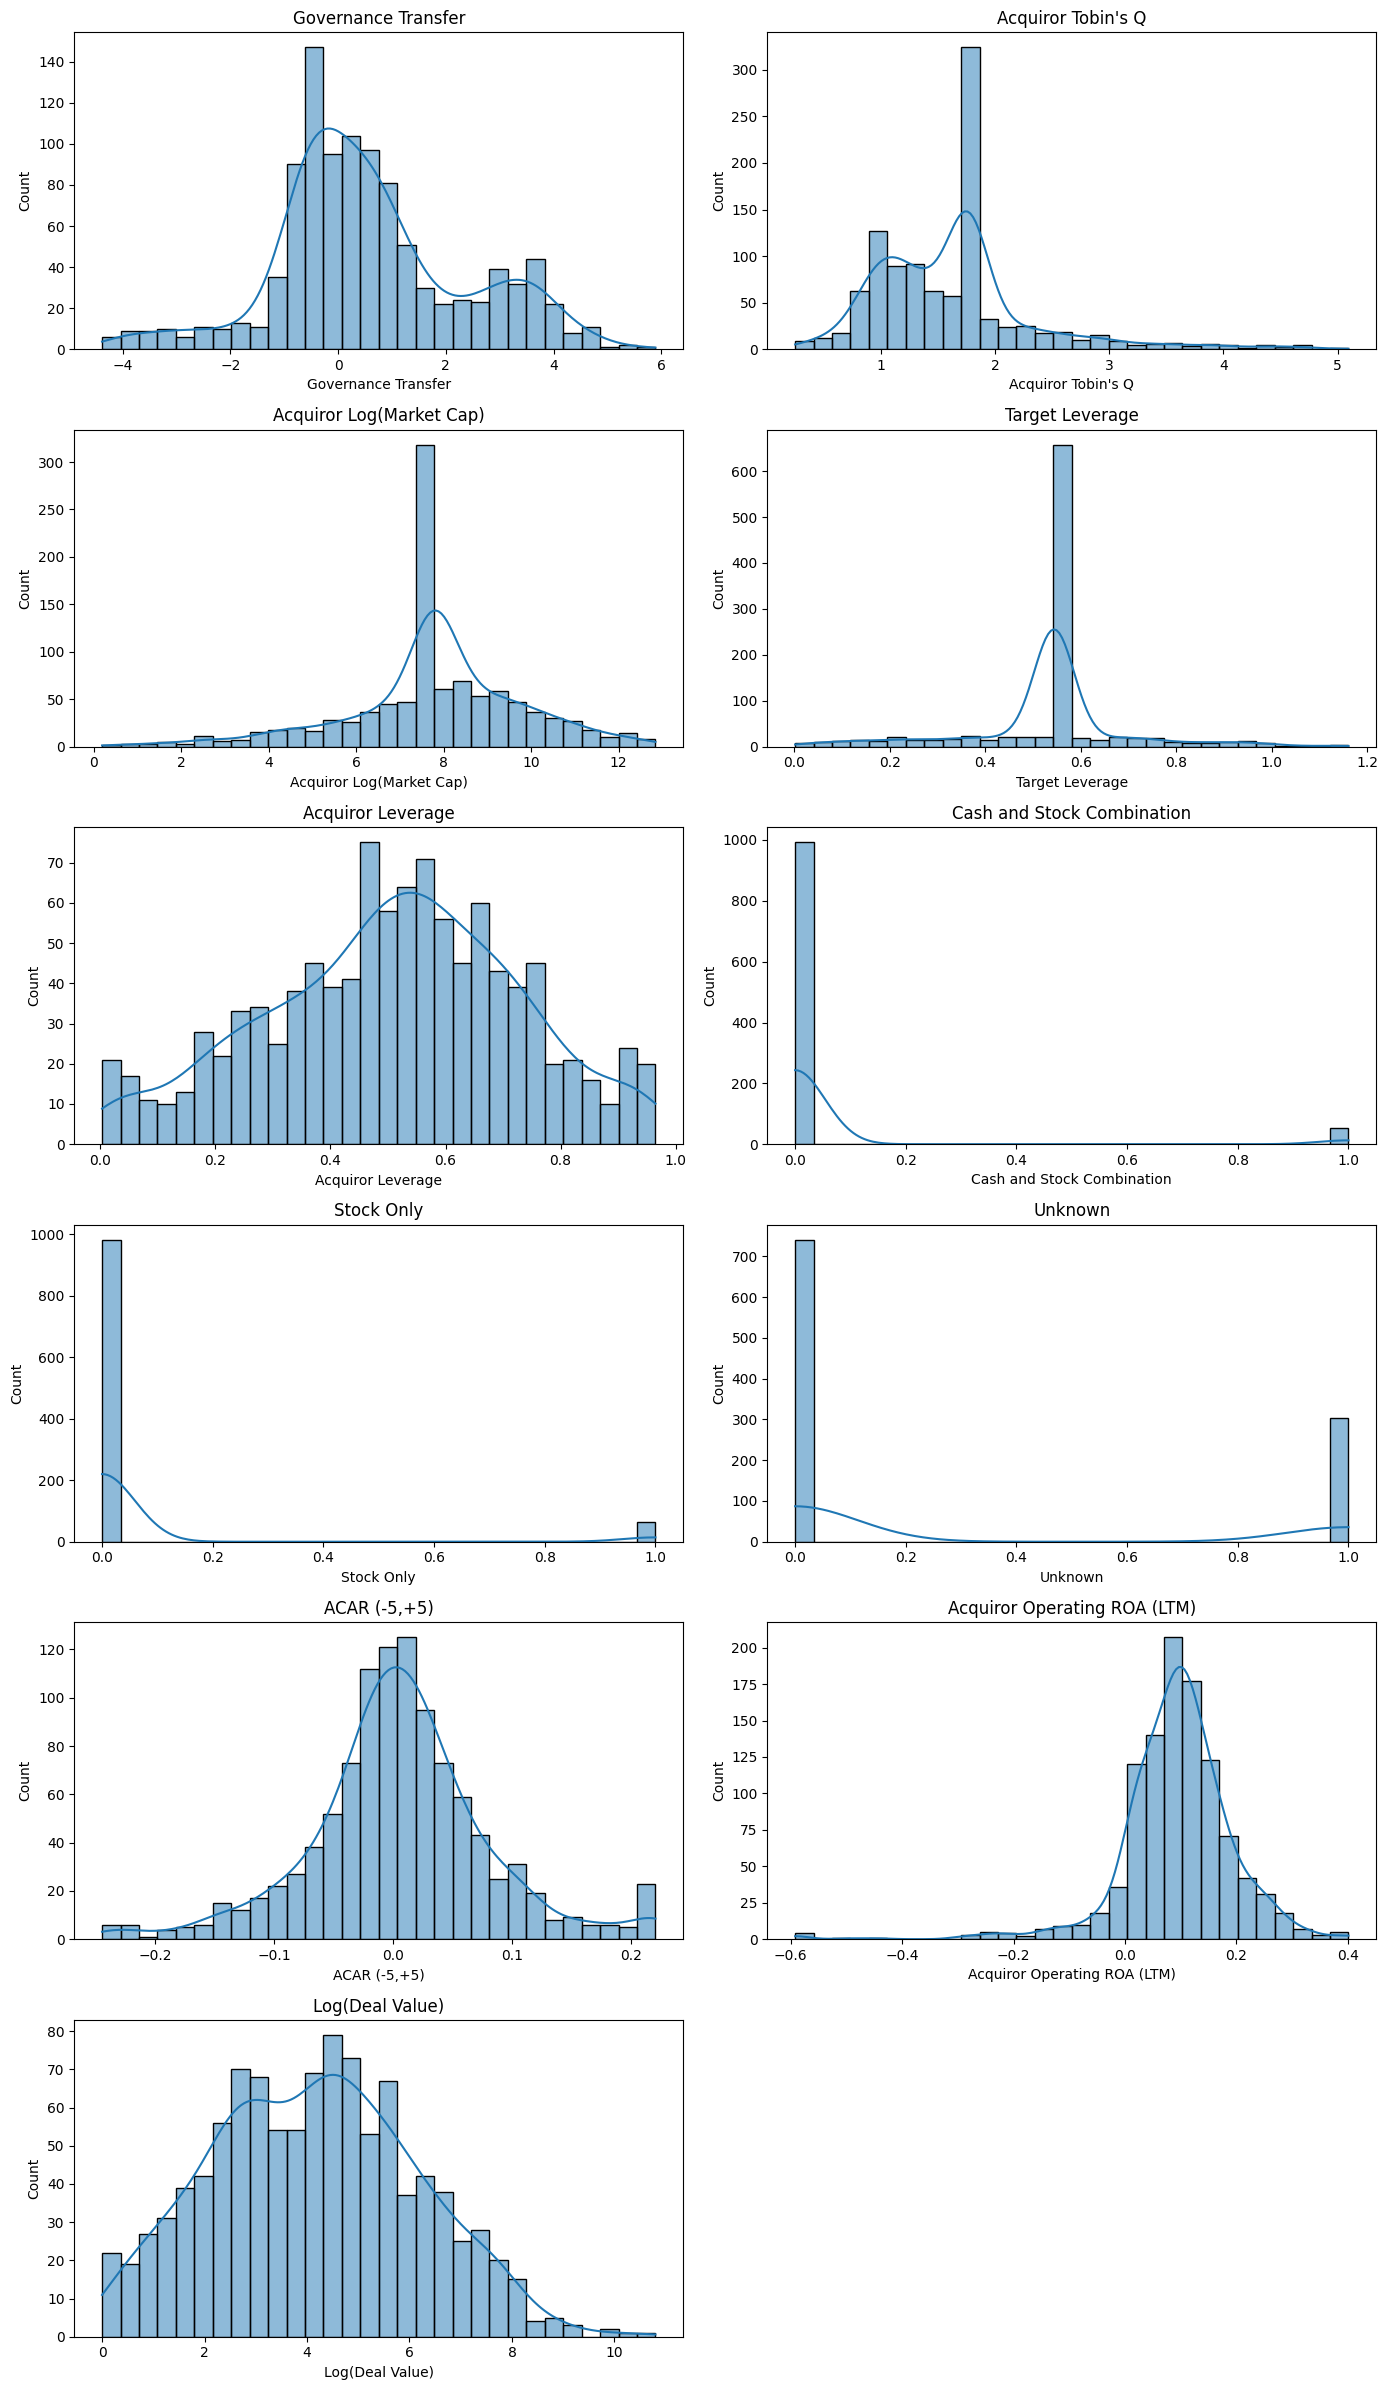

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of key variables
key_vars = [
    "Governance Transfer",
    "Acquiror Tobin's Q",
    "Acquiror Log(Market Cap)",
    "Target Leverage",
    "Acquiror Leverage",
    "Cash and Stock Combination",
    "Stock Only",
    "Unknown",
    "ACAR (-5,+5)",
    "Acquiror Operating ROA (LTM)",
    "Log(Deal Value)"
]

# Set up the plot grid
n_cols = 2
n_rows = (len(key_vars) + 1) // n_cols
plt.figure(figsize=(14, 4 * n_rows))

# Plot each variable
for i, col in enumerate(key_vars, 1):
    if col in data_subset.columns:
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data_subset[col].dropna(), kde=True, bins=30)
        plt.title(col)
    else:
        print(f"⚠️ Column not found: {col}")

plt.tight_layout()

# plt.savefig('Miceplots.png')  # (optional)

plt.show()


### Appendix Industry Coefficients

In [47]:
import pandas as pd
import statsmodels.formula.api as smf

# Step 1: Create DealYear column if not done yet
ma_merged['DealYear'] = pd.to_datetime(ma_merged['Date Announced'], dayfirst=True).dt.year

# Step 2: Define variables
dv = 'ACAR (-5,+5)'
iv = 'Governance Transfer'
controls = [
    'Acquiror Log(Market Cap)', 'Acquiror Leverage', "Acquiror Tobin's Q",
    'Target Leverage', 'Stock Only', 'Cash and Stock Combination', 'Unknown'
]

# Step 3: Build regression formula (NO year fixed effects)
formula = (
    f'Q("{dv}") ~ Q("{iv}") + ' +
    ' + '.join([f'Q("{var}")' for var in controls])
)

# Step 4: Define industry list
industries = [
    "Real Estate",
    "Retail",
    "Telecommunications",
    "Media and Entertainment",
    "Materials",
    "Industrials",
    "High Technology",
    "Healthcare",
    "Financials",
    "Energy and Power",
    "Consumer Staples",
    "Consumer Products and Services"
]

# Step 5: Clean dataset
required_vars = [dv, iv, 'Acquiror Macro Industry'] + controls
model_data = ma_merged.dropna(subset=required_vars)

# Step 6: Run regression per industry, handle small-sample failures gracefully
for industry in industries:
    subset = model_data[model_data['Acquiror Macro Industry'] == industry]

    print(f"\n\n========================= {industry.upper()} =========================")
    try:
        model = smf.ols(formula=formula, data=subset).fit(cov_type='HC1')
        try:
            print(model.summary())
        except Exception as summary_error:
            print("[WARNING] Model estimated, but .summary() could not be displayed.")
            print(f"Details: {summary_error}")
            print("Fallback: Showing coefficients only:")
            print(model.params)
    except Exception as e:
        print(f"[ERROR] Could not estimate model for {industry}: {e}")




========================= REAL ESTATE =========================
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-5,+5)")   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     3.039
Date:                Tue, 13 May 2025   Prob (F-statistic):             0.0619
Time:                        13:29:04   Log-Likelihood:                 33.606
No. Observations:                  17   AIC:                            -51.21
Df Residuals:                       9   BIC:                            -44.55
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

C:\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Python310\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covariance of constraints does not have full '
C:\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1992: RuntimeWarning: divide by zero encountered in scalar divide
  self.het_scale = self.nobs/(self.df_resid)*(self.wresid**2)
C:\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1971: RuntimeWarning: invalid value encountered in multiply
  scale[:, None] * self.mod

In [48]:
import pandas as pd
import statsmodels.formula.api as smf

# Step 1: Ensure DealYear exists
ma_merged['DealYear'] = pd.to_datetime(ma_merged['Date Announced'], dayfirst=True).dt.year

# Step 2: Define model variables
dv = 'ACAR (-5,+5)'
iv = 'Governance Transfer'
controls = [
    'Acquiror Log(Market Cap)', 'Acquiror Leverage', "Acquiror Tobin's Q",
    'Target Leverage', 'Stock Only', 'Cash and Stock Combination', 'Unknown'
]

# Step 3: Regression formula (no year FE)
formula = (
    f'Q("{dv}") ~ Q("{iv}") + ' +
    ' + '.join([f'Q("{var}")' for var in controls])
)

# Step 4: Clean data for required variables
required_vars = [dv, iv, 'Acquiror Macro Industry'] + controls
model_data = ma_merged.dropna(subset=required_vars)

# Step 5: Subset to Retail only
retail_data = model_data[model_data['Acquiror Macro Industry'] == "Retail"]

# Step 6: Run regression and extract output
print("\n\n========================= RETAIL =========================")
try:
    model = smf.ols(formula=formula, data=retail_data).fit(cov_type='HC1')

    print("\nCoefficients:")
    print(model.params)

    print("\nStandard Errors:")
    print(model.bse)

    print("\nP-values:")
    print(model.pvalues)

    print(f"\nR-squared: {model.rsquared:.3f}")
    print(f"Adj. R-squared: {model.rsquared_adj:.3f}")
    print(f"Observations: {int(model.nobs)}")

except Exception as e:
    print(f"[ERROR] Could not estimate Retail model: {e}")




========================= RETAIL =========================

Coefficients:
Intercept                         -0.288744
Q("Governance Transfer")          -0.011725
Q("Acquiror Log(Market Cap)")      0.050006
Q("Acquiror Leverage")            -0.136113
Q("Acquiror Tobin's Q")            0.047479
Q("Target Leverage")              -0.305212
Q("Stock Only")                    0.000000
Q("Cash and Stock Combination")    0.000000
Q("Unknown")                       0.215244
dtype: float64

Standard Errors:
Intercept                          inf
Q("Governance Transfer")           inf
Q("Acquiror Log(Market Cap)")      inf
Q("Acquiror Leverage")             inf
Q("Acquiror Tobin's Q")            inf
Q("Target Leverage")               inf
Q("Stock Only")                    NaN
Q("Cash and Stock Combination")    NaN
Q("Unknown")                       inf
dtype: float64

P-values:
Intercept                          1.0
Q("Governance Transfer")           1.0
Q("Acquiror Log(Market Cap)")      1.0
Q

C:\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1992: RuntimeWarning: divide by zero encountered in scalar divide
  self.het_scale = self.nobs/(self.df_resid)*(self.wresid**2)
C:\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1971: RuntimeWarning: invalid value encountered in multiply
  scale[:, None] * self.model.pinv_wexog.T)
C:\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


## Next Analysis

# Robustness Tests

## Robustness ACAR Event Window

### ACAR (-1, +1) & (-3, +3)

#### ACAR CODE (-1, +1) & (-3, +3)

In [28]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Step 1: Pull valid SDC Deal Nos from previously calculated ACAR (-5,+5)
valid_sdc_codes = {entry['SDC Deal No'] for entry in acar_results}

# Prepare storage for new ACARs
event_ars = []     
robustness_acar_results = []  

# Define event windows
event_windows = {
    'ACAR (-3,+3)': (-3, 3),
    'ACAR (-1,+1)': (-1, 1)
}

for idx, row in ma_data.iterrows():
    sdc_code = row['SDC Deal No']
    announce_date = row['Date Announced']
    country = row['Acquiror Nation']

    if pd.isna(sdc_code) or pd.isna(announce_date) or pd.isna(country):
        continue
    if sdc_code not in valid_sdc_codes:
        continue

    reg_row = regression_results[regression_results['SDC Deal No'] == sdc_code]
    if reg_row.empty:
        continue

    alpha = reg_row['Alpha'].values[0]
    beta = reg_row['Beta'].values[0]

    stock_event = stock_return[stock_return['SDC Deal No'] == sdc_code].copy()
    if stock_event.empty:
        continue

    stock_event["Date"] = pd.to_datetime(stock_event["Date"])
    stock_event.set_index("Date", inplace=True)
    stock_event.sort_index(inplace=True)

    if announce_date not in stock_event.index:
        continue

    index_series = index_closing_prices.get(country)
    if index_series is None:
        continue

    dates = stock_event.index
    announce_idx = dates.get_loc(announce_date)

    for label, (start_offset, end_offset) in event_windows.items():
        expected_len = end_offset - start_offset + 1
        start_idx = max(0, announce_idx + start_offset)
        end_idx = min(len(dates) - 1, announce_idx + end_offset)
        window_dates = dates[start_idx:end_idx + 1]

        if len(window_dates) < expected_len:
            continue

        event_window = stock_event.loc[window_dates]
        index_window = index_series.reindex(window_dates).ffill()
        market_returns = index_window.pct_change().fillna(0)

        daily_ars = []
        for date in window_dates:
            Ri = event_window.loc[date, "Return"]
            Rm = market_returns.loc[date] if date in market_returns.index else None

            if pd.isna(Ri) or pd.isna(Rm):
                continue

            expected = alpha + beta * Rm
            ar = Ri - expected

            event_ars.append({
                'SDC Deal No': sdc_code,
                'Date': date,
                'Window': label,
                'AR': ar
            })

            daily_ars.append(ar)

        if len(daily_ars) == expected_len:
            acar = sum(daily_ars)
            robustness_acar_results.append({
                'SDC Deal No': sdc_code,
                'Country': country,
                'Announcement Date': announce_date,
                'Window': label,
                'ACAR': acar
            })

# Step 2: Create and pivot robustness_acar_df
robustness_acar_df = pd.DataFrame(robustness_acar_results)

# Clean column values
robustness_acar_df['Window'] = robustness_acar_df['Window'].str.strip()

# Pivot to wide format
robustness_acar_df = robustness_acar_df.pivot(
    index=['SDC Deal No', 'Country', 'Announcement Date'],
    columns='Window',
    values='ACAR'
).reset_index()

# Clean column names
robustness_acar_df.columns.name = None
robustness_acar_df.rename(columns={
    'ACAR (-1,+1)': 'ACAR (-1,+1)',
    'ACAR (-3,+3)': 'ACAR (-3,+3)'
}, inplace=True)

# Display result
display(robustness_acar_df)


,SDC Deal No,Country,Announcement Date,"ACAR (-1,+1)","ACAR (-3,+3)"
0,459214040,Germany,2002-09-09,0.047784,-0.006480
1,912606040,Japan,2004-04-05,0.046373,-0.007527
2,1264877040,Japan,2002-01-23,-0.038976,0.024303
3,1272850040,United States,2002-02-25,0.074054,0.116309
4,1275924040,United States,2002-03-01,0.026955,0.001060
...,...,...,...,...,...
1121,4310227040,United Kingdom,2024-11-05,-0.019076,-0.064372
1122,4314339040,Singapore,2024-11-01,0.010953,-0.007812
1123,4321714020,South Korea,2024-11-19,0.203681,0.066079
1124,4325070020,South Korea,2024-12-09,-0.017151,-0.037739


#### New Dataset ACAR (-1, +1) & ACAR (-3, +3)

In [30]:
# Ensure the SDC Deal No columns are of the same type
ma_data['SDC Deal No'] = ma_data['SDC Deal No'].astype(str)
robustness_acar_df['SDC Deal No'] = robustness_acar_df['SDC Deal No'].astype(str)

# Merge robustness ACARs into ma_data
ma_robustness = ma_data.merge(
    robustness_acar_df[['SDC Deal No', 'ACAR (-1,+1)', 'ACAR (-3,+3)']], 
    on='SDC Deal No',
    how='left'
)

# Check how many matches we made
matched_r1 = ma_robustness['ACAR (-1,+1)'].notna().sum()
matched_r3 = ma_robustness['ACAR (-3,+3)'].notna().sum()
total = len(ma_data)
print(f"✅ ACAR (-1,+1) merged: {matched_r1} of {total} rows")
print(f"✅ ACAR (-3,+3) merged: {matched_r3} of {total} rows")

# Define helper function for winsorization
def winsorize_column(df, col, lower=None, upper=None):
    if col in df.columns:
        if lower is not None:
            lower_val = df[col].quantile(lower)
        else:
            lower_val = None
        if upper is not None:
            upper_val = df[col].quantile(upper)
        else:
            upper_val = None
        df[col] = df[col].clip(lower=lower_val, upper=upper_val)
        print(f"✅ {col} winsorized ", end="")
        if lower_val is not None: print(f"lower={lower_val:.3f} ", end="")
        if upper_val is not None: print(f"upper={upper_val:.3f}", end="")
        print()
    else:
        print(f"❌ Column '{col}' not found.")

# Define helper function for trimming
def trim_upper(df, col, quantile=0.99):
    if col in df.columns:
        threshold = df[col].quantile(quantile)
        original_rows = len(df)
        df = df[df[col] <= threshold]
        trimmed_rows = original_rows - len(df)
        print(f"✂️ Trimmed {trimmed_rows} rows where {col} > {threshold:.3f}")
        return df
    else:
        print(f"❌ Column '{col}' not found.")
        return df

# Apply winsorization
winsorize_column(ma_robustness, 'Governance Transfer', 0.00, 1.00)
winsorize_column(ma_robustness, 'Acquiror Log(Market Cap)', 0.005, 0.995)
winsorize_column(ma_robustness, 'ACAR (-1,+1)', 0.005, 0.98)
winsorize_column(ma_robustness, 'ACAR (-3,+3)', 0.005, 0.98)
winsorize_column(ma_robustness, 'Acquiror Operating ROA (LTM)', 0.005, 0.995)
winsorize_column(ma_robustness, 'Log(Deal Value)', 0, 1.00)

# Apply trimming
ma_robustness = trim_upper(ma_robustness, 'Target Leverage', 0.99)
ma_robustness = trim_upper(ma_robustness, "Acquiror Tobin's Q", 0.98)
ma_robustness = trim_upper(ma_robustness, 'Acquiror Leverage', 0.99)

# ✅ Final regression sample
base_vars_robust = ['Governance Transfer', 'ACAR (-1,+1)', 'ACAR (-3,+3)']
ma_robustness = ma_robustness.dropna(subset=base_vars_robust)

print(f"📉 Final robustness regression sample size: {len(ma_robustness)} rows")

# Preview
ma_robustness.head()


✅ ACAR (-1,+1) merged: 1126 of 1458 rows
✅ ACAR (-3,+3) merged: 1126 of 1458 rows
✅ Governance Transfer winsorized lower=-4.533 upper=5.891
✅ Acquiror Log(Market Cap) winsorized lower=0.193 upper=12.839
✅ ACAR (-1,+1) winsorized lower=-0.197 upper=0.151
✅ ACAR (-3,+3) winsorized lower=-0.208 upper=0.200
✅ Acquiror Operating ROA (LTM) winsorized lower=-0.592 upper=0.401
✅ Log(Deal Value) winsorized lower=0.000 upper=10.801
✂️ Trimmed 890 rows where Target Leverage > 1.528
✂️ Trimmed 181 rows where Acquiror Tobin's Q > 6.277
✂️ Trimmed 4 rows where Acquiror Leverage > 0.964
📉 Final robustness regression sample size: 302 rows


,SDC Deal No,Date Announced,Rank Date,"Rank Value inc. Net Debt of Target\n(USD, Millions)",Target Full Name,Target Macro Industry,Target Mid Industry,Target Nation,Acquiror Full Name,Acquiror Macro Industry,...,"Target Market Value 4 Weeks Prior to Announcement\n(USD, Millions)",Target Leverage,Unnamed: 40,Cross Border Deal Flag,Unnamed: 42,Governance Indicator Acquirer Nation (Year of Announcement),Governance Indicator Target Nation (Year of Announcement),Governance Transfer,"ACAR (-1,+1)","ACAR (-3,+3)"
0,2426046040,2013-01-30,2013-02-01,1860.529127,Administradora de Fondos de Pensiones Provida SA,Financials,Asset Management,Chile,MetLife Inc,Financials,...,1828.296128,0.295095,NaN,True,NaN,7.459427,7.288333,0.171094,0.004804,0.022879
1,1733107040,2006-02-03,2006-02-03,6001.534208,Banca Nazionale del Lavoro,Financials,Banks,Italy,BNP Paribas SA,Financials,...,10554.957603,0.942932,NaN,True,NaN,7.559920,6.261493,1.298427,-0.051767,0.006360
3,1801353020,2008-10-13,2008-10-13,1910.192000,Sovereign Bancorp Inc,Financials,Banks,United States,Banco Santander SA,Financials,...,17496.388000,0.903163,NaN,True,NaN,6.777384,7.643603,-0.866218,-0.146252,-0.094934
4,3830524040,2021-11-15,2021-11-15,1544.597018,Turkiye Garanti Bankasi AS,Financials,Banks,Turkey,Banco Bilbao Vizcaya Argentaria SA,Financials,...,3963.623885,0.898290,NaN,True,NaN,6.590877,3.980506,2.610371,-0.043815,-0.061323
5,2948220040,2016-04-18,2016-04-18,718.772165,Banco BPI SA,Financials,Banks,Portugal,CaixaBank SA,Financials,...,2169.601915,0.931025,NaN,True,NaN,6.690114,6.999670,-0.309555,-0.035388,0.071028


#### Regressions ACAR (-1, +1) & ACAR(-3, +3)

##### Baseline Regression

In [31]:
import pandas as pd
import statsmodels.formula.api as smf

# 1. Make sure DealYear is present
ma_robustness['DealYear'] = pd.to_datetime(ma_robustness['Date Announced'], dayfirst=True).dt.year

# 2. Variables
iv = 'Governance Transfer'
control_1 = 'Acquiror Log(Market Cap)'
control_2 = 'Acquiror Leverage'
control_3 = "Acquiror Tobin's Q"
control_4 = 'Target Leverage'
payment_dummy_1 = 'Stock Only'
payment_dummy_2 = 'Cash and Stock Combination'
payment_dummy_3 = 'Unknown'
industry_fe = 'C(Q("Acquiror Macro Industry"))'
year_fe = 'C(DealYear)'

# 3. DVs for robustness
dvs = ['ACAR (-3,+3)', 'ACAR (-1,+1)']

# 4. Run Model 6 for each alternative DV
for dv in dvs:
    formula = (
        f'Q("{dv}") ~ Q("{iv}") + Q("{control_1}") + Q("{control_2}") + '
        f'Q("{control_3}") + Q("{control_4}") + '
        f'Q("{payment_dummy_1}") + Q("{payment_dummy_2}") + Q("{payment_dummy_3}") + '
        f'{industry_fe} + {year_fe}'
    )

    current_vars = [dv, iv, control_1, control_2, control_3, control_4,
                    payment_dummy_1, payment_dummy_2, payment_dummy_3,
                    'Acquiror Macro Industry', 'DealYear']

    model_data = ma_robustness.dropna(subset=current_vars)

    model = smf.ols(formula=formula, data=model_data).fit(cov_type='HC1')

    print(f"\n✅ Robustness Regression for {dv}:")
    print(model.summary())



✅ Robustness Regression for ACAR (-3,+3):
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-3,+3)")   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.041
Date:                Thu, 08 May 2025   Prob (F-statistic):              0.410
Time:                        13:27:03   Log-Likelihood:                 434.40
No. Observations:                 302   AIC:                            -786.8
Df Residuals:                     261   BIC:                            -634.7
Df Model:                          40                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

##### Complete Moderator Regresssion

In [32]:
import pandas as pd
import statsmodels.formula.api as smf

# 1. Ensure DealYear is extracted
ma_robustness['DealYear'] = pd.to_datetime(ma_robustness['Date Announced'], dayfirst=True).dt.year

# 2. Variables
ivs = ['ACAR (-3,+3)', 'ACAR (-1,+1)']  # Dependent variables for robustness
iv = 'Governance Transfer'
moderator1 = 'Acquiror Operating ROA (LTM)'
moderator2 = 'Log(Deal Value)'

# Controls
control_1 = 'Acquiror Log(Market Cap)'
control_2 = 'Acquiror Leverage'
control_3 = "Acquiror Tobin's Q"
control_4 = 'Target Leverage'

# Payment method dummies
payment_dummy_1 = 'Stock Only'
payment_dummy_2 = 'Cash and Stock Combination'
payment_dummy_3 = 'Unknown'

# Fixed effects
industry_fe = 'C(Q("Acquiror Macro Industry"))'
year_fe = 'C(DealYear)'

# 3. Run regression for each ACAR DV
for dv in ivs:
    # Define the full moderation formula
    formula = (
        f'Q("{dv}") ~ Q("{iv}") + Q("{moderator1}") + Q("{moderator2}") + '
        f'Q("{iv}"):Q("{moderator1}") + Q("{iv}"):Q("{moderator2}") + '
        f'Q("{control_1}") + Q("{control_2}") + Q("{control_3}") + Q("{control_4}") + '
        f'Q("{payment_dummy_1}") + Q("{payment_dummy_2}") + Q("{payment_dummy_3}") + '
        f'{industry_fe} + {year_fe}'
    )

    # Drop NA rows for all variables used
    current_vars = [dv, iv, moderator1, moderator2, control_1, control_2, control_3, control_4,
                    payment_dummy_1, payment_dummy_2, payment_dummy_3,
                    'Acquiror Macro Industry', 'DealYear']

    model_data = ma_robustness.dropna(subset=current_vars)

    # Run OLS with robust SEs
    model = smf.ols(formula=formula, data=model_data).fit(cov_type='HC1')

    # Output
    print(f"\n✅ Moderation Regression for {dv}:")
    print(model.summary())



✅ Moderation Regression for ACAR (-3,+3):
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-3,+3)")   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.158
Date:                Thu, 08 May 2025   Prob (F-statistic):              0.243
Time:                        13:35:23   Log-Likelihood:                 425.58
No. Observations:                 291   AIC:                            -761.2
Df Residuals:                     246   BIC:                            -595.9
Df Model:                          44                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

## Robustness Estimation Window

### Coefficient Calculation (Robustness)

In [6]:
from sklearn.linear_model import LinearRegression
import pandas as pd

results = []

for idx, row in ma_data.iterrows():
    sdc_code = row['SDC Deal No']
    announce_date = row['Date Announced']
    country = row['Acquiror Nation']

    if pd.isna(sdc_code) or pd.isna(announce_date) or pd.isna(country):
        continue

    # ✅ Filter stock_return for the specific SDC Deal No
    stock_series = stock_return[stock_return['SDC Deal No'] == sdc_code].copy()
    if stock_series.empty:
        print(f"❌ No return data for SDC {sdc_code}")
        continue

    stock_series.set_index('Date', inplace=True)
    stock_series.sort_index(inplace=True)

    # Filter 200 days before announcement
    stock_ret_before_event = stock_series[stock_series.index < announce_date]['Return']
    if len(stock_ret_before_event) < 211:
        print(f"⚠️ Not enough return history for SDC {sdc_code} — {len(stock_ret_before_event)} days")
        continue

    stock_window = stock_ret_before_event.iloc[-161:-15]

    # Get index price series
    index_price_series = index_closing_prices.get(country)
    if index_price_series is None:
        print(f"❌ No index data for {country}")
        continue

    # Clean duplicates and align
    index_price_series = index_price_series[~index_price_series.index.duplicated()]
    stock_window = stock_window[~stock_window.index.duplicated()]
    common_index = stock_window.index.intersection(index_price_series.index)

    stock_window = stock_window.loc[common_index]
    market_window = index_price_series.loc[common_index].pct_change().dropna()
    stock_window = stock_window.loc[market_window.index]

    # Merge
    merged = pd.DataFrame({
        'StockReturn': stock_window,
        'MarketReturn': market_window
    }).dropna()

    if len(merged) < 50:
        print(f"⚠️ Too few valid data points for SDC {sdc_code} — only {len(merged)} rows")
        continue

    # Run regression
    X = merged[['MarketReturn']]
    y = merged['StockReturn']
    model = LinearRegression().fit(X, y)

    print(f"✅ Regressed SDC {sdc_code}")

    results.append({
        'SDC Deal No': sdc_code,
        'Country': country,
        'Announce_Date': announce_date,
        'Alpha': model.intercept_,
        'Beta': model.coef_[0],
        'R²': model.score(X, y),
        'N Obs': len(merged)
    })

# Final result
Estimation_robustness = pd.DataFrame(results)
display(Estimation_robustness)


✅ Regressed SDC 2426046040
✅ Regressed SDC 1733107040
✅ Regressed SDC 4099635020
✅ Regressed SDC 1801353020
✅ Regressed SDC 3830524040
✅ Regressed SDC 2948220040
✅ Regressed SDC 1308404040
✅ Regressed SDC 1500150040
✅ Regressed SDC 3463258040
✅ Regressed SDC 3020752020
✅ Regressed SDC 1649543040
❌ No return data for SDC 2905320020
❌ No return data for SDC 2426049040
✅ Regressed SDC 2650959040
✅ Regressed SDC 1748444040
✅ Regressed SDC 1328428040
⚠️ Not enough return history for SDC 3508665020 — 148 days
✅ Regressed SDC 3245551020
✅ Regressed SDC 1797861040
✅ Regressed SDC 1481923040
❌ No return data for SDC 1617824040
✅ Regressed SDC 2592853040
✅ Regressed SDC 2012097040
✅ Regressed SDC 1989340040
⚠️ Not enough return history for SDC 2626245040 — 46 days
✅ Regressed SDC 3065264020
✅ Regressed SDC 2495104040
❌ No return data for SDC 1650309040
✅ Regressed SDC 1461934040
✅ Regressed SDC 2251158040
✅ Regressed SDC 3841618040
✅ Regressed SDC 1507765040
✅ Regressed SDC 3490245040
✅ Regresse

C:\Users\jensv\AppData\Local\Temp\ipykernel_14932\298089773.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()


⚠️ Too few valid data points for SDC 3490163040 — only 0 rows
❌ No return data for SDC 2469812040
✅ Regressed SDC 3057350040
✅ Regressed SDC 2011590040
✅ Regressed SDC 1988087040
✅ Regressed SDC 2382224040
✅ Regressed SDC 4001905040
✅ Regressed SDC 2157140020
✅ Regressed SDC 1788010040
✅ Regressed SDC 3931927040
✅ Regressed SDC 2194169040
✅ Regressed SDC 2737099040
✅ Regressed SDC 2982886040
✅ Regressed SDC 1387430040
✅ Regressed SDC 3214788040
✅ Regressed SDC 1611953040
✅ Regressed SDC 3771922040
✅ Regressed SDC 2484396040
✅ Regressed SDC 1429042040
✅ Regressed SDC 2076206040
✅ Regressed SDC 2364381040
✅ Regressed SDC 1738019040
✅ Regressed SDC 1468180040
⚠️ Not enough return history for SDC 2239632040 — 91 days
✅ Regressed SDC 1458462040
⚠️ Not enough return history for SDC 4170392040 — 59 days
✅ Regressed SDC 1704236040
✅ Regressed SDC 2117687040
✅ Regressed SDC 1447612040
❌ No return data for SDC 2173155040
✅ Regressed SDC 1971342040
✅ Regressed SDC 2748372020
✅ Regressed SDC 37191

C:\Users\jensv\AppData\Local\Temp\ipykernel_14932\298089773.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()


✅ Regressed SDC 1715265040
❌ No return data for SDC 1632646040
✅ Regressed SDC 3070211040
✅ Regressed SDC 1379151040
✅ Regressed SDC 2022594040
✅ Regressed SDC 3330140040
✅ Regressed SDC 3359879040
✅ Regressed SDC 3029765040
✅ Regressed SDC 2960317040
✅ Regressed SDC 3014347040
✅ Regressed SDC 2653517040
✅ Regressed SDC 2352736040
✅ Regressed SDC 2797683040
✅ Regressed SDC 3323832040
✅ Regressed SDC 3492266040
✅ Regressed SDC 1876105040
❌ No return data for SDC 1405197040
✅ Regressed SDC 1984192020
✅ Regressed SDC 2403246040
✅ Regressed SDC 1640627040
✅ Regressed SDC 2395778020
⚠️ Too few valid data points for SDC 1654337020 — only 0 rows
✅ Regressed SDC 4228373020
✅ Regressed SDC 3915015040
✅ Regressed SDC 2149241040
✅ Regressed SDC 2761028040
✅ Regressed SDC 1958575020
✅ Regressed SDC 4163617040
⚠️ Not enough return history for SDC 2547769040 — 80 days
✅ Regressed SDC 1783232020
✅ Regressed SDC 3234952040
✅ Regressed SDC 1742128040
❌ No return data for SDC 2307556040
✅ Regressed SDC 

C:\Users\jensv\AppData\Local\Temp\ipykernel_14932\298089773.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()


✅ Regressed SDC 2941742040
❌ No return data for SDC 2463676040
⚠️ Not enough return history for SDC 1523297040 — 98 days
✅ Regressed SDC 2105081040
✅ Regressed SDC 2057617040
✅ Regressed SDC 1726468040
⚠️ Not enough return history for SDC 1731198040 — 52 days
✅ Regressed SDC 3156262040
✅ Regressed SDC 2637254040
✅ Regressed SDC 2563342040
✅ Regressed SDC 3775433040
✅ Regressed SDC 3214743040
✅ Regressed SDC 4307962040
✅ Regressed SDC 3283172040
✅ Regressed SDC 1912871040
✅ Regressed SDC 3199391040
✅ Regressed SDC 2609606040
✅ Regressed SDC 2678155040
✅ Regressed SDC 3010691040
✅ Regressed SDC 3831226040
✅ Regressed SDC 3325429040
✅ Regressed SDC 3669557040
✅ Regressed SDC 3194082020
✅ Regressed SDC 3446797020
✅ Regressed SDC 1842495040
✅ Regressed SDC 2053787020
✅ Regressed SDC 1673299040
✅ Regressed SDC 3755549040
✅ Regressed SDC 1634205040
✅ Regressed SDC 2609609040
✅ Regressed SDC 1525606040
✅ Regressed SDC 2546299040
✅ Regressed SDC 3378458040
✅ Regressed SDC 3144231040
✅ Regressed

C:\Users\jensv\AppData\Local\Temp\ipykernel_14932\298089773.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()
C:\Users\jensv\AppData\Local\Temp\ipykernel_14932\298089773.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()


✅ Regressed SDC 3709735040
❌ No return data for SDC 1798238040
✅ Regressed SDC 3883309040
✅ Regressed SDC 3239233040
✅ Regressed SDC 2777616040
✅ Regressed SDC 2574010040
✅ Regressed SDC 1605556040
⚠️ Not enough return history for SDC 3154464040 — 28 days
❌ No return data for SDC 2289530040
✅ Regressed SDC 3645887040
✅ Regressed SDC 1664113040
✅ Regressed SDC 3511042040
✅ Regressed SDC 3096829040
✅ Regressed SDC 3455215040
⚠️ Not enough return history for SDC 2081419040 — 206 days
✅ Regressed SDC 1423308040
⚠️ Not enough return history for SDC 2184187040 — 200 days
✅ Regressed SDC 4245614040
✅ Regressed SDC 3953845040
✅ Regressed SDC 1868871040
✅ Regressed SDC 2687125040
✅ Regressed SDC 2183099020
⚠️ Not enough return history for SDC 3714534040 — 16 days
✅ Regressed SDC 4001857040
✅ Regressed SDC 1651914040
✅ Regressed SDC 2550513040
✅ Regressed SDC 2037281040
❌ No return data for SDC 1531328040
✅ Regressed SDC 1881157040
✅ Regressed SDC 1653162040
✅ Regressed SDC 1977015040
⚠️ Not eno

C:\Users\jensv\AppData\Local\Temp\ipykernel_14932\298089773.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()


✅ Regressed SDC 4056575040
✅ Regressed SDC 3043621040
✅ Regressed SDC 2311054040
✅ Regressed SDC 2948534020
❌ No index data for Jersey
✅ Regressed SDC 2247084040
✅ Regressed SDC 3751526040
❌ No return data for SDC 2089072040
⚠️ Not enough return history for SDC 2166538040 — 49 days
✅ Regressed SDC 2750119040
✅ Regressed SDC 1663265040
⚠️ Not enough return history for SDC 3204995040 — 124 days
❌ No return data for SDC 2308815040
✅ Regressed SDC 1842833040
❌ No return data for SDC 2835801040
✅ Regressed SDC 1361414040
✅ Regressed SDC 3967050040
✅ Regressed SDC 3967063040
❌ No index data for Jersey
✅ Regressed SDC 1341446040
✅ Regressed SDC 1508351040
❌ No return data for SDC 2420139040
✅ Regressed SDC 1362002040
⚠️ Not enough return history for SDC 3641953040 — 205 days
✅ Regressed SDC 4252153040
✅ Regressed SDC 1745524040
✅ Regressed SDC 2747976020
✅ Regressed SDC 4077219040
⚠️ Not enough return history for SDC 1738966040 — 69 days
✅ Regressed SDC 1582288040
✅ Regressed SDC 2433703040
✅

C:\Users\jensv\AppData\Local\Temp\ipykernel_14932\298089773.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()
C:\Users\jensv\AppData\Local\Temp\ipykernel_14932\298089773.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()


❌ No return data for SDC 1739717040
✅ Regressed SDC 2109207040
✅ Regressed SDC 2768237040
✅ Regressed SDC 2161510040
✅ Regressed SDC 1992290040
✅ Regressed SDC 4071892040
✅ Regressed SDC 2277946040
✅ Regressed SDC 2235355040
✅ Regressed SDC 2277961040
✅ Regressed SDC 2718519040
✅ Regressed SDC 1790787040
❌ No return data for SDC 1822077040
✅ Regressed SDC 1592275040
✅ Regressed SDC 3255199040
✅ Regressed SDC 2256011040
✅ Regressed SDC 3057574040
❌ No return data for SDC 1276886040
✅ Regressed SDC 3464167040
✅ Regressed SDC 3813580040
✅ Regressed SDC 2503464040
✅ Regressed SDC 1678542040
✅ Regressed SDC 2104522040
✅ Regressed SDC 2218551020
✅ Regressed SDC 1287852040
✅ Regressed SDC 3160636020
✅ Regressed SDC 2294035040
✅ Regressed SDC 2550308020
✅ Regressed SDC 2769732040
✅ Regressed SDC 1341195040
✅ Regressed SDC 3876744040
✅ Regressed SDC 3847400040
⚠️ Not enough return history for SDC 2316611040 — 170 days
✅ Regressed SDC 2183214040
✅ Regressed SDC 1742555040
✅ Regressed SDC 1669480

C:\Users\jensv\AppData\Local\Temp\ipykernel_14932\298089773.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()
C:\Users\jensv\AppData\Local\Temp\ipykernel_14932\298089773.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()


✅ Regressed SDC 4079509040
✅ Regressed SDC 3701227040
✅ Regressed SDC 1688951040
❌ No return data for SDC 1901518040
⚠️ Not enough return history for SDC 4071693020 — 57 days
✅ Regressed SDC 1723231040
✅ Regressed SDC 2759920040
✅ Regressed SDC 2551134020
✅ Regressed SDC 2296854040
✅ Regressed SDC 1738526040
✅ Regressed SDC 2974723040
✅ Regressed SDC 2558534040
✅ Regressed SDC 3041947020
❌ No return data for SDC 1292652040
✅ Regressed SDC 2903934040
✅ Regressed SDC 2107468040
✅ Regressed SDC 1665590040
✅ Regressed SDC 2937600040
✅ Regressed SDC 1803385040
⚠️ Not enough return history for SDC 1953850040 — 31 days
✅ Regressed SDC 2956338040
✅ Regressed SDC 2961949040
✅ Regressed SDC 1467234040
✅ Regressed SDC 3954866040
❌ No index data for Guernsey
⚠️ Not enough return history for SDC 2979507040 — 154 days
✅ Regressed SDC 2980224040
✅ Regressed SDC 1520286040
✅ Regressed SDC 3003825040
✅ Regressed SDC 1466743040
✅ Regressed SDC 3012538040
✅ Regressed SDC 1686655020
✅ Regressed SDC 225356

C:\Users\jensv\AppData\Local\Temp\ipykernel_14932\298089773.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()
C:\Users\jensv\AppData\Local\Temp\ipykernel_14932\298089773.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_window = index_price_series.loc[common_index].pct_change().dropna()
C:\Users\jensv\AppData\Local\Temp\ipykernel_14932\298089773.py:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA valu

❌ No return data for SDC 1674602040
✅ Regressed SDC 3168300040
✅ Regressed SDC 2415125040
✅ Regressed SDC 2503708040
✅ Regressed SDC 3190130040
✅ Regressed SDC 2570640040
❌ No index data for Jersey
✅ Regressed SDC 3202554040
✅ Regressed SDC 2662094040
✅ Regressed SDC 1989833040
✅ Regressed SDC 2607084040
✅ Regressed SDC 3211723040
✅ Regressed SDC 2272963020
✅ Regressed SDC 3406168040
✅ Regressed SDC 2298221040
✅ Regressed SDC 3676507040
✅ Regressed SDC 2517017040
❌ No return data for SDC 3838532040
✅ Regressed SDC 2721495040
✅ Regressed SDC 2128503040
✅ Regressed SDC 1708337020
⚠️ Not enough return history for SDC 3284013040 — 11 days
✅ Regressed SDC 3297181040
❌ No index data for Cayman Islands
✅ Regressed SDC 2626289020
✅ Regressed SDC 1590464040
✅ Regressed SDC 1287121040
✅ Regressed SDC 3324997040
✅ Regressed SDC 3032083040
✅ Regressed SDC 3789859040
⚠️ Not enough return history for SDC 1749784020 — 197 days
⚠️ Too few valid data points for SDC 2009430040 — only 0 rows
✅ Regressed 

,SDC Deal No,Country,Announce_Date,Alpha,Beta,R²,N Obs
0,2426046040,United States,2013-01-30,0.000184,1.717057,0.602070,145
1,1733107040,France,2006-02-03,0.000671,1.091479,0.626646,145
2,4099635020,Canada,2023-06-27,-0.001765,1.766214,0.257791,145
3,1801353020,Spain,2008-10-13,0.000716,1.217052,0.860170,145
4,3830524040,Spain,2021-11-15,0.001572,1.411513,0.500508,145
...,...,...,...,...,...,...,...
1191,4295160040,Poland,2024-06-19,-0.001625,0.995431,0.258448,145
1192,4236580040,China (Mainland),2024-05-21,-0.001220,0.357922,0.016294,145
1193,4253173040,United States,2024-06-24,0.001369,0.953769,0.042360,145
1194,4255521040,United States,2024-06-25,-0.002825,1.021305,0.072691,145


### ACAR Calculation (-5, +5)

In [9]:
from sklearn.linear_model import LinearRegression
import pandas as pd

event_ars = []     # Daily abnormal returns per SDC
acar_results = []  # One ACAR per SDC

for idx, row in ma_data.iterrows():
    sdc_code = row['SDC Deal No']
    announce_date = row['Date Announced']
    country = row['Acquiror Nation']

    if pd.isna(sdc_code) or pd.isna(announce_date) or pd.isna(country):
        continue

    # Match regression estimates from Estimation_robustness
    reg_row = Estimation_robustness[Estimation_robustness['SDC Deal No'] == sdc_code]
    if reg_row.empty:
        continue

    alpha = reg_row['Alpha'].values[0]
    beta = reg_row['Beta'].values[0]

    # Get stock returns for this SDC
    stock_event = stock_return[stock_return['SDC Deal No'] == sdc_code].copy()
    if stock_event.empty:
        continue

    stock_event.set_index("Date", inplace=True)
    stock_event.sort_index(inplace=True)

    # Define ±5 day event window around announcement
    event_window = stock_event.loc[
        (stock_event.index >= announce_date - pd.tseries.offsets.BDay(5)) &
        (stock_event.index <= announce_date + pd.tseries.offsets.BDay(5))
    ]

    if len(event_window) < 6:
        continue

    # Get matching index price series
    index_series = index_closing_prices.get(country)
    if index_series is None:
        continue

    index_window = index_series.reindex(event_window.index).ffill()
    market_returns = index_window.pct_change().fillna(0)

    # Calculate daily abnormal returns (AR)
    for date in event_window.index:
        Ri = event_window.loc[date, "Return"]
        Rm = market_returns.loc[date] if date in market_returns.index else None

        if pd.isna(Ri) or pd.isna(Rm):
            continue

        expected = alpha + beta * Rm
        ar = Ri - expected

        event_ars.append({
            'SDC Deal No': sdc_code,
            'Date': date,
            'AR': ar
        })

    # Calculate ACAR for the window
    ars = [entry['AR'] for entry in event_ars if entry['SDC Deal No'] == sdc_code]
    if ars:
        acar = sum(ars)
        acar_results.append({
            'SDC Deal No': sdc_code,
            'Country': country,
            'Announcement Date': announce_date,
            'ACAR (-5,+5)': acar
        })

# Convert to DataFrames
abnormal_returns_df = pd.DataFrame(event_ars)
acar_df = pd.DataFrame(acar_results)

# Show results
display(acar_df)


,SDC Deal No,Country,Announcement Date,"ACAR (-5,+5)"
0,2426046040,United States,2013-01-30,-0.009567
1,1733107040,France,2006-02-03,0.038120
2,4099635020,Canada,2023-06-27,-0.016489
3,1801353020,Spain,2008-10-13,-0.124059
4,3830524040,Spain,2021-11-15,-0.080814
...,...,...,...,...
1190,4295160040,Poland,2024-06-19,0.034869
1191,4236580040,China (Mainland),2024-05-21,0.129866
1192,4253173040,United States,2024-06-24,-0.014916
1193,4255521040,United States,2024-06-25,0.051876


### Dataset (Estimation Robustness)

In [10]:
# Ensure the SDC Deal No columns are of the same type
ma_data['SDC Deal No'] = ma_data['SDC Deal No'].astype(str)
acar_df['SDC Deal No'] = acar_df['SDC Deal No'].astype(str)

# Merge new ACAR values into ma_data and rename the output
ma_merged_estimation = ma_data.merge(
    acar_df[['SDC Deal No', 'ACAR (-5,+5)']], 
    on='SDC Deal No',
    how='left'
)

# Check how many matches we made
matched = ma_merged_estimation['ACAR (-5,+5)'].notna().sum()
total = len(ma_data)
print(f"✅ ACAR values merged: {matched} out of {total} rows ({matched/total:.2%})")

# Define helper function for winsorization
def winsorize_column(df, col, lower=None, upper=None):
    if col in df.columns:
        if lower is not None:
            lower_val = df[col].quantile(lower)
        else:
            lower_val = None
        if upper is not None:
            upper_val = df[col].quantile(upper)
        else:
            upper_val = None
        df[col] = df[col].clip(lower=lower_val, upper=upper_val)
        print(f"✅ {col} winsorized ", end="")
        if lower_val is not None: print(f"lower={lower_val:.3f} ", end="")
        if upper_val is not None: print(f"upper={upper_val:.3f}", end="")
        print()
    else:
        print(f"❌ Column '{col}' not found.")

# Define helper function for trimming
def trim_upper(df, col, quantile=0.99):
    if col in df.columns:
        threshold = df[col].quantile(quantile)
        original_rows = len(df)
        df = df[df[col] <= threshold]
        trimmed_rows = original_rows - len(df)
        print(f"✂️ Trimmed {trimmed_rows} rows where {col} > {threshold:.3f}")
        return df
    else:
        print(f"❌ Column '{col}' not found.")
        return df

# Apply winsorization
winsorize_column(ma_merged_estimation, 'Governance Transfer', 0.00, 1.00)
winsorize_column(ma_merged_estimation, 'Acquiror Log(Market Cap)', 0.005, 0.995)
winsorize_column(ma_merged_estimation, 'ACAR (-5,+5)', 0.005, 0.98)
winsorize_column(ma_merged_estimation, 'Acquiror Operating ROA (LTM)', 0.005, 0.995)
winsorize_column(ma_merged_estimation, 'Log(Deal Value)', 0, 1.00)

# Apply trimming for three variables
ma_merged_estimation = trim_upper(ma_merged_estimation, 'Target Leverage', 0.99)
ma_merged_estimation = trim_upper(ma_merged_estimation, "Acquiror Tobin's Q", 0.98)
ma_merged_estimation = trim_upper(ma_merged_estimation, 'Acquiror Leverage', 0.99)

# ✅ FINAL STEP: Filter to base regression sample (IV & DV must be present)
base_vars = ['ACAR (-5,+5)', 'Governance Transfer']
ma_merged_estimation = ma_merged_estimation.dropna(subset=base_vars)

print(f"📉 Final regression sample size: {len(ma_merged_estimation)} rows")

# Optional: Preview cleaned and filtered dataset
ma_merged_estimation.head()


✅ ACAR values merged: 1195 out of 1458 rows (81.96%)
✅ Governance Transfer winsorized lower=-4.533 upper=5.891
✅ Acquiror Log(Market Cap) winsorized lower=0.193 upper=12.839
✅ ACAR (-5,+5) winsorized lower=-0.255 upper=0.227
✅ Acquiror Operating ROA (LTM) winsorized lower=-0.592 upper=0.401
✅ Log(Deal Value) winsorized lower=0.000 upper=10.801
✂️ Trimmed 890 rows where Target Leverage > 1.528
✂️ Trimmed 181 rows where Acquiror Tobin's Q > 6.277
✂️ Trimmed 4 rows where Acquiror Leverage > 0.964
📉 Final regression sample size: 334 rows


,SDC Deal No,Date Announced,Rank Date,"Rank Value inc. Net Debt of Target\n(USD, Millions)",Target Full Name,Target Macro Industry,Target Mid Industry,Target Nation,Acquiror Full Name,Acquiror Macro Industry,...,"Total Liabilities Last 12 Months\n(USD, Millions)","Target Market Value 4 Weeks Prior to Announcement\n(USD, Millions)",Target Leverage,Unnamed: 40,Cross Border Deal Flag,Unnamed: 42,Governance Indicator Acquirer Nation (Year of Announcement),Governance Indicator Target Nation (Year of Announcement),Governance Transfer,"ACAR (-5,+5)"
0,2426046040,2013-01-30,2013-02-01,1860.529127,Administradora de Fondos de Pensiones Provida SA,Financials,Asset Management,Chile,MetLife Inc,Financials,...,101241.108246,1828.296128,0.295095,NaN,True,NaN,7.459427,7.288333,0.171094,-0.009567
1,1733107040,2006-02-03,2006-02-03,6001.534208,Banca Nazionale del Lavoro,Financials,Banks,Italy,BNP Paribas SA,Financials,...,98390.498348,10554.957603,0.942932,NaN,True,NaN,7.559920,6.261493,1.298427,0.038120
3,1801353020,2008-10-13,2008-10-13,1910.192000,Sovereign Bancorp Inc,Financials,Banks,United States,Banco Santander SA,Financials,...,69833.325000,17496.388000,0.903163,NaN,True,NaN,6.777384,7.643603,-0.866218,-0.124059
4,3830524040,2021-11-15,2021-11-15,1544.597018,Turkiye Garanti Bankasi AS,Financials,Banks,Turkey,Banco Bilbao Vizcaya Argentaria SA,Financials,...,58376.397342,3963.623885,0.898290,NaN,True,NaN,6.590877,3.980506,2.610371,-0.080814
5,2948220040,2016-04-18,2016-04-18,718.772165,Banco BPI SA,Financials,Banks,Portugal,CaixaBank SA,Financials,...,40170.150348,2169.601915,0.931025,NaN,True,NaN,6.690114,6.999670,-0.309555,0.024842


### Regressions (Alternative estimation window)

#### Baseline Regresssion

In [11]:
import pandas as pd
import statsmodels.formula.api as smf

# Dataset already loaded as ma_merged_estimation

# 1. Make sure DealYear is there
ma_merged_estimation['DealYear'] = pd.to_datetime(ma_merged_estimation['Date Announced'], dayfirst=True).dt.year

# 2. Variables
dv = 'ACAR (-5,+5)'
iv = 'Governance Transfer'
control_1 = 'Acquiror Log(Market Cap)'
control_2 = 'Acquiror Leverage'
control_3 = "Acquiror Tobin's Q"
control_4 = 'Target Leverage'
payment_dummy_1 = 'Stock Only'
payment_dummy_2 = 'Cash and Stock Combination'
payment_dummy_3 = 'Unknown'
industry_fe = 'C(Q("Acquiror Macro Industry"))'
year_fe = 'C(DealYear)'

# 3. Define the formula
formula = (
    f'Q("{dv}") ~ Q("{iv}") + Q("{control_1}") + Q("{control_2}") + '
    f'Q("{control_3}") + Q("{control_4}") + '
    f'Q("{payment_dummy_1}") + Q("{payment_dummy_2}") + Q("{payment_dummy_3}") + '
    f'{industry_fe} + {year_fe}'
)

# 4. Drop missing data for needed vars
current_vars = [dv, iv, control_1, control_2, control_3, control_4,
                payment_dummy_1, payment_dummy_2, payment_dummy_3,
                'Acquiror Macro Industry', 'DealYear']

model_data = ma_merged_estimation.dropna(subset=current_vars)

# 5. Run regression
model = smf.ols(formula=formula, data=model_data).fit(cov_type='HC1')

# 6. Print results
print("✅ Regression Results (Full Model with 3 Payment Dummies):")
print(model.summary())


✅ Regression Results (Full Model with 3 Payment Dummies):
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-5,+5)")   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.314
Date:                Thu, 08 May 2025   Prob (F-statistic):              0.107
Time:                        15:30:51   Log-Likelihood:                 419.82
No. Observations:                 334   AIC:                            -757.6
Df Residuals:                     293   BIC:                            -601.4
Df Model:                          40                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

#### Complete Moderator Regresssion

In [12]:
import pandas as pd
import statsmodels.formula.api as smf

# 1. Make sure DealYear is extracted
ma_merged_estimation['DealYear'] = pd.to_datetime(ma_merged_estimation['Date Announced'], dayfirst=True).dt.year

# 2. Variables
dv = 'ACAR (-5,+5)'  # Dependent variable
iv = 'Governance Transfer'  # Independent variable
moderator1 = 'Acquiror Operating ROA (LTM)'  # First moderating variable
moderator2 = 'Log(Deal Value)'  # Second moderating variable

# Controls
control_1 = 'Acquiror Log(Market Cap)'
control_2 = 'Acquiror Leverage'
control_3 = "Acquiror Tobin's Q"
control_4 = 'Target Leverage'

# Payment method dummies
payment_dummy_1 = 'Stock Only'
payment_dummy_2 = 'Cash and Stock Combination'
payment_dummy_3 = 'Unknown'

# Fixed effects
industry_fe = 'C(Q("Acquiror Macro Industry"))'
year_fe = 'C(DealYear)'

# 3. Define the formula including both moderators and interactions
formula = (
    f'Q("{dv}") ~ Q("{iv}") + Q("{moderator1}") + Q("{moderator2}") + '
    f'Q("{iv}"):Q("{moderator1}") + Q("{iv}"):Q("{moderator2}") + '
    f'Q("{control_1}") + Q("{control_2}") + Q("{control_3}") + Q("{control_4}") + '
    f'Q("{payment_dummy_1}") + Q("{payment_dummy_2}") + Q("{payment_dummy_3}") + '
    f'{industry_fe} + {year_fe}'
)

# 4. Drop missing data for all relevant variables
current_vars = [dv, iv, moderator1, moderator2, control_1, control_2, control_3, control_4,
                payment_dummy_1, payment_dummy_2, payment_dummy_3,
                'Acquiror Macro Industry', 'DealYear']

model_data = ma_merged_estimation.dropna(subset=current_vars)

# 5. Run the regression
model_combined_moderation = smf.ols(formula=formula, data=model_data).fit(cov_type='HC1')

# 6. Print results
print("✅ Regression Results: Moderating Effects of Acquiror Operating ROA and Log(Deal Value)")
print(model_combined_moderation.summary())


✅ Regression Results: Moderating Effects of Acquiror Operating ROA and Log(Deal Value)
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-5,+5)")   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.257
Date:                Thu, 08 May 2025   Prob (F-statistic):              0.141
Time:                        15:31:14   Log-Likelihood:                 407.15
No. Observations:                 323   AIC:                            -724.3
Df Residuals:                     278   BIC:                            -554.3
Df Model:                          44                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.9

## Robustness Excluding Countries

### Dataset (Developed Countries Robustness)

In [5]:
# List of developed market countries (established capital markets)
developed_markets = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 
    'Hong Kong', 'Ireland', 'Israel', 'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway', 
    'Portugal', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States'
]

# Ensure the SDC Deal No columns are of the same type
ma_data['SDC Deal No'] = ma_data['SDC Deal No'].astype(str)
acar_results['SDC Deal No'] = acar_results['SDC Deal No'].astype(str)

# Merge ACAR into ma_data
ma_merged = ma_data.merge(
    acar_results[['SDC Deal No', 'ACAR (-5,+5)']], 
    on='SDC Deal No',
    how='left'
)

# Check how many matches we made
matched = ma_merged['ACAR (-5,+5)'].notna().sum()
total = len(ma_data)
print(f"✅ ACAR values merged: {matched} out of {total} rows ({matched/total:.2%})")

# Filter to only include rows where both acquirer and target are from developed markets
ma_merged_excluding = ma_merged[
    (ma_merged['Acquiror Nation'].isin(developed_markets)) & 
    (ma_merged['Target Nation'].isin(developed_markets))
]

# Define helper function for winsorization
def winsorize_column(df, col, lower=None, upper=None):
    if col in df.columns:
        if lower is not None:
            lower_val = df[col].quantile(lower)
        else:
            lower_val = None
        if upper is not None:
            upper_val = df[col].quantile(upper)
        else:
            upper_val = None
        # Use .loc[] to explicitly modify the original DataFrame
        df.loc[:, col] = df[col].clip(lower=lower_val, upper=upper_val)
        print(f"✅ {col} winsorized ", end="")
        if lower_val is not None: print(f"lower={lower_val:.3f} ", end="")
        if upper_val is not None: print(f"upper={upper_val:.3f}", end="")
        print()
    else:
        print(f"❌ Column '{col}' not found.")

# Define helper function for trimming
def trim_upper(df, col, quantile=0.99):
    if col in df.columns:
        threshold = df[col].quantile(quantile)
        original_rows = len(df)
        df = df[df[col] <= threshold]
        trimmed_rows = original_rows - len(df)
        print(f"✂️ Trimmed {trimmed_rows} rows where {col} > {threshold:.3f}")
        return df
    else:
        print(f"❌ Column '{col}' not found.")
        return df

# Apply winsorization
winsorize_column(ma_merged_excluding, 'Governance Transfer', 0.00, 1.00)
winsorize_column(ma_merged_excluding, 'Acquiror Log(Market Cap)', 0.005, 0.995)
winsorize_column(ma_merged_excluding, 'ACAR (-5,+5)', 0.005, 0.98)
winsorize_column(ma_merged_excluding, 'Acquiror Operating ROA (LTM)', 0.005, 0.995)
winsorize_column(ma_merged_excluding, 'Log(Deal Value)', 0, 1.00)

# Apply trimming for three variables
ma_merged_excluding = trim_upper(ma_merged_excluding, 'Target Leverage', 0.99)
ma_merged_excluding = trim_upper(ma_merged_excluding, "Acquiror Tobin's Q", 0.98)
ma_merged_excluding = trim_upper(ma_merged_excluding, 'Acquiror Leverage', 0.99)

# ✅ FINAL STEP: Filter to base regression sample (IV & DV must be present)
base_vars = ['ACAR (-5,+5)', 'Governance Transfer']
ma_merged_excluding = ma_merged_excluding.dropna(subset=base_vars)

print(f"📉 Final regression sample size: {len(ma_merged_excluding)} rows")

# Optional: Preview cleaned and filtered dataset
ma_merged_excluding.head()


✅ ACAR values merged: 1195 out of 1458 rows (81.96%)
✅ Governance Transfer winsorized lower=-2.009 upper=2.557
✅ Acquiror Log(Market Cap) winsorized lower=0.631 upper=12.828
✅ ACAR (-5,+5) winsorized lower=-0.279 upper=0.236
✅ Acquiror Operating ROA (LTM) winsorized lower=-0.805 upper=0.461
✅ Log(Deal Value) winsorized lower=0.000 upper=10.801
✂️ Trimmed 453 rows where Target Leverage > 1.652
✂️ Trimmed 106 rows where Acquiror Tobin's Q > 6.782
✂️ Trimmed 3 rows where Acquiror Leverage > 0.967
📉 Final regression sample size: 213 rows


,SDC Deal No,Date Announced,Rank Date,"Rank Value inc. Net Debt of Target\n(USD, Millions)",Target Full Name,Target Macro Industry,Target Mid Industry,Target Nation,Acquiror Full Name,Acquiror Macro Industry,...,"Total Liabilities Last 12 Months\n(USD, Millions)","Target Market Value 4 Weeks Prior to Announcement\n(USD, Millions)",Target Leverage,Unnamed: 40,Cross Border Deal Flag,Unnamed: 42,Governance Indicator Acquirer Nation (Year of Announcement),Governance Indicator Target Nation (Year of Announcement),Governance Transfer,"ACAR (-5,+5)"
1,1733107040,2006-02-03,2006-02-03,6001.534208,Banca Nazionale del Lavoro,Financials,Banks,Italy,BNP Paribas SA,Financials,...,98390.498348,10554.957603,0.942932,NaN,True,NaN,7.559920,6.261493,1.298427,0.042565
3,1801353020,2008-10-13,2008-10-13,1910.192000,Sovereign Bancorp Inc,Financials,Banks,United States,Banco Santander SA,Financials,...,69833.325000,17496.388000,0.903163,NaN,True,NaN,6.777384,7.643603,-0.866218,-0.123276
5,2948220040,2016-04-18,2016-04-18,718.772165,Banco BPI SA,Financials,Banks,Portugal,CaixaBank SA,Financials,...,40170.150348,2169.601915,0.931025,NaN,True,NaN,6.690114,6.999670,-0.309555,0.031623
8,3463258040,2019-10-08,2019-10-08,2463.197964,Uniper SE,Energy and Power,Power,Germany,Fortum Oyj,Energy and Power,...,31081.081081,10935.760587,0.701685,NaN,True,NaN,8.446032,7.853092,0.592940,-0.015146
9,3020752020,2016-10-21,2016-10-21,60167.658000,Reynolds American Inc,Consumer Staples,Tobacco,United States,British American Tobacco PLC,Consumer Staples,...,29384.000000,69264.799000,0.575086,NaN,True,NaN,7.819086,7.444579,0.374507,-0.044891


In [8]:
# List of developed market countries
developed_markets = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 
    'Hong Kong', 'Ireland', 'Israel', 'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway', 
    'Portugal', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States'
]

# Check unique values for Acquiror and Target countries in the dataset
unique_acquiror_countries = ma_merged_excluding['Acquiror Nation'].unique()
unique_target_countries = ma_merged_excluding['Target Nation'].unique()

# Combine unique acquirer and target countries into one list to check
all_unique_countries = set(unique_acquiror_countries).union(set(unique_target_countries))

# Check if all countries are in the developed markets list
countries_in_developed_markets = all(country in developed_markets for country in all_unique_countries)

if countries_in_developed_markets:
    print("✅ All countries in the dataset are from developed markets.")
else:
    print("❌ Some countries are not from developed markets.")

# Display the list of countries that are not in the developed markets list
non_developed_countries = [country for country in all_unique_countries if country not in developed_markets]
print(f"❌ Countries not in developed markets: {non_developed_countries}")


✅ All countries in the dataset are from developed markets.
❌ Countries not in developed markets: []


### Regressions (Developed Markets)

#### Baseline Regression

In [6]:
import pandas as pd
import statsmodels.formula.api as smf

# Dataset already loaded as ma_merged_excluding (for developed markets)

# 1. Make sure DealYear is there
ma_merged_excluding['DealYear'] = pd.to_datetime(ma_merged_excluding['Date Announced'], dayfirst=True).dt.year

# 2. Variables
dv = 'ACAR (-5,+5)'
iv = 'Governance Transfer'
control_1 = 'Acquiror Log(Market Cap)'
control_2 = 'Acquiror Leverage'
control_3 = "Acquiror Tobin's Q"
control_4 = 'Target Leverage'
payment_dummy_1 = 'Stock Only'
payment_dummy_2 = 'Cash and Stock Combination'
payment_dummy_3 = 'Unknown'
industry_fe = 'C(Q("Acquiror Macro Industry"))'
year_fe = 'C(DealYear)'

# 3. Define the formula
formula = (
    f'Q("{dv}") ~ Q("{iv}") + Q("{control_1}") + Q("{control_2}") + '
    f'Q("{control_3}") + Q("{control_4}") + '
    f'Q("{payment_dummy_1}") + Q("{payment_dummy_2}") + Q("{payment_dummy_3}") + '
    f'{industry_fe} + {year_fe}'
)

# 4. Drop missing data for needed vars
current_vars = [dv, iv, control_1, control_2, control_3, control_4,
                payment_dummy_1, payment_dummy_2, payment_dummy_3,
                'Acquiror Macro Industry', 'DealYear']

model_data = ma_merged_excluding.dropna(subset=current_vars)

# 5. Run regression
model = smf.ols(formula=formula, data=model_data).fit(cov_type='HC1')

# 6. Print results
print("✅ Regression Results (Full Model with 3 Payment Dummies):")
print(model.summary())


✅ Regression Results (Full Model with 3 Payment Dummies):
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-5,+5)")   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.8791
Date:                Thu, 08 May 2025   Prob (F-statistic):              0.677
Time:                        17:44:35   Log-Likelihood:                 270.47
No. Observations:                 213   AIC:                            -458.9
Df Residuals:                     172   BIC:                            -321.1
Df Model:                          40                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

#### Complete Moderator Regresssion

In [7]:
import pandas as pd
import statsmodels.formula.api as smf

# Dataset already loaded as ma_merged_excluding (for developed markets)

# 1. Make sure DealYear is extracted
ma_merged_excluding['DealYear'] = pd.to_datetime(ma_merged_excluding['Date Announced'], dayfirst=True).dt.year

# 2. Variables
dv = 'ACAR (-5,+5)'  # Dependent variable
iv = 'Governance Transfer'  # Independent variable
moderator1 = 'Acquiror Operating ROA (LTM)'  # First moderating variable
moderator2 = 'Log(Deal Value)'  # Second moderating variable

# Controls
control_1 = 'Acquiror Log(Market Cap)'
control_2 = 'Acquiror Leverage'
control_3 = "Acquiror Tobin's Q"
control_4 = 'Target Leverage'

# Payment method dummies
payment_dummy_1 = 'Stock Only'
payment_dummy_2 = 'Cash and Stock Combination'
payment_dummy_3 = 'Unknown'

# Fixed effects
industry_fe = 'C(Q("Acquiror Macro Industry"))'
year_fe = 'C(DealYear)'

# 3. Define the formula including both moderators and interactions
formula = (
    f'Q("{dv}") ~ Q("{iv}") + Q("{moderator1}") + Q("{moderator2}") + '
    f'Q("{iv}"):Q("{moderator1}") + Q("{iv}"):Q("{moderator2}") + '
    f'Q("{control_1}") + Q("{control_2}") + Q("{control_3}") + Q("{control_4}") + '
    f'Q("{payment_dummy_1}") + Q("{payment_dummy_2}") + Q("{payment_dummy_3}") + '
    f'{industry_fe} + {year_fe}'
)

# 4. Drop missing data for all relevant variables
current_vars = [dv, iv, moderator1, moderator2, control_1, control_2, control_3, control_4,
                payment_dummy_1, payment_dummy_2, payment_dummy_3,
                'Acquiror Macro Industry', 'DealYear']

model_data = ma_merged_excluding.dropna(subset=current_vars)

# 5. Run the regression
model_combined_moderation = smf.ols(formula=formula, data=model_data).fit(cov_type='HC1')

# 6. Print results
print("✅ Regression Results: Moderating Effects of Acquiror Operating ROA and Log(Deal Value)")
print(model_combined_moderation.summary())


✅ Regression Results: Moderating Effects of Acquiror Operating ROA and Log(Deal Value)
                            OLS Regression Results                            
Dep. Variable:      Q("ACAR (-5,+5)")   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.336
Date:                Thu, 08 May 2025   Prob (F-statistic):              0.101
Time:                        17:45:38   Log-Likelihood:                 266.40
No. Observations:                 204   AIC:                            -442.8
Df Residuals:                     159   BIC:                            -293.5
Df Model:                          44                                         
Covariance Type:                  HC1                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.9